In [1]:
from mec_env_var import *
from helper import *
import tensorflow as tf
import ipdb as pdb
import time

for k in range(5,10):
    
    tf.reset_default_graph()
    
    print('---------' + str(k) + '------------')
    
    MAX_EPISODE = 2000
    MAX_EPISODE_LEN = 200

    NUM_T = 1
    NUM_R = 4
    SIGMA2 = 1e-9

    t_factor = 0.2
    epsilon = 1.0

    config = {'state_dim':3, 'action_dim':2};
    train_config = {'minibatch_size':64, 'actor_lr':0.0001, 'tau':0.001, 
                    'critic_lr':0.001, 'gamma':0.99, 'buffer_size':250000, 
                    'random_seed':int(time.clock()*1000%1000), 'epsilon':epsilon, 'sigma2':SIGMA2}
    
    IS_TRAIN = False
#     rate = 3.0
    res_path = 't_M_02_nB_dqn/'
    model_path = 'model_M_02_nB_dqn/my_train_model_'+str(k)+'-2000'
    meta_path = model_path+'.meta'
    init_path = ''
    init_seqCnt = 40
    
    user_config = [{'id':'1', 'model':'AR', 'num_r':NUM_R, 'rate':1.0, 'dis':100, 'action_bound':2, 
                    'data_buf_size':100, 't_factor':t_factor, 'penalty':1000, 'action_level':5},
                   {'id':'2', 'model':'AR', 'num_r':NUM_R, 'rate':2.0, 'dis':100, 'action_bound':2, 
                    'data_buf_size':100, 't_factor':t_factor, 'penalty':1000, 'action_level':5},
                   {'id':'3', 'model':'AR', 'num_r':NUM_R, 'rate':3.0, 'dis':100, 'action_bound':2, 
                    'data_buf_size':100, 't_factor':t_factor, 'penalty':1000, 'action_level':5}]
    
    if not os.path.exists(res_path):
        os.mkdir(res_path) 
    
    print(user_config)
    # 0. initialize the session object
    sess = tf.Session() 

    # gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.2)
    # sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options)) 

    # 1. include all user in the system according to the user_config
    user_list = [];
    for info in user_config:
        info.update(config)
        info['init_path'] = init_path
        info['init_seqCnt'] = init_seqCnt
        user_list.append(MecTermDQN(sess, info, train_config))
        print('Initialization OK!----> user ' + info['id'])

    # 2. create the simulation env
    env = MecSvrEnv(user_list, NUM_R, SIGMA2, MAX_EPISODE_LEN)

    sess.run(tf.global_variables_initializer())
    
    tflearn.config.is_training(is_training=IS_TRAIN, session=sess)

    env.init_target_network()

    res_r = []
    res_p = []
    res_b = []
    res_o = []
    res_d = []
    # 3. start to explore for each episode
    for i in range(MAX_EPISODE):

        cur_init_ds_ep = env.reset()

        cur_r_ep = np.zeros(len(user_list))
        cur_p_ep = np.zeros(len(user_list))
        cur_op_ep = np.zeros(len(user_list))
        cur_ts_ep = np.zeros(len(user_list))
        cur_ps_ep = np.zeros(len(user_list))
        cur_rs_ep = np.zeros(len(user_list))
        cur_ds_ep = np.zeros(len(user_list))
        cur_ch_ep = np.zeros(len(user_list))
        cur_of_ep = np.zeros(len(user_list))

        for j in range(MAX_EPISODE_LEN):

            # first try to transmit from current state
            [cur_r, done, cur_p, cur_op, temp, cur_ts, cur_ps, cur_rs, cur_ds, cur_ch, cur_of] = env.step_transmit()

            cur_r_ep += cur_r
            cur_p_ep += cur_p
            cur_op_ep += cur_op
            cur_ts_ep += cur_ts
            cur_ps_ep += cur_ps
            cur_rs_ep += cur_rs
            cur_ds_ep += cur_ds
            cur_ch_ep += cur_ch
            cur_of_ep += cur_of


            if done:
                res_r.append(cur_r_ep/MAX_EPISODE_LEN)
                res_p.append(cur_p_ep/MAX_EPISODE_LEN)
                res_b.append(cur_ds_ep/MAX_EPISODE_LEN)
                res_o.append(cur_of_ep/MAX_EPISODE_LEN)
                res_d.append(cur_ds)
                print('%d:r:%s,p:%s,op:%s,tr:%s,pr:%s,rev:%s,dbuf:%s,ch:%s,ibuf:%s,rbuf:%s' % (i, cur_r_ep/MAX_EPISODE_LEN, cur_p_ep/MAX_EPISODE_LEN, cur_op_ep/MAX_EPISODE_LEN, cur_ts_ep/MAX_EPISODE_LEN, cur_ps_ep/MAX_EPISODE_LEN, cur_rs_ep/MAX_EPISODE_LEN, cur_ds_ep/MAX_EPISODE_LEN, cur_ch_ep/MAX_EPISODE_LEN, cur_init_ds_ep, cur_ds))

    name = res_path+'test_1000_' + time.strftime("%b_%d_%Y_%H_%M_%S", time.localtime(time.time()))
    np.savez(name, res_r, res_p, res_b, res_o, res_d)
    
    tflearn.config.is_training(is_training=False, session=sess)
    #Create a saver object which will save all the variables
    saver = tf.train.Saver() 
    saver.save(sess, model_path)

    sess.close()

curses is not supported on this machine (please install/reinstall curses for an optimal experience)
---------5------------
[{'id': '1', 'model': 'AR', 'num_r': 4, 'rate': 1.0, 'dis': 100, 'action_bound': 2, 'data_buf_size': 100, 't_factor': 0.2, 'penalty': 1000, 'action_level': 5}, {'id': '2', 'model': 'AR', 'num_r': 4, 'rate': 2.0, 'dis': 100, 'action_bound': 2, 'data_buf_size': 100, 't_factor': 0.2, 'penalty': 1000, 'action_level': 5}, {'id': '3', 'model': 'AR', 'num_r': 4, 'rate': 3.0, 'dis': 100, 'action_bound': 2, 'data_buf_size': 100, 't_factor': 0.2, 'penalty': 1000, 'action_level': 5}]
Initialization OK!----> user 1
Initialization OK!----> user 2
Initialization OK!----> user 3
0:r:[ -4.66298324  -8.86238287 -33.01490985],p:[1.00940394 1.65098324 2.1625    ],op:[0.88809606 0.30901676 0.        ],tr:[1.21294366 1.05158098 1.0915772 ],pr:[1.64222861 1.61941534 1.80640939],rev:[0.93  2.055 2.97 ],dbuf:[ 1.08497905  6.17797859 35.86238731],ch:[4.58912266 3.02005968 3.18343053],ibuf:

21:r:[ -6.75842595  -8.07019258 -30.82640947],p:[1.30897191 1.49894976 2.1       ],op:[0.79352809 0.57855024 0.        ],tr:[1.401573   1.4715778  1.22453274],pr:[1.68889988 1.76573875 1.72967143],rev:[1.02  2.015 2.96 ],dbuf:[ 3.19178244  4.89399072 33.28301184],ch:[4.52255582 4.41023371 3.75626998],ibuf:[39.0, 29.0, 22.0],rbuf:[ 1.         15.47675211 23.15916519]
22:r:[ -5.33169854  -9.91927917 -40.1375348 ],p:[1.22584125 1.65425284 1.93      ],op:[0.78165875 0.34074716 0.        ],tr:[1.16896281 1.32256486 1.19613788],pr:[1.68660512 1.62925217 1.62736868],rev:[1.035 1.97  2.87 ],dbuf:[ 1.64587317  7.41159897 45.3469185 ],ch:[3.72063636 3.86417916 3.57806659],ibuf:[20.0, 47.5, 33.5],rbuf:[ 0.          5.50984868 42.7986892 ]
23:r:[ -6.58782109  -6.52235218 -45.73271885],p:[1.21565521 1.47770706 1.9925    ],op:[0.69184479 0.53979294 0.        ],tr:[1.14857355 1.26571697 1.0890414 ],pr:[1.5891366  1.58751247 1.67528217],rev:[1.055 1.99  2.985],dbuf:[ 3.46602636  3.10919023 52.18464856

44:r:[ -4.3750963  -10.965424   -11.96468655],p:[1.01110105 1.5452812  2.08073961],op:[0.69639895 0.3197188  0.09176039],tr:[1.02799079 1.22601733 1.20152384],pr:[1.50666014 1.65862832 1.76715186],rev:[1.03  2.165 2.88 ],dbuf:[1.20012037 9.04428    9.52460819],ch:[3.61696787 4.4080173  3.22904723],ibuf:[3.0, 42.5, 8.5],rbuf:[ 6.          2.05631398 12.92172812]
45:r:[-4.70726496 -7.94623622 -8.9048249 ],p:[1.00249242 1.33030352 1.85315456],op:[0.81250758 0.46219648 0.14434544],tr:[1.20339377 1.22923981 1.41825761],pr:[1.64603491 1.74016451 1.74595199],rev:[0.97 1.86 2.96],dbuf:[1.3465812  5.45154528 6.13728113],ch:[4.58432398 4.97184779 4.37192993],ibuf:[21.0, 41.0, 5.5],rbuf:[ 1.          2.         10.71057151]
46:r:[ -7.01129774  -6.28688306 -15.09246727],p:[1.19178787 1.36030646 2.00832738],op:[0.61821213 0.49969354 0.06917262],tr:[1.2513299  1.10503463 1.42795397],pr:[1.46567206 1.69828183 1.64220038],rev:[0.99  1.94  2.835],dbuf:[ 4.23912218  3.20860383 13.67183408],ch:[3.6750438

67:r:[ -4.39562813  -8.8407867  -14.90369145],p:[1.06118717 1.53106371 2.2148928 ],op:[0.55881283 0.35143629 0.0351072 ],tr:[0.80624854 0.95979349 1.27465636],pr:[1.4022756  1.72919857 1.81271119],rev:[1.015 1.92  3.18 ],dbuf:[ 1.44453516  6.34473338 13.00461431],ch:[3.0633051  3.23818625 3.7971987 ],ibuf:[9.0, 37.0, 2.5],rbuf:[ 1.4801579   8.60665411 29.33523902]
68:r:[ -6.0649773   -6.21662237 -16.01579324],p:[1.12289772 1.33315084 2.21267951],op:[0.63960228 0.30184916 0.03232049],tr:[1.18403521 1.07141702 1.25019838],pr:[1.50636398 1.51590049 1.83019827],rev:[1.005 2.07  2.935],dbuf:[ 3.17497163  3.68327796 14.40724155],ch:[4.18054492 4.21135835 3.84716016],ibuf:[48.5, 4.0, 36.5],rbuf:[ 3.          4.25802315 16.54601222]
69:r:[ -4.95163043  -6.45628673 -26.08546057],p:[1.02187498 1.36379875 2.17841324],op:[0.60562502 0.43120125 0.06908676],tr:[1.15286558 0.96632311 1.33473777],pr:[1.41288673 1.7198296  1.77856611],rev:[1.105 1.87  3.015],dbuf:[ 2.12078804  3.58285842 26.98807571],c

90:r:[ -4.2867422   -7.34568269 -24.79619002],p:[0.92604718 1.41844444 2.20536454],op:[0.74645282 0.28405556 0.04963546],tr:[1.14330838 0.93684865 1.34904486],pr:[1.52692341 1.67579738 1.84975831],rev:[0.945 1.92  2.96 ],dbuf:[ 1.17717774  4.92585336 25.35773752],ch:[4.68201566 3.32617962 3.53040787],ibuf:[11.5, 40.5, 46.0],rbuf:[0.         0.84399166 9.64687008]
91:r:[ -4.32816377  -5.71729609 -14.43739088],p:[0.88073145 1.24120053 2.08233905],op:[0.61926855 0.34629947 0.05516095],tr:[1.03722906 0.95912217 1.54196911],pr:[1.55586069 1.64972538 1.8096095 ],rev:[1.05  1.925 3.115],dbuf:[ 1.66020471  3.17787011 12.7029886 ],ch:[4.50070526 3.87731026 4.7640183 ],ibuf:[23.0, 10.0, 32.5],rbuf:[5.         5.4801579  2.96895587]
92:r:[ -4.03035064  -5.7724934  -21.01231936],p:[0.92293529 1.26169749 2.2343972 ],op:[0.62206471 0.39580251 0.0531028 ],tr:[1.12546785 1.12151504 1.39836086],pr:[1.35439361 1.68547188 1.82566849],rev:[1.025 1.955 2.915],dbuf:[ 1.1754383   3.07186675 20.5466492 ],ch:[

113:r:[-5.79611351 -6.37567943 -9.86539375],p:[1.02194366 1.33056898 1.88252795],op:[0.53805634 0.30443102 0.11497205],tr:[1.19766673 0.77798081 1.24493306],pr:[1.38673754 1.66107544 1.85382926],rev:[1.015 1.97  2.8  ],dbuf:[3.34514189 3.88209928 7.33799219],ch:[5.30957971 2.85982195 4.31927426],ibuf:[44.0, 8.0, 29.0],rbuf:[1.         3.12365838 4.81216276]
114:r:[ -3.84822799  -5.96552347 -10.32857636],p:[0.84519611 1.25326241 1.94049309],op:[0.60980389 0.31423759 0.13200691],tr:[0.83569716 0.80882085 1.27262299],pr:[1.41064452 1.70678903 1.76025716],rev:[0.985 1.835 2.915],dbuf:[1.17278499 3.53815434 7.72947045],ch:[4.13905603 3.80660479 3.70863178],ibuf:[1.0, 24.5, 0.0],rbuf:[ 0.54028937  4.37704836 15.55187021]
115:r:[ -4.93626108  -6.57255274 -63.34100063],p:[0.88005189 1.37578168 1.8575    ],op:[0.51244811 0.37171832 0.        ],tr:[0.96960056 1.12400697 1.16504682],pr:[1.29607717 1.68610298 1.59111052],rev:[0.86  2.075 3.09 ],dbuf:[ 2.68907635  3.84694093 74.53250079],ch:[3.9687

136:r:[ -4.1348521   -5.59107823 -12.31225788],p:[0.83924641 1.27539838 2.11375076],op:[0.47075359 0.31960162 0.07374924],tr:[0.75035224 1.08943698 1.30840303],pr:[1.38213397 1.5332847  1.85495091],rev:[0.985 2.05  2.925],dbuf:[1.89356513 3.00134779 9.92157235],ch:[3.72523343 4.01281009 3.28609588],ibuf:[24.0, 0.0, 27.5],rbuf:[1.        3.        4.2587178]
137:r:[ -5.1693701   -6.05896177 -12.42382539],p:[0.97008585 1.36753979 2.07753228],op:[0.44741415 0.36996021 0.03496772],tr:[0.99020169 1.14990785 1.17234165],pr:[1.34842363 1.66919385 1.86257598],rev:[1.07 2.04 2.95],dbuf:[ 2.91796263  3.22995221 10.24853174],ch:[4.52195454 3.75149156 3.4226498 ],ibuf:[43.5, 0.0, 20.0],rbuf:[0.         2.         9.84414565]
138:r:[ -4.53663922  -7.79335209 -17.05425763],p:[0.91344228 1.38468793 2.16014028],op:[0.52905772 0.21281207 0.05235972],tr:[0.76077914 1.02874503 1.47992256],pr:[1.42992803 1.51096062 1.79882024],rev:[0.93  1.915 3.04 ],dbuf:[ 2.06454903  5.74794012 15.78657203],ch:[3.057245

159:r:[ -4.27031513  -9.61486654 -23.60669206],p:[0.91543961 1.39516869 2.18175837],op:[0.47456039 0.19983131 0.01324163],tr:[1.06552234 1.05290974 1.58951095],pr:[1.37122166 1.48211518 1.85594118],rev:[1.07  1.915 3.24 ],dbuf:[ 1.86289392  8.03108318 24.02086507],ch:[5.16947642 4.90933852 4.93110499],ibuf:[21.0, 40.5, 46.5],rbuf:[ 4.          2.         14.38517792]
160:r:[ -3.87448885  -5.38599651 -44.43146803],p:[0.8644795  1.16291216 2.3375    ],op:[0.5355205  0.34208784 0.        ],tr:[0.98642607 0.94612925 1.63526578],pr:[1.34956741 1.66551749 1.90356494],rev:[1.035 1.955 3.415],dbuf:[ 1.34311106  2.96999564 49.69558504],ch:[4.00469774 4.06682468 3.99761663],ibuf:[5.0, 12.5, 49.0],rbuf:[ 0.          4.         24.23385598]
161:r:[ -4.84411949  -5.56874691 -15.7326607 ],p:[0.9401459  1.17215691 2.25109809],op:[0.5048541  0.27034309 0.02390191],tr:[1.08742963 1.18314128 1.43753431],pr:[1.3885771  1.44630783 1.9506222 ],rev:[0.985 2.045 3.205],dbuf:[ 2.44264936  3.35468364 13.978325

182:r:[ -3.84761731  -5.66184726 -12.90634557],p:[0.76795179 1.30668764 2.22589997],op:[0.45704821 0.23581236 0.10910003],tr:[0.87274231 0.88288255 1.49053334],pr:[1.201832   1.60443096 1.92924531],rev:[1.01 2.   3.1 ],dbuf:[ 1.74702164  3.22105907 10.29543196],ch:[4.54891269 3.64300095 3.62244527],ibuf:[19.0, 16.0, 35.0],rbuf:[3.01525542 5.21103749 6.32098076]
183:r:[-5.84835375 -6.28980922 -9.70149739],p:[0.86019129 1.31390572 1.94268484],op:[0.42730871 0.26609428 0.17231516],tr:[1.04257205 0.94275435 1.40549981],pr:[1.24873612 1.66000658 1.79994661],rev:[0.96  2.015 2.91 ],dbuf:[4.09169219 3.91226152 6.83937174],ch:[4.77866089 3.67139237 3.93844106],ibuf:[48.5, 21.0, 15.0],rbuf:[2.         1.30359485 9.01575272]
184:r:[ -4.38642628  -5.26414279 -11.82176282],p:[0.86077075 1.20693414 1.97429874],op:[0.42922925 0.25806586 0.08070126],tr:[0.75809801 0.92690141 1.37134164],pr:[1.26501884 1.48509044 1.74849032],rev:[0.995 1.945 2.825],dbuf:[2.25803285 2.91767848 9.63970352],ch:[3.5891902

205:r:[ -3.73634809  -6.0170577  -15.19898478],p:[0.79575973 1.23187413 2.03758733],op:[0.35674027 0.33312587 0.05991267],tr:[0.79641814 1.32709687 1.37711968],pr:[1.22664628 1.46042689 1.80177788],rev:[1.06  1.955 2.99 ],dbuf:[ 1.78918512  3.60882213 13.75498097],ch:[3.50096821 5.84663232 3.69128471],ibuf:[25.0, 27.0, 29.5],rbuf:[0.         7.         6.35920816]
206:r:[ -4.22992495  -6.52598491 -25.28667631],p:[0.81264648 1.43343212 2.4225    ],op:[0.45735352 0.15906788 0.        ],tr:[0.94213522 0.81090048 1.30290241],pr:[1.30659706 1.65756058 1.94236661],rev:[0.95  2.085 3.105],dbuf:[ 2.11240619  4.17623114 25.55209539],ch:[4.9347376  3.85419379 3.46079762],ibuf:[42.5, 26.0, 44.0],rbuf:[ 0.          2.         15.94619622]
207:r:[ -3.01256439  -5.57019125 -40.60808346],p:[0.60561699 1.17254183 1.94      ],op:[0.41938301 0.23495817 0.        ],tr:[0.81638642 1.09466804 1.10428717],pr:[1.20043739 1.35122444 1.82410412],rev:[0.915 1.895 3.26 ],dbuf:[ 1.20320549  3.44398906 45.91010433

228:r:[-3.10996027 -5.121828   -9.0339387 ],p:[0.64622015 1.02957817 2.00904429],op:[0.38127985 0.31792183 0.10095571],tr:[0.65076086 0.85193084 1.12892287],pr:[1.18397904 1.64011531 2.03488146],rev:[1.005 1.98  3.03 ],dbuf:[1.31870034 3.033535   6.01742337],ch:[4.38506669 5.30673719 3.29838904],ibuf:[0.0, 11.5, 2.0],rbuf:[0.62198434 3.94642002 4.96795442]
229:r:[ -3.89548204  -5.35819932 -13.39248937],p:[0.88408796 1.16437409 2.1748035 ],op:[0.39841204 0.27562591 0.0976965 ],tr:[0.98499298 0.87060572 1.52953267],pr:[1.24415717 1.63514639 1.87553387],rev:[1.005 1.915 3.11 ],dbuf:[ 1.66310256  3.09774915 11.05936172],ch:[4.30055688 4.45234473 4.09006012],ibuf:[25.5, 14.0, 36.0],rbuf:[1.         2.         4.68224993]
230:r:[ -5.22682187  -9.29787102 -10.57678628],p:[0.87504821 1.37975777 2.13844008],op:[0.43245179 0.18774223 0.06905992],tr:[0.80056524 0.92863011 0.98838108],pr:[1.38433028 1.66008596 1.97390142],rev:[0.975 2.06  2.885],dbuf:[3.26477733 7.70358877 7.70223285],ch:[4.109613

251:r:[ -3.64991113  -6.77057293 -15.53342021],p:[0.73411268 1.13813895 1.94998756],op:[0.39088732 0.33436105 0.08001244],tr:[0.95302327 1.03896578 1.30351717],pr:[1.14889316 1.73831715 1.92462403],rev:[0.975 1.96  2.945],dbuf:[ 1.74988891  4.78196616 14.34177527],ch:[5.35259788 5.10285957 3.76181976],ibuf:[27.5, 41.0, 42.5],rbuf:[ 2.          8.13900033 11.3171279 ]
252:r:[ -5.25870285  -5.98595143 -16.26755261],p:[0.97861318 1.27738194 1.97442234],op:[0.37138682 0.24761806 0.10307766],tr:[0.80869463 0.80198723 1.38938414],pr:[1.30116366 1.62171202 1.80018913],rev:[1.145 2.045 3.17 ],dbuf:[ 3.19837857  3.66993929 15.14069077],ch:[3.55931648 3.17444889 4.92444395],ibuf:[48.0, 3.0, 33.5],rbuf:[ 1.          1.         65.43521285]
253:r:[ -4.78137279  -7.17995965 -10.41111456],p:[0.9837352  1.51888537 1.84053507],op:[0.3162648  0.15611463 0.11696493],tr:[1.04678906 0.83971681 1.34981961],pr:[1.0605499  1.63065726 1.78145209],rev:[0.96  2.135 2.99 ],dbuf:[2.72671599 4.78744956 8.1201432 ]

274:r:[ -3.1438419   -6.07957358 -10.09384117],p:[0.64403414 1.25230915 1.99311846],op:[0.40846586 0.31019085 0.08438154],tr:[0.56070334 1.03771731 1.35267117],pr:[1.19720488 1.64793057 1.86328387],rev:[1.    1.98  3.085],dbuf:[1.29855237 3.69321697 7.42355146],ch:[3.04509043 3.81752959 3.97371888],ibuf:[1.0, 20.5, 9.5],rbuf:[4.09906084 0.         6.45544587]
275:r:[ -3.8393678   -5.04719075 -11.0551672 ],p:[0.68330621 1.10233656 1.89565416],op:[0.31919379 0.29766344 0.10184584],tr:[0.58695034 1.11392833 1.3958219 ],pr:[1.21025127 1.53146418 1.81487589],rev:[0.83 1.92 3.02],dbuf:[2.29295975 2.80898844 8.82520901],ch:[2.85478387 4.89036682 4.02816091],ibuf:[32.0, 8.0, 4.5],rbuf:[1. 1. 2.]
276:r:[ -3.4379282   -8.72745289 -14.81624201],p:[0.67343415 1.45406827 2.07985274],op:[0.42656585 0.30343173 0.03514726],tr:[0.82664919 1.06615835 1.53496308],pr:[1.31448152 1.68278615 1.66251068],rev:[1.01  2.005 2.975],dbuf:[ 1.54741025  6.51556612 13.23280251],ch:[5.54142092 3.54268544 3.91004933],

297:r:[ -3.72671855  -6.38243405 -15.49915334],p:[0.77782164 1.29471464 2.1660891 ],op:[0.43467836 0.25778536 0.0589109 ],tr:[0.93395226 1.24379129 1.32519915],pr:[1.17387034 1.55635239 1.90008296],rev:[0.915 2.145 2.965],dbuf:[ 1.62714819  4.09679257 13.81144167],ch:[3.71868464 4.57350547 3.72939206],ibuf:[28.0, 27.0, 45.5],rbuf:[ 1.          4.12313474 11.16322674]
298:r:[ -5.44486412  -5.77318035 -10.68903167],p:[0.77810393 1.2624576  2.20325728],op:[0.36439607 0.2050424  0.09674272],tr:[0.70792636 0.99674518 1.45227341],pr:[1.319756   1.46322164 1.99450541],rev:[1.025 2.045 3.135],dbuf:[3.94983015 3.54772544 7.61128959],ch:[4.06988006 4.07104645 3.64839744],ibuf:[48.5, 13.5, 32.0],rbuf:[0.         6.546001   3.37716649]
299:r:[ -3.63275549  -9.9033863  -66.83744043],p:[0.74365862 1.66553509 1.93      ],op:[0.31884138 0.20446491 0.        ],tr:[0.82947974 0.9539206  1.48384285],pr:[1.01545437 1.72902899 1.22683131],rev:[0.905 2.1   3.11 ],dbuf:[ 1.88469436  7.70423287 78.72180054],c

320:r:[ -4.14462445  -6.77245396 -20.52192281],p:[0.78151247 1.45951102 2.28070928],op:[0.30848753 0.18548898 0.09429072],tr:[0.72230246 1.03257539 1.34947894],pr:[1.10707741 1.55395448 2.01339091],rev:[1.    2.15  3.165],dbuf:[ 2.45578056  4.35306745 19.71490351],ch:[3.76913656 3.86917632 3.84420975],ibuf:[33.5, 12.5, 38.5],rbuf:[ 1.          2.58687106 32.72269871]
321:r:[ -5.28094926  -6.54658917 -11.10268416],p:[0.98021806 1.29889414 2.05217755],op:[0.34478194 0.17110586 0.15532245],tr:[0.81757781 0.68187289 1.15434841],pr:[1.2017161  1.72591924 1.97903627],rev:[0.995 1.995 2.855],dbuf:[3.28868658 4.50823646 8.3596052 ],ch:[3.69440057 3.58033306 3.39231927],ibuf:[48.5, 35.0, 34.0],rbuf:[ 1.         3.0829669 17.7435841]
322:r:[ -2.95592684  -5.08954294 -17.10707479],p:[0.60961622 1.19493075 2.35644752],op:[0.35038378 0.17756925 0.04105248],tr:[0.60195449 0.84815766 1.36773848],pr:[1.15957813 1.54409717 2.01601136],rev:[0.99  1.905 3.23 ],dbuf:[ 1.29490855  2.93067867 15.39009348],c

343:r:[ -3.28417002  -5.19190923 -11.11030247],p:[0.71453154 1.11997057 2.02452756],op:[0.29796846 0.37002943 0.14297244],tr:[1.01559226 1.14097276 1.46448038],pr:[0.96384349 1.52016009 1.85434112],rev:[1.075 2.025 2.96 ],dbuf:[1.57396253 2.76488653 8.46912809],ch:[5.09435559 4.22144865 3.59122406],ibuf:[13.5, 1.5, 23.5],rbuf:[2.00798603 2.89459724 1.        ]
344:r:[ -4.58859551  -9.0615552  -22.36797037],p:[0.84416414 1.42213025 2.09996161],op:[0.33583586 0.13536975 0.04503839],tr:[0.86239343 0.69104537 1.34245564],pr:[1.14830301 1.75278942 1.94104555],rev:[1.015 2.025 3.045],dbuf:[ 2.78574439  7.43319401 22.59746296],ch:[3.92886352 3.75672708 5.10495669],ibuf:[44.0, 46.5, 49.0],rbuf:[ 1.          4.46052455 12.97292622]
345:r:[ -4.14568707  -8.33288392 -13.52095107],p:[0.75977844 1.36223707 1.78207081],op:[0.33272156 0.13776293 0.03042919],tr:[0.9277983  1.26421931 1.35500131],pr:[1.1373697  1.32462531 1.58285966],rev:[1.01  2.015 3.13 ],dbuf:[ 2.45085884  6.6661049  12.36993884],ch

366:r:[ -4.00398353  -5.86750718 -12.43947512],p:[0.82538002 1.40545499 2.07072518],op:[0.35961998 0.13954501 0.02427482],tr:[1.02695611 1.0191863  1.10191273],pr:[1.12980294 1.46921765 1.89876773],rev:[0.86  2.18  2.825],dbuf:[ 2.04247942  3.47188398 10.3118439 ],ch:[4.24054328 4.01816953 2.9267744 ],ibuf:[35.0, 3.0, 28.5],rbuf:[0.         3.02195587 4.95806516]
367:r:[ -5.02045876  -6.16126671 -13.60380978],p:[0.71229947 1.39682163 1.96662298],op:[0.45770053 0.20317837 0.14837702],tr:[0.52968762 0.98037289 1.53390866],pr:[1.44624697 1.57165396 1.82966734],rev:[0.97 2.13 2.89],dbuf:[ 3.35057345  3.70158339 11.71726222],ch:[3.60214838 3.81368164 4.4255315 ],ibuf:[48.0, 20.5, 49.0],rbuf:[2.22044605e-15 4.33723882e+00 9.76507392e+00]
368:r:[ -3.2641544   -6.20827687 -10.47812883],p:[0.74517545 1.41048512 2.24316544],op:[0.33232455 0.13201488 0.07183456],tr:[0.80100575 1.11042913 1.19728891],pr:[1.18874439 1.40131101 1.86496256],rev:[1.055 2.115 2.985],dbuf:[1.386443   3.90409609 7.310161

389:r:[ -5.1958115   -9.80456068 -24.83376753],p:[0.96259937 1.51988734 1.91374761],op:[0.34240063 0.17261266 0.01625239],tr:[0.80125451 0.93677105 0.94720203],pr:[1.19036716 1.72013964 1.7689973 ],rev:[1.055 2.055 3.12 ],dbuf:[ 3.23226438  8.02445085 26.21720941],ch:[3.77052095 3.25369043 3.14254136],ibuf:[46.5, 44.0, 10.5],rbuf:[ 0.          3.39716602 97.10805623]
390:r:[ -4.37896592  -5.58516301 -85.36955657],p:[0.75382023 1.21427766 1.875     ],op:[0.24367977 0.17322234 0.        ],tr:[0.67204629 0.73395975 1.07838851],pr:[1.17224515 1.67155442 1.63919082],rev:[0.98  2.07  3.135],dbuf:[  2.9799574    3.51270376 102.02444571],ch:[3.55682933 3.44480714 3.26604611],ibuf:[45.0, 4.0, 37.0],rbuf:[  1.41259895   3.         120.48413393]
391:r:[ -4.25437915  -6.82226238 -11.81102722],p:[0.82176886 1.3915256  1.94442104],op:[0.43823114 0.1809744  0.05807896],tr:[0.76750927 0.97662435 1.01370488],pr:[1.35140221 1.59953371 2.00386133],rev:[1.085 2.175 2.81 ],dbuf:[2.16797394 4.59657797 9.757

412:r:[ -3.46976833  -9.38286945 -51.91319998],p:[0.71004272 1.62891803 1.52257943],op:[0.42245728 0.07358197 0.14992057],tr:[0.88639025 1.24515249 1.32758213],pr:[1.28110718 1.35742608 1.22462452],rev:[1.045 2.16  2.99 ],dbuf:[ 1.50596041  7.47233682 60.71024998],ch:[3.80009512 3.64913533 3.75869186],ibuf:[16.0, 35.0, 7.0],rbuf:[  0.           3.77193844 136.15421442]
413:r:[-3.24671507 -5.33158172 -9.02050665],p:[0.71604128 1.26319899 1.97064282],op:[0.33395872 0.16930101 0.13435718],tr:[0.83412894 1.17882033 1.46674758],pr:[1.08553073 1.44213397 1.7075335 ],rev:[1.055 2.105 2.92 ],dbuf:[1.43339384 3.08322715 6.01313331],ch:[4.44898176 4.29596978 4.02129505],ibuf:[12.0, 5.5, 20.5],rbuf:[3.         5.         8.49570292]
414:r:[ -3.60992379  -5.54095353 -12.06021442],p:[0.82012878 1.34159514 2.07277882],op:[0.52737122 0.23590486 0.12472118],tr:[0.90110845 0.87334666 1.25405057],pr:[1.43540524 1.62794846 2.00638431],rev:[1.   1.98 2.92],dbuf:[1.14365474 2.98244191 9.58151803],ch:[4.661

435:r:[  -4.17432874   -5.49019926 -127.61010973],p:[0.98091895 1.16957856 1.36      ],op:[0.27908105 0.26792144 0.        ],tr:[1.05910378 0.64116023 1.34309428],pr:[0.98775047 1.77106823 0.67214605],rev:[0.945 1.94  3.105],dbuf:[  2.06791093   3.26899907 156.11263716],ch:[3.76414485 3.56190543 4.29742158],ibuf:[26.0, 7.0, 37.5],rbuf:[  1.           2.74995117 255.45193506]
436:r:[ -4.13833083  -5.29453687 -87.35620813],p:[0.7266648  1.23138429 1.23      ],op:[0.5108352  0.14611571 0.        ],tr:[0.79966023 1.05793734 0.99964847],pr:[1.42253914 1.34022444 1.46104965],rev:[1.03  1.975 3.25 ],dbuf:[  2.07916353   3.17442109 106.12026016],ch:[3.6433582  3.96191212 3.9895614 ],ibuf:[33.5, 0.0, 34.0],rbuf:[  1.           2.56339868 191.86037496]
437:r:[ -3.49240129  -5.65383308 -11.68049413],p:[0.70742057 1.31995129 1.99877003],op:[0.33007943 0.34004871 0.15872997],tr:[0.98865789 0.80970081 1.66768314],pr:[1.13222634 1.64655977 1.75002182],rev:[1.03  1.94  2.985],dbuf:[1.77175161 2.917291

458:r:[-3.52333176 -5.87020005 -9.74509847],p:[0.73366926 1.23194047 1.86852519],op:[0.30883074 0.12555953 0.11897481],tr:[0.64404439 1.1426963  1.33922066],pr:[1.14472846 1.48113511 1.77095957],rev:[1.    2.125 2.855],dbuf:[1.7979147  3.94400006 7.21262309],ch:[3.44567685 4.85345694 3.49814111],ibuf:[19.5, 20.0, 3.0],rbuf:[2.         6.         3.54965021]
459:r:[ -4.04575604  -5.15345559 -10.29091729],p:[0.76303792 1.29254698 1.90837578],op:[0.51946208 0.11495302 0.11412422],tr:[0.73374482 1.03210459 1.62325325],pr:[1.43798014 1.22368507 1.62467236],rev:[0.98  1.8   2.945],dbuf:[1.85094505 2.92306948 7.80739662],ch:[3.76834542 3.93410093 4.36214189],ibuf:[33.0, 6.0, 29.0],rbuf:[2.         1.         9.77891446]
460:r:[ -4.26580733  -5.65275485 -18.14545019],p:[0.71579286 1.09269193 2.06197567],op:[0.71920714 0.20230807 0.04052433],tr:[0.62714491 1.05622472 1.40357274],pr:[1.64405253 1.44482778 1.80733002],rev:[0.97 2.   2.99],dbuf:[ 1.74475917  3.82844356 17.42556274],ch:[3.74628896 

481:r:[ -2.98117647  -8.3887979  -10.07237252],p:[0.55164405 1.46822495 1.87046237],op:[0.49585595 0.14177505 0.17203763],tr:[0.60648886 1.02363232 1.43464809],pr:[1.4746503  1.55344758 1.82489003],rev:[0.935 2.03  2.875],dbuf:[1.10772058 6.46099737 7.48421565],ch:[5.22456168 3.21568072 4.8835462 ],ibuf:[10.0, 43.0, 30.5],rbuf:[2.         5.         5.59325705]
482:r:[ -3.09074649  -7.73902944 -17.73187884],p:[0.61204871 1.36408879 2.28555391],op:[0.41045129 0.16591121 0.00694609],tr:[0.66464833 0.94579067 1.58416254],pr:[1.31044572 1.50774884 1.8581381 ],rev:[1.035 2.065 3.25 ],dbuf:[ 1.30718312  5.8487868  16.43359854],ch:[3.22043037 4.06275361 4.26026262],ibuf:[4.0, 41.0, 49.0],rbuf:[ 0.          4.29941749 16.99686976]
483:r:[ -3.43220901  -5.57525867 -14.59523062],p:[0.71960481 1.07492118 2.41714989],op:[0.41039519 0.20007882 0.01035011],tr:[0.64223338 0.9461551  1.32208926],pr:[1.30864045 1.44787441 1.99364622],rev:[1.165 1.79  3.135],dbuf:[ 1.46526126  3.78157334 12.17528828],ch

504:r:[ -4.33939723  -6.63671916 -72.49756285],p:[0.92317855 1.40170854 1.8975    ],op:[0.31182145 0.32079146 0.        ],tr:[0.85018579 0.58529821 1.37453984],pr:[1.16119258 1.98825534 1.3845883 ],rev:[0.995 2.05  3.05 ],dbuf:[ 2.33674654  3.98964895 85.87820357],ch:[4.21808502 3.22091665 3.9286495 ],ibuf:[30.0, 15.5, 34.0],rbuf:[ 0.          5.47348565 92.17437261]
505:r:[ -3.35369459  -6.21331326 -11.19662343],p:[0.62630135 1.18854474 1.84117078],op:[0.47369865 0.37895526 0.15382922],tr:[0.83920238 0.81965056 1.33979227],pr:[1.24817774 1.75595006 1.81236524],rev:[0.915 1.84  2.795],dbuf:[1.44211824 3.84789158 9.00827928],ch:[4.68461515 4.17971776 3.71109822],ibuf:[28.5, 28.0, 16.5],rbuf:[ 0.          3.         11.14981602]
506:r:[ -3.95400571  -5.2033917  -16.25495112],p:[0.77647259 1.03983199 2.01288423],op:[0.36352741 0.28266801 0.02211577],tr:[0.81956123 0.78192905 1.24529339],pr:[1.22245147 1.65539716 2.01752258],rev:[1.09  1.905 3.125],dbuf:[ 2.09250714  3.19798963 15.2311889 

527:r:[-3.02322481 -6.8506379  -9.65483609],p:[0.59605369 1.16965915 1.85002865],op:[0.37644631 0.15034085 0.05497135],tr:[0.6504714  0.97167745 1.54778887],pr:[1.16041998 1.54958624 1.71475207],rev:[1.01  1.985 3.115],dbuf:[1.34778101 5.26329738 7.30604511],ch:[4.0518351  3.98800079 4.23440779],ibuf:[5.5, 47.0, 11.0],rbuf:[1.         3.66289508 4.67719544]
528:r:[ -4.23936914  -6.05567639 -10.23509102],p:[0.85461714 1.18753278 2.16514389],op:[0.36288286 0.36496722 0.07735611],tr:[0.93809645 0.70737463 1.56428994],pr:[1.17120668 1.86636514 1.80949222],rev:[1.04  1.925 3.11 ],dbuf:[2.25546143 3.68834549 7.18761378],ch:[3.85746763 4.16244242 3.45145659],ibuf:[34.5, 34.5, 24.5],rbuf:[0.         4.5953175  5.91649501]
529:r:[ -3.08574959  -6.1116723  -12.70758836],p:[0.66074705 1.21442694 2.02204228],op:[0.31175295 0.21307306 0.05795772],tr:[0.83833903 0.70315505 1.28779187],pr:[1.08019402 1.66923791 1.84476783],rev:[1.005 1.835 2.94 ],dbuf:[ 1.42593698  4.07084037 10.68448545],ch:[3.73806

550:r:[ -2.72887806  -5.55626283 -13.10571138],p:[0.58975126 1.17988775 2.06069346],op:[0.27524874 0.10511225 0.12180654],tr:[0.69759894 1.13150385 1.22839565],pr:[1.10059775 1.23455981 1.99519543],rev:[1.045 2.135 2.86 ],dbuf:[ 1.24859758  3.73282854 10.92588923],ch:[4.06567831 4.17381609 3.3669368 ],ibuf:[3.0, 0.0, 39.0],rbuf:[1.         1.         4.26881991]
551:r:[ -4.14275873  -6.23627479 -10.70477234],p:[0.71230769 1.50570127 2.23506545],op:[0.58269231 0.41679873 0.14243455],tr:[0.74523649 1.14384968 1.58176726],pr:[1.60860894 1.56595415 1.90610938],rev:[1.035 2.03  3.005],dbuf:[1.94094841 2.98909349 7.43721543],ch:[4.41530106 3.36858468 4.14730797],ibuf:[29.5, 3.0, 24.5],rbuf:[0.         2.         4.43486015]
552:r:[-3.27705304 -7.02040501 -7.62021223],p:[0.79416274 1.31884814 1.70390622],op:[0.24083726 0.21865186 0.14109378],tr:[0.86523073 0.85793072 1.56681559],pr:[1.01001481 1.68860891 1.73374023],rev:[1.045 1.975 2.92 ],dbuf:[1.5088163  4.93175626 4.91276529],ch:[4.6242887

573:r:[ -4.42479833  -4.75253886 -13.88786338],p:[0.73286984 0.99473768 2.30979809],op:[0.64963016 0.30026232 0.10270191],tr:[0.69366868 0.86286558 1.43469503],pr:[1.58641388 1.6208063  1.94921272],rev:[1.035 1.92  3.015],dbuf:[ 2.07474792  2.70317357 11.32857922],ch:[4.18600073 3.97177295 4.73439644],ibuf:[20.5, 9.0, 41.5],rbuf:[1.         5.12317046 2.        ]
574:r:[ -4.05488996  -6.09069551 -10.87861664],p:[0.84992772 1.28872359 1.81948172],op:[0.41257228 0.25377641 0.15551828],tr:[0.88870385 0.80355038 1.40906411],pr:[1.37532218 1.66758625 1.64331717],rev:[1.04  2.065 2.99 ],dbuf:[1.91236245 3.75711938 8.6607708 ],ch:[3.71809827 3.78685477 4.51829001],ibuf:[31.5, 10.5, 6.0],rbuf:[ 0.         11.85723972 48.29074562]
575:r:[ -3.98818349  -6.25362178 -66.17283174],p:[0.64869042 1.42256538 2.035     ],op:[0.71880958 0.18743462 0.        ],tr:[0.90446991 1.02640228 1.57725817],pr:[1.60406316 1.52468422 0.99878421],rev:[0.98  2.005 2.895],dbuf:[ 1.56647936  3.79202722 77.62853968],ch:

596:r:[ -3.6407988   -5.18555994 -18.67605948],p:[0.64972953 1.20028423 1.82124225],op:[0.27777047 0.23971577 0.14125775],tr:[0.54334153 1.3169999  1.50208609],pr:[1.27341965 1.21268201 1.58177531],rev:[0.995 1.975 3.045],dbuf:[ 2.2322485   2.88194992 18.43882435],ch:[4.87002473 5.00238008 4.70029806],ibuf:[35.0, 15.0, 11.0],rbuf:[ 1.          3.         62.99821577]
597:r:[ -4.92718035  -5.61791015 -13.81758232],p:[0.99018114 1.27145241 2.41292881],op:[0.39981886 0.35354759 0.07707119],tr:[1.27699972 0.80141894 1.12699576],pr:[1.33934972 1.77420384 2.10608117],rev:[0.925 1.965 3.105],dbuf:[ 2.68397543  2.95988769 11.0469779 ],ch:[3.89238272 3.22052103 2.5940813 ],ibuf:[43.0, 16.0, 10.5],rbuf:[1. 1. 3.]
598:r:[-5.58250211 -7.21914099 -9.96669907],p:[0.82274036 1.38440224 1.98210469],op:[0.49725964 0.12559776 0.09289531],tr:[0.73519731 0.70070652 1.5260906 ],pr:[1.47840407 1.71348373 1.71877487],rev:[0.97  2.115 3.07 ],dbuf:[3.67812764 5.24892624 7.27087383],ch:[4.18474789 3.60579462 4.

619:r:[ -5.30148709  -5.52735682 -10.60508911],p:[0.70194373 1.23293427 2.09170657],op:[0.62555627 0.42706573 0.13079343],tr:[0.71454485 1.06089802 1.40177846],pr:[1.62974356 1.6322872  1.92488422],rev:[0.93  1.93  3.065],dbuf:[3.30810886 2.75919603 7.70011139],ch:[4.01097319 4.05404772 3.02448599],ibuf:[49.0, 11.0, 32.0],rbuf:[ 0.          3.72474094 21.08368995]
620:r:[ -3.71572117  -5.55775108 -17.49339748],p:[0.71171492 1.23898288 2.29724818],op:[0.44078508 0.21601712 0.00525182],tr:[0.80097559 1.09380023 1.54090523],pr:[1.37610069 1.48723167 1.86730088],rev:[0.995 2.06  3.38 ],dbuf:[ 1.76340146  3.30968885 16.11049685],ch:[5.03817454 3.95413492 3.55698088],ibuf:[27.0, 7.0, 10.5],rbuf:[3.1542295  4.98907017 5.79845299]
621:r:[ -3.56796445  -8.7328133  -26.22457801],p:[0.68895765 1.67208743 2.515     ],op:[0.34604235 0.10041257 0.        ],tr:[0.89309784 1.04537239 1.27536353],pr:[1.29162462 1.3803085  2.06142591],rev:[1.005 1.95  3.15 ],dbuf:[ 1.87245557  6.48476662 26.49322252],ch

642:r:[ -3.04636882  -7.30812323 -10.57548865],p:[0.55603448 1.43896081 1.87250168],op:[0.45896552 0.26103919 0.11999832],tr:[0.66153293 1.11064411 1.61278782],pr:[1.35485265 1.72449646 1.87730679],rev:[0.975 2.065 3.225],dbuf:[1.27046102 4.88515404 8.23811082],ch:[4.39051536 4.1609888  4.61622537],ibuf:[16.0, 46.0, 18.5],rbuf:[ 2.41259895  7.0656258  12.74636069]
643:r:[ -3.6720673   -5.08325019 -14.98962486],p:[0.93252597 1.21548237 2.40438215],op:[0.22747403 0.13701763 0.04311785],tr:[1.06117059 0.86439316 1.03024722],pr:[0.79428515 1.39182115 2.06666348],rev:[1.035 1.935 3.065],dbuf:[ 1.69008413  2.97281273 12.61828108],ch:[3.8380436  3.92157945 2.52416281],ibuf:[22.0, 6.0, 29.0],rbuf:[ 3.65783329  5.44591422 33.7749667 ]
644:r:[ -4.12761989  -6.77057165 -10.61953853],p:[0.85390691 1.29487688 1.92687367],op:[0.38609309 0.26012312 0.25812633],tr:[1.16032433 1.52005156 2.0746002 ],pr:[1.26659015 1.37026904 1.77206387],rev:[1.09  2.035 3.21 ],dbuf:[2.05952486 4.57571456 7.81192316],ch

665:r:[ -4.20325603  -8.13970393 -78.26178829],p:[0.85230244 1.33455762 2.01      ],op:[0.53769756 0.42544238 0.        ],tr:[0.71789004 1.35116148 1.50283888],pr:[1.43305463 1.73876544 1.48663199],rev:[0.965 1.95  3.175],dbuf:[ 1.77907004  5.77462991 92.80223536],ch:[3.79563082 4.90181605 4.12586079],ibuf:[36.0, 46.5, 48.5],rbuf:[ 0.          2.64985341 85.60582548]
666:r:[-4.31377578 -8.04253359 -9.21421182],p:[0.78367519 1.59192943 1.8297645 ],op:[0.34632481 0.04557057 0.0752355 ],tr:[0.67688501 1.10274763 1.13946312],pr:[1.44331871 1.36564197 1.80039676],rev:[1.14  2.215 2.835],dbuf:[2.56721972 5.95941699 6.75526477],ch:[4.15311797 3.22108501 3.24823586],ibuf:[28.5, 28.5, 10.0],rbuf:[ 2.          5.51718777 20.19683383]
667:r:[ -3.76833711  -8.23047553 -78.5192853 ],p:[0.7078944  1.42699552 1.48      ],op:[0.3471056  0.16800448 0.        ],tr:[0.76301925 1.03390041 0.68914718],pr:[1.20020926 1.51271593 1.85967567],rev:[0.96  2.    2.985],dbuf:[ 2.07292139  6.30059441 94.44910662],c

688:r:[ -3.34761162  -7.95310848 -10.4499497 ],p:[0.75857541 1.36539989 2.25898432],op:[0.44142459 0.07210011 0.21601568],tr:[0.96501553 1.00466679 1.53551933],pr:[1.37699994 1.4969671  2.05238744],rev:[1.    2.15  3.085],dbuf:[1.18451452 6.3476356  6.87493712],ch:[4.09882737 4.1990348  4.52275639],ibuf:[3.5, 42.0, 35.5],rbuf:[4.23779684 4.         8.        ]
689:r:[-3.56820706 -6.01748297 -9.91681037],p:[0.78855546 1.35242126 1.85086608],op:[0.38644454 0.23507874 0.02663392],tr:[0.8327992  1.11331903 1.26602422],pr:[1.26725767 1.49073441 1.80853158],rev:[0.98  1.945 3.06 ],dbuf:[1.52275883 3.55310371 7.70226296],ch:[3.72428605 3.85771933 3.64957473],ibuf:[25.5, 21.0, 2.5],rbuf:[1.         2.52881722 9.66154087]
690:r:[ -3.21366238  -5.80229903 -76.30909962],p:[0.67121354 1.27248586 1.935     ],op:[0.43378646 0.33501414 0.        ],tr:[0.85347046 1.17599024 1.71613612],pr:[1.29281666 1.67354935 1.09331616],rev:[1.01  2.035 3.16 ],dbuf:[ 1.25457797  3.23412379 90.54887453],ch:[4.613269

711:r:[ -3.4914764   -6.42713174 -11.74522608],p:[0.82438444 1.350581   2.17767877],op:[0.34311556 0.134419   0.05482123],tr:[0.88203403 1.03592793 1.49112106],pr:[1.2891894  1.18211067 1.84515142],rev:[1.09  1.9   3.165],dbuf:[1.4455955  4.32141467 9.1002826 ],ch:[3.89560476 3.94180688 4.09107937],ibuf:[4.5, 5.5, 16.5],rbuf:[0.         2.         2.61360838]
712:r:[ -5.28460259  -5.45869221 -16.12898692],p:[0.78085775 1.32300946 2.29506273],op:[0.41164225 0.17449054 0.03243727],tr:[0.57481494 0.87820235 1.32327199],pr:[1.43571095 1.32769159 1.98708004],rev:[0.865 1.93  3.07 ],dbuf:[ 3.62450324  3.07961526 14.34248365],ch:[3.90384378 2.85469835 3.95907411],ibuf:[42.5, 1.5, 47.0],rbuf:[0.        4.        9.9001343]
713:r:[-3.71207359 -6.00310197 -9.87191965],p:[0.81981011 1.49399505 1.8798713 ],op:[0.51018989 0.17350495 0.0601287 ],tr:[0.80958095 1.03416343 1.55251603],pr:[1.39491047 1.56720826 1.65336358],rev:[1.005 2.075 3.075],dbuf:[1.31509199 3.33512746 7.48989956],ch:[3.94684424 3

734:r:[ -3.44862848  -7.30194875 -28.28382507],p:[0.61414724 1.21655138 1.75200305],op:[0.61335276 0.06594862 0.02549695],tr:[0.54059587 0.74248178 1.12652511],pr:[1.5962813  1.58069873 1.76139738],rev:[0.985 2.06  2.915],dbuf:[ 1.2420356   5.92118594 30.91103134],ch:[3.3777641  4.08785416 3.0256203 ],ibuf:[7.5, 36.0, 37.0],rbuf:[ 0.66958082  3.         49.79872889]
735:r:[ -4.99191213  -7.33511425 -11.70010894],p:[0.63251334 1.35111238 1.75046551],op:[0.35748666 0.14138762 0.14953449],tr:[0.60118814 1.03093014 1.62167879],pr:[1.47912714 1.54291581 1.74128029],rev:[0.955 2.04  2.905],dbuf:[3.76489017 5.43764281 9.87513618],ch:[5.00806104 3.31797978 5.13142034],ibuf:[44.0, 38.0, 27.5],rbuf:[ 1.         10.14247178 13.41318465]
736:r:[ -3.14553039  -6.39776611 -11.22876995],p:[0.84465362 1.51542881 1.93749767],op:[0.20284638 0.22207119 0.16500233],tr:[1.01703517 1.64974037 1.61748859],pr:[0.77895175 1.31406483 1.81880642],rev:[0.97  2.075 2.92 ],dbuf:[1.31316298 3.65345764 8.77971244],ch

757:r:[-4.24394782 -5.40010038 -8.91706483],p:[0.99058483 1.1965588  1.78450308],op:[0.28941517 0.2809412  0.16549692],tr:[1.23381594 1.03166667 1.72480669],pr:[1.04338111 1.52221353 1.83147374],rev:[0.925 1.775 3.065],dbuf:[2.10493478 3.05637547 6.27133104],ch:[4.16920318 4.48746322 4.79689223],ibuf:[44.0, 25.5, 31.0],rbuf:[1.         2.         3.27646407]
758:r:[ -3.7967597   -5.50366565 -11.68435628],p:[0.7732405  1.08548187 2.17188546],op:[0.5567595  0.21951813 0.06061454],tr:[0.93722611 0.59175604 1.35738612],pr:[1.59290173 1.78026785 1.9264907 ],rev:[0.94  1.895 3.11 ],dbuf:[1.42094962 3.61708206 9.02419534],ch:[4.14110542 3.78315621 3.60277127],ibuf:[27.0, 30.0, 18.5],rbuf:[0.         4.23779684 7.9712249 ]
759:r:[-3.04192562 -6.14803338 -7.71798649],p:[0.74753867 1.09503388 1.60094235],op:[0.25996133 0.23746612 0.17905765],tr:[0.81678038 0.59707982 1.46136228],pr:[1.06916475 1.74355685 1.73081325],rev:[0.95  2.02  2.785],dbuf:[1.28365703 4.35379173 5.19748311],ch:[3.84301487 4

780:r:[ -3.68563222  -6.51608477 -17.28306318],p:[0.93196566 1.47742313 2.52326287],op:[0.26303434 0.19007687 0.11173713],tr:[0.99676898 1.03179812 1.32877033],pr:[1.01571902 1.51461262 2.05910495],rev:[0.995 2.075 3.09 ],dbuf:[ 1.61954027  3.97635596 15.01632897],ch:[5.49859127 4.06232598 3.23134466],ibuf:[21.5, 28.0, 48.5],rbuf:[3.         5.70478246 6.30954673]
781:r:[ -3.39368194  -8.81326906 -20.02471373],p:[0.66339532 1.48577091 2.09574343],op:[0.48160468 0.21422909 0.06425657],tr:[0.57332221 1.07009475 1.21302979],pr:[1.32618445 1.73941509 2.06821412],rev:[0.96  2.155 3.005],dbuf:[ 1.37960242  6.76658632 19.63089216],ch:[2.91271421 4.14799854 4.29758709],ibuf:[9.5, 40.5, 49.0],rbuf:[0.94612496 1.         5.62095919]
782:r:[-4.18921649 -6.54729443 -9.64589193],p:[0.90087011 1.33447233 1.8666571 ],op:[0.45662989 0.30552767 0.0883429 ],tr:[0.9378934  1.02996855 1.26477393],pr:[1.31288205 1.71916942 1.80459297],rev:[0.99 1.92 2.9 ],dbuf:[1.84277061 4.08411804 7.16986492],ch:[3.45073

803:r:[ -3.7499731   -6.41912762 -70.36627193],p:[0.64722315 1.43027346 1.7575    ],op:[0.70777685 0.28222654 0.        ],tr:[0.68228667 0.75468625 1.4819381 ],pr:[1.66846487 1.88222747 1.52245269],rev:[0.98  2.16  3.195],dbuf:[ 1.29996637  3.74265952 83.56408991],ch:[4.57373617 3.77704465 4.47085972],ibuf:[15.0, 21.0, 48.0],rbuf:[ 1.          3.4801579  86.12184168]
804:r:[-3.20356316 -6.3168926  -8.92773462],p:[0.64028928 1.29632342 1.88576524],op:[0.41221072 0.25367658 0.08423476],tr:[0.80170504 0.83034286 1.60399633],pr:[1.41524957 1.76159092 1.68850692],rev:[1.04  2.145 3.115],dbuf:[1.37320395 4.02111575 6.23466828],ch:[3.80552422 3.76949803 4.49966334],ibuf:[12.5, 8.0, 17.5],rbuf:[ 2.51464918  4.85654607 11.33733426]
805:r:[ -4.18524703  -6.62867954 -16.45492611],p:[0.78382882 1.2938276  2.06427235],op:[0.30617118 0.2136724  0.02572765],tr:[0.86417987 0.91405248 1.22443469],pr:[1.28386898 1.442235   2.02738143],rev:[0.97 1.88 3.01],dbuf:[ 2.50655879  4.51709942 15.34365764],ch:[4

826:r:[ -3.95782169  -6.14167897 -24.52738425],p:[0.95062347 1.21825297 1.87350387],op:[0.40687653 0.30424703 0.02649613],tr:[0.89874123 0.76116244 1.04156278],pr:[1.29032066 1.8565471  1.87065627],rev:[1.125 2.08  3.165],dbuf:[ 1.55352711  3.87084872 25.90923031],ch:[3.75829461 3.985361   3.97425917],ibuf:[14.5, 9.0, 3.0],rbuf:[ 0.          1.         63.63273876]
827:r:[-3.75659739 -6.78591579 -8.85049213],p:[0.85351368 1.28803284 1.8837511 ],op:[0.21898632 0.35946716 0.1462489 ],tr:[1.04801162 1.39974433 1.38793697],pr:[0.7342395  1.6067086  1.88766855],rev:[0.915 2.09  3.02 ],dbuf:[2.01449673 4.36364473 5.98811516],ch:[3.77883866 4.62063265 4.65912359],ibuf:[30.5, 43.5, 7.0],rbuf:[0.         4.38275452 6.08834358]
828:r:[ -4.8936638   -5.54347553 -68.24110635],p:[0.9330236  1.07669512 1.8875    ],op:[0.5694764  0.13830488 0.        ],tr:[1.04342543 0.87335656 0.98595355],pr:[1.48780119 1.43799582 1.77077213],rev:[0.99 2.   3.31],dbuf:[ 2.36082975  3.89184441 80.58263294],ch:[5.1650

849:r:[ -4.37897783  -6.20347469 -47.68282187],p:[0.69173988 1.47826126 1.8675    ],op:[0.46826012 0.19673874 0.        ],tr:[0.53619771 0.95978666 1.62810159],pr:[1.70043646 1.56654021 1.61622078],rev:[1.08  2.125 3.05 ],dbuf:[ 2.57372229  3.56684336 54.93477733],ch:[3.98794278 3.22573679 4.60173504],ibuf:[35.5, 22.5, 45.5],rbuf:[1.41259895 1.         6.63552622]
850:r:[ -2.74409252  -5.43947542 -10.70047978],p:[0.49615254 1.10339082 1.91411407],op:[0.36134746 0.24160918 0.22088593],tr:[0.42985728 0.82247594 1.75972067],pr:[1.35352582 1.63372633 1.76530704],rev:[1.025 1.89  2.975],dbuf:[1.28636565 3.43684428 8.03809973],ch:[4.73126806 3.40592429 4.24484039],ibuf:[2.0, 16.0, 30.0],rbuf:[ 3.         1.        10.8470288]
851:r:[ -4.80483029  -8.96144665 -12.28205425],p:[0.77363489 1.64022327 1.9995115 ],op:[0.64886511 0.17227673 0.1529885 ],tr:[0.63437588 1.30516138 1.31686025],pr:[1.5247455 1.4913835 2.0901547],rev:[0.945 2.1   3.085],dbuf:[2.44978787 6.67055831 9.97131782],ch:[3.55752

872:r:[ -3.81761691  -6.24448392 -10.77084316],p:[0.78610737 1.22928697 1.91263224],op:[0.35139263 0.24071303 0.02236776],tr:[1.22385803 1.40595527 1.22556333],pr:[0.91476411 1.14824021 1.87674522],rev:[1.035 1.855 2.96 ],dbuf:[1.92827113 4.1306049  8.62605396],ch:[4.63360511 4.77630609 3.41650428],ibuf:[33.5, 41.0, 22.5],rbuf:[0.         4.34772955 4.66903705]
873:r:[ -5.25510364  -7.07177889 -12.5581646 ],p:[0.94228643 1.50015077 2.34798544],op:[0.45271357 0.21984923 0.10201456],tr:[1.04537706 1.29903035 1.50372187],pr:[1.24541017 1.34267713 1.94522158],rev:[1.075 1.96  3.125],dbuf:[3.08137955 4.53972361 9.57270575],ch:[3.89120517 3.45773409 4.14065117],ibuf:[40.0, 34.5, 35.0],rbuf:[1.92107849 5.0228114  7.95480205]
874:r:[ -3.2027841   -8.42399167 -13.51040877],p:[0.58800519 1.30506125 2.08562955],op:[0.27699481 0.15243875 0.06687045],tr:[0.50797484 1.07843944 1.33456041],pr:[1.21995977 1.46989293 1.92428154],rev:[1.    2.01  3.075],dbuf:[ 1.84098012  6.88623958 11.50676096],ch:[3.5

895:r:[-4.57352367 -6.38345423 -9.62103242],p:[0.82620479 1.42764309 1.9576652 ],op:[0.46129521 0.17485691 0.2098348 ],tr:[0.66169853 1.08044992 1.45174483],pr:[1.56058838 1.43996092 1.88313845],rev:[0.925 1.955 2.94 ],dbuf:[2.49815459 3.97306779 6.60754052],ch:[3.90444178 4.09690296 4.78113361],ibuf:[41.5, 19.5, 17.5],rbuf:[0.         0.         6.35497328]
896:r:[ -3.9947034   -5.86660984 -11.87265339],p:[0.76406531 1.31855818 2.0641734 ],op:[0.24843469 0.21394182 0.1933266 ],tr:[0.67174323 1.34033666 1.53646908],pr:[1.31795521 1.27563964 1.94253038],rev:[1.045 2.    2.97 ],dbuf:[2.46212925 3.50201231 9.19706673],ch:[3.79792074 4.81974967 4.29844905],ibuf:[40.5, 29.0, 44.5],rbuf:[ 1.          1.         14.61025856]
897:r:[ -3.92268599  -5.38414508 -11.87681938],p:[0.77244061 1.21385942 1.98230609],op:[0.35005939 0.21614058 0.16519391],tr:[0.86208504 1.5948524  1.54928926],pr:[1.16864874 1.11459288 1.89072686],rev:[1.03  1.915 2.94 ],dbuf:[2.09710749 3.15518135 9.47727422],ch:[3.9131

918:r:[ -4.93049948  -5.15673068 -15.15223263],p:[1.01470871 1.21352266 2.4417001 ],op:[0.51529129 0.25147734 0.0357999 ],tr:[0.8938171  1.09152756 1.18001423],pr:[1.54021641 1.48284825 2.07445288],rev:[0.97  1.91  3.145],dbuf:[ 2.33812435  2.78341335 12.74654078],ch:[3.22639616 4.10690193 3.55603583],ibuf:[37.5, 20.5, 32.5],rbuf:[ 3.          2.44841372 23.99115514]
919:r:[ -3.76083968  -6.27425545 -21.82124448],p:[0.78381086 1.44344017 2.35954815],op:[0.54118914 0.21405983 0.04045185],tr:[1.12174513 0.88932529 1.47861694],pr:[1.1530155  1.61659349 1.97464705],rev:[0.87  2.045 3.185],dbuf:[ 1.3885496   3.69906931 21.2765556 ],ch:[3.97918404 3.02660664 3.49322403],ibuf:[15.0, 10.5, 39.0],rbuf:[ 1.          5.56026937 11.02680699]
920:r:[ -4.40751965  -5.77544031 -13.36169611],p:[1.02755578 1.08159999 1.83578593],op:[0.44994422 0.28340001 0.11921407],tr:[1.49771612 0.82823804 1.49073298],pr:[1.14800121 1.60898802 1.83260781],rev:[1.075 1.835 2.9  ],dbuf:[ 1.81564956  3.80680039 11.81462

941:r:[ -4.94536239  -6.92935376 -13.54278601],p:[0.87661873 1.28028049 2.26969572],op:[0.29338127 0.18471951 0.04030428],tr:[1.04333582 0.78669093 1.58186128],pr:[1.13807486 1.76704918 1.74907744],rev:[1.08  2.045 3.21 ],dbuf:[ 3.25670299  4.9991922  11.15348251],ch:[5.44545411 4.07416797 3.58657161],ibuf:[48.0, 35.0, 15.0],rbuf:[ 1.12317046  7.79177799 14.34458727]
942:r:[ -2.9957516   -6.02895953 -12.32733794],p:[0.62380346 1.22667383 2.15780812],op:[0.44369654 0.09832617 0.05969188],tr:[0.71834603 0.89178823 1.61317776],pr:[1.44444032 1.29461508 1.86478753],rev:[0.855 1.98  3.195],dbuf:[1.0759395  4.22369942 9.86542243],ch:[4.55894646 4.51979075 5.06176336],ibuf:[7.5, 4.0, 38.0],rbuf:[1.         4.01356355 3.86954923]
943:r:[ -3.66468116  -7.19766124 -10.43908923],p:[0.87584943 1.23315341 1.88157429],op:[0.28415057 0.23934659 0.16592571],tr:[0.84415662 1.21613903 1.60801419],pr:[1.0349452  1.52144908 1.71603299],rev:[0.955 2.075 2.78 ],dbuf:[1.68085146 5.31582656 7.93011154],ch:[3.

964:r:[ -4.2255592   -6.2435778  -98.36308527],p:[0.71466418 1.17693761 1.495     ],op:[0.31533582 0.29056239 0.        ],tr:[0.85217397 0.85905261 1.15272157],pr:[1.13552125 1.60993683 1.4358748 ],rev:[0.835 1.745 3.02 ],dbuf:[  2.706949     4.13572225 119.21635659],ch:[5.2957087  4.92952969 3.85107202],ibuf:[46.5, 41.5, 38.0],rbuf:[  1.           2.07204782 124.28072449]
965:r:[ -3.79739335  -5.64614865 -15.2780936 ],p:[0.85649172 1.17301517 1.99355132],op:[0.48350828 0.33698483 0.02894868],tr:[0.95016737 1.04897155 1.18967951],pr:[1.15155852 1.65023299 2.00424197],rev:[1.01  2.09  3.145],dbuf:[ 1.39674169  3.28268581 14.041367  ],ch:[4.09831578 4.24889783 4.29203395],ibuf:[16.0, 9.5, 8.0],rbuf:[1.79311882 8.29098178 9.86068081]
966:r:[ -5.0893031   -7.44448355 -11.7556557 ],p:[0.83213255 1.35587078 1.99827167],op:[0.27036745 0.16412922 0.05172833],tr:[1.00314635 0.92234766 1.09812833],pr:[1.08476022 1.59123775 1.9006783 ],rev:[0.91  1.96  2.845],dbuf:[3.60537888 5.50560443 9.5695696

987:r:[-3.29346195 -5.29191524 -8.73540768],p:[0.63931013 1.24903575 1.82873889],op:[0.48068987 0.36346425 0.26126111],tr:[0.38269929 1.15422168 2.1500753 ],pr:[1.709591   1.66724417 1.53513227],rev:[1.05  1.925 2.84 ],dbuf:[1.31682744 2.58364405 5.69425959],ch:[2.74490713 4.01711236 5.21030465],ibuf:[10.5, 9.5, 24.5],rbuf:[0.         2.         4.26972595]
988:r:[-3.63725503 -5.96241851 -9.86835243],p:[0.93689233 1.34394066 2.09289737],op:[0.28560767 0.19855934 0.19460263],tr:[1.00999077 0.91624812 1.39760582],pr:[0.93512333 1.49064951 1.98400891],rev:[0.885 2.03  3.01 ],dbuf:[1.49031878 3.59677313 6.61669054],ch:[4.65263628 3.13837549 3.8933044 ],ibuf:[22.0, 8.5, 17.5],rbuf:[2.         4.61821377 1.98683484]
989:r:[ -4.63098333  -5.42278096 -10.52024903],p:[0.87929633 1.31310551 1.79048725],op:[0.47320367 0.33689449 0.10951275],tr:[0.73724994 0.88551788 1.47929967],pr:[1.57991304 1.66857858 1.77646963],rev:[1.065 1.89  3.04 ],dbuf:[2.40747917 2.6534762  8.40031129],ch:[4.22476844 2.9

1010:r:[ -3.66730006  -5.73017065 -10.44146455],p:[0.66712918 1.21051969 2.14227075],op:[0.28787082 0.24448031 0.19022925],tr:[0.63395729 0.79783835 1.39707345],pr:[1.21383275 1.73731973 2.00838504],rev:[0.845 1.98  2.96 ],dbuf:[2.19662508 3.52521331 7.22058069],ch:[3.60550032 4.0006536  3.44482145],ibuf:[36.0, 7.5, 34.0],rbuf:[3.         3.26018443 9.1626843 ]
1011:r:[ -4.00193439  -5.92423836 -83.45428918],p:[0.88046118 1.16628948 2.0625    ],op:[0.34953882 0.13871052 0.        ],tr:[0.93752407 0.92908271 0.94714721],pr:[1.26579037 1.55651383 1.8214941 ],rev:[1.1   2.205 3.11 ],dbuf:[ 1.92741799  4.14279795 99.16161148],ch:[3.92967524 4.48164688 3.44560111],ibuf:[25.5, 5.5, 30.5],rbuf:[ 1.          7.35271611 98.77173794]
1012:r:[-3.75194693 -6.61989764 -9.69680703],p:[0.91670894 1.42992685 2.0462598 ],op:[0.39329106 0.17007315 0.1712402 ],tr:[1.0036868  0.95751301 1.2860713 ],pr:[0.99674498 1.48682219 1.92885591],rev:[0.895 1.95  2.89 ],dbuf:[1.41493366 4.27487206 6.57725879],ch:[3.

1033:r:[-3.02396348 -8.05474335 -9.34275032],p:[0.64574201 1.10069499 1.93776334],op:[0.22675799 0.13930501 0.10223666],tr:[0.91025196 0.75747518 1.66023301],pr:[0.85426158 1.61268768 1.73348136],rev:[1.085 1.86  3.055],dbuf:[1.59870435 6.96842919 6.5784379 ],ch:[3.71503829 4.61025959 4.01580216],ibuf:[6.0, 39.5, 24.5],rbuf:[2.         2.28194759 2.12731962]
1034:r:[-3.8422716  -6.55081387 -8.67831878],p:[0.76000797 1.29268884 2.0576828 ],op:[0.62499203 0.25981116 0.2198172 ],tr:[0.91833607 0.82032391 1.59859805],pr:[1.53402634 1.7244448  1.83084693],rev:[0.995 2.    3.02 ],dbuf:[1.3403395  4.30726733 5.15414848],ch:[5.05911728 3.83279572 5.44038636],ibuf:[16.5, 16.5, 6.5],rbuf:[0.         3.08721688 3.58145547]
1035:r:[ -4.28325239  -6.15522358 -10.0980275 ],p:[0.89722359 1.3241941  2.15221833],op:[0.52527641 0.2783059  0.09278167],tr:[1.01827974 1.32550542 1.53004233],pr:[1.40233145 1.39952866 1.80285329],rev:[0.925 1.88  3.135],dbuf:[1.79781549 3.68777948 7.01003437],ch:[4.31779969 

1056:r:[ -3.74803706  -6.018219   -13.31023253],p:[0.83741544 1.3648104  2.06170015],op:[0.40258456 0.3026896  0.06079985],tr:[1.09189487 1.30995516 1.29779042],pr:[1.0446795  1.43785473 1.9744722 ],rev:[0.835 2.005 3.02 ],dbuf:[ 1.58504632  3.35402376 11.33154067],ch:[4.45665966 3.73960065 3.2403969 ],ibuf:[34.0, 31.5, 37.0],rbuf:[2.06241552 1.         5.        ]
1057:r:[ -3.66407872  -9.36438499 -10.35281723],p:[0.6090543  1.49174736 2.05993473],op:[0.5784457  0.15575264 0.12506527],tr:[0.50930423 0.66070148 1.05864948],pr:[1.69869676 1.88750222 2.03223615],rev:[1.015 2.08  2.935],dbuf:[1.6113484  7.58673123 7.47852154],ch:[4.94219871 3.72419302 3.57683143],ibuf:[23.0, 43.5, 3.0],rbuf:[2.         6.69516224 4.46675156]
1058:r:[ -3.67132558  -5.83705736 -11.07064973],p:[0.74611467 1.54523296 2.16396859],op:[0.54888533 0.11726704 0.10353141],tr:[1.04068112 1.53035775 1.3857057 ],pr:[1.60041699 0.96822829 1.95776791],rev:[0.975 1.995 3.005],dbuf:[1.35165697 3.1400717  8.16956217],ch:[5

1079:r:[ -3.0521457   -9.12463234 -14.97186355],p:[0.61494728 1.39516926 1.83221538],op:[0.29755272 0.12983074 0.20278462],tr:[0.46325848 0.59226379 1.52043585],pr:[1.40417098 1.86735845 1.8845542 ],rev:[1.04  2.145 3.07 ],dbuf:[ 1.53393212  7.59329042 13.62732944],ch:[3.14532448 4.55197969 5.26444993],ibuf:[12.0, 34.5, 14.5],rbuf:[1. 3. 3.]
1080:r:[ -3.76429326  -4.73249349 -13.42732577],p:[0.78050239 0.99008557 2.0427253 ],op:[0.31449761 0.20991443 0.0422747 ],tr:[0.93944462 0.93980362 1.26801028],pr:[1.27961884 1.49322271 2.03984762],rev:[0.875 1.965 3.095],dbuf:[ 1.96786658  2.91561686 11.57165722],ch:[4.59258129 5.11214986 4.11469672],ibuf:[38.0, 8.0, 24.0],rbuf:[0.         5.6404326  2.51334741]
1081:r:[-3.21295053 -6.03018732 -9.46236507],p:[0.75033047 1.30554828 1.89669492],op:[0.19216953 0.30445172 0.23830508],tr:[0.90902118 0.95671081 1.60364971],pr:[0.88104049 1.60711617 1.83492124],rev:[1.155 1.99  2.85 ],dbuf:[1.65993817 3.51273415 6.49045634],ch:[5.19529627 4.47898135 4.3

1102:r:[ -4.40577269  -7.80056906 -13.63648896],p:[0.91759055 1.22719902 2.00447093],op:[0.22490945 0.17530098 0.08302907],tr:[0.99419519 0.93599495 1.50948354],pr:[0.97254153 1.45391216 1.98044753],rev:[0.93 1.93 3.1 ],dbuf:[ 2.65096586  6.24446133 11.8268612 ],ch:[3.17031086 3.9321373  5.26871379],ibuf:[34.5, 37.0, 47.5],rbuf:[1.        5.5384862 2.3563616]
1103:r:[ -3.27792846  -5.65224246 -10.59974741],p:[0.62097731 1.14026071 1.74652806],op:[0.28152269 0.13723929 0.17347194],tr:[0.40963305 0.62040892 1.71913744],pr:[1.40071593 1.6267483  1.58735586],rev:[1.15  2.015 2.96 ],dbuf:[1.84116058 3.87155308 8.44968426],ch:[3.42407796 3.78180757 4.72306633],ibuf:[13.5, 4.5, 3.0],rbuf:[2.71057151 1.         7.        ]
1104:r:[ -3.91063854  -4.99780334 -13.91713962],p:[0.66438828 1.09634278 2.0775135 ],op:[0.44811172 0.23615722 0.1799865 ],tr:[0.609542   1.09490907 1.32728082],pr:[1.57270758 1.36407526 1.99847169],rev:[0.925 1.845 2.935],dbuf:[ 2.10704818  2.91600418 11.75267452],ch:[3.544

1125:r:[ -4.3465903   -9.40232727 -11.15674141],p:[0.91371203 1.37514192 2.17876043],op:[0.31628797 0.30235808 0.00623957],tr:[0.87762057 0.87693827 1.60956565],pr:[0.99350998 1.86677579 1.38268543],rev:[1.05 2.   2.88],dbuf:[2.35823788 7.55915909 8.48342676],ch:[3.45618764 3.85523835 3.69378762],ibuf:[37.0, 48.0, 18.0],rbuf:[1.         1.12317046 7.29398202]
1126:r:[ -5.27821502  -7.14726358 -10.23961049],p:[0.86012096 1.35926083 2.11428337],op:[0.53487904 0.17323917 0.14321663],tr:[1.1346733  1.06195809 1.87218908],pr:[1.35099058 1.5728494  1.63158366],rev:[1.03  2.085 3.075],dbuf:[3.11026877 5.10282947 7.15576312],ch:[4.16210117 4.42165272 4.9508441 ],ibuf:[40.0, 42.5, 43.5],rbuf:[0.         1.         6.67742583]
1127:r:[ -4.64139446  -7.96278471 -11.26727742],p:[0.68563518 1.41461458 2.03522189],op:[0.46186482 0.32538542 0.10727811],tr:[0.88046167 1.24146225 1.65185454],pr:[1.42613602 1.39004962 1.80110623],rev:[1.02  1.825 3.075],dbuf:[2.93299307 5.60348089 8.72784678],ch:[4.4965

1148:r:[ -3.48884821  -5.809887   -10.62650878],p:[0.69729805 1.167963   1.83194887],op:[0.49520195 0.407037   0.09805113],tr:[0.79241269 1.19166161 1.53937902],pr:[1.37055553 1.49927269 1.75436362],rev:[1.045 1.81  2.915],dbuf:[1.37981027 3.32485875 8.45813597],ch:[3.01708023 4.68565813 4.60043153],ibuf:[1.5, 29.0, 43.5],rbuf:[2.         6.01377879 5.49637044]
1149:r:[  -3.73640532   -5.93620682 -123.36490223],p:[0.81962794 1.36289691 1.255     ],op:[0.47787206 0.33210309 0.        ],tr:[1.00613676 1.30140779 1.11593613],pr:[1.22075158 1.6126981  0.58949514],rev:[0.99  2.015 2.99 ],dbuf:[  1.42675665   3.18275853 151.06862778],ch:[3.62855771 4.18529759 3.12099778],ibuf:[24.0, 15.5, 43.5],rbuf:[  1.           3.         300.41374576]
1150:r:[-4.20041185 -6.36000007 -8.96724061],p:[1.06244043 1.25492058 1.78585878],op:[0.50005957 0.57757942 0.06664122],tr:[1.1837238  1.31311576 1.18391262],pr:[1.31535866 1.75590416 1.8564672 ],rev:[1.   1.89 2.87],dbuf:[1.34426481 3.36875008 6.57780076]

1171:r:[-3.57585399 -7.76120451 -9.87249353],p:[0.81220198 1.40452582 2.26963482],op:[0.40529802 0.23047418 0.11036518],tr:[0.57281205 0.95496525 1.20834697],pr:[1.43616627 1.76130748 2.04204549],rev:[1.055 2.145 3.085],dbuf:[1.42606749 5.61400563 6.39061691],ch:[3.04002061 3.79415876 3.38154121],ibuf:[11.5, 31.0, 6.0],rbuf:[1.         4.89857091 6.77797152]
1172:r:[ -4.23922059  -8.39837312 -72.6055055 ],p:[1.01296631 1.31369116 1.545     ],op:[0.42703369 0.32630884 0.        ],tr:[1.31635462 0.93533179 1.01780663],pr:[1.42527388 1.85742519 1.36849034],rev:[0.965 2.02  2.89 ],dbuf:[ 1.69902573  6.39796641 86.89438188],ch:[5.12280353 4.58629995 3.22548674],ibuf:[33.5, 44.5, 45.5],rbuf:[  0.           3.00653877 146.24060554]
1173:r:[ -5.32939828  -7.7025948  -13.92991115],p:[0.72968209 1.60176059 2.36026776],op:[0.74531791 0.15073941 0.07973224],tr:[0.50167979 0.88954261 1.438256  ],pr:[1.7725529 1.6982785 1.9838246],rev:[1.    2.155 3.18 ],dbuf:[ 2.97424785  5.24699351 11.31238893],ch

1194:r:[ -3.79526219  -6.38280116 -11.18159402],p:[0.9626472  1.42913685 2.17389834],op:[0.3473528  0.25586315 0.09110166],tr:[1.16696694 0.96194054 1.2999274 ],pr:[1.15362312 1.64516546 1.8824938 ],rev:[1.    2.035 2.865],dbuf:[1.46907774 3.76600146 8.31449253],ch:[4.44656106 3.29061584 3.35048231],ibuf:[20.0, 27.5, 31.5],rbuf:[2.05110123 3.42069725 3.59064381]
1195:r:[-6.31908122 -4.83514263 -8.59835011],p:[1.06591989 1.0686807  1.91530473],op:[0.47658011 0.2063193  0.35219527],tr:[0.80508183 0.49229222 1.43135526],pr:[1.27335488 1.70443378 2.05981372],rev:[0.995 1.885 2.91 ],dbuf:[4.04260153 2.85642828 5.07918764],ch:[3.67784085 3.61775619 4.18095022],ibuf:[44.5, 3.5, 6.0],rbuf:[0.         2.         5.49417341]
1196:r:[ -4.2050245   -6.38637187 -19.85715652],p:[0.9207214  1.55691205 2.19      ],op:[0.5492786  0.23308795 0.        ],tr:[1.069785   1.28047514 1.04089284],pr:[1.47195383 1.39706912 2.17534211],rev:[1.065 2.09  3.05 ],dbuf:[ 1.58128062  3.50796484 19.34644565],ch:[4.847

1217:r:[-4.8089559  -5.51228919 -9.71572695],p:[0.89395555 1.08536516 2.0247857 ],op:[0.37354445 0.31713484 0.1827143 ],tr:[1.04535436 1.0791505  1.38517154],pr:[1.09617473 1.73769498 1.97465643],rev:[0.97 1.99 2.85],dbuf:[2.84244487 3.38411148 6.62590868],ch:[4.02129602 4.85891066 3.38632428],ibuf:[42.0, 25.0, 38.0],rbuf:[0.         3.38246344 0.        ]
1218:r:[ -5.24519745  -5.82422047 -10.9138478 ],p:[0.91213736 1.2467818  2.17261779],op:[0.32786264 0.3357182  0.09488221],tr:[1.03786876 0.81317067 1.23476242],pr:[1.34826073 1.63624786 1.96760034],rev:[1.095 1.96  3.035],dbuf:[3.45649681 3.32402559 7.97355975],ch:[6.77724731 3.75122881 3.29399818],ibuf:[47.5, 5.5, 10.5],rbuf:[ 0.         12.45085392  4.78056737]
1219:r:[ -3.77035089  -6.88946452 -13.77198241],p:[0.75319267 1.15700755 2.22010225],op:[0.49930733 0.29549245 0.04739775],tr:[0.93390167 0.78573142 1.27882401],pr:[1.32487648 1.84526835 1.92320846],rev:[0.99  1.895 3.1  ],dbuf:[ 1.58168861  4.98058064 11.54622801],ch:[5.44

1240:r:[ -5.06859442  -5.40406121 -19.85643778],p:[0.73871252 1.2868015  1.91277754],op:[0.54628748 0.1956985  0.06722246],tr:[0.74886046 1.04990884 1.47116593],pr:[1.61391826 1.41084229 1.71145524],rev:[0.95  1.955 2.89 ],dbuf:[ 3.12324303  3.04882652 19.87054723],ch:[5.27607592 3.56838328 4.00601333],ibuf:[42.0, 6.5, 46.5],rbuf:[ 2.          3.67332836 28.1782522 ]
1241:r:[ -3.61421513  -5.71087624 -13.4761648 ],p:[0.87118868 1.24718718 2.19724958],op:[0.44881132 0.10531282 0.09275042],tr:[0.89245924 1.2226219  1.33162312],pr:[1.34262117 1.1692748  1.98695059],rev:[0.955 1.905 3.02 ],dbuf:[ 1.21776891  3.7573453  11.120206  ],ch:[3.5975395  3.67899992 3.26493026],ibuf:[15.0, 26.0, 41.0],rbuf:[1.         2.39825644 5.66620496]
1242:r:[-4.27560173 -6.06897829 -9.3210131 ],p:[0.73585307 1.34451224 1.78749441],op:[0.40164693 0.14048776 0.09500559],tr:[0.47426838 0.77299608 1.23963455],pr:[1.37244977 1.67053064 1.80102234],rev:[0.93 2.15 2.82],dbuf:[2.50075216 3.87372286 6.94501638],ch:[3

1263:r:[ -3.57293876  -5.01538989 -12.89411264],p:[0.7558464  1.15004967 2.27495374],op:[0.5916536  0.25495033 0.19004626],tr:[0.7530581  0.98695594 1.34593969],pr:[1.49986379 1.58884403 2.16142056],rev:[0.945 2.02  3.11 ],dbuf:[1.09742346 2.75673736 9.95514079],ch:[3.04635466 3.82384385 3.51026137],ibuf:[6.0, 8.5, 39.5],rbuf:[2.         4.         4.28442334]
1264:r:[ -3.44801201  -5.70775661 -12.26501715],p:[0.59551537 1.30166094 2.17481135],op:[0.65698463 0.14833906 0.10518865],tr:[0.49692747 1.09314403 1.73876489],pr:[1.55934325 1.37683215 1.67529784],rev:[0.985 2.015 3.2  ],dbuf:[1.17876501 3.50969576 9.63127144],ch:[3.43871721 4.11928041 4.0037974 ],ibuf:[5.5, 19.0, 12.5],rbuf:[1.         6.07602192 3.        ]
1265:r:[ -6.05710798  -6.20972357 -12.00963891],p:[0.75158664 1.34465765 2.15099553],op:[0.60841336 0.27034235 0.08400447],tr:[0.51713962 0.90277003 1.26643821],pr:[1.74216255 1.60987798 2.07173908],rev:[0.995 2.    3.145],dbuf:[4.17138497 3.72465446 9.42454863],ch:[2.9987

1286:r:[-3.71587926 -7.28038771 -9.1671154 ],p:[0.54498523 1.37875166 1.67191303],op:[0.89251477 0.31874834 0.20058697],tr:[0.54250532 1.13613932 1.55492775],pr:[1.64556494 1.75032436 1.7422355 ],rev:[0.92  2.065 2.91 ],dbuf:[1.05109908 4.85673464 6.77764425],ch:[4.41125464 4.21760567 5.21741295],ibuf:[2.0, 48.0, 23.0],rbuf:[ 4.          1.89831952 13.29237287]
1287:r:[-3.25193023 -5.98511577 -8.79838697],p:[0.64475549 1.13227235 1.92083804],op:[0.41274451 0.16522765 0.30166196],tr:[0.56416349 0.76403074 1.57713081],pr:[1.38234739 1.63971926 1.97773564],rev:[1.135 2.035 2.935],dbuf:[1.42116278 4.23764472 5.44173372],ch:[4.02643896 3.17268732 4.30269711],ibuf:[5.5, 20.5, 29.5],rbuf:[2. 2. 5.]
1288:r:[-3.30356851 -7.51985233 -9.63640574],p:[0.69905677 1.35190469 1.96299469],op:[0.51094323 0.32309531 0.23950531],tr:[0.6262309  0.84360195 1.67114705],pr:[1.44857019 1.85205684 1.99884127],rev:[0.96  2.025 3.1  ],dbuf:[1.10446064 5.21231541 6.53925718],ch:[3.88947215 3.42704898 5.14312068],i

1309:r:[ -3.80906529  -8.918915   -12.37416633],p:[0.79587298 1.79769445 2.31153396],op:[0.34412702 0.42480555 0.05346604],tr:[0.6727061  1.43250196 1.59659813],pr:[1.22985449 1.75897142 1.69897474],rev:[0.945 2.045 3.085],dbuf:[1.91133161 5.59239375 9.55520791],ch:[3.06060742 3.7729754  3.72019532],ibuf:[32.0, 44.0, 24.5],rbuf:[0.         1.         7.50090605]
1310:r:[ -2.66542161  -6.81621541 -12.92451987],p:[0.43730509 1.3759816  2.19145389],op:[0.39769491 0.1265184  0.05354611],tr:[0.29853027 1.26742822 1.19932049],pr:[1.41496737 1.35441955 1.86106513],rev:[0.925 2.11  2.885],dbuf:[ 1.24427702  4.76401926 10.54314984],ch:[4.40834292 4.24947458 2.9476673 ],ibuf:[7.5, 40.0, 30.5],rbuf:[ 3.          1.62986533 10.86889527]
1311:r:[ -5.08654005  -6.5200809  -15.76677578],p:[0.59951958 1.41163503 1.98290934],op:[0.25798042 0.15586497 0.07209066],tr:[0.40079816 0.75912185 1.37709367],pr:[1.38685455 1.61979203 1.86955883],rev:[0.92  2.04  3.045],dbuf:[ 4.21442507  4.23135113 14.57096972]

1332:r:[ -5.28211993  -8.00192268 -12.24236305],p:[0.9940804  1.66021747 2.21903551],op:[0.4534196  0.15728253 0.25596449],tr:[0.78525557 1.09332402 1.64712798],pr:[1.39684515 1.41429786 1.90731551],rev:[1.08 2.03 3.04],dbuf:[2.98389991 5.45865335 9.11545382],ch:[3.40650806 3.12685146 3.72461206],ibuf:[42.5, 48.0, 34.5],rbuf:[0.         4.73029473 2.5544856 ]
1333:r:[ -3.45240505  -7.03248025 -19.86799017],p:[0.77001056 1.6632777  2.2703859 ],op:[0.44998944 0.3592223  0.0021141 ],tr:[0.877984   1.34297549 1.40007634],pr:[1.38517229 1.44161577 1.94913292],rev:[0.97 2.   3.15],dbuf:[ 1.26550631  3.73435031 19.15373772],ch:[4.01828815 3.11683926 4.12518599],ibuf:[2.5, 26.0, 42.5],rbuf:[ 0.62536198 11.39644199  2.89400018]
1334:r:[ -3.58229082  -6.77440948 -11.91553528],p:[0.66742128 1.36587967 1.99805645],op:[0.56507872 0.21662033 0.29194355],tr:[0.59400777 0.65915016 1.44746819],pr:[1.46869008 1.86876234 2.02437655],rev:[1.055 2.1   2.955],dbuf:[1.39661352 4.51176185 9.1694191 ],ch:[4.22

1355:r:[ -4.00459404  -7.61010946 -11.09334025],p:[0.83011692 1.65971013 2.08753106],op:[0.30238308 0.16778987 0.14746894],tr:[1.120507   1.15796728 1.85222079],pr:[0.89033357 1.34262312 1.69427538],rev:[1.02  2.03  2.965],dbuf:[2.17449255 4.94388682 8.27917532],ch:[4.77969406 3.59011131 4.19140174],ibuf:[33.0, 34.5, 31.5],rbuf:[1.43461716 3.32983383 4.04620565]
1356:r:[ -2.79576351  -5.21574253 -16.03263672],p:[0.63388789 1.07106407 1.9037287 ],op:[0.27111211 0.24143593 0.0387713 ],tr:[0.97739613 1.0405761  1.12193604],pr:[0.74763601 1.51226257 1.93470635],rev:[0.97  1.875 2.905],dbuf:[ 1.23220439  3.23842816 15.1845459 ],ch:[4.74234089 4.35033759 3.17994746],ibuf:[5.0, 23.5, 32.5],rbuf:[ 2.2757772   2.32787019 10.90884382]
1357:r:[ -3.3488644   -7.1375789  -23.41491583],p:[0.79716554 1.15846552 2.26551511],op:[0.35283446 0.17903448 0.01448489],tr:[0.89135106 1.09248851 1.21670256],pr:[0.93202766 1.65780729 2.05763384],rev:[0.95 2.01 3.16],dbuf:[ 1.3110805   5.57822363 23.56864479],ch

1378:r:[ -2.83012897 -10.89087008  -9.64502026],p:[0.62490445 1.53377984 1.95409239],op:[0.26009555 0.56122016 0.22090761],tr:[0.74780336 1.42792391 1.66141317],pr:[0.97440545 1.96864484 1.81644942],rev:[0.955 2.    3.04 ],dbuf:[1.32516121 8.37608759 6.61877533],ch:[4.13609193 4.64847024 4.61913786],ibuf:[11.5, 47.0, 23.0],rbuf:[2. 4. 1.]
1379:r:[-4.51776002 -6.88470845 -8.94096846],p:[0.75977247 1.45143835 1.91574119],op:[0.50272753 0.37856165 0.11425881],tr:[0.92817442 1.46838558 1.1810344 ],pr:[1.5352049  1.54333423 1.90577203],rev:[1.085 2.03  2.89 ],dbuf:[2.49095003 4.03088556 6.10121058],ch:[4.57911095 4.75539508 3.68422643],ibuf:[36.5, 33.5, 11.0],rbuf:[ 2.          1.         12.79932702]
1380:r:[ -4.89430189  -5.31761461 -10.13615444],p:[1.04072929 0.96744224 1.78292905],op:[0.61677071 0.23255776 0.01707095],tr:[1.38883984 0.82752081 1.07368295],pr:[1.34279296 1.59199572 1.81585072],rev:[0.975 1.735 2.925],dbuf:[1.97412737 3.64701827 8.17019305],ch:[4.46891379 4.53304658 3.982

1401:r:[-3.48140027 -7.68272967 -9.5748267 ],p:[0.70521449 1.42300893 2.30747321],op:[0.43228551 0.17949107 0.13752679],tr:[0.6897927  1.05789806 1.62610508],pr:[1.32934542 1.43735922 1.65138745],rev:[1.08  1.975 3.005],dbuf:[1.50800033 5.59716208 5.85603338],ch:[4.72555126 3.59051951 4.0521813 ],ibuf:[10.0, 36.0, 19.0],rbuf:[0. 3. 4.]
1402:r:[ -4.37935297  -5.24557533 -14.64651609],p:[0.75695485 1.13476785 2.48908879],op:[0.40304515 0.28773215 0.02591121],tr:[0.71976311 1.13205189 1.8518707 ],pr:[1.35575424 1.52738139 1.26804953],rev:[0.995 1.955 3.08 ],dbuf:[ 2.57419121  3.00071916 12.02064512],ch:[3.68833451 4.39015405 4.03718092],ibuf:[46.0, 1.0, 22.5],rbuf:[ 4.71795944  1.         23.91534007]
1403:r:[ -4.52264781  -7.66359262 -17.80293484],p:[0.79428753 1.45534849 1.9425    ],op:[0.41821247 0.31465151 0.        ],tr:[0.86834596 1.33039505 1.24085928],pr:[1.52869277 1.39818727 1.90498425],rev:[0.92  2.015 2.955],dbuf:[ 2.62205976  5.15449078 17.39741855],ch:[3.97837541 4.62349378 

1424:r:[ -4.03507231  -5.32461485 -20.59627281],p:[0.77531121 1.18062016 2.16561389],op:[0.36968879 0.33937984 0.03938611],tr:[0.73199309 1.06726138 1.25160227],pr:[1.2591603  1.72943765 2.11513144],rev:[0.885 1.94  3.115],dbuf:[ 2.18134038  2.85576856 20.23284101],ch:[3.4344782  4.11338621 3.75933938],ibuf:[40.0, 4.0, 42.5],rbuf:[7.53576941 1.         1.        ]
1425:r:[-2.97250502 -5.58952755 -9.72739459],p:[0.56878358 1.28021612 1.77282474],op:[0.30371642 0.37978388 0.24467526],tr:[0.75264079 1.50434723 1.43358293],pr:[1.12871259 1.62256593 1.93827885],rev:[1.01  2.04  3.015],dbuf:[1.53438128 2.83690943 7.11549324],ch:[4.45067977 4.19796    5.17463402],ibuf:[11.5, 19.0, 4.5],rbuf:[3.         2.24731175 5.4840486 ]
1426:r:[ -5.09626989  -5.1091465  -10.62822364],p:[0.96840103 1.04364545 2.09164546],op:[0.45409897 0.31635455 0.31585454],tr:[1.26596827 1.12551215 1.5862997 ],pr:[1.19522545 1.56812724 1.9754858 ],rev:[1.105 1.995 2.98 ],dbuf:[2.81408737 2.98643312 7.26652955],ch:[4.282

1447:r:[ -3.16980838  -6.10262653 -13.08628481],p:[0.64412938 1.26717051 2.09645001],op:[0.44087062 0.27532949 0.06604999],tr:[0.5390255  0.88674897 1.44515086],pr:[1.337857   1.75913985 1.83050136],rev:[1.02 2.11 3.03],dbuf:[ 1.24976048  3.77203317 10.95160601],ch:[3.13392619 4.52837875 5.45030702],ibuf:[3.0, 18.5, 33.5],rbuf:[1.         4.         4.90681967]
1448:r:[ -3.00725476  -8.60967109 -12.90048151],p:[0.61690515 1.46992284 1.95778441],op:[0.48059485 0.18007716 0.15971559],tr:[0.5327708  1.0947935  1.16450693],pr:[1.43202614 1.4487945  2.06206821],rev:[0.92  1.945 2.77 ],dbuf:[ 1.01531845  6.63708887 10.83185189],ch:[2.82306908 3.4293371  4.02320756],ibuf:[1.5, 43.0, 41.5],rbuf:[2. 3. 3.]
1449:r:[ -4.32821914  -5.8620076  -13.00931346],p:[0.71334946 1.25856664 2.20906005],op:[0.69415054 0.12893336 0.04343995],tr:[0.54343932 0.81944008 1.25016749],pr:[1.92455671 1.48663846 2.01925704],rev:[0.975 1.955 3.175],dbuf:[ 1.89152392  3.8587595  10.63039183],ch:[4.56163908 4.09149534 3

1470:r:[-4.5478118  -6.3985432  -9.21446773],p:[0.94839173 1.26249116 1.75712857],op:[0.40660827 0.20750884 0.09537143],tr:[0.98872839 0.86528326 1.28447056],pr:[1.13296447 1.73274325 1.79960956],rev:[1.015 1.955 2.845],dbuf:[2.29726476 4.323179   6.88683467],ch:[3.49104599 3.46624663 3.5159559 ],ibuf:[43.0, 29.5, 6.0],rbuf:[0.13158305 3.         1.        ]
1471:r:[ -6.73468452  -9.66274937 -18.26462424],p:[1.09420366 1.44485869 2.18076008],op:[0.17829634 0.47514131 0.16423992],tr:[0.88511206 1.04293259 1.30902117],pr:[0.91270909 1.99996704 2.05517962],rev:[1.165 1.935 3.07 ],dbuf:[ 5.23710565  7.27843671 16.96828029],ch:[2.77551888 4.19247001 3.88467532],ibuf:[47.5, 48.0, 35.0],rbuf:[ 0.          1.         17.41299288]
1472:r:[ -3.0856403   -5.80942395 -13.09146378],p:[0.80292188 1.27954493 2.08676141],op:[0.26707812 0.18045507 0.18323859],tr:[1.09052118 1.00879679 1.50081929],pr:[0.650809   1.31292152 1.93683196],rev:[0.935 1.91  3.03 ],dbuf:[ 1.18205038  3.61177994 10.68932972],ch

1493:r:[ -4.79325789  -6.39192819 -21.2301138 ],p:[0.69295491 1.49984287 2.21322801],op:[0.78954509 0.41015713 0.04427199],tr:[0.60071236 1.28194339 1.13800346],pr:[1.85053759 1.63589725 2.07323757],rev:[0.905 2.04  3.02 ],dbuf:[ 2.28532236  3.21491024 20.89389225],ch:[3.45443407 3.67454259 3.00843431],ibuf:[42.0, 9.5, 36.5],rbuf:[ 1.          4.74552247 10.11238553]
1494:r:[-4.07565525 -7.74509846 -8.90514557],p:[0.83910953 1.21098203 1.95784877],op:[0.43839047 0.15651797 0.29465123],tr:[1.07729857 0.79679553 1.38720565],pr:[0.98963133 1.74180624 1.95960324],rev:[0.93  2.085 2.79 ],dbuf:[1.90081907 6.26262307 5.50018196],ch:[3.88075629 3.69864078 3.84673503],ibuf:[28.0, 33.5, 17.5],rbuf:[1.         3.         9.67042699]
1495:r:[ -4.32396597  -7.14228851 -12.20091732],p:[1.06499231 1.40225955 2.27152396],op:[0.31750769 0.60524045 0.18347604],tr:[1.54821213 1.6106769  1.60066444],pr:[0.89344308 1.96306248 1.81806334],rev:[0.85 2.01 2.92],dbuf:[1.94870746 3.90911064 9.11364665],ch:[4.76

1516:r:[-4.3040321  -5.15154434 -9.63858212],p:[0.92274704 1.17508881 1.77011399],op:[0.72475296 0.31491119 0.08488601],tr:[1.0468825  1.03049732 1.31866201],pr:[1.66355348 1.64415353 1.71469447],rev:[1.015 1.985 2.855],dbuf:[1.26129012 2.71443042 7.41072766],ch:[4.88442665 4.42751842 4.92332252],ibuf:[17.5, 7.5, 12.5],rbuf:[1.         4.70516342 9.85172245]
1517:r:[ -3.37724848  -8.46758868 -12.41451217],p:[0.69628261 1.40667381 2.010797  ],op:[0.47871739 0.21582619 0.036703  ],tr:[0.70479996 1.36648613 1.18058776],pr:[1.51643777 1.40219371 1.94835403],rev:[0.845 2.08  2.87 ],dbuf:[ 1.28406061  6.52823585 10.39939021],ch:[3.55260349 3.76838119 4.35585289],ibuf:[17.0, 49.0, 45.5],rbuf:[1.         2.         3.85367506]
1518:r:[ -3.8546734   -5.32198267 -18.67892869],p:[0.8466631  1.14808829 2.28050855],op:[0.5883369  0.21691171 0.04449145],tr:[0.93697251 1.01579299 0.98744889],pr:[1.45247385 1.6443057  2.20543774],rev:[0.995 2.045 2.975],dbuf:[ 1.23084175  3.23997834 17.53616086],ch:[3

1539:r:[ -3.87691051  -5.69598724 -11.95103695],p:[0.822787   1.33517129 2.31467178],op:[0.497213   0.37732871 0.02532822],tr:[0.78807319 1.02704917 1.57225932],pr:[1.41645575 1.67006632 1.63569697],rev:[0.96 1.97 3.21],dbuf:[1.54613814 2.83873405 9.08879618],ch:[3.85816695 3.8789925  4.39483827],ibuf:[24.0, 14.5, 3.5],rbuf:[ 1.          3.         14.90260514]
1540:r:[-4.26423382 -7.98192028 -9.76299219],p:[1.04801496 1.41832473 2.23446388],op:[0.55198504 0.40917527 0.16553612],tr:[1.28815546 1.39353075 1.54414954],pr:[1.39933241 1.61612981 1.85911226],rev:[1.03  2.025 2.935],dbuf:[1.33029227 5.40865035 6.20374024],ch:[4.60499208 4.7018077  4.4718234 ],ibuf:[18.0, 38.5, 41.5],rbuf:[5.         1.         2.99551152]
1541:r:[ -4.25361983  -6.44197603 -11.72934637],p:[0.67139576 1.41174251 2.44601798],op:[0.28110424 0.13825749 0.12648202],tr:[0.61624533 1.13966003 1.43389533],pr:[1.21083352 1.40880279 1.99857616],rev:[0.96  2.215 3.065],dbuf:[2.93577479 4.17747004 8.23043297],ch:[4.86560

1562:r:[ -3.31725884  -6.2289062  -13.2097961 ],p:[0.63894309 1.39010519 2.30500574],op:[0.50855691 0.33989481 0.00499426],tr:[0.72066422 0.99039624 1.77900966],pr:[1.48714421 1.65601029 1.46781613],rev:[0.955 1.88  3.16 ],dbuf:[ 1.27782355  3.46113276 10.73724513],ch:[5.51374978 3.40011436 4.42677835],ibuf:[14.0, 31.0, 25.5],rbuf:[ 5.          1.8809474  15.54313681]
1563:r:[ -2.99071043  -5.79652371 -12.7165359 ],p:[0.63222562 1.38433546 1.9176078 ],op:[0.37777438 0.41066454 0.0123922 ],tr:[0.81048398 1.18810773 1.26550028],pr:[1.15760083 1.66847512 1.9466633 ],rev:[0.93  1.835 3.17 ],dbuf:[ 1.21338803  2.75815464 11.07066988],ch:[4.65327301 3.40327013 4.16714464],ibuf:[8.0, 15.0, 11.5],rbuf:[5.62100828 1.51956296 7.95341195]
1564:r:[ -3.09073945  -8.43060619 -22.29771883],p:[0.61977471 1.30729673 1.91028219],op:[0.30022529 0.45270327 0.00971781],tr:[0.35731734 1.15227194 1.03917614],pr:[1.35413255 1.75409673 1.89897963],rev:[0.93 1.94 3.27],dbuf:[ 1.56342431  6.13825773 23.07214854]

1585:r:[-4.79897166 -5.63872722 -8.73417907],p:[1.24176763 1.11678762 1.96608357],op:[0.36323237 0.25571238 0.20891643],tr:[1.18571301 1.12146022 1.48673902],pr:[1.09152767 1.67254145 1.91963084],rev:[1.02 2.12 3.03],dbuf:[1.98621457 3.61715903 5.48022384],ch:[3.61274978 5.01661107 4.13183983],ibuf:[29.5, 24.0, 20.0],rbuf:[3. 1. 5.]
1586:r:[ -5.55683931  -8.56818376 -11.28812661],p:[1.26947227 1.43236886 1.90310288],op:[0.59552773 0.73513114 0.13189712],tr:[1.30030682 1.39479094 1.42396195],pr:[1.51623645 1.89404115 1.90254487],rev:[1.035 1.935 2.895],dbuf:[2.28354914 5.2914797  9.02265826],ch:[3.92186831 4.33692965 3.96476174],ibuf:[43.5, 48.5, 40.0],rbuf:[0.         2.38866315 2.23016249]
1587:r:[ -4.09390198  -6.87037953 -11.95034343],p:[0.78938539 1.35737872 1.96807291],op:[0.54311461 0.20512128 0.09942709],tr:[0.99246228 1.19625606 1.43522129],pr:[1.52893203 1.49899616 1.85202897],rev:[1.11  2.12  3.205],dbuf:[1.78612748 4.68172441 9.76917929],ch:[4.95109395 4.47751974 3.77444656]

1608:r:[ -4.00612912  -6.90824758 -12.27941825],p:[0.91128938 1.66163818 2.04429143],op:[0.22121062 0.38086182 0.09320857],tr:[1.22556158 1.628445   1.29489027],pr:[0.74419827 1.46596559 2.01688119],rev:[0.99  2.14  3.025],dbuf:[ 2.1764114   3.52905948 10.00552282],ch:[4.45924108 4.31093404 4.61830679],ibuf:[36.0, 31.0, 41.0],rbuf:[ 1.          0.         13.91453812]
1609:r:[ -4.13034902  -6.39090872 -12.26820991],p:[0.85905682 1.64888795 1.96893995],op:[0.59844318 0.27611205 0.03356005],tr:[1.07944259 1.27264668 0.82039647],pr:[1.34126525 1.69193249 2.08370394],rev:[1.035 1.96  2.815],dbuf:[ 1.51918628  3.17613591 10.32901239],ch:[4.1560891  3.45743051 3.33710575],ibuf:[20.5, 24.0, 13.5],rbuf:[3. 1. 5.]
1610:r:[ -3.0031237   -5.66316901 -12.41743435],p:[0.8046308  1.28236913 2.08464105],op:[0.2253692  0.42013087 0.10785895],tr:[0.99972024 1.07003462 1.59361406],pr:[0.84975507 1.82975055 1.72205248],rev:[0.99 2.   2.86],dbuf:[ 1.17890462  2.82271126 10.04054294],ch:[4.802447   3.94735

1631:r:[-3.9480122  -5.58090616 -9.93239828],p:[0.84374439 1.20509448 1.99666763],op:[0.41125561 0.64740552 0.20833237],tr:[0.99670025 1.48979225 1.34124672],pr:[1.1819548  1.64549278 1.95279564],rev:[0.89  1.895 2.97 ],dbuf:[1.79751525 2.3448827  6.90299785],ch:[4.26220758 4.95234495 3.89487146],ibuf:[36.5, 11.0, 10.0],rbuf:[1. 2. 4.]
1632:r:[ -4.19724192  -6.18274805 -14.19083992],p:[0.92662305 1.22356138 1.96981708],op:[0.46087695 0.42143862 0.05018292],tr:[1.07175067 1.03062917 1.19227389],pr:[1.48031097 1.90363173 1.93060156],rev:[0.975 2.1   3.065],dbuf:[ 1.7778024   3.61593506 12.6885499 ],ch:[3.64000171 3.58171665 3.26938716],ibuf:[31.5, 30.0, 24.5],rbuf:[ 1.          2.48485358 36.87852845]
1633:r:[ -4.47119229  -6.98128068 -12.06032327],p:[1.00390215 1.27716352 2.09391493],op:[0.67859785 0.14033648 0.18108507],tr:[1.14263216 1.06852683 1.15335429],pr:[1.64127261 1.25272686 2.19094788],rev:[0.945 2.05  2.96 ],dbuf:[1.38274036 5.18285085 9.38790409],ch:[4.66362824 3.68825967 3.

1654:r:[ -3.38112448  -6.66763804 -14.80949891],p:[0.77412222 1.56911834 1.98573676],op:[0.50087778 0.21338166 0.07926324],tr:[1.18053713 1.20780723 1.31237625],pr:[1.17644414 1.52080871 1.97608379],rev:[0.98  2.22  3.075],dbuf:[ 1.0389056   3.87829755 13.34937364],ch:[4.55868994 3.99269093 3.72238598],ibuf:[4.0, 21.0, 26.0],rbuf:[4.49255253 0.         4.81464159]
1655:r:[-3.8621344  -8.39619461 -9.71704171],p:[0.73221258 1.65497877 1.98375101],op:[0.54528742 0.37752123 0.13124899],tr:[0.74809225 1.07563472 1.12692875],pr:[1.54135095 1.98872372 2.00184655],rev:[1.12  2.105 2.92 ],dbuf:[1.633918   5.41399327 6.85880214],ch:[4.1430404  3.22734641 3.92826871],ibuf:[21.5, 45.5, 7.0],rbuf:[1.         1.         3.60768963]
1656:r:[ -3.93402399  -6.88381543 -10.32751195],p:[0.97162987 1.32905796 2.03847652],op:[0.27087013 0.41594204 0.11152348],tr:[1.00883324 1.53676627 1.41948794],pr:[1.13857102 1.33890126 1.64901672],rev:[0.99  2.055 2.79 ],dbuf:[1.81127999 4.24226929 7.53438993],ch:[3.259

1677:r:[ -3.89869483  -7.23512491 -15.63829591],p:[0.74880527 1.4628621  2.34761667],op:[0.63369473 0.2171379  0.08238333],tr:[0.86602984 1.17337792 1.37534347],pr:[1.42455929 1.39712668 2.20939658],rev:[1.015 1.9   3.29 ],dbuf:[ 1.41711853  4.84390614 13.47286989],ch:[4.58099638 3.1513999  3.70700794],ibuf:[12.0, 41.5, 45.5],rbuf:[1.         0.12553259 6.96878156]
1678:r:[-3.65890775 -8.57776173 -7.90065053],p:[0.6042363  1.60573192 1.96385216],op:[0.7332637  0.19926808 0.30114784],tr:[0.49684331 1.77873338 1.60938555],pr:[1.78982985 1.17543696 1.70085635],rev:[0.98  2.035 2.785],dbuf:[1.22988468 6.20970216 4.21331316],ch:[3.61616976 4.95203448 4.47161235],ibuf:[9.0, 47.0, 1.0],rbuf:[3.         4.04294107 2.        ]
1679:r:[-4.61745071 -5.97185039 -9.07256347],p:[1.21094067 1.12478638 2.00868773],op:[0.43655933 0.34521362 0.11381227],tr:[1.51829087 0.63112942 1.20162598],pr:[1.1936737  1.85633876 1.92779916],rev:[1.165 1.97  2.935],dbuf:[1.65306339 3.78981298 6.03445434],ch:[4.427822

1700:r:[ -3.5639097   -5.74432515 -10.16081556],p:[1.04410301 1.42726131 1.95389677],op:[0.12339699 0.47523869 0.22110323],tr:[1.21685013 1.71361474 1.45986804],pr:[0.45823654 1.41000316 1.9031892 ],rev:[0.99 1.91 2.94],dbuf:[1.53613712 2.42415644 7.26351945],ch:[3.41540282 4.61090255 3.36815989],ibuf:[3.0, 18.0, 9.5],rbuf:[ 1.          2.33701823 11.97617152]
1701:r:[ -3.95402992  -5.72145595 -10.18013775],p:[0.7814178  1.32191753 1.89693984],op:[0.2835822  0.50058247 0.06306016],tr:[1.08278682 1.2884477  1.40320765],pr:[0.93019542 1.75802099 1.87747726],rev:[0.965 1.92  3.105],dbuf:[2.2800374  2.59556994 7.82517219],ch:[4.36311176 4.26113717 4.16184532],ibuf:[38.5, 0.0, 18.5],rbuf:[1.         0.         0.25339362]
1702:r:[-3.57560848 -6.68424757 -9.57115906],p:[0.91082177 1.47358406 1.96626918],op:[0.42167823 0.48891594 0.09123082],tr:[0.93548849 1.36428823 1.12953783],pr:[1.12044561 1.814231   1.88980024],rev:[0.95  2.015 2.795],dbuf:[1.1382606  3.44905946 6.82019882],ch:[3.8178539

1723:r:[ -5.06131011  -6.76070157 -16.30749606],p:[0.88273687 1.17777172 2.44231969],op:[0.30976313 0.31222828 0.01018031],tr:[0.74554236 1.30068673 1.50316653],pr:[1.2198918  1.58426006 1.95162142],rev:[0.955 1.945 3.22 ],dbuf:[ 3.34538764  4.72587696 14.25312007],ch:[3.31005207 5.84729252 3.68659938],ibuf:[48.5, 45.0, 46.0],rbuf:[1.         2.         7.02612408]
1724:r:[ -3.17943473  -9.1451558  -11.05119512],p:[0.8035816  1.53269298 2.18597066],op:[0.2364184  0.46730702 0.12652934],tr:[0.75941098 0.93079875 1.45759673],pr:[0.9369167  1.92158153 1.86863921],rev:[0.99  1.895 2.87 ],dbuf:[1.37429341 6.43144474 8.0327439 ],ch:[3.69432077 2.97012646 3.73307166],ibuf:[8.5, 37.0, 27.5],rbuf:[1. 1. 2.]
1725:r:[ -3.92954022  -6.74673457 -10.53061034],p:[0.79261924 1.66373458 2.1319037 ],op:[0.63238076 0.19126542 0.1430963 ],tr:[0.77095293 1.71279153 1.50073649],pr:[1.66380875 1.14739011 1.95068148],rev:[0.915 2.105 3.05 ],dbuf:[1.34942527 3.79591821 7.47576292],ch:[4.88568392 4.84774461 4.2

1746:r:[-3.34010169 -5.16843463 -7.96696289],p:[0.65017523 1.29030074 1.99421729],op:[0.48482477 0.38469926 0.25828271],tr:[0.65901576 1.24355441 1.74445718],pr:[1.44356251 1.54334331 1.79311529],rev:[1.015 1.89  2.91 ],dbuf:[1.33762712 2.27304329 4.32745362],ch:[3.91404338 3.56310758 4.81111985],ibuf:[6.0, 8.5, 11.5],rbuf:[2. 1. 5.]
1747:r:[ -3.88520821  -6.61356548 -13.34871517],p:[0.63228992 1.32584027 2.17659846],op:[0.42771008 0.15915973 0.03840154],tr:[0.7961049  1.16802287 1.41049079],pr:[1.14765338 1.32878668 1.92262168],rev:[0.85  1.935 3.105],dbuf:[ 2.20651026  4.55445685 11.14839397],ch:[3.95926488 4.82919697 3.95255971],ibuf:[39.5, 42.0, 25.5],rbuf:[0.         2.         1.13264545]
1748:r:[-4.05147517 -6.15656537 -8.77807621],p:[0.87634587 1.53372776 2.22780376],op:[0.31865413 0.23377224 0.15469624],tr:[0.95347783 1.00818374 1.38437872],pr:[1.05992601 1.56030532 1.89517973],rev:[1.06  1.985 2.955],dbuf:[2.07684396 3.27695672 5.01634527],ch:[4.01154011 3.79845861 3.37922448

1769:r:[-3.91438535 -7.71881317 -7.16253803],p:[0.73625392 1.45027527 1.74952901],op:[0.73374608 0.45972473 0.29797099],tr:[0.76294894 1.52669918 1.88263947],pr:[1.81558026 1.74891289 1.52222002],rev:[1.045 2.01  2.885],dbuf:[1.21798168 4.87351647 3.83442254],ch:[3.54017374 4.51671894 4.31627634],ibuf:[9.0, 48.0, 6.5],rbuf:[0.         1.41259895 2.28792279]
1770:r:[ -4.90241047  -5.75657158 -17.98530019],p:[0.80194851 1.03157268 2.40701813],op:[0.74555149 0.25592732 0.02298187],tr:[0.62773214 0.98321724 1.27895642],pr:[1.70192639 1.6740129  2.06566632],rev:[1.01  1.86  3.205],dbuf:[ 2.25926309  3.97696447 16.40662524],ch:[3.97413427 5.11171959 3.36531858],ibuf:[39.5, 36.5, 29.0],rbuf:[ 0.          8.06503161 11.88043814]
1771:r:[ -3.80834917  -6.60100575 -16.08312981],p:[0.62805853 1.53523189 2.08333346],op:[0.75194147 0.23726811 0.01666654],tr:[0.36182548 1.39780093 1.16144261],pr:[1.87350589 1.27165634 2.02681108],rev:[1.13  1.905 3.065],dbuf:[ 1.31043646  3.82000719 14.85391226],ch:

1792:r:[ -4.70050362  -5.77589452 -10.63291277],p:[0.80954302 1.15075445 1.86124047],op:[0.61045698 0.51424555 0.03625953],tr:[1.0284689  0.96060028 1.29389456],pr:[1.57491833 1.79859183 1.70346144],rev:[0.865 1.87  2.775],dbuf:[2.32562952 3.05736814 8.54739097],ch:[5.12058031 3.22967321 3.46679911],ibuf:[48.0, 17.0, 34.0],rbuf:[1.        1.        6.3622889]
1793:r:[ -3.49033153  -6.65625114 -14.3264778 ],p:[0.66584605 1.68289391 2.33136086],op:[0.48415395 0.08210609 0.03613914],tr:[0.80522983 1.34805585 1.68413813],pr:[1.44964389 1.27003388 1.62690523],rev:[0.985 2.235 3.04 ],dbuf:[ 1.48791441  3.90781392 11.98934725],ch:[5.06619645 4.52743527 3.33987123],ibuf:[27.5, 17.5, 40.0],rbuf:[1.         5.20338392 7.05806071]
1794:r:[ -3.81370919  -6.17233416 -11.82419367],p:[0.588132   1.51901087 2.21687951],op:[0.616868   0.15348913 0.38312049],tr:[0.40233871 0.99029854 1.3570508 ],pr:[1.72748642 1.43120946 2.20344172],rev:[0.995 2.005 2.79 ],dbuf:[1.75463649 3.5341677  8.28024209],ch:[3.3

1815:r:[-3.47475807 -6.89193465 -8.86786597],p:[0.66811173 1.19992535 1.88335937],op:[0.65188827 0.40757465 0.02164063],tr:[1.00426411 1.21155598 1.28544117],pr:[1.54450516 1.75443234 1.66012787],rev:[0.945 1.905 2.92 ],dbuf:[1.04344759 4.59616832 6.32233246],ch:[4.61922417 4.49778324 4.30275533],ibuf:[4.5, 47.5, 5.5],rbuf:[ 0.          2.         10.61174443]
1816:r:[ -3.88212052  -5.60252802 -12.74686049],p:[0.67765401 0.99632894 2.0665582 ],op:[0.68984599 0.30867106 0.0284418 ],tr:[0.65614592 1.4558415  1.20983386],pr:[1.8082355  1.45290438 1.90758701],rev:[0.945 2.04  2.88 ],dbuf:[ 1.43390066  3.74066003 10.69607561],ch:[3.70557956 5.65319214 3.34805228],ibuf:[26.0, 23.0, 38.0],rbuf:[2.71010989 0.         8.74389476]
1817:r:[-4.90946009 -6.79208917 -8.80220885],p:[0.91606335 1.31835732 1.88201532],op:[0.20393665 0.28164268 0.25548468],tr:[0.83803936 0.89515031 1.48649722],pr:[1.00256253 1.69677781 1.9188094 ],rev:[1.035 1.955 2.97 ],dbuf:[3.33682512 4.49011146 5.65901106],ch:[4.203

1838:r:[-3.70553267 -8.02388664 -8.89899412],p:[0.98559074 1.58060933 1.86636252],op:[0.19440926 0.45189067 0.11363748],tr:[1.2627241  1.55726442 1.34630199],pr:[0.58438573 1.6694155  1.90592318],rev:[1.02 1.93 3.02],dbuf:[1.68191583 4.94860829 6.17374266],ch:[4.02722291 4.04922752 4.71106698],ibuf:[10.5, 45.5, 18.0],rbuf:[1.         4.         2.05325888]
1839:r:[ -5.9263755   -5.27910498 -10.70732377],p:[0.87949467 1.31092283 2.24141221],op:[0.16800533 0.36907717 0.19358779],tr:[0.88114075 1.32700814 1.24041861],pr:[0.76543801 1.41867751 2.01733139],rev:[1.03  1.855 2.87 ],dbuf:[4.78921938 2.39888123 7.29665471],ch:[3.55322816 3.84351454 3.13054046],ibuf:[46.0, 5.0, 44.5],rbuf:[1.         0.         4.71757292]
1840:r:[ -5.43572584  -7.75870552 -11.01899235],p:[1.09859561 1.53840718 2.03301698],op:[1.18140439 0.77409282 0.05948302],tr:[1.28140549 1.31645559 1.48087897],pr:[1.99295278 2.17164725 1.82543653],rev:[0.98  2.075 2.975],dbuf:[1.0946573  3.9171319  8.54249043],ch:[3.57673367

1861:r:[-3.85808644 -5.15417364 -7.544715  ],p:[1.05005224 1.23714944 2.00023277],op:[0.47994776 0.20785056 0.17976723],tr:[1.39174524 1.01705154 1.68544866],pr:[1.43885893 1.51191053 1.52239122],rev:[0.95  1.94  2.745],dbuf:[0.99760805 2.83021705 3.98089375],ch:[3.64985129 4.04040846 3.54727432],ibuf:[0.0, 6.0, 2.0],rbuf:[1.43793658 5.5998743  6.09636037]
1862:r:[ -5.8424865   -6.91283917 -51.99174025],p:[1.19323236 1.43532569 1.4075    ],op:[0.16176764 0.56717431 0.        ],tr:[1.15567318 1.12469097 1.17504424],pr:[0.81885249 1.96804806 1.6644401 ],rev:[0.985 2.04  3.18 ],dbuf:[ 3.91560812  3.63479896 61.47092531],ch:[4.14193828 4.98690994 4.21046699],ibuf:[49.0, 27.5, 28.0],rbuf:[ 0.          2.         96.10313196]
1863:r:[ -4.89638352  -5.18212496 -43.35138999],p:[0.91784025 1.16607039 1.79699718],op:[0.63715975 0.23892961 0.03050282],tr:[1.3284386  0.95932902 1.37364444],pr:[1.4656843  1.40392096 1.87442713],rev:[0.985 1.855 2.985],dbuf:[ 2.2329794   2.96515619 49.62048748],ch:[

1884:r:[-3.47630383 -5.6073825  -8.5870743 ],p:[0.81463419 1.08528918 1.78594935],op:[0.39036581 0.25471082 0.10155065],tr:[1.04794558 0.7869717  1.80155502],pr:[0.97147417 1.71777819 1.42972033],rev:[1.02  1.98  2.795],dbuf:[1.33287979 3.65922813 6.01509288],ch:[3.75949093 4.22444423 4.91619121],ibuf:[13.0, 13.5, 33.5],rbuf:[2.34091241 3.         7.03934941]
1885:r:[-3.51127143 -5.13150685 -8.31276892],p:[0.8548279  1.21131597 1.77571163],op:[0.2726721  0.44868403 0.21928837],tr:[0.98041186 1.10928629 1.6536999 ],pr:[0.78277242 1.67430471 1.80584579],rev:[1.03  1.835 2.9  ],dbuf:[1.57033929 2.26438357 5.40346115],ch:[2.99663061 3.30981093 4.08394349],ibuf:[17.0, 1.5, 25.0],rbuf:[2.         2.50640939 5.74443804]
1886:r:[ -4.14244746  -5.47581602 -10.89604994],p:[0.87289194 1.40889335 1.85727254],op:[0.39210806 0.26610665 0.13272746],tr:[0.96769045 1.55541381 1.47505592],pr:[1.21612862 1.43805694 2.01317981],rev:[0.945 2.06  3.03 ],dbuf:[2.01555933 2.65727002 8.64506242],ch:[3.73959835

1907:r:[-3.99824026 -7.5039666  -9.00463169],p:[0.65881101 1.22157687 1.8688922 ],op:[0.79868899 0.54592313 0.2136078 ],tr:[0.60808414 0.92988497 1.45817948],pr:[1.96903508 1.98457688 1.86250657],rev:[1.135 1.99  2.925],dbuf:[1.35405032 4.96120825 6.04953961],ch:[4.49867316 3.73219164 4.2622422 ],ibuf:[6.5, 44.5, 24.5],rbuf:[ 1.4801579   4.20894372 11.01001271]
1908:r:[ -3.2248464   -5.1315927  -10.31117365],p:[0.58210173 1.15674593 2.22143263],op:[0.58539827 0.44075407 0.12606737],tr:[0.71412466 1.41084097 1.76789376],pr:[1.54647157 1.56842144 1.59071004],rev:[0.995 1.94  3.09 ],dbuf:[1.11230799 2.42074088 7.02021706],ch:[4.75670556 5.3392077  3.90164489],ibuf:[5.0, 10.0, 23.0],rbuf:[ 3.          7.93389201 19.31304696]
1909:r:[ -3.42476319  -7.56670829 -10.1095671 ],p:[0.79117952 1.34483312 2.27969981],op:[0.36132048 0.36266688 0.18780019],tr:[0.79769763 0.75421748 1.59164939],pr:[1.09995179 1.8861388  1.84410811],rev:[1.07  1.935 2.985],dbuf:[1.39970398 5.18963536 6.46820887],ch:[3.

1930:r:[ -5.0363444   -7.37765201 -13.01288727],p:[1.01784261 1.39380957 1.87925885],op:[0.26465739 0.31869043 0.05074115],tr:[1.1002092  1.32466774 1.61541759],pr:[0.94418056 1.63282488 1.63022697],rev:[0.89  2.035 3.005],dbuf:[ 3.0891805   4.94081502 11.44110909],ch:[3.86941724 4.39607532 4.58424091],ibuf:[45.0, 24.5, 38.0],rbuf:[0.31242368 2.         6.31982234]
1931:r:[-5.49908997 -6.72568365 -9.3110435 ],p:[0.95390795 1.36526594 2.18867998],op:[0.48859205 0.16223406 0.19632002],tr:[1.10569368 0.80069978 1.77122976],pr:[1.30217573 1.67528846 1.71300448],rev:[1.07  2.105 3.125],dbuf:[3.26761246 4.58835457 5.67630437],ch:[4.19618559 3.3073205  4.83762342],ibuf:[42.0, 38.5, 12.5],rbuf:[1.         7.76316094 1.47545165]
1932:r:[-4.39304742 -5.00632498 -8.64409696],p:[0.81338288 1.19214868 1.97852747],op:[0.76161712 0.24785132 0.23897253],tr:[1.01873701 1.08037996 1.52300626],pr:[1.63284719 1.36862022 1.68571036],rev:[0.925 1.825 2.82 ],dbuf:[1.55380928 2.65790622 5.2613712 ],ch:[4.0263

1953:r:[-4.13230977 -5.20493695 -8.06818986],p:[0.86561413 1.27227305 1.79005845],op:[0.57688587 0.30022695 0.11494155],tr:[1.31815235 1.03951267 1.48349562],pr:[1.2742396  1.52028754 1.70512177],rev:[0.975 1.905 2.945],dbuf:[1.55913721 2.57492119 5.32273733],ch:[4.81482433 3.42556795 4.14608554],ibuf:[27.0, 0.0, 2.5],rbuf:[ 3.          3.         11.10305893]
1954:r:[ -3.42941079  -5.67823092 -10.80419264],p:[0.89835415 1.26770902 2.26717733],op:[0.23414585 0.54979098 0.04532267],tr:[1.03867975 1.09272378 1.06734703],pr:[0.89498399 1.87175629 1.99621756],rev:[1.035 1.95  2.82 ],dbuf:[1.45551349 2.55403864 7.7239908 ],ch:[3.89527403 4.4821268  3.04411597],ibuf:[14.5, 4.5, 42.5],rbuf:[2.35250296 6.65537882 4.38550707]
1955:r:[ -3.87732143 -12.27855224 -11.87741208],p:[0.79151946 1.62646129 2.0275    ],op:[0.57848054 0.32353871 0.        ],tr:[0.91586618 1.42514128 1.59444984],pr:[1.54140243 1.45110724 1.41551747],rev:[0.995 2.065 2.995],dbuf:[ 1.42165179 10.4731903   9.7780151 ],ch:[4.1

1976:r:[ -4.8350219   -6.23027026 -10.20284895],p:[0.76132754 1.56821393 2.01993391],op:[1.11367246 0.36678607 0.11756609],tr:[1.106873   1.94922304 1.43656501],pr:[2.01421915 1.47462425 1.63188629],rev:[0.93 1.9  2.74],dbuf:[1.35627738 2.95033782 7.40981119],ch:[4.09138063 4.57861085 3.32559194],ibuf:[26.0, 19.5, 16.0],rbuf:[0.         6.79454812 6.59625196]
1977:r:[ -4.98016966  -5.8725457  -11.1754987 ],p:[0.86977217 1.16459007 2.27149967],op:[0.20272783 0.44790993 0.05600033],tr:[0.90671171 0.61038114 1.74540057],pr:[0.92992129 2.02577943 1.60383979],rev:[0.965 1.845 3.05 ],dbuf:[3.54396207 3.30943213 8.15062337],ch:[3.88233339 3.02854752 4.26697637],ibuf:[46.5, 28.5, 34.0],rbuf:[0.         2.         2.98359389]
1978:r:[ -3.61671815  -6.04117714 -12.23727728],p:[0.8082072  1.21057075 2.19794645],op:[0.3292928  0.40442925 0.01705355],tr:[1.35966011 1.14898331 1.46402877],pr:[0.94875517 1.84354485 1.69813563],rev:[1.    1.995 2.93 ],dbuf:[1.67714768 3.51397142 9.7590966 ],ch:[5.2774

1999:r:[ -4.21421284  -8.73139283 -13.67477315],p:[0.76314084 1.51691887 2.03978589],op:[0.82685916 0.13808113 0.10271411],tr:[0.44995316 1.28143394 1.62773793],pr:[1.89187994 1.29326177 1.85199594],rev:[0.99 2.02 3.01],dbuf:[ 1.29276604  6.77674104 11.73721643],ch:[3.25756811 4.112037   3.94400565],ibuf:[9.5, 44.5, 33.5],rbuf:[2.         5.         7.51416336]
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'NoneType' object has no attribute 'name'
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'NoneType' object has no attribute 'name'
---------6------------
[{'id': '1', 'model': 'AR', 'num_r': 4, 'rate': 1.0, 'dis': 100, 'action_bound': 2, 'data_buf_size': 100, 't_factor': 0.2, 'penalty': 1000, 'action_level': 5}, {'id': '2', 'model': 'AR', 'num_r': 4, 'rate': 2.0, 'dis': 100, 'action_bound': 2, 'data_

19:r:[ -5.08103393  -6.97006837 -20.35662918],p:[1.20392562 1.5976971  1.9176433 ],op:[0.76607438 0.4873029  0.0823567 ],tr:[1.1411767  1.1574471  1.43557886],pr:[1.66862832 1.73217468 1.71579849],rev:[1.075 2.045 3.035],dbuf:[ 1.42629241  3.50008546 20.44578647],ch:[3.3859172  2.93626286 4.27555483],ibuf:[6.5, 9.0, 13.0],rbuf:[ 0.          2.         18.36354961]
20:r:[ -5.55869147  -7.12747084 -50.64226681],p:[1.11730233 1.46931385 1.99      ],op:[0.90269767 0.44568615 0.        ],tr:[1.22935553 1.28974381 1.21567214],pr:[1.73798315 1.5872293  1.60987054],rev:[0.935 1.835 3.09 ],dbuf:[ 1.89836433  4.12183855 58.32783351],ch:[3.3773614  4.03848354 3.71458929],ibuf:[28.0, 26.0, 22.0],rbuf:[ 3.          0.28347621 74.89146291]
21:r:[ -4.92706424  -7.09268074 -17.72837997],p:[1.10552909 1.4869273  2.0389879 ],op:[0.92447091 0.5780727  0.0685121 ],tr:[1.46644614 1.39886549 1.37870087],pr:[1.69883795 1.73385135 1.76406322],rev:[0.92  1.935 2.96 ],dbuf:[ 1.0838303   3.70335093 16.89172497],

42:r:[ -5.34655964  -6.05591394 -11.82716781],p:[1.04597561 1.42983386 1.81955631],op:[0.64152439 0.44766614 0.25044369],tr:[0.90466746 1.21220843 1.54493875],pr:[1.56905443 1.66522962 1.74313597],rev:[1.065 1.99  2.91 ],dbuf:[2.46444954 2.87614242 9.60895976],ch:[3.65839857 3.5004758  4.7690953 ],ibuf:[35.0, 10.0, 2.0],rbuf:[1.        1.        2.0887598]
43:r:[ -4.92036185  -6.93775707 -12.7078302 ],p:[1.02407108 1.42405553 1.89275619],op:[0.64342892 0.48094447 0.10724381],tr:[1.03818469 1.48067106 1.44588671],pr:[1.48427413 1.60853816 1.64174161],rev:[0.975 1.895 3.04 ],dbuf:[ 1.98170231  3.90969634 10.88478775],ch:[2.98874576 4.60434101 4.34174658],ibuf:[29.0, 42.5, 2.5],rbuf:[ 4.          4.0537436  31.13319457]
44:r:[ -5.0583986   -6.05488158 -15.96536344],p:[1.04763241 1.36344024 2.11813127],op:[0.62986759 0.54155976 0.07186873],tr:[0.97432373 0.97980676 1.29272406],pr:[1.51801355 1.77726661 1.82167003],rev:[0.92  1.695 2.92 ],dbuf:[ 2.12924825  2.80610198 14.48170431],ch:[3.882

65:r:[ -5.24560625  -8.24033765 -12.38977121],p:[0.93667664 1.39885809 1.97181659],op:[0.61832336 0.36364191 0.11318341],tr:[1.11735321 1.2383605  1.37299399],pr:[1.50922561 1.55420502 1.76812   ],rev:[1.055 1.89  3.05 ],dbuf:[ 2.66950781  5.89417206 10.27471401],ch:[4.99803976 4.01951762 3.94538962],ibuf:[40.0, 33.5, 3.5],rbuf:[ 2.          0.66136049 24.74767651]
66:r:[ -5.54445465  -8.49147935 -37.73309451],p:[0.96872542 1.46501885 2.17585837],op:[0.53127458 0.32248115 0.01914163],tr:[0.95808575 1.20844884 1.27759551],pr:[1.37696459 1.67167001 1.76833435],rev:[1.06  2.145 3.155],dbuf:[ 3.18056831  6.14559919 41.67886814],ch:[4.10269197 4.54778801 3.65974548],ibuf:[40.0, 39.5, 4.0],rbuf:[ 1.          4.04998838 30.29238643]
67:r:[ -5.67357623  -6.31076366 -23.51870582],p:[0.99886418 1.27723614 2.06432106],op:[0.61613582 0.51526386 0.05817894],tr:[0.88936131 1.2195338  1.27228834],pr:[1.52863992 1.64802184 1.85029889],rev:[0.975 1.84  2.895],dbuf:[ 3.05447029  3.40720458 24.09213228],

88:r:[ -3.77797464  -8.03417231 -11.75935246],p:[0.83999542 1.42432907 1.94408002],op:[0.62000458 0.29067093 0.12841998],tr:[1.04324308 1.00446507 1.54108175],pr:[1.31991281 1.66055336 1.72447554],rev:[0.91  1.995 2.985],dbuf:[1.0724683  5.75521539 9.51794057],ch:[4.31318372 3.46398335 4.66962412],ibuf:[4.0, 44.0, 29.5],rbuf:[0.         2.         7.45997713]
89:r:[ -4.22812825  -5.95348124 -48.01339256],p:[0.90183677 1.41678976 2.1975    ],op:[0.54316323 0.37321024 0.        ],tr:[0.94553886 1.06625519 1.07969315],pr:[1.35902178 1.70954285 1.71643428],rev:[1.1   2.105 3.095],dbuf:[ 1.67266032  2.96685156 54.5229907 ],ch:[4.78129077 3.64697473 3.13751551],ibuf:[20.0, 5.0, 42.0],rbuf:[  1.           4.37941701 101.77451469]
90:r:[ -5.17308193  -5.56789949 -51.68515093],p:[0.96451025 1.23935751 2.265     ],op:[0.55548975 0.38314249 0.        ],tr:[1.03220108 1.18846107 1.17115519],pr:[1.36054276 1.60338315 1.90068141],rev:[1.105 1.92  3.   ],dbuf:[ 2.66635241  2.90362436 58.94393867],ch:

111:r:[ -4.13541704  -6.57022051 -17.24678717],p:[0.89182862 1.438923   2.14820159],op:[0.54817138 0.268577   0.10429841],tr:[0.89871034 1.04697921 1.50110546],pr:[1.46329295 1.56719665 1.82034479],rev:[1.105 2.075 3.03 ],dbuf:[ 1.56927129  3.94402563 15.92723397],ch:[4.07662468 3.52740469 4.07403461],ibuf:[17.0, 12.5, 33.5],rbuf:[0.         2.         5.85182932]
112:r:[ -4.0136502   -7.12900396 -11.95606606],p:[0.86124041 1.4284455  1.96111384],op:[0.48875959 0.3240545  0.19638616],tr:[0.93874319 1.09025593 1.48407581],pr:[1.20755831 1.64980166 1.82682066],rev:[0.925 2.075 2.925],dbuf:[1.64206275 4.53000495 9.55133257],ch:[3.78173787 3.63300526 5.09545312],ibuf:[25.0, 36.5, 13.5],rbuf:[0.         8.         9.53727563]
113:r:[ -6.29982069  -8.28795375 -10.51979821],p:[1.00456957 1.41380655 2.06129004],op:[0.51043043 0.27619345 0.08370996],tr:[0.89328232 0.8944467  1.51936102],pr:[1.48892582 1.66934151 1.68767647],rev:[1.085 1.935 2.98 ],dbuf:[4.08727586 6.13494219 7.78724777],ch:[3.1

134:r:[ -3.90296246  -6.55148527 -10.76393624],p:[0.84068103 1.34807845 1.85681854],op:[0.38681897 0.28442155 0.12818146],tr:[0.77033552 1.29572221 1.42951849],pr:[1.16395221 1.51656418 1.75095849],rev:[1.055 2.025 2.835],dbuf:[1.80995307 4.10810659 8.4924203 ],ch:[3.87197253 5.11414926 3.80699648],ibuf:[12.0, 34.5, 20.5],rbuf:[2.         3.         2.19002271]
135:r:[ -4.62326425  -6.93553656 -14.67203762],p:[0.94052838 1.49514308 2.15154293],op:[0.53197162 0.24735692 0.08595707],tr:[0.98974019 0.98672906 1.39319802],pr:[1.42318869 1.683142   1.87554692],rev:[1.04  2.145 3.11 ],dbuf:[ 2.09783031  4.3131707  12.74629702],ch:[4.13250731 3.11089012 3.57504237],ibuf:[27.0, 20.5, 32.0],rbuf:[ 4.25594918  2.25512434 23.48344082]
136:r:[ -5.18480829  -5.85117666 -19.34928082],p:[1.013285  1.2939907 2.2967405],op:[0.414215  0.2560093 0.0307595],tr:[1.03954334 0.80486723 1.24607384],pr:[1.27921037 1.64514887 1.92525122],rev:[1.07 1.86 3.13],dbuf:[ 2.91226037  3.43897082 18.36785103],ch:[4.1771

157:r:[ -3.44357728  -6.1610196  -11.65740305],p:[0.74218918 1.42464208 2.06822229],op:[0.49531082 0.29285792 0.08427771],tr:[0.77911187 0.77431798 1.31860466],pr:[1.28827125 1.70343931 1.84430927],rev:[0.89 1.96 2.91],dbuf:[1.2107216  3.4075245  9.19050381],ch:[3.67794986 2.81709101 3.95025964],ibuf:[9.0, 12.0, 30.0],rbuf:[0. 4. 3.]
158:r:[ -3.76970167  -6.05756815 -17.79580948],p:[0.84053328 1.28940323 2.26065271],op:[0.46696672 0.25809677 0.05434729],tr:[0.82996548 1.01746681 1.38141845],pr:[1.24393812 1.50771986 1.90470116],rev:[0.945 1.885 3.155],dbuf:[ 1.44337709  3.70321019 16.45726185],ch:[3.57527438 4.16369793 4.52179032],ibuf:[16.5, 23.0, 27.5],rbuf:[ 0.          1.         18.31803195]
159:r:[ -5.28695637  -7.04066993 -15.28855117],p:[0.9629905  1.51624497 2.03213732],op:[0.5695095  0.32125503 0.02286268],tr:[1.14784897 1.32753232 1.42459133],pr:[1.40011768 1.69409248 1.69430207],rev:[1.01  2.09  3.195],dbuf:[ 2.77744547  4.20708741 13.97318896],ch:[4.85588105 4.74836593 4.1

180:r:[ -3.65003819  -5.65519556 -20.68812673],p:[0.74355132 1.21627438 1.98286848],op:[0.43894868 0.33122562 0.08963152],tr:[0.79678734 1.01601761 1.31158357],pr:[1.40394173 1.62311024 1.89170594],rev:[1.1  2.02 3.11],dbuf:[ 1.60629774  3.20024445 20.67890841],ch:[4.05056129 4.80120112 4.39834642],ibuf:[15.0, 8.0, 0.5],rbuf:[ 1.          1.8925046  10.23302237]
181:r:[ -4.86327201  -7.45581952 -25.38273134],p:[0.96150836 1.39904436 1.999428  ],op:[0.36349164 0.31345564 0.045572  ],tr:[0.79613588 1.16010425 1.28608448],pr:[1.32055906 1.61350594 1.81992775],rev:[1.12 1.9  3.21],dbuf:[ 2.76659001  5.0385244  26.61591417],ch:[3.45502984 3.85173816 3.78062195],ibuf:[38.5, 41.5, 4.5],rbuf:[ 0.          2.         49.57029423]
182:r:[ -3.61633134  -6.39900007 -12.44309094],p:[0.7786441  1.50511786 2.24850897],op:[0.4913559  0.17988214 0.12649103],tr:[0.71284248 0.99352469 1.34384644],pr:[1.29750219 1.57975134 2.01000031],rev:[0.99  2.125 2.985],dbuf:[1.34541418 3.78625009 9.61636367],ch:[3.4

203:r:[ -3.5291982   -7.35281021 -12.67775843],p:[0.7227035  1.53791393 2.02684099],op:[0.5497965  0.24708607 0.06065901],tr:[0.92676339 1.00189889 1.28700238],pr:[1.29474143 1.76091613 1.79352359],rev:[0.87  2.155 2.985],dbuf:[ 1.23024775  4.72851276 10.62844804],ch:[4.7569245  3.54313612 3.3127223 ],ibuf:[11.5, 41.5, 4.5],rbuf:[3.         2.         2.60318841]
204:r:[ -3.7745135   -7.13721955 -11.62207034],p:[0.82980779 1.49032359 2.06648796],op:[0.50019221 0.22967641 0.15851204],tr:[0.75251993 0.95554784 1.38808254],pr:[1.41550722 1.58346249 1.92807086],rev:[1.095 1.915 2.96 ],dbuf:[1.39314188 4.62152444 8.96508792],ch:[3.38189921 3.34802707 3.26562073],ibuf:[8.5, 36.0, 21.5],rbuf:[0.         2.         8.59913765]
205:r:[ -4.02747801  -7.93533356 -60.80018192],p:[0.96948467 1.46262049 1.87      ],op:[0.52051533 0.29237951 0.        ],tr:[0.85821991 1.14607524 1.12167892],pr:[1.33886136 1.55700691 1.63530205],rev:[1.01  1.915 3.015],dbuf:[ 1.30934751  5.53166695 71.3252274 ],ch:[3.

226:r:[ -4.77854799  -5.23545091 -10.30046287],p:[0.85826767 1.10213303 2.02649533],op:[0.54173233 0.24786697 0.19600467],tr:[1.0367959  1.23235755 1.42861991],pr:[1.41420168 1.31272412 1.84038047],rev:[0.975 1.865 2.89 ],dbuf:[2.47318499 3.16931364 7.31932859],ch:[4.14188809 4.61797208 3.21065068],ibuf:[37.0, 17.0, 25.0],rbuf:[0.97637412 1.13792323 4.80068496]
227:r:[ -3.42985235  -6.82205544 -35.91582803],p:[0.78396213 1.32551975 2.08607606],op:[0.40103787 0.27698025 0.03642394],tr:[0.94624668 0.94196995 1.25930834],pr:[1.16293728 1.74675142 1.93680042],rev:[1.02 2.02 3.08],dbuf:[ 1.32481544  4.5213193  39.58853503],ch:[4.73932548 3.34281846 4.13719922],ibuf:[1.0, 43.5, 18.0],rbuf:[4.50682229 7.12152955 5.        ]
228:r:[ -3.63887213  -5.02204354 -15.05137853],p:[0.76375102 1.1576214  1.95159769],op:[0.53624898 0.2548786  0.13590231],tr:[0.82336322 0.98376978 1.39188957],pr:[1.40541122 1.50756996 1.81209314],rev:[1.    1.935 3.055],dbuf:[ 1.29859017  2.74630443 13.59547317],ch:[3.80

249:r:[ -3.45283471  -6.68359903 -17.4292803 ],p:[0.75219852 1.3649189  2.0827617 ],op:[0.41780148 0.3200811  0.0622383 ],tr:[0.81161326 0.97892539 1.10962529],pr:[1.39090339 1.80808637 1.95666099],rev:[0.945 2.035 3.01 ],dbuf:[ 1.39104338  4.14199879 16.42410037],ch:[3.5131654  3.84500979 3.13016295],ibuf:[19.5, 37.0, 37.5],rbuf:[ 0.          3.12683369 45.45893267]
250:r:[ -4.18450276  -5.42474519 -13.2891231 ],p:[0.80066817 1.21509022 2.08208953],op:[0.41183183 0.33240978 0.08541047],tr:[0.90544137 0.94472042 1.55117628],pr:[1.31598836 1.59935669 1.71455515],rev:[0.96  1.885 3.025],dbuf:[ 2.19937846  2.91218149 11.19265388],ch:[4.29526169 3.40135452 4.0349756 ],ibuf:[45.0, 23.0, 24.5],rbuf:[1.         1.         5.99253394]
251:r:[ -3.69808984  -6.38231939 -67.75966038],p:[0.87965054 1.28068549 2.325     ],op:[0.45034946 0.33931451 0.        ],tr:[0.85782322 1.27617462 1.4281727 ],pr:[1.26553873 1.6440764  1.90726442],rev:[1.015 2.065 3.36 ],dbuf:[ 1.2976123   3.92789924 78.88707548

272:r:[-5.19623862 -6.13778022 -9.37868113],p:[0.93755472 1.38628184 1.97846305],op:[0.50744528 0.36621816 0.07903695],tr:[1.08713514 1.09264421 1.50618168],pr:[1.47472986 1.7319045  1.71735815],rev:[1.03 2.11 2.93],dbuf:[2.88279827 3.29097528 6.57960141],ch:[4.44827246 3.50365703 4.02765444],ibuf:[48.0, 25.0, 27.5],rbuf:[1.5218982 4.        3.       ]
273:r:[ -3.74598411  -6.47036617 -32.03873067],p:[0.85461292 1.28473    2.2       ],op:[0.46788708 0.27527    0.        ],tr:[0.82283018 1.19703064 1.05264682],pr:[1.41154357 1.60476339 2.07376558],rev:[1.02  2.04  3.235],dbuf:[ 1.37623013  4.18795771 34.54841334],ch:[3.84275651 5.18527996 3.40417239],ibuf:[8.0, 24.0, 18.5],rbuf:[ 1.          2.41259895 40.21751931]
274:r:[ -5.17792479  -5.32792756 -67.30399508],p:[1.05344912 1.21200508 1.4125    ],op:[0.42405088 0.23049492 0.        ],tr:[1.0383867  0.79134042 0.6568631 ],pr:[1.33571681 1.58473685 1.83370635],rev:[1.105 1.97  3.01 ],dbuf:[ 2.77865598  3.05365945 80.59874385],ch:[3.83215

295:r:[ -3.79667592  -7.54123727 -13.35271552],p:[0.81491351 1.48822391 2.2375171 ],op:[0.47758649 0.29427609 0.0624829 ],tr:[0.86644959 0.9287658  1.17272359],pr:[1.27563495 1.83106138 1.99458281],rev:[1.08 2.02 3.04],dbuf:[ 1.5145949   4.97029659 10.94089439],ch:[3.76334379 3.40148364 2.88744821],ibuf:[18.5, 33.5, 19.0],rbuf:[ 4.99218134  0.         13.62565617]
296:r:[ -4.62711302  -8.46705143 -10.3627564 ],p:[0.94252228 1.39379253 1.97950063],op:[0.47997772 0.14370747 0.20299937],tr:[0.91599538 1.28442891 1.31983333],pr:[1.376055   1.36428132 1.95224519],rev:[0.95  2.025 2.89 ],dbuf:[2.22764128 6.74006428 7.4971955 ],ch:[3.6377701  4.47790487 3.73909169],ibuf:[36.5, 39.0, 13.0],rbuf:[0.         2.33815804 3.        ]
297:r:[ -3.35208862  -5.55070402 -16.41623829],p:[0.8229936  1.25406734 2.05221699],op:[0.3745064  0.19343266 0.02528301],tr:[0.78507606 1.0522681  1.476265  ],pr:[1.05490655 1.49596467 1.85710043],rev:[0.96 2.   3.17],dbuf:[ 1.19636078  3.31963002 15.32654787],ch:[3.2

318:r:[ -4.08133433  -5.49291055 -14.11822712],p:[0.98346316 1.27583017 2.33146367],op:[0.29403684 0.18166983 0.13103633],tr:[1.00645597 0.99168311 1.39598513],pr:[1.06653399 1.50798234 2.09532669],rev:[1.13  2.115 3.14 ],dbuf:[ 1.90791791  3.22238819 11.4915339 ],ch:[4.80602514 4.80568573 4.30248054],ibuf:[20.5, 3.0, 41.0],rbuf:[3.         4.23658804 5.39694293]
319:r:[ -3.38545189  -5.81541825 -12.73792056],p:[0.72210421 1.27263056 2.16015307],op:[0.43039579 0.25736944 0.07484693],tr:[0.71712133 0.7033528  1.43159356],pr:[1.25887907 1.78102626 1.8661411 ],rev:[0.86  1.895 3.025],dbuf:[ 1.35056486  3.44427282 10.3349007 ],ch:[3.72324873 3.56167265 4.56466432],ibuf:[15.0, 26.5, 28.0],rbuf:[0. 6. 1.]
320:r:[ -3.70221448  -6.81382225 -10.62240422],p:[0.85273412 1.40030413 1.91930652],op:[0.35726588 0.19969587 0.11319348],tr:[1.14115394 0.75131535 1.32762857],pr:[1.04163309 1.70371802 1.8241075 ],rev:[1.12  1.92  2.775],dbuf:[1.6027681  4.51727782 8.19675528],ch:[4.86201125 3.23996261 4.5

341:r:[-4.29490895 -6.18117071 -9.24147847],p:[0.79276676 1.56504191 1.89196512],op:[0.53973324 0.20245809 0.14803488],tr:[0.88160068 1.31198012 1.45911019],pr:[1.4428107  1.37512897 1.87876907],rev:[0.915 2.215 2.955],dbuf:[2.03738618 3.30771338 6.45184809],ch:[4.52526438 3.7822151  4.74744328],ibuf:[35.5, 9.5, 20.0],rbuf:[0.         3.30525941 4.43668778]
342:r:[ -3.5228241   -5.49185219 -15.1242623 ],p:[0.7119234  1.25761737 2.15669794],op:[0.5030766  0.28738263 0.08330206],tr:[0.71900976 0.80683029 1.36852736],pr:[1.39927372 1.67923398 1.90594803],rev:[0.955 1.985 3.085],dbuf:[ 1.36603013  3.00231524 13.30532787],ch:[4.89511868 3.26125055 3.77099296],ibuf:[13.5, 10.5, 27.5],rbuf:[ 3.          2.51842405 15.83813134]
343:r:[-4.39460623 -7.55086063 -9.88822576],p:[0.95656307 1.42135703 2.00048111],op:[0.23843693 0.36364297 0.21201889],tr:[1.00325472 0.94398758 1.62243067],pr:[1.00611363 1.68873395 1.75708298],rev:[1.025 1.855 2.915],dbuf:[2.50575779 4.97607579 6.8290322 ],ch:[3.66623

364:r:[-3.53065517 -6.04614568 -9.96946307],p:[0.72415461 1.16015522 2.01718569],op:[0.55834539 0.18234478 0.11781431],tr:[0.76012615 1.06457589 1.28312923],pr:[1.41005356 1.56542156 1.9415669 ],rev:[0.96 2.11 2.99],dbuf:[1.20706896 4.2014321  7.12432884],ch:[3.15651832 4.8254249  3.75313909],ibuf:[2.5, 37.0, 8.5],rbuf:[1.         4.70139674 4.00363424]
365:r:[ -3.58586827  -5.61930589 -32.13795914],p:[0.76437999 1.23839429 2.365     ],op:[0.41562001 0.28660571 0.        ],tr:[0.77954776 1.16421956 1.03363681],pr:[1.37666488 1.53383534 2.20947323],rev:[1.12  2.05  3.205],dbuf:[ 1.53233534  3.21163237 34.25994892],ch:[3.78431997 3.99971542 3.26019749],ibuf:[15.5, 22.5, 44.0],rbuf:[ 1.86135909  7.19700431 36.37799185]
366:r:[-3.60896453 -7.47414114 -8.74554707],p:[0.83311498 1.33266251 1.97137224],op:[0.34688502 0.21233749 0.15862776],tr:[0.96607013 1.1467244  1.38770035],pr:[1.1469928  1.52813109 1.90545771],rev:[0.915 2.02  2.89 ],dbuf:[1.56120566 5.48017643 5.60693384],ch:[4.08269782 

387:r:[ -4.26266927  -6.57520864 -11.13150317],p:[0.93340991 1.32917924 1.97230012],op:[0.43159009 0.09332076 0.12269988],tr:[1.0684185  0.82180467 1.38158426],pr:[1.30500478 1.50168797 1.93618788],rev:[0.875 1.985 3.15 ],dbuf:[1.91583659 4.6627608  8.67687896],ch:[4.80844427 4.2810324  4.0746835 ],ibuf:[33.5, 43.5, 7.0],rbuf:[2.         7.26109788 9.9143414 ]
388:r:[ -4.11705445  -5.52606918 -10.77257819],p:[0.7231062  1.19357784 2.06955551],op:[0.6468938  0.22642216 0.12544449],tr:[0.77868807 0.88465128 1.14620918],pr:[1.52176504 1.62345201 2.02059263],rev:[0.97  2.01  2.955],dbuf:[1.72131806 3.35758647 7.97822274],ch:[5.05568117 4.12937592 3.60125812],ibuf:[27.5, 25.0, 7.0],rbuf:[ 1.          4.         16.54924671]
389:r:[ -3.67968834  -6.61387376 -14.85553906],p:[0.79376429 1.42707117 1.89945314],op:[0.46623571 0.23292883 0.03804686],tr:[0.79487497 1.01924414 1.61317014],pr:[1.33952538 1.52761205 1.81470008],rev:[1.075 2.005 3.22 ],dbuf:[ 1.44961043  4.11734219 13.72567382],ch:[3.

410:r:[ -4.24260522  -6.76092783 -12.3526304 ],p:[0.8925263  1.41960235 2.14873844],op:[0.4449737  0.23789765 0.08126156],tr:[0.84691871 1.27187255 1.34951492],pr:[1.47208138 1.58648819 1.96632752],rev:[1.07  2.225 3.155],dbuf:[1.95950653 4.30740979 9.865788  ],ch:[3.4766146  4.38588018 4.31805937],ibuf:[27.5, 16.5, 6.5],rbuf:[2.         4.7845794  5.36660242]
411:r:[ -3.47513934  -6.46970396 -14.11761648],p:[0.69340068 1.29445042 2.23055469],op:[0.31909932 0.27054958 0.13944531],tr:[0.74871929 0.69403108 1.41913788],pr:[1.18625052 1.80388651 1.87991725],rev:[0.98  1.835 2.965],dbuf:[ 1.81267417  4.17462995 11.7220206 ],ch:[4.49849201 3.30618412 3.27237365],ibuf:[20.5, 39.0, 33.5],rbuf:[0.         3.         6.71433238]
412:r:[ -3.36601827  -5.63513716 -11.407606  ],p:[0.71270247 1.27904248 2.19993897],op:[0.37729753 0.30595752 0.09006103],tr:[0.90775626 0.86270821 1.54424809],pr:[1.35369115 1.77536019 1.67480317],rev:[1.075 2.09  2.81 ],dbuf:[1.48252284 3.08142145 8.5345075 ],ch:[4.19

433:r:[ -4.88084164  -5.34126819 -12.51859959],p:[0.93637154 1.13108132 2.32555217],op:[0.27112846 0.16141868 0.04194783],tr:[0.98698919 1.18865141 1.21618463],pr:[1.07471433 1.36086936 2.04945866],rev:[1.    2.075 3.145],dbuf:[3.08230205 3.44533524 9.72949949],ch:[4.49894464 4.90749056 3.62600223],ibuf:[41.5, 19.0, 23.5],rbuf:[ 0.          3.17578156 11.93237861]
434:r:[ -3.62596542  -5.53615197 -16.22282877],p:[0.76131598 1.31787795 1.75308319],op:[0.45868402 0.18462205 0.02691681],tr:[0.81266926 1.37297133 1.31385122],pr:[1.3022415  1.28988019 1.82705921],rev:[1.11  2.1   2.855],dbuf:[ 1.48245678  3.16393996 15.82853597],ch:[3.84258549 4.54449557 5.15039201],ibuf:[16.0, 21.5, 47.0],rbuf:[0.48300782 1.         0.        ]
435:r:[ -3.40218601  -7.01834243 -17.53247308],p:[0.69192533 1.46850149 2.07381736],op:[0.49807467 0.27899851 0.07118264],tr:[0.91378976 0.67212217 1.27827308],pr:[1.39638524 1.84063309 1.97941519],rev:[1.055 2.02  3.055],dbuf:[ 1.27773252  4.40417804 16.55309135],c

456:r:[ -3.9542871   -7.66430257 -22.90629313],p:[0.82294785 1.36705433 1.86456933],op:[0.48205215 0.25044567 0.04543067],tr:[0.71455959 1.17725489 1.29170986],pr:[1.46799057 1.58700948 1.75701748],rev:[0.92  2.005 2.895],dbuf:[ 1.68035888  5.53662822 23.85786642],ch:[3.46870306 4.33823233 4.14899493],ibuf:[29.5, 38.0, 18.0],rbuf:[2. 2. 4.]
457:r:[ -4.7654025   -5.58848414 -23.30896369],p:[0.8842269  1.34772627 1.92439182],op:[0.3957731  0.23477373 0.09810818],tr:[0.79084293 0.57139291 0.87131161],pr:[1.40043848 1.67183649 1.83485963],rev:[1.02  1.825 2.945],dbuf:[ 2.75675312  3.02935517 24.07995462],ch:[3.88461682 3.28633127 3.11364703],ibuf:[27.5, 17.5, 19.0],rbuf:[ 1.          1.         88.80681303]
458:r:[ -4.46679734  -6.52823924 -11.73944779],p:[0.96633036 1.28195691 1.9902719 ],op:[0.24366964 0.22554309 0.1497281 ],tr:[0.86504922 0.97973626 1.16799851],pr:[1.0627393  1.67501975 2.02127923],rev:[1.03  1.98  2.825],dbuf:[2.55849668 4.39154905 9.32430974],ch:[3.55282153 3.8863459 

479:r:[ -4.01234446  -5.93132926 -12.59823741],p:[0.75951347 1.25467838 2.14305896],op:[0.54048653 0.42782162 0.20444104],tr:[1.10883388 1.03679628 1.47716443],pr:[1.42129464 1.85341007 2.04759985],rev:[0.92  2.02  3.005],dbuf:[1.76543057 3.20791157 9.87904677],ch:[4.46901968 3.60633308 3.46780435],ibuf:[31.5, 24.0, 47.5],rbuf:[0.         7.42500929 3.        ]
480:r:[ -3.71569941  -8.3225283  -11.90205053],p:[0.86004484 1.46639361 2.47089837],op:[0.41245516 0.06610639 0.07910163],tr:[0.8664679  0.91130741 1.57936346],pr:[1.2318203  1.51383471 1.84274545],rev:[1.    1.96  3.085],dbuf:[1.46337427 6.57191037 8.50256316],ch:[4.19256025 3.45642579 4.26795441],ibuf:[18.0, 42.0, 42.5],rbuf:[ 3.02615676  0.         10.        ]
481:r:[ -3.29129069  -5.14703223 -25.94557532],p:[0.56967394 1.11359291 1.62372985],op:[0.54532606 0.24640709 0.02377015],tr:[0.46622534 0.93582368 0.86574207],pr:[1.56322659 1.44527516 1.79231962],rev:[0.975 1.885 2.82 ],dbuf:[ 1.32661336  3.03379029 28.31321915],ch:[

502:r:[ -3.86549248  -6.27671775 -14.2255175 ],p:[0.94542032 1.56542049 2.16906378],op:[0.38457968 0.15457951 0.18343622],tr:[1.00719794 1.22079028 1.35641438],pr:[1.03523204 1.48799031 1.97199477],rev:[0.93  2.195 2.9  ],dbuf:[ 1.5068656   3.54589719 11.90064687],ch:[3.48104106 3.24295515 3.8358529 ],ibuf:[16.0, 24.5, 36.5],rbuf:[1.         2.51359379 1.        ]
503:r:[ -4.39218244  -6.07915386 -10.5503155 ],p:[0.93835878 1.30105337 1.95118252],op:[0.40164122 0.21394663 0.11381748],tr:[0.91243081 1.40117319 1.40573904],pr:[1.40907183 1.18894273 1.94291228],rev:[1.045 1.92  2.975],dbuf:[2.14022806 3.81144233 8.02539438],ch:[3.83609801 4.71380906 3.886174  ],ibuf:[31.5, 29.5, 26.5],rbuf:[3.         4.30410159 2.52056775]
504:r:[ -4.03934623  -5.65215023 -11.22162305],p:[0.79514334 1.23712205 1.8559206 ],op:[0.52485666 0.17787795 0.1890794 ],tr:[1.28663345 0.56647583 1.61916486],pr:[1.40963181 1.82758019 1.68768087],rev:[0.955 2.025 3.01 ],dbuf:[1.74918278 3.52768779 8.91452881],ch:[4.9

525:r:[-4.00663443 -4.99466371 -8.79236416],p:[0.77080105 1.07464486 1.89234766],op:[0.41419895 0.23035514 0.09515234],tr:[0.63335994 0.89752715 1.1022124 ],pr:[1.39185433 1.59683104 1.90239343],rev:[0.965 1.965 2.835],dbuf:[2.04579303 2.98082964 6.02170521],ch:[3.23030199 4.41550182 3.2807098 ],ibuf:[41.5, 1.0, 5.0],rbuf:[0.         0.         7.80273725]
526:r:[ -4.00855473  -4.43389889 -15.59985922],p:[0.8147236  0.93112804 2.19036337],op:[0.4627764  0.22887196 0.08213663],tr:[0.9080569  0.99094242 1.62012891],pr:[1.39300867 1.44963293 1.79203218],rev:[1.005 1.895 3.04 ],dbuf:[ 1.81694342  2.64237361 13.81857402],ch:[4.29236264 4.28568226 4.44196821],ibuf:[23.0, 2.5, 47.0],rbuf:[2. 1. 2.]
527:r:[-3.88593301 -7.18968403 -9.24185904],p:[0.75625232 1.48532268 2.0724872 ],op:[0.38874768 0.16217732 0.2150128 ],tr:[0.58337147 0.9082831  1.24469911],pr:[1.43845072 1.58742008 1.98772414],rev:[0.975 2.13  2.965],dbuf:[1.99491627 4.86835504 5.8335738 ],ch:[4.64184778 4.11922581 3.6659165 ],ib

548:r:[ -3.97679491  -5.75910422 -10.17710863],p:[0.86197638 1.16871706 2.13298781],op:[0.34302362 0.31878294 0.25451219],tr:[0.81217416 0.92302174 1.18770191],pr:[1.27609741 1.6264874  2.10017738],rev:[1.16  2.045 2.99 ],dbuf:[1.95849363 3.48013027 6.75263579],ch:[3.50338585 4.49738771 3.79405185],ibuf:[29.5, 0.0, 0.0],rbuf:[1.         4.27160799 3.29149608]
549:r:[ -4.47259637  -7.69120708 -10.67588489],p:[0.84830355 1.29751    2.28391408],op:[0.46419645 0.62999    0.18858592],tr:[0.93376273 1.15142145 1.3998546 ],pr:[1.39584549 1.93100454 1.99497222],rev:[0.97 1.85 2.96],dbuf:[2.30949547 4.79525885 7.16360612],ch:[4.24319925 4.94972753 3.74602931],ibuf:[42.5, 45.0, 25.5],rbuf:[2.21167928 2.55285757 3.        ]
550:r:[ -3.43716898  -7.8371052  -11.91044284],p:[0.6863677  1.52693086 1.9862124 ],op:[0.5586323  0.28056914 0.0662876 ],tr:[0.56784664 0.89463084 1.26413461],pr:[1.64864168 1.75462934 1.92850671],rev:[1.02  2.08  3.085],dbuf:[1.18396123 5.2776315  9.75680355],ch:[3.59073785 

571:r:[ -3.35773646  -4.73872435 -14.03923   ],p:[0.90135949 1.05473052 2.13232491],op:[0.25614051 0.38026948 0.06767509],tr:[1.11353678 1.1546716  1.25136274],pr:[0.85414188 1.57817568 1.89876828],rev:[1.   1.9  2.89],dbuf:[ 1.30342058  2.33590544 12.04903749],ch:[3.97611861 5.14262133 3.01935905],ibuf:[5.0, 4.5, 42.0],rbuf:[ 1.86420465  1.         10.28586822]
572:r:[-3.51548512 -5.54582401 -9.61102197],p:[0.80740847 1.23598319 2.04370545],op:[0.34009153 0.23401681 0.16379455],tr:[0.91523842 0.76450381 1.53207998],pr:[1.07399696 1.84041637 1.8306033 ],rev:[0.97  2.165 2.895],dbuf:[1.5256064  3.25728001 6.49502746],ch:[3.52491282 3.93693536 4.93432821],ibuf:[18.5, 7.5, 34.0],rbuf:[0.         2.         5.33181322]
573:r:[ -5.08134665  -5.88517262 -10.21903682],p:[0.86106755 1.2960667  2.09147524],op:[0.46893245 0.2839333  0.06852476],tr:[0.61164388 0.65518011 1.4267803 ],pr:[1.49625887 1.68740077 1.70595251],rev:[0.885 1.85  2.945],dbuf:[3.02668332 3.40646577 7.37379603],ch:[3.2457989

594:r:[-3.26406556 -6.23937413 -8.00593718],p:[0.71431539 1.26369375 1.805173  ],op:[0.50068461 0.26880625 0.109827  ],tr:[1.24703124 1.07414338 1.57186512],pr:[0.99868994 1.54573298 1.68897482],rev:[0.885 1.96  2.885],dbuf:[1.04258195 3.96796767 5.21992147],ch:[5.15828241 4.25252719 3.886189  ],ibuf:[9.5, 39.5, 18.0],rbuf:[1.         3.42114303 3.40582316]
595:r:[ -4.80128562  -5.56583942 -33.31596351],p:[0.95536476 1.2084309  2.34614081],op:[0.46963524 0.5090691  0.01385919],tr:[1.2684782  0.95945908 1.30765138],pr:[1.48730781 1.90495281 2.00952436],rev:[0.98 2.07 3.15],dbuf:[ 2.43910702  2.66354928 35.74495439],ch:[4.62740394 4.56341864 3.01304308],ibuf:[45.5, 11.5, 40.5],rbuf:[ 2.          1.         10.21379344]
596:r:[ -3.22230203  -5.28294978 -10.58230155],p:[0.77964201 1.27862913 2.13045273],op:[0.37035799 0.27637087 0.18954727],tr:[0.66207094 1.00811333 1.33867031],pr:[1.29614186 1.66337345 2.1035314 ],rev:[0.935 1.96  3.055],dbuf:[1.15287753 2.71618723 7.42787694],ch:[3.29853

617:r:[ -4.12372613  -4.8310319  -13.78312868],p:[0.78394757 0.97906806 1.86489421],op:[0.42355243 0.16343194 0.13010579],tr:[0.54154704 0.74976995 1.5249604 ],pr:[1.59239833 1.58007437 1.81504016],rev:[1.08  1.965 2.91 ],dbuf:[ 2.13590766  3.18253988 12.24141085],ch:[3.4819237  4.36242244 4.60590513],ibuf:[26.0, 1.5, 40.0],rbuf:[ 1.          1.         10.65362576]
618:r:[ -4.111316    -7.88088214 -11.76932141],p:[0.9597473  1.47152322 1.76197984],op:[0.3302527  0.29597678 0.03052016],tr:[1.3154085  1.56395673 1.19310371],pr:[1.18498954 1.45973144 1.80087338],rev:[1.   2.09 2.84],dbuf:[ 1.914145    5.43235267 10.23040176],ch:[5.58816591 4.25464046 3.71808096],ibuf:[37.0, 46.5, 28.0],rbuf:[1.         5.13675506 4.03406481]
619:r:[ -3.83982726  -6.12328334 -36.870418  ],p:[0.87190694 1.3403817  1.445     ],op:[0.48809306 0.1796183  0.        ],tr:[1.01186111 0.80200075 0.63187061],pr:[1.303408   1.65481375 1.82474374],rev:[0.83  2.06  2.975],dbuf:[ 1.39978408  3.85410418 42.47552251],ch

640:r:[ -4.84578869  -5.30135815 -10.02441864],p:[0.79238218 1.20286273 2.2989354 ],op:[0.34011782 0.32713727 0.1435646 ],tr:[0.66067386 0.99669201 1.49394629],pr:[1.39195138 1.57397716 1.89364565],rev:[1.03  2.035 3.125],dbuf:[3.22598587 2.80169769 6.4242733 ],ch:[4.27718919 3.53672559 4.30226008],ibuf:[42.0, 0.5, 12.0],rbuf:[0.         4.54641649 3.14651843]
641:r:[ -3.48497599  -6.21058607 -12.56509452],p:[0.77881665 1.29229476 2.21354609],op:[0.34618335 0.32270524 0.06395391],tr:[1.01111435 0.80571442 1.30986822],pr:[1.27562642 1.77334011 2.03343878],rev:[1.015 1.91  3.02 ],dbuf:[ 1.54371999  3.72573258 10.01261816],ch:[3.77966589 3.80208123 3.71453249],ibuf:[23.5, 26.0, 41.5],rbuf:[0.         3.31182745 6.65107851]
642:r:[ -3.57086438  -5.19103313 -54.44467773],p:[0.82531858 1.19071207 1.33199386],op:[0.56718142 0.19678793 0.02050614],tr:[0.90641444 0.95027398 0.36756575],pr:[1.44065666 1.4086216  1.99273987],rev:[0.785 1.895 2.97 ],dbuf:[ 0.98233048  3.02004141 64.67459716],ch:[3

663:r:[ -3.63635134  -8.50556369 -16.40961701],p:[0.89479673 1.1730215  2.01398368],op:[0.23520327 0.3419785  0.03101632],tr:[1.26063405 0.98348491 1.72052697],pr:[0.93359763 1.86902782 1.55985505],rev:[1.06  1.835 3.035],dbuf:[ 1.72043917  6.84445461 15.39952126],ch:[3.98284468 4.67002215 4.62434212],ibuf:[26.5, 46.0, 47.5],rbuf:[ 2.          2.84804501 23.02343527]
664:r:[ -3.99144014  -5.58192788 -12.29485615],p:[0.86982454 1.25340062 2.05405951],op:[0.45517546 0.16659938 0.10594049],tr:[0.85028395 0.83170529 1.46545204],pr:[1.28097963 1.57021704 1.74155024],rev:[0.93  1.92  2.845],dbuf:[1.67680018 3.42740985 9.96857019],ch:[3.74336586 4.21529196 4.13536138],ibuf:[23.0, 13.0, 48.0],rbuf:[0.         4.         3.98324636]
665:r:[ -3.54629194  -7.58843773 -11.0088504 ],p:[0.75284421 1.39868345 1.97453954],op:[0.32965579 0.13381655 0.07046046],tr:[0.65384185 0.89004766 1.18299425],pr:[1.2028905  1.57459381 1.89676394],rev:[0.93 2.02 2.87],dbuf:[1.72661492 5.65429716 8.648563  ],ch:[2.9

686:r:[ -4.09486199  -7.85833728 -18.23131784],p:[1.16598256 1.45221468 2.34153403],op:[0.24901744 0.13778532 0.10096597],tr:[1.24921283 0.84124028 1.55224384],pr:[0.94294421 1.63054696 1.85264846],rev:[1.06  2.045 3.11 ],dbuf:[ 1.58107749  5.84792159 16.68289731],ch:[3.78200419 3.98667887 4.70392863],ibuf:[24.0, 48.5, 42.0],rbuf:[ 3.53432609  4.42350478 17.48165824]
687:r:[ -4.08053887  -6.09427899 -14.12510644],p:[0.81550362 1.45427501 2.51536485],op:[0.31949638 0.25072499 0.02463515],tr:[0.85815263 0.94429216 1.17341644],pr:[1.21555525 1.60828876 2.13401423],rev:[1.07  1.945 3.095],dbuf:[ 2.26317359  3.35534874 11.30638305],ch:[4.5504905  3.20091722 3.45583051],ibuf:[18.5, 31.0, 37.5],rbuf:[11.87629781  1.          2.81372783]
688:r:[ -3.92480477  -5.13603794 -18.60463994],p:[0.84533995 1.13711404 2.0225    ],op:[0.16716005 0.24538596 0.01      ],tr:[1.04917112 0.93642595 0.96224105],pr:[0.69972688 1.65820583 1.92514062],rev:[1.18  2.05  2.965],dbuf:[ 2.37475597  2.96379742 18.17454

709:r:[ -3.54752847  -5.07422357 -10.54661673],p:[0.74401399 1.10787712 2.03254949],op:[0.56098601 0.29712288 0.11495051],tr:[1.04038743 0.89783052 1.72178946],pr:[1.46279333 1.58880188 1.61373052],rev:[1.05  1.935 3.11 ],dbuf:[1.17191058 2.83027946 7.81452092],ch:[5.02067766 4.08932971 3.98875273],ibuf:[6.5, 8.0, 5.0],rbuf:[0. 5. 2.]
710:r:[ -3.80732513  -6.6083398  -13.82747686],p:[0.72430984 1.42129308 2.18759307],op:[0.57569016 0.33120692 0.02490693],tr:[0.5346491  0.99540327 1.30130291],pr:[1.68458263 1.71062686 2.05475563],rev:[0.99  1.98  3.135],dbuf:[ 1.50915642  3.87917475 11.75309608],ch:[3.97559264 3.75355332 4.50097139],ibuf:[18.0, 38.5, 33.0],rbuf:[1.8251979  3.         4.93046672]
711:r:[ -5.1145544   -7.74754884 -24.43410885],p:[0.85163976 1.45395161 2.08989598],op:[0.56836024 0.20104839 0.03510402],tr:[0.80701471 0.72198142 1.2798459 ],pr:[1.57498405 1.85802902 1.96503148],rev:[0.945 2.045 3.115],dbuf:[ 2.843193    5.54693605 25.23013607],ch:[3.59529624 3.50463712 3.681

732:r:[ -3.39493207  -5.33378425 -12.93778123],p:[0.83656509 0.91648298 2.22889318],op:[0.47843491 0.55601702 0.12860682],tr:[1.08186873 0.84107641 1.17688408],pr:[1.31605036 1.95153732 2.16942203],rev:[0.86  1.765 3.   ],dbuf:[ 0.95616509  2.98598032 10.27847654],ch:[4.56531841 4.96403994 3.71529008],ibuf:[8.0, 23.0, 46.0],rbuf:[0. 3. 5.]
733:r:[ -4.11281662  -5.42582214 -12.60720999],p:[0.82724395 1.18081673 2.38562967],op:[0.46025605 0.49918327 0.11687033],tr:[0.95811494 1.0682653  1.53653043],pr:[1.25856078 1.66883512 1.9450452 ],rev:[1.065 1.7   3.085],dbuf:[1.92227078 2.58227767 9.50276249],ch:[3.9513674  4.72035431 3.55699287],ibuf:[22.5, 23.0, 47.0],rbuf:[0.        3.        4.8579075]
734:r:[ -3.15921362  -5.18634058 -14.07428683],p:[0.59565094 1.19982412 1.92691114],op:[0.49434906 0.42267588 0.08558886],tr:[0.63351395 1.11369802 1.32072222],pr:[1.38072583 1.64702361 1.96999006],rev:[0.93  1.89  2.895],dbuf:[ 1.22401703  2.42667572 12.56160854],ch:[3.97625997 4.24190622 4.3378

755:r:[ -4.19192327  -8.45400286 -17.21843501],p:[1.02152328 1.52136784 1.86992465],op:[0.48847672 0.22863216 0.13507535],tr:[1.07432158 1.29639443 1.30708634],pr:[1.488159   1.35386811 1.99644063],rev:[1.03  1.875 2.95 ],dbuf:[ 1.46490408  6.19250358 16.51054376],ch:[3.76158554 3.89389904 4.54096174],ibuf:[16.5, 47.0, 18.0],rbuf:[0.         0.47481781 3.0639247 ]
756:r:[ -3.93515747  -6.22268622 -11.58905561],p:[0.8695043  1.36134543 2.11228284],op:[0.5354957  0.44865457 0.17771716],tr:[0.96343358 1.02818691 1.68852754],pr:[1.60359381 1.83685594 1.87271668],rev:[0.905 2.09  3.06 ],dbuf:[1.40644683 3.25335777 8.76131951],ch:[4.01915962 4.11526554 3.99488493],ibuf:[24.5, 22.5, 31.0],rbuf:[2.         4.19914678 2.83339756]
757:r:[-3.21183331 -6.23970395 -8.37293155],p:[0.70330854 1.45695243 1.91358738],op:[0.25169146 0.21054757 0.11891262],tr:[0.68954373 1.02672935 1.39000128],pr:[1.172278   1.52415975 1.73618927],rev:[1.055 2.065 2.845],dbuf:[1.62729163 3.63087994 5.38491444],ch:[4.5310

778:r:[-3.98263192 -5.60560312 -9.83626851],p:[0.77252524 1.34036468 2.01286298],op:[0.66997476 0.32713532 0.06713702],tr:[0.83822142 1.01877967 1.4288947 ],pr:[1.65736668 1.53147057 1.73406239],rev:[1.075 2.035 2.945],dbuf:[1.37203989 2.8382539  7.09533563],ch:[3.44432814 3.80182275 3.24919653],ibuf:[19.5, 12.5, 20.0],rbuf:[1.         4.60707005 6.        ]
779:r:[ -3.55547757  -5.45122121 -11.82902679],p:[0.73541708 1.3653779  1.7875295 ],op:[0.45208292 0.2571221  0.0449705 ],tr:[0.95133067 1.10408848 1.11587281],pr:[1.34306365 1.58912858 1.8268385 ],rev:[0.965 1.985 2.87 ],dbuf:[ 1.47559696  2.75777651 10.20503349],ch:[4.82213967 4.62546405 3.73929717],ibuf:[24.0, 10.0, 14.5],rbuf:[ 1.          6.         17.07253693]
780:r:[-3.50214616 -6.23674215 -9.72881713],p:[0.8292664  1.3702215  1.86880345],op:[0.4307336  0.2047785  0.12369655],tr:[1.09440778 0.96755379 1.21114538],pr:[1.17703483 1.36987082 1.9255992 ],rev:[1.04  1.865 2.87 ],dbuf:[1.2276827  3.85842769 7.17977141],ch:[3.9194

801:r:[ -3.52127186  -6.20072644 -15.79489082],p:[0.80540661 1.53803913 2.03361716],op:[0.38709339 0.30946087 0.07138284],tr:[0.94518482 1.18389586 1.3913004 ],pr:[1.38358913 1.50811725 1.91398869],rev:[1.055 2.08  2.99 ],dbuf:[ 1.42033983  3.13215805 14.48111352],ch:[4.17106515 3.43811116 3.82013057],ibuf:[19.0, 16.5, 45.0],rbuf:[ 3.01285255  2.         10.26326047]
802:r:[ -3.27828367  -7.70409927 -17.01006041],p:[0.70016018 1.41281945 2.01755555],op:[0.37983982 0.43718055 0.25494445],tr:[0.8824495  0.9520896  1.40633403],pr:[1.23010159 1.97087643 2.03024617],rev:[1.02 1.94 2.87],dbuf:[ 1.39785459  5.00512408 15.58132551],ch:[4.21188594 3.84494495 4.44023733],ibuf:[10.5, 43.5, 41.5],rbuf:[0.40352578 3.13171454 2.        ]
803:r:[-3.53940991 -8.00485045 -9.5840559 ],p:[0.86670639 1.40936136 2.23351635],op:[0.36579361 0.29063864 0.47898365],tr:[1.09760823 1.1727882  1.62153154],pr:[1.10277333 1.70451089 2.07262984],rev:[0.97  2.1   2.955],dbuf:[1.34301238 5.75606306 5.19881988],ch:[3.9

824:r:[ -3.60388319  -5.11123501 -28.77514185],p:[0.71423165 1.12904188 1.83782722],op:[0.25826835 0.20095812 0.04717278],tr:[0.84251916 0.84557191 0.83272337],pr:[1.18596129 1.66822132 2.04852253],rev:[1.045 2.125 3.06 ],dbuf:[ 2.07360399  3.06404376 31.25642731],ch:[3.43005881 3.97332882 3.00342897],ibuf:[32.5, 9.5, 42.5],rbuf:[ 3.          0.23779684 95.40379753]
825:r:[ -3.18753333  -4.96173632 -33.77812174],p:[0.68420812 1.16452985 1.95188266],op:[0.40829188 0.24797015 0.05811734],tr:[0.9681047  1.15102105 0.9519088 ],pr:[1.19905723 1.4396202  2.20224552],rev:[1.06  1.985 2.875],dbuf:[ 1.25316666  2.6709204  37.19765218],ch:[4.98590789 4.75796794 3.98590418],ibuf:[0.0, 0.5, 40.5],rbuf:[3.         2.         6.47496344]
826:r:[-3.54415681 -5.45974395 -8.90118244],p:[0.63757768 1.24859524 1.80959988],op:[0.35742232 0.31640476 0.13040012],tr:[0.72900323 1.07472609 1.38486791],pr:[1.31670104 1.74506452 1.82893746],rev:[1.085 2.09  2.92 ],dbuf:[1.94269601 2.91217994 6.27647805],ch:[4.3

847:r:[-3.48668855 -5.86845239 -9.16017552],p:[0.85235934 1.27790621 1.93844334],op:[0.42514066 0.34209379 0.14155666],tr:[0.89570839 0.85720051 1.75718166],pr:[1.09229569 1.82160693 1.59625643],rev:[0.9   2.    2.925],dbuf:[1.16461068 3.28556549 6.2502194 ],ch:[4.03729184 4.37613307 4.6540664 ],ibuf:[11.0, 22.5, 35.0],rbuf:[0.         3.39121555 3.        ]
848:r:[-4.02948211 -5.03303381 -9.47939591],p:[0.82529656 1.0954488  2.08258777],op:[0.46470344 0.3570512  0.21741223],tr:[0.69377426 0.96919555 1.18608371],pr:[1.39249498 1.60202184 2.13364899],rev:[0.99  1.965 2.95 ],dbuf:[1.81185264 2.66004226 6.09924488],ch:[3.04574558 4.46216264 3.45341032],ibuf:[31.0, 5.5, 15.5],rbuf:[0.         4.         6.21320937]
849:r:[ -4.21935451  -7.90398241 -12.70517026],p:[0.72416448 1.54922722 2.06717116],op:[0.58083552 0.30827278 0.05782884],tr:[0.45694595 1.09179757 1.47247395],pr:[1.75175965 1.95751425 1.81191512],rev:[1.095 2.29  2.995],dbuf:[ 2.01169314  5.23622802 10.56896282],ch:[2.65711992

870:r:[ -4.85282905  -5.57918376 -29.84634182],p:[0.8917737  1.20188553 2.10990703],op:[0.6382263  0.26311447 0.16759297],tr:[0.83890661 0.92152265 1.1890123 ],pr:[1.6482777  1.57042194 2.21748664],rev:[1.065 2.055 2.995],dbuf:[ 2.24103631  3.3114797  31.61417727],ch:[4.56163693 4.40072856 4.29074559],ibuf:[40.5, 23.0, 46.5],rbuf:[1. 1. 1.]
871:r:[ -3.48464759  -5.65544767 -14.47119382],p:[0.74411128 1.34664347 2.13546985],op:[0.30338872 0.29835653 0.03453015],tr:[0.82929827 1.00572603 1.41102961],pr:[1.10656218 1.76112331 1.97075567],rev:[1.065 2.19  3.08 ],dbuf:[ 1.73705949  2.95680959 12.66399228],ch:[4.12531505 4.01220596 4.26860192],ibuf:[20.5, 18.5, 47.5],rbuf:[2.         3.9603158  2.45482992]
872:r:[ -3.61006099  -7.30759563 -15.23344625],p:[0.98889828 1.34994086 1.8395932 ],op:[0.30610172 0.44755914 0.0354068 ],tr:[1.05897333 1.24317265 1.65950955],pr:[1.0228905  1.71951523 1.52302024],rev:[1.   2.12 3.  ],dbuf:[ 1.27507624  4.64074454 14.35430781],ch:[3.7151072  4.68702005 4.

893:r:[-4.91927919 -5.73033605 -7.68928712],p:[0.96635027 1.44701341 1.95809824],op:[0.29114973 0.18298659 0.37690176],tr:[1.11532148 1.11566894 1.86721441],pr:[0.97813819 1.41457525 1.71879782],rev:[1.075 1.975 2.795],dbuf:[3.00534898 3.08792006 3.77410891],ch:[4.45272058 3.32862023 5.11949   ],ibuf:[35.0, 14.0, 6.5],rbuf:[2.         2.00020039 1.84389553]
894:r:[ -4.13414983  -5.87637776 -13.1063678 ],p:[0.8726155  1.32741266 2.41787949],op:[0.4823845  0.19008734 0.07212051],tr:[0.76928744 0.8108136  1.2830506 ],pr:[1.44144677 1.56140946 1.92491108],rev:[0.995 1.905 2.945],dbuf:[ 1.78018729  3.5517222  10.15795975],ch:[3.87948476 3.89462218 2.79846649],ibuf:[30.0, 28.0, 17.0],rbuf:[1.         1.50431966 0.        ]
895:r:[ -3.60559052  -4.88257537 -11.87520644],p:[1.02274727 1.12548046 2.26419721],op:[0.31725273 0.20201954 0.04330279],tr:[1.3030289  0.50161714 1.1043648 ],pr:[1.12709595 1.75323775 2.02158349],rev:[0.985 1.885 3.015],dbuf:[1.15698815 2.78446921 9.07525805],ch:[4.24244

916:r:[ -3.33575741  -6.06567662 -11.4642351 ],p:[0.67944735 1.34517376 1.97174251],op:[0.39805265 0.39232624 0.04825749],tr:[0.89564345 1.09928051 1.31218887],pr:[1.10799633 1.65439118 1.87007019],rev:[1.    1.955 2.965],dbuf:[1.47594677 3.23834577 9.28029388],ch:[4.10673949 3.75736839 4.95610323],ibuf:[16.5, 40.0, 40.5],rbuf:[ 1.          2.57435015 11.46865901]
917:r:[ -3.9957176   -5.81185914 -11.20053705],p:[1.19987227 1.16534972 2.06647091],op:[0.24262773 0.27965028 0.07602909],tr:[1.16062054 0.78866909 1.61681278],pr:[0.81422292 1.67478725 1.65213871],rev:[1.03 2.   3.11],dbuf:[1.388397   3.65232393 8.64442132],ch:[2.90590154 3.32650268 4.23578882],ibuf:[13.0, 16.5, 9.5],rbuf:[ 0.          7.63910067 14.96940243]
918:r:[-3.84515403 -6.85349801 -8.21498541],p:[1.04567517 1.5725499  1.74189166],op:[0.19682483 0.2399501  0.11810834],tr:[0.97690705 1.034137   1.56718402],pr:[0.90892601 1.5269483  1.5677774 ],rev:[1.135 1.875 2.945],dbuf:[1.70019254 4.03562251 5.61873177],ch:[3.22108

939:r:[ -3.82120203  -6.59120932 -24.06785153],p:[0.66721335 1.45216781 2.04962296],op:[0.52278665 0.34533219 0.00537704],tr:[0.63552323 1.0928858  1.20844343],pr:[1.51247024 1.82716984 1.88245402],rev:[0.955 2.05  3.   ],dbuf:[ 1.80150254  3.74526165 24.94731441],ch:[4.30118511 3.5298002  3.92351101],ibuf:[31.5, 29.5, 27.5],rbuf:[ 0.          1.         10.10672569]
940:r:[ -4.02531807  -7.35783909 -17.2998756 ],p:[0.91403743 1.47749488 2.42342473],op:[0.27096257 0.17000512 0.13657527],tr:[0.83997092 1.12163938 1.31405875],pr:[1.18780549 1.35553292 2.22948465],rev:[1.08 1.91 3.17],dbuf:[ 2.06914759  5.07854886 15.2248445 ],ch:[3.55204314 4.53884114 4.73096557],ibuf:[30.0, 35.0, 45.0],rbuf:[1.         3.75619821 6.82240306]
941:r:[-3.84907179 -7.63830766 -8.78677025],p:[0.82235042 1.49311293 1.95023404],op:[0.63014958 0.35688707 0.08726596],tr:[1.11759227 1.05457432 1.41762385],pr:[1.43754422 1.63363153 1.91665528],rev:[1.04  1.875 3.22 ],dbuf:[1.18008974 4.92288458 5.88971281],ch:[3.7

962:r:[-3.29780237 -5.23755827 -9.0070641 ],p:[0.68012601 1.25483964 2.08888693],op:[0.42737399 0.29516036 0.16361307],tr:[0.61453722 1.17264806 1.33770957],pr:[1.49010365 1.58336571 2.02611818],rev:[1.105 1.915 3.115],dbuf:[1.35350296 2.67194784 5.62758013],ch:[3.75661078 4.9059412  4.39546354],ibuf:[0.5, 20.5, 14.0],rbuf:[3.8495488 1.        3.       ]
963:r:[-5.34442593 -5.81575451 -7.67261362],p:[1.02506832 1.34034037 1.7732331 ],op:[0.61993168 0.34465963 0.3142669 ],tr:[1.26192474 0.90234309 1.68829095],pr:[1.43416771 1.75612705 1.78001967],rev:[1.25  2.02  2.865],dbuf:[2.56803241 3.05719314 4.37201703],ch:[4.70754613 4.12638589 5.08420815],ibuf:[35.0, 20.5, 4.5],rbuf:[2. 1. 1.]
964:r:[ -3.01480189  -5.70818606 -17.99554213],p:[0.71177064 1.42758408 2.10125784],op:[0.27822936 0.19741592 0.09624216],tr:[0.87044102 0.86288972 1.47313061],pr:[0.88566148 1.4832156  1.74286586],rev:[0.95  2.045 2.815],dbuf:[ 1.29350236  3.07273258 17.00067767],ch:[4.71944325 4.25082957 3.80509078],ibuf

985:r:[ -3.90648142  -5.36152747 -10.23962996],p:[0.79513667 1.24056029 2.03456948],op:[0.36236333 0.20193971 0.14043052],tr:[0.85072272 1.11044862 1.33273764],pr:[1.29977973 1.5826603  1.96949534],rev:[1.13  2.075 2.93 ],dbuf:[1.98935178 3.09565934 7.36203745],ch:[4.27422408 5.40168368 4.3141175 ],ibuf:[32.0, 12.5, 21.5],rbuf:[2.41259895 1.34135404 7.14642531]
986:r:[ -4.81649162  -5.12457468 -13.47488994],p:[0.91108665 1.20016599 1.89877726],op:[0.31141335 0.30733401 0.12372274],tr:[1.14806517 0.8639003  1.31630837],pr:[1.0775771  1.69552859 1.89810464],rev:[0.995 1.91  2.84 ],dbuf:[ 2.96436452  2.63696835 11.78736243],ch:[4.53066762 3.7605961  4.20631509],ibuf:[40.5, 14.0, 32.5],rbuf:[0.71735254 3.29568858 3.        ]
987:r:[ -3.92325212  -5.11844892 -11.01339635],p:[0.83309652 1.12917272 2.14854591],op:[0.41940348 0.51082728 0.13145409],tr:[0.80010463 0.89813856 1.34759436],pr:[1.29450037 1.83155225 1.93664771],rev:[1.04  1.76  2.965],dbuf:[1.77281515 2.29806115 8.06674544],ch:[3.6

1008:r:[-3.33238107 -6.27000842 -9.28297658],p:[0.66743153 1.58157588 2.11065715],op:[0.52506847 0.13092412 0.05184285],tr:[0.48998431 1.0769807  1.36650913],pr:[1.60298537 1.44200656 1.7418857 ],rev:[0.965 2.135 2.94 ],dbuf:[1.18422634 3.55626052 6.19747072],ch:[4.05250713 3.88496083 4.24186054],ibuf:[11.5, 16.0, 14.0],rbuf:[1.         6.24001103 5.        ]
1009:r:[ -3.25227408  -5.74545786 -10.7466999 ],p:[0.65836263 1.26339448 1.80877089],op:[0.52913737 0.25660552 0.07372911],tr:[0.71652119 0.99618953 1.05222448],pr:[1.61263504 1.61991397 1.94220603],rev:[0.985 2.08  3.08 ],dbuf:[1.09659259 3.38182233 8.72712487],ch:[3.59808005 3.64040507 4.07147339],ibuf:[0.5, 16.5, 6.0],rbuf:[ 3.1634105   4.         43.74555441]
1010:r:[ -5.01555375  -6.81605488 -10.8367173 ],p:[1.06422638 1.41794919 2.29988907],op:[0.32077362 0.25205081 0.05511093],tr:[0.7832948  0.68518514 1.29440501],pr:[1.15571685 1.89870868 2.02668512],rev:[1.03 2.11 3.25],dbuf:[2.80694218 4.3450686  7.65839663],ch:[3.711507

1031:r:[-3.8602793  -4.60777379 -9.82281051],p:[0.88572694 1.01856622 2.10813754],op:[0.30677306 0.20893378 0.13186246],tr:[0.7213024  0.67943881 1.42156785],pr:[1.10437361 1.62964573 1.77370203],rev:[1.04  1.78  2.885],dbuf:[1.84409912 2.69096724 6.67851314],ch:[3.2298136  3.97296809 3.83439464],ibuf:[18.0, 15.5, 21.0],rbuf:[1.         2.         9.72491834]
1032:r:[ -3.46457248  -5.60991645 -19.18677462],p:[0.80934877 1.23355915 2.51594641],op:[0.47815123 0.35144085 0.07405359],tr:[0.89911564 0.97804389 1.46973312],pr:[1.21042928 1.55138933 2.06590511],rev:[0.885 1.905 3.105],dbuf:[ 1.1119656   3.04989556 17.50846827],ch:[4.4797834  4.49568051 3.54365268],ibuf:[11.5, 25.0, 48.0],rbuf:[3. 1. 2.]
1033:r:[ -3.9853092   -7.47060784 -10.1897086 ],p:[0.93310067 1.37196996 2.02060784],op:[0.39689933 0.30053004 0.13189216],tr:[1.06376602 0.83664686 1.63159781],pr:[1.19664405 1.71659132 1.786924  ],rev:[0.965 1.92  2.98 ],dbuf:[1.6566365  5.15700981 7.35588575],ch:[3.73243544 3.52326332 4.708

1054:r:[ -3.64547581  -7.12858796 -10.18501423],p:[0.86755648 1.30570689 2.22344334],op:[0.44994352 0.36429311 0.08405666],tr:[1.28952037 1.04964771 1.74931786],pr:[1.4558217  1.7774029  1.56237033],rev:[0.915 2.11  3.05 ],dbuf:[1.26309476 4.73573495 6.96251779],ch:[4.13367313 4.41409645 4.39706397],ibuf:[21.5, 35.5, 28.0],rbuf:[1.         4.47559369 7.21866543]
1055:r:[ -4.32970038  -7.25823945 -12.57601092],p:[0.85465333 1.50642045 1.92327708],op:[0.30284667 0.08857955 0.05422292],tr:[1.20630385 0.90979418 1.63639684],pr:[1.03504016 1.45261462 1.61832767],rev:[1.03  1.995 2.935],dbuf:[ 2.51837548  5.08529932 10.77626365],ch:[4.73092284 3.26620456 4.96033888],ibuf:[33.5, 41.5, 44.5],rbuf:[1.         4.62661892 5.        ]
1056:r:[ -5.09575023  -8.81272349 -13.55011898],p:[1.12090398 1.59834881 2.44563222],op:[0.22909602 0.22415119 0.14186778],tr:[1.37560701 0.94468622 1.46377475],pr:[0.78299475 1.70166335 2.05726008],rev:[1.025 1.99  3.15 ],dbuf:[ 2.99468779  6.45965436 10.46889872],c

1077:r:[ -5.65811308  -6.90081215 -20.10016784],p:[1.09037742 1.19634758 1.88732122],op:[0.34712258 0.13865242 0.10267878],tr:[1.07349662 0.82567375 1.37461283],pr:[1.29918103 1.56969277 1.86596943],rev:[0.995 1.96  2.83 ],dbuf:[ 3.47889135  5.28851519 20.15020981],ch:[4.06547403 3.02907597 5.39184537],ibuf:[48.5, 34.5, 47.0],rbuf:[2.         4.95679635 5.        ]
1078:r:[ -4.79562349  -5.4598644  -15.01493015],p:[1.04441706 1.3760059  2.07635707],op:[0.52808294 0.3089941  0.03364293],tr:[1.18224996 1.26159674 0.98658913],pr:[1.35764549 1.45924112 2.07803534],rev:[0.93  1.985 2.895],dbuf:[ 2.06327936  2.6123305  13.49366268],ch:[4.51619251 4.75608516 3.40435637],ibuf:[39.0, 3.5, 34.5],rbuf:[ 1.          6.         14.55092315]
1079:r:[ -4.47489256  -5.41634952 -10.37420832],p:[0.88847696 1.20872922 2.00355077],op:[0.48652304 0.37377078 0.17894923],tr:[0.80204148 0.88957446 1.2637458 ],pr:[1.63311397 1.6421258  2.00474685],rev:[1.105 1.89  2.855],dbuf:[2.15611571 2.8141869  7.5115104 ]

1100:r:[ -4.70773232  -5.23479154 -19.19347612],p:[1.03200486 1.08134736 1.59099724],op:[0.49799514 0.16615264 0.00650276],tr:[0.91590075 0.53770825 1.11467927],pr:[1.35063791 1.72703933 1.89909703],rev:[1.005 1.845 2.915],dbuf:[ 2.0596654   3.42473942 19.99809515],ch:[3.04028302 3.75440434 4.90874301],ibuf:[29.5, 19.5, 18.0],rbuf:[2. 2. 1.]
1101:r:[ -3.39433304  -6.36833154 -10.21114587],p:[0.60559041 1.17418986 2.03417822],op:[0.46690959 0.15331014 0.16082178],tr:[0.5589073  1.06264697 1.99711673],pr:[1.5050845  1.29398758 1.71049028],rev:[0.965 1.955 3.265],dbuf:[1.5616663  4.64166442 7.27643234],ch:[3.30420502 4.27815485 4.8191428 ],ibuf:[28.0, 35.0, 42.0],rbuf:[1.         1.23779684 5.8337816 ]
1102:r:[ -4.38323607  -7.15613923 -28.72201667],p:[0.97941751 1.3844345  1.9279879 ],op:[0.72308249 0.3380655  0.0020121 ],tr:[1.26199696 1.16156436 1.36958484],pr:[1.56411991 1.64925716 1.79310855],rev:[0.985 1.83  3.105],dbuf:[ 1.22279509  4.63892404 31.07752084],ch:[3.81425717 4.64887335

1123:r:[ -5.85644584  -6.19707242 -10.27133861],p:[1.05069954 1.25633895 1.95631064],op:[0.66930046 0.28366105 0.28618936],tr:[0.9698411  0.77301913 1.44322065],pr:[1.78878455 1.66838062 1.93680934],rev:[1.1  2.07 2.94],dbuf:[3.0205573  3.89634052 7.23292327],ch:[3.79382846 4.18450338 4.72122164],ibuf:[47.5, 6.5, 27.0],rbuf:[ 2.         1.        13.2156169]
1124:r:[ -4.85781512  -7.18175935 -18.08699984],p:[0.93664173 1.23435992 2.40979518],op:[0.24835827 0.14314008 0.04270482],tr:[0.94215292 0.76622508 1.48977872],pr:[1.09226639 1.74226677 1.91164654],rev:[0.915 2.02  3.115],dbuf:[ 3.1097689   5.53344918 16.4774998 ],ch:[3.6889091  3.51519636 3.49433742],ibuf:[48.0, 40.0, 47.0],rbuf:[0.         3.57442763 4.49376115]
1125:r:[ -3.3940616   -4.95961793 -11.29088317],p:[0.68785705 1.14228774 2.15785028],op:[0.50214295 0.22021226 0.14464972],tr:[0.67306182 0.93658314 1.45863499],pr:[1.57287867 1.48674341 2.00762145],rev:[1.01  1.945 3.05 ],dbuf:[1.267577   2.79327241 8.35735397],ch:[4.03

1146:r:[ -3.48106719  -5.79846788 -14.97957014],p:[0.77089815 1.34037461 2.0921781 ],op:[0.36910185 0.30212539 0.0878219 ],tr:[1.03215705 1.06489022 1.37981653],pr:[1.18875513 1.72259181 2.00676911],rev:[0.98  2.135 3.02 ],dbuf:[ 1.50133399  3.14183485 13.27446268],ch:[4.68329606 3.82333427 3.73040685],ibuf:[17.0, 2.5, 49.0],rbuf:[0.         3.71057151 5.        ]
1147:r:[-4.90283008 -7.05860967 -9.71047961],p:[0.98127004 1.40427627 2.04305146],op:[0.45372996 0.11072373 0.18944854],tr:[1.06071006 0.79889688 1.61196099],pr:[1.31357635 1.69364257 1.87320215],rev:[0.895 2.055 3.045],dbuf:[2.5410376  5.03576209 6.55684951],ch:[3.85963058 2.815672   5.05003099],ibuf:[46.0, 36.0, 25.0],rbuf:[2.         6.         6.29566529]
1148:r:[-3.82470234 -7.73414655 -8.72486502],p:[0.90393089 1.32028793 2.14318347],op:[0.33856911 0.22971207 0.08931653],tr:[0.69248946 0.88844385 1.30244053],pr:[1.27544991 1.54333474 1.92374378],rev:[1.01  1.91  3.055],dbuf:[1.67462792 5.79268319 5.32483128],ch:[2.93061

1169:r:[ -3.70512015  -5.09367596 -10.92252487],p:[0.60808475 1.03804286 2.18977656],op:[0.61441525 0.25695714 0.25022344],tr:[0.66838864 0.83640462 1.87356867],pr:[1.74877167 1.70195239 1.87399665],rev:[1.03 1.99 2.89],dbuf:[1.57515019 3.12959495 7.55315609],ch:[5.41255001 3.90221941 4.78398508],ibuf:[19.0, 9.0, 45.0],rbuf:[0. 4. 4.]
1170:r:[ -3.41710975  -6.20474478 -10.22108469],p:[0.85929922 1.29136351 2.32801468],op:[0.32320078 0.11613649 0.13948532],tr:[1.06956164 0.89230733 1.08735315],pr:[1.06868465 1.43385415 1.98621349],rev:[1.02  1.975 2.825],dbuf:[1.31513719 4.23718097 6.60760587],ch:[4.87969845 4.15492727 3.28960085],ibuf:[21.0, 20.0, 24.0],rbuf:[1.         0.         9.82289838]
1171:r:[ -4.15973559  -7.29075577 -10.7153688 ],p:[0.91934423 1.38830078 1.88940436],op:[0.39065577 0.09419922 0.07809564],tr:[0.73862135 1.16096707 1.1428217 ],pr:[1.4217465  1.23626468 1.83282711],rev:[1.11 1.89 2.83],dbuf:[1.92466949 5.40719471 8.475461  ],ch:[3.46613508 4.30635535 4.59100611],

1192:r:[-4.99696749 -5.10940115 -8.81788709],p:[0.90635694 1.11518764 2.0393824 ],op:[0.46614306 0.42731236 0.1756176 ],tr:[0.77598812 0.97539315 1.642018  ],pr:[1.71227565 1.75196561 1.76562555],rev:[1.165 1.835 3.005],dbuf:[2.81495936 2.53050144 5.48485887],ch:[3.17741814 3.83726452 3.75435974],ibuf:[43.0, 18.5, 20.0],rbuf:[ 0.          1.         15.29097597]
1193:r:[-3.92428454 -7.68050218 -9.38709907],p:[0.84253743 1.5959539  2.02455884],op:[0.46496257 0.2840461  0.06294116],tr:[0.80979851 1.35253587 1.49195218],pr:[1.58756052 1.56807374 1.60769273],rev:[1.07 2.05 2.94],dbuf:[1.63660567 4.90062772 6.51512383],ch:[4.42489271 4.8676927  4.76723322],ibuf:[23.5, 42.5, 6.5],rbuf:[0.         3.         3.86632882]
1194:r:[-3.76053432 -5.55165967 -9.92941668],p:[1.02972156 1.15785949 2.10110812],op:[0.36027844 0.20964051 0.11639188],tr:[1.30844088 0.67728992 1.45020846],pr:[0.98089528 1.81643888 1.80214509],rev:[0.96 1.97 2.9 ],dbuf:[1.2256679  3.52082458 6.86802085],ch:[4.68143896 5.026

1215:r:[ -3.75052651  -9.84842372 -49.16191031],p:[0.93902444 1.42028301 1.53654562],op:[0.30347556 0.17471699 0.01095438],tr:[0.85795381 0.88124077 0.68008344],pr:[1.15845155 1.71872534 1.97008856],rev:[0.925 2.045 2.995],dbuf:[ 1.58190813  8.32302965 57.58363789],ch:[2.89584817 2.94290716 3.61280365],ibuf:[28.5, 43.5, 26.5],rbuf:[ 3.          2.18021595 98.11278742]
1216:r:[ -3.42299393  -5.14544137 -58.86516562],p:[0.81132674 1.05544679 1.8425    ],op:[0.40117326 0.19955321 0.        ],tr:[1.10053964 0.69910281 0.76169262],pr:[1.147474   1.73372514 2.00873712],rev:[0.98  1.99  2.875],dbuf:[ 1.24749242  3.29430171 68.97520703],ch:[4.20006633 3.32187221 2.9848589 ],ibuf:[13.5, 11.0, 45.0],rbuf:[ 2.          1.         65.91405119]
1217:r:[-5.36786463 -5.3934918  -8.55404823],p:[1.21698877 1.19578523 1.75039716],op:[0.50801123 0.15171477 0.14960284],tr:[1.43513021 0.7453854  1.71775321],pr:[1.47642504 1.53279177 1.73496254],rev:[0.885 1.9   2.91 ],dbuf:[2.39733079 3.37311475 5.94256028

1238:r:[-4.04722769 -5.17706014 -9.90615829],p:[0.90980778 1.18579722 2.05738709],op:[0.29019222 0.17670278 0.11261291],tr:[1.02878237 1.02218376 0.97246423],pr:[1.15963185 1.49356814 2.13072799],rev:[0.975 2.08  3.065],dbuf:[2.05903462 3.06507518 6.95769786],ch:[3.83272356 3.63718791 3.99129567],ibuf:[27.0, 7.0, 3.0],rbuf:[ 2.          1.         20.83709221]
1239:r:[  -3.23940463   -6.84705629 -100.90568888],p:[0.80032741 1.18643863 0.95      ],op:[0.31717259 0.25106137 0.        ],tr:[0.8251342  1.43338231 0.11220722],pr:[1.01953397 1.43183757 1.84953497],rev:[0.94  1.895 3.035],dbuf:[  1.25550579   4.96507036 123.7571111 ],ch:[3.61883586 5.00352842 4.34810832],ibuf:[12.5, 47.5, 12.5],rbuf:[  1.           4.67039965 227.15156038]
1240:r:[-4.58187964 -9.42006693 -9.76843599],p:[0.98799243 1.6257154  2.07742811],op:[0.46450757 0.2792846  0.18007189],tr:[1.10454621 1.17986663 1.52294107],pr:[1.38484938 1.71062678 1.98312348],rev:[0.93  2.095 3.15 ],dbuf:[2.09609955 7.01258366 6.5667949

1261:r:[-3.78981567 -6.12400913 -9.88135462],p:[0.77969834 1.41464315 1.99122582],op:[0.52530166 0.43785685 0.12377418],tr:[0.6691547  0.94141324 1.2955794 ],pr:[1.52097555 1.86175866 1.89063153],rev:[0.945 2.14  3.09 ],dbuf:[1.47476959 3.02376141 7.06419327],ch:[3.10466465 3.52460649 3.75666375],ibuf:[17.0, 14.5, 7.5],rbuf:[ 2.          2.         18.36851103]
1262:r:[ -4.25095364  -9.66080477 -10.98885615],p:[0.72182735 1.21647915 2.15507559],op:[0.58317265 0.33852085 0.15242441],tr:[0.99281755 1.20105499 1.71413718],pr:[1.75336092 1.7130295  1.81854922],rev:[0.97 1.93 3.03],dbuf:[2.05119205 8.18850597 7.96732019],ch:[6.43760962 4.08733761 4.2336055 ],ibuf:[40.5, 45.0, 32.0],rbuf:[1. 2. 1.]
1263:r:[ -4.60544813  -6.1752482  -11.87137406],p:[0.93614152 1.23090885 1.83901601],op:[0.47135848 0.63409115 0.13098399],tr:[0.85093909 1.29556947 1.36760617],pr:[1.68179312 1.97302381 1.88168545],rev:[1.115 1.905 2.88 ],dbuf:[2.23806017 3.05656025 9.91421757],ch:[3.17397019 4.80865487 4.3331051

1284:r:[ -3.41563835  -5.72580584 -13.28956957],p:[0.87095524 1.19321762 2.14383835],op:[0.30154476 0.20178238 0.16866165],tr:[1.27089786 1.24735493 1.3444892 ],pr:[1.11100982 1.23806024 2.11165563],rev:[0.96  2.035 3.025],dbuf:[ 1.33829794  3.6697573  10.83071197],ch:[4.3662014  4.80240011 3.74603363],ibuf:[16.0, 10.0, 32.0],rbuf:[1.         2.         2.30785245]
1285:r:[ -3.10623931  -5.28769795 -13.37512179],p:[0.64351766 1.15014795 2.32130934],op:[0.42148234 0.33485205 0.02869066],tr:[0.65630681 1.10804127 1.3293769 ],pr:[1.34344308 1.64947143 1.96860783],rev:[0.935 1.89  3.055],dbuf:[ 1.22029913  2.89712243 10.84390223],ch:[4.13167235 3.67341661 3.86943079],ibuf:[18.5, 26.0, 44.0],rbuf:[1.         3.         3.14048878]
1286:r:[ -3.24495243  -7.52266905 -13.27645953],p:[0.85294114 1.31565755 2.14843981],op:[0.23455886 0.17184245 0.32156019],tr:[1.20835089 0.87639401 1.6365705 ],pr:[0.85057807 1.74581609 2.14946018],rev:[1.015 2.08  3.135],dbuf:[ 1.33744053  5.68458631 10.42057441

1307:r:[ -3.11498208  -6.12201682 -16.39643608],p:[0.71079879 1.26272658 2.01428869],op:[0.32170121 0.42477342 0.14321131],tr:[0.61555984 1.01929291 1.28815295],pr:[1.30935448 1.65059511 2.04757651],rev:[1.02  1.91  2.965],dbuf:[ 1.3124776   3.43377103 15.1017951 ],ch:[3.5884645  4.05452188 4.11954243],ibuf:[11.0, 36.0, 32.5],rbuf:[2. 1. 0.]
1308:r:[ -4.269486    -5.70225784 -15.56106406],p:[0.95313126 1.13085648 1.88541454],op:[0.26436874 0.23664352 0.13708546],tr:[1.19214566 0.98424361 1.32668968],pr:[1.00046937 1.54552052 2.03400887],rev:[1.05 1.97 3.02],dbuf:[ 2.2931075   3.7090723  14.39508008],ch:[4.25285155 4.13832624 4.66715327],ibuf:[44.5, 33.5, 39.5],rbuf:[2.38663074 2.         6.49468187]
1309:r:[ -3.48991175  -5.1203076  -10.77811987],p:[0.80052655 1.27931941 2.15156777],op:[0.45947345 0.34068059 0.23593223],tr:[0.64057101 1.09002879 1.31847837],pr:[1.23369451 1.53687779 2.08971267],rev:[1.01  1.865 2.935],dbuf:[1.21238968 2.35038451 7.50389984],ch:[3.30864555 3.36674477 3.

1330:r:[ -4.21715139  -6.10885903 -26.22808061],p:[0.84804518 1.40908935 2.25145791],op:[0.28445482 0.64591065 0.08104209],tr:[0.93874953 1.10066279 1.06103859],pr:[1.15905108 2.03151946 2.23952864],rev:[1.01 1.82 3.04],dbuf:[ 2.44018923  2.49857379 26.95385076],ch:[4.30706889 3.74262969 3.75998128],ibuf:[35.0, 7.0, 27.5],rbuf:[1.         3.6918695  5.19394878]
1331:r:[-4.5426492  -6.93474148 -7.62636181],p:[0.81486701 1.54657812 1.7916287 ],op:[0.72513299 0.19342188 0.1783713 ],tr:[0.56610622 1.09729333 1.31726648],pr:[1.69811584 1.50760756 1.74936934],rev:[1.1   2.08  2.745],dbuf:[1.8283115  4.31842685 4.60795227],ch:[3.46477434 3.08418323 4.48991696],ibuf:[27.0, 32.5, 7.0],rbuf:[1.         1.57875182 2.        ]
1332:r:[-4.03738529 -6.41167863 -8.1789971 ],p:[0.88824045 1.35625197 1.94092955],op:[0.26175955 0.28624803 0.15907045],tr:[0.8444409  1.34075443 1.41671458],pr:[1.09610534 1.47029723 1.66230262],rev:[1.025 1.985 2.72 ],dbuf:[2.17173161 3.90834829 4.97374638],ch:[3.52274972 

1353:r:[ -4.83731785  -6.27303498 -14.95146443],p:[0.82469774 1.21616706 2.09867142],op:[0.37780226 0.25633294 0.16632858],tr:[0.82559074 1.04861203 1.41082875],pr:[1.31155118 1.62483279 1.99817841],rev:[1.055 1.95  3.065],dbuf:[ 3.04039732  4.16004372 13.02683053],ch:[3.7162711  3.61337021 4.55488566],ibuf:[41.0, 46.0, 43.0],rbuf:[1.         3.         6.65852124]
1354:r:[ -5.23929435  -6.2291187  -15.29327646],p:[0.97635248 1.50179293 2.2085429 ],op:[0.31864752 0.18070707 0.0614571 ],tr:[0.9461607  1.12565542 1.26932325],pr:[1.19074216 1.52389222 2.05072344],rev:[1.11 2.16 3.03],dbuf:[ 3.31161793  3.58014838 13.44159558],ch:[3.71771328 3.93699798 3.3813791 ],ibuf:[43.5, 26.0, 33.5],rbuf:[4. 3. 1.]
1355:r:[ -4.86642105  -6.29664627 -12.16766571],p:[1.00567556 1.29659855 2.25737415],op:[0.32182444 0.21340145 0.12512585],tr:[1.29876961 1.01115979 1.48841137],pr:[0.98744851 1.5634766  1.93716941],rev:[1.   1.91 3.  ],dbuf:[2.76427631 4.09580784 9.25333214],ch:[4.51832864 2.91687627 3.517

1376:r:[ -3.52963483  -6.10435824 -16.32778521],p:[0.79756499 1.33167132 2.19592924],op:[0.28243501 0.35582868 0.23657076],tr:[0.90756763 0.87331136 1.42093313],pr:[0.94713487 1.78294771 2.09604125],rev:[1.075 2.09  2.875],dbuf:[ 1.71204353  3.4116978  14.32848151],ch:[3.72927393 4.32564331 4.5040072 ],ibuf:[25.0, 19.5, 46.0],rbuf:[3.        4.4255313 4.       ]
1377:r:[ -3.29585442  -5.63838284 -10.91269071],p:[0.64188379 1.23812571 1.86048903],op:[0.45061621 0.69687429 0.06201097],tr:[0.4504526  1.39991775 1.37998867],pr:[1.58820958 1.89714588 1.87779408],rev:[1.025 1.865 3.125],dbuf:[1.38856803 2.21047855 8.83461339],ch:[3.69631654 5.00707128 4.42428201],ibuf:[16.0, 16.0, 16.5],rbuf:[ 1.          2.41259895 17.38708888]
1378:r:[ -4.63462198  -7.08276368 -11.73477596],p:[0.87014849 1.48507291 2.24202939],op:[0.56485151 0.23242709 0.21047061],tr:[1.16091356 0.98327074 1.47122588],pr:[1.61563704 1.71024434 2.05715075],rev:[0.965 2.08  3.235],dbuf:[2.20577747 4.5597046  8.53721995],ch:[

1399:r:[-2.97064242 -5.38673373 -9.30821942],p:[0.59304717 1.34398748 2.06044066],op:[0.50695283 0.31351252 0.15455934],tr:[0.85904386 1.28279758 1.54450958],pr:[1.5166156  1.41114698 1.85069546],rev:[0.895 2.07  3.025],dbuf:[0.96330302 2.58966716 6.09777428],ch:[5.04785383 4.09435711 4.30085979],ibuf:[4.5, 3.0, 23.0],rbuf:[0.4956126 0.        3.3041708]
1400:r:[ -3.72986477  -6.65936337 -24.46169915],p:[0.82872711 1.54604123 2.15387709],op:[0.55627289 0.37895877 0.05112291],tr:[0.71616222 1.42725572 1.21680078],pr:[1.44665244 1.59529624 2.01682642],rev:[1.05  1.94  2.865],dbuf:[ 1.19983097  3.51170421 25.06462394],ch:[2.89189633 4.01816709 3.73424093],ibuf:[3.0, 26.5, 46.0],rbuf:[3.23493508 2.         3.0191478 ]
1401:r:[ -3.28384151  -7.04031867 -15.69025363],p:[0.63540034 1.25005813 1.88570526],op:[0.52209966 0.15244187 0.02179474],tr:[0.7337795  1.17880908 1.18783429],pr:[1.26934836 1.28875845 1.99997309],rev:[0.995 1.9   3.09 ],dbuf:[ 1.21105188  5.29414833 14.84406704],ch:[3.6620

1422:r:[-3.39206566 -5.57145924 -8.83602678],p:[0.71531606 1.29055136 2.04771548],op:[0.43218394 0.30444864 0.18728452],tr:[0.6777659  1.1333817  1.08921857],pr:[1.4742354  1.53827568 2.10156479],rev:[1.06 1.86 2.96],dbuf:[1.37133208 2.97682405 5.45753348],ch:[4.71763523 4.24309692 4.26126387],ibuf:[5.0, 26.0, 12.5],rbuf:[1.       1.       4.666705]
1423:r:[-3.76014798 -5.55896217 -8.51786301],p:[0.66878192 1.38889774 1.94059785],op:[0.50871808 0.39860226 0.15190215],tr:[0.49352006 1.19554095 1.22071197],pr:[1.58336102 1.70611701 1.80306324],rev:[1.105 2.055 2.85 ],dbuf:[1.75643498 2.47995271 5.41607876],ch:[3.80723162 3.45789752 3.76589648],ibuf:[20.5, 0.5, 5.0],rbuf:[0.         3.         5.28536707]
1424:r:[-4.60146747 -6.9001087  -9.34742111],p:[0.77853829 1.28686193 2.08841719],op:[0.35646171 0.36313807 0.07658281],tr:[0.7413262  0.7934753  0.83030241],pr:[1.40072548 1.90615671 2.21127519],rev:[0.99  2.    2.955],dbuf:[2.91433433 4.50013588 6.27177638],ch:[4.67183806 3.71169538 3.

1445:r:[ -3.50266185  -5.68631483 -74.12643627],p:[0.96981832 1.19317079 1.5825    ],op:[0.29768168 0.31432921 0.        ],tr:[1.44896568 0.83633194 0.2105587 ],pr:[0.94832181 1.85510302 2.16225107],rev:[0.935 1.93  3.045],dbuf:[ 1.20957731  3.33914354 88.70179533],ch:[5.06276692 4.05063271 4.09883039],ibuf:[12.0, 19.0, 26.5],rbuf:[  3.63057564   2.         160.93804572]
1446:r:[ -3.7812876   -8.69709624 -13.75890238],p:[0.99256547 1.47286062 2.20649226],op:[0.38493453 0.28463938 0.16600774],tr:[1.06096048 1.01470392 1.57903641],pr:[1.16996222 1.64002178 1.88532264],rev:[1.055 1.93  3.035],dbuf:[ 1.2828595   6.4776203  11.26737798],ch:[4.14214199 3.53095031 3.71355299],ibuf:[10.0, 45.5, 40.5],rbuf:[ 1.          7.84510706 10.12625972]
1447:r:[-3.68428654 -5.50801985 -7.99900404],p:[0.8378278  1.24681805 1.97038168],op:[0.4521722  0.15568195 0.28461832],tr:[1.02119493 0.89677493 1.40943615],pr:[1.27478614 1.58673626 1.85210168],rev:[1.07  2.075 2.755],dbuf:[1.38035817 3.37877481 4.36125

1468:r:[ -3.47562086  -6.00157377 -12.18253585],p:[0.67854354 1.27164846 2.21100597],op:[0.20645646 0.20585154 0.05149403],tr:[0.90967752 1.39866053 1.25149522],pr:[1.00148298 1.25130045 2.07628663],rev:[1.14  1.815 2.9  ],dbuf:[2.13202607 3.80821721 9.57191982],ch:[4.77350228 4.55279966 4.51608959],ibuf:[19.0, 44.5, 48.5],rbuf:[2.68091291 2.         3.        ]
1469:r:[ -3.68412504  -5.83267511 -10.48029869],p:[1.06632177 1.25925624 1.9255362 ],op:[0.33867823 0.35074376 0.1569638 ],tr:[1.5605798  0.89918882 1.1092181 ],pr:[0.94902559 1.79645327 2.12134808],rev:[0.92  1.845 2.86 ],dbuf:[1.09265629 3.26584388 7.89412336],ch:[4.171204   3.02420595 3.57850077],ibuf:[9.5, 38.0, 4.5],rbuf:[2. 2. 1.]
1470:r:[ -5.72782349  -6.34707049 -15.35124497],p:[1.18630737 1.37770153 2.35983398],op:[4.06192626e-01 5.14798467e-01 1.66019176e-04],tr:[1.27881441 1.17227253 1.09176795],pr:[1.19099592 1.86064748 2.09560058],rev:[1.115 1.98  2.985],dbuf:[ 3.17852936  3.20258812 13.28905621],ch:[3.73898396 4.0

1491:r:[ -4.28771635  -5.42940732 -11.79830424],p:[1.13740246 1.13535592 1.84213287],op:[0.40259754 0.35214408 0.15036713],tr:[1.23984545 0.95913176 1.48651685],pr:[1.3670371  1.86706331 1.92176905],rev:[1.035 2.065 2.935],dbuf:[1.50964544 3.06800915 9.7666303 ],ch:[3.85587277 3.68771492 4.92781244],ibuf:[17.0, 16.0, 43.0],rbuf:[3.         6.         2.18072446]
1492:r:[-3.56260534 -9.65102635 -9.96369516],p:[0.69542514 1.51585323 1.90745137],op:[0.39207486 0.28914677 0.10004863],tr:[0.73655306 1.36146857 1.35340286],pr:[1.45889206 1.78658423 1.83783558],rev:[1.07  2.015 2.97 ],dbuf:[1.73450668 7.55128293 7.43586895],ch:[4.89767831 3.67466029 4.97528858],ibuf:[24.5, 41.5, 22.0],rbuf:[0.         4.         7.77805572]
1493:r:[ -3.37087453  -6.47462658 -11.24339248],p:[0.75629342 1.52384871 2.07236302],op:[0.44370658 0.17115129 0.01263698],tr:[1.01653761 1.27126869 1.56451311],pr:[1.47923609 1.62820301 1.77487619],rev:[1.04  2.22  3.175],dbuf:[1.21359317 3.85578322 8.8417406 ],ch:[4.1551

1514:r:[ -3.81933289  -7.21622365 -10.19471533],p:[0.77924145 1.38618007 1.76266018],op:[0.70825855 0.37881993 0.10483982],tr:[0.84134092 1.08663877 1.08192974],pr:[1.79570031 1.76596607 1.94611474],rev:[0.96  1.97  2.735],dbuf:[1.05541611 4.60777956 8.07464416],ch:[3.80845671 3.85785185 4.25952612],ibuf:[8.0, 35.5, 22.0],rbuf:[ 0.          1.15048202 12.12310515]
1515:r:[ -4.9574721   -6.11070352 -12.41345315],p:[0.72876292 1.43415829 2.29197919],op:[1.19873708 0.45084171 0.28552081],tr:[0.31098361 1.06317858 1.32714267],pr:[2.23323248 1.80087792 2.23666327],rev:[1.01  2.01  3.155],dbuf:[1.37809013 2.9258794  9.07306644],ch:[3.23033431 3.87803915 4.44510607],ibuf:[23.5, 14.5, 45.0],rbuf:[ 0.          3.75465658 12.22087385]
1516:r:[ -3.64341643  -7.05581139 -14.06462847],p:[0.69453329 1.45178781 2.27308754],op:[0.57546671 0.17071219 0.27691246],tr:[0.76417125 1.31498085 1.66473522],pr:[1.55057178 1.03636909 2.03858382],rev:[1.095 1.98  3.065],dbuf:[ 1.37927053  4.76351424 11.20578559]

1537:r:[ -3.44476696  -6.33318619 -13.01561786],p:[0.83708911 1.19399457 2.00000603],op:[0.31791089 0.62350543 0.05999397],tr:[0.77891779 0.9987831  1.21443505],pr:[1.19356698 1.78386446 2.0279894 ],rev:[1.19 1.91 2.98],dbuf:[ 1.4184587   3.37273274 11.11952233],ch:[3.29970689 4.31536373 3.62464664],ibuf:[5.5, 33.5, 46.5],rbuf:[ 1.          4.41259895 10.97734129]
1538:r:[ -3.86907809  -5.16445452 -13.96076861],p:[0.86525528 1.20361244 2.11458337],op:[0.47974472 0.33638756 0.08541663],tr:[1.08735991 0.87879134 1.19589099],pr:[1.15352635 1.610748   2.03668011],rev:[1.045 1.87  3.095],dbuf:[ 1.47384761  2.60556815 11.95096077],ch:[3.70047959 3.38375624 3.95351778],ibuf:[17.5, 19.0, 10.5],rbuf:[ 0.          3.00004525 20.63881411]
1539:r:[ -5.47051174  -5.33739968 -12.01640226],p:[0.92362245 1.38138439 2.10549928],op:[0.51637755 0.29111561 0.08700072],tr:[1.02928526 1.39072079 1.19312125],pr:[1.46434084 1.34592534 1.82349708],rev:[0.99  1.9   2.745],dbuf:[3.23813967 2.49049961 9.53925283]

1560:r:[-5.963187   -6.13109934 -9.81883713],p:[1.00654653 1.34358677 1.85716833],op:[0.45845347 0.51391323 0.09533167],tr:[1.00004138 1.04431484 1.43581178],pr:[1.44872009 1.821328   1.8490538 ],rev:[1.01 1.92 3.01],dbuf:[3.79148375 3.02012417 7.39229641],ch:[3.05563958 3.69727714 4.58003292],ibuf:[46.0, 30.5, 24.5],rbuf:[0.         0.         4.71511123]
1561:r:[-3.2705955  -5.47885676 -9.01538156],p:[0.54889398 1.23070648 1.6670724 ],op:[0.63360602 0.47179352 0.2479276 ],tr:[0.62747408 0.90926827 1.32012047],pr:[1.71998233 1.79594688 1.91165067],rev:[0.98 2.05 2.91],dbuf:[1.13199437 2.59232096 6.48172696],ch:[3.6808161  3.85288779 4.81556731],ibuf:[3.0, 0.5, 7.0],rbuf:[ 1.          1.         10.48052233]
1562:r:[ -4.06119854  -5.60361369 -13.81744399],p:[0.82686291 1.30975861 2.17558298],op:[0.28063709 0.36524139 0.11441702],tr:[0.88792904 0.9010135  1.48582632],pr:[1.01078405 1.71032111 2.04822258],rev:[1.    1.945 3.075],dbuf:[ 2.30774818  2.81701711 11.54680499],ch:[4.20532713 4

1583:r:[-3.24739352 -6.31829084 -9.55361298],p:[0.74379296 1.20413007 1.93203844],op:[0.42120704 0.14336993 0.18296156],tr:[0.84498535 1.03743815 1.23944585],pr:[1.24341039 1.56804288 2.09966231],rev:[1.015 2.125 3.06 ],dbuf:[1.14674189 4.52911355 6.65451623],ch:[4.64275012 3.65666699 4.06920531],ibuf:[1.5, 35.5, 17.5],rbuf:[0.        2.        5.8720633]
1584:r:[ -3.63446353  -6.34902309 -10.49058276],p:[0.55684723 1.47885152 1.96476524],op:[0.58315277 0.34364848 0.20773476],tr:[0.33839894 1.28724727 1.16913514],pr:[1.72681982 1.78786229 2.04433311],rev:[0.93 2.05 2.79],dbuf:[1.69307942 3.38002886 7.68197844],ch:[4.21274743 3.56628209 3.76683783],ibuf:[25.0, 21.0, 29.0],rbuf:[0.         4.         4.44556788]
1585:r:[ -4.68946136  -6.02428178 -10.08189277],p:[0.67263516 1.24196634 1.95968861],op:[0.44236484 0.20553366 0.27031139],tr:[0.55179048 0.81530251 1.59585512],pr:[1.5967528  1.75522502 1.93328497],rev:[1.065 2.025 3.01 ],dbuf:[3.07432671 3.91160222 7.02736596],ch:[4.1362955  3.

1606:r:[ -6.77510824  -6.65861709 -13.84083561],p:[1.16710987 1.38575319 2.25102739],op:[0.53789013 0.19674681 0.07397261],tr:[1.08567921 0.91824788 1.30514166],pr:[1.69956627 1.64522047 2.00847526],rev:[1.085 2.06  2.985],dbuf:[ 4.2063853   4.36702136 11.48854451],ch:[3.39697532 3.815542   3.35026221],ibuf:[46.5, 31.0, 46.5],rbuf:[0.         7.37971279 3.        ]
1607:r:[ -3.61261461  -4.76341818 -16.50866774],p:[0.77579796 1.05378877 2.01248931],op:[0.52670204 0.31871123 0.10751069],tr:[1.02391179 0.77564932 1.52814025],pr:[1.33907616 1.70799288 1.87306266],rev:[1.045 1.86  3.13 ],dbuf:[ 1.25951827  2.52302273 15.33583468],ch:[4.28133983 3.77698521 4.14807091],ibuf:[7.5, 7.5, 42.5],rbuf:[ 0.53956899  1.         14.29024411]
1608:r:[ -4.60456845  -6.91334331 -14.52413652],p:[1.13902282 1.31926006 2.11595428],op:[0.39847718 0.33573994 0.05404572],tr:[1.33644742 1.08522695 1.49928381],pr:[1.04172897 1.7093426  1.74963307],rev:[1.18  2.055 3.04 ],dbuf:[ 1.91196056  4.50417914 12.7301706

1629:r:[ -3.75783268  -9.72540747 -10.2569695 ],p:[0.8792787  1.35439046 2.03723548],op:[0.3307213  0.19310954 0.16276452],tr:[0.75886792 0.5878438  1.17513078],pr:[1.29063647 1.97741966 2.01757538],rev:[0.945 2.085 2.845],dbuf:[1.67229085 8.28800934 7.32121187],ch:[2.81256809 3.26640049 3.17035444],ibuf:[24.5, 49.0, 33.0],rbuf:[ 0.          5.7041193  11.52127118]
1630:r:[ -3.36978635  -6.18028911 -12.1242709 ],p:[0.59975823 1.24558586 2.151186  ],op:[0.49774177 0.36191414 0.138814  ],tr:[0.37858822 0.71043293 1.65489177],pr:[1.65667901 1.93403123 1.8204633 ],rev:[0.935 1.86  3.015],dbuf:[1.46848294 3.70661139 9.43033862],ch:[3.5038234  3.67634997 4.06047144],ibuf:[17.0, 35.0, 39.5],rbuf:[1.         4.12216526 4.68425212]
1631:r:[-4.29799235 -9.36842007 -8.92965336],p:[0.70978712 1.77987478 2.13329402],op:[0.91771288 0.18512522 0.52920598],tr:[0.73700862 1.24036316 1.40539402],pr:[2.00808373 1.47854363 2.16983772],rev:[1.07  2.195 2.945],dbuf:[1.30374044 6.79802509 4.5058167 ],ch:[3.7

1652:r:[ -4.09675141  -5.35068294 -10.96882566],p:[0.78665395 1.31685026 2.0547033 ],op:[0.42584605 0.35314974 0.0752967 ],tr:[0.82924751 1.25365298 1.34688675],pr:[1.27228491 1.55593149 1.96069523],rev:[1.02  2.015 3.08 ],dbuf:[2.08968926 2.51335368 8.38603208],ch:[3.5180561  3.97700207 3.67508832],ibuf:[29.0, 2.5, 25.0],rbuf:[0.         0.         6.23753434]
1653:r:[-4.4435254  -6.00930977 -7.74836418],p:[0.72870528 1.40335275 1.95585794],op:[0.69129472 0.24164725 0.15664206],tr:[0.4668206  1.08361295 1.59386254],pr:[1.84106422 1.44651918 1.60804754],rev:[0.995 1.91  3.005],dbuf:[2.00440675 3.39913721 4.40420523],ch:[3.38984445 4.18115475 4.35844399],ibuf:[36.0, 29.0, 1.0],rbuf:[1.         3.69393981 7.        ]
1654:r:[ -2.95366463  -5.46416405 -11.77223473],p:[0.68694634 1.26542232 2.16250391],op:[0.31805366 0.24457768 0.15249609],tr:[0.92288539 0.86766209 1.42333076],pr:[0.9932921  1.57578131 1.96418334],rev:[0.97  1.945 3.035],dbuf:[1.17958079 3.05520506 8.92779342],ch:[4.527714

1675:r:[-5.13045349 -8.97821629 -8.63016922],p:[0.75039483 1.43184784 1.92170717],op:[0.87210517 0.28065216 0.22579283],tr:[0.82586244 0.87104796 1.57012071],pr:[1.92727445 1.92398778 1.77479882],rev:[0.94  2.09  2.875],dbuf:[2.35681686 6.94152036 5.41896152],ch:[3.94612904 3.98493326 3.95930446],ibuf:[39.0, 47.5, 3.0],rbuf:[1.       4.       8.605144]
1676:r:[ -4.02315469  -6.60263456 -14.59630697],p:[1.03544519 1.51508375 2.0772401 ],op:[0.41705481 0.13991625 0.0277599 ],tr:[1.15178912 0.91361237 1.31194825],pr:[1.22576354 1.67293168 1.92575026],rev:[0.96  2.165 2.99 ],dbuf:[ 1.39769337  4.1157932  12.98288372],ch:[4.98166554 3.98727853 3.40393761],ibuf:[12.5, 23.5, 39.5],rbuf:[1.         1.71057151 3.58630187]
1677:r:[ -5.01062242  -5.75346785 -10.88213416],p:[1.08150699 1.23438494 1.91656877],op:[0.37849301 0.51561506 0.12343123],tr:[1.28235998 0.70169925 1.35386352],pr:[1.33762141 2.07006484 1.8736039 ],rev:[1.03  1.955 3.07 ],dbuf:[2.61327802 2.81683482 8.5026677 ],ch:[4.20216674

1698:r:[ -3.51757616  -8.1079023  -10.14673403],p:[0.85375643 1.43617575 1.76672517],op:[0.41624357 0.42132425 0.04327483],tr:[1.0401565  1.07745868 1.60245973],pr:[1.31807818 1.90959459 1.47694254],rev:[1.03  1.915 2.95 ],dbuf:[1.22197021 5.49112788 8.15841754],ch:[3.56087519 3.31214709 4.49682147],ibuf:[10.0, 48.0, 23.0],rbuf:[2.         4.32833185 9.09289765]
1699:r:[ -4.87042535  -5.83574216 -12.05731655],p:[0.95047263 1.47056669 2.19681676],op:[0.48202737 0.42193331 0.22568324],tr:[1.55449929 1.2407138  1.35815488],pr:[1.29469229 1.57223605 2.1109334 ],rev:[0.995 1.88  3.075],dbuf:[2.50678168 2.5634277  9.01539569],ch:[5.8026511  3.79730602 3.99955045],ibuf:[45.0, 16.0, 40.0],rbuf:[0.         0.         4.10878903]
1700:r:[ -3.21720821  -5.30593501 -14.12057012],p:[0.68620592 1.15143652 2.52726806],op:[0.51879408 0.33856348 0.07273194],tr:[0.92093692 1.06461338 1.43725392],pr:[1.2875027  1.69573067 2.12771636],rev:[0.895 2.025 3.27 ],dbuf:[ 1.00901026  2.90741876 11.15071265],ch:[

1721:r:[-4.61440493 -7.01344434 -9.57155679],p:[1.13633497 1.20065171 2.08938032],op:[0.70616503 0.17934829 0.06311968],tr:[0.98019735 0.44317456 1.27066752],pr:[1.73894967 1.87679866 1.77872684],rev:[1.035 1.91  2.98 ],dbuf:[1.16175616 5.31680543 6.58319599],ch:[3.38726558 3.27649145 3.56674774],ibuf:[7.0, 28.0, 3.5],rbuf:[0.         2.         7.23690398]
1722:r:[ -4.69901011  -5.83189889 -13.54016749],p:[1.26978464 1.20310961 2.11      ],op:[0.46521536 0.36689039 0.01      ],tr:[1.2192693  0.47879689 1.15437335],pr:[1.20324515 2.01560089 1.96416329],rev:[0.99 1.83 3.15],dbuf:[ 1.53626264  3.36487361 11.62520937],ch:[3.45905572 3.04721859 3.56167851],ibuf:[24.0, 29.0, 14.5],rbuf:[ 0.          0.         23.62467744]
1723:r:[ -4.28838855  -5.91072243 -10.23034368],p:[0.80561923 1.44581906 2.17711045],op:[0.55438077 0.22918094 0.25288955],tr:[1.12149713 1.38091667 1.37665831],pr:[1.40415251 1.14077619 2.11390456],rev:[1.04 1.82 3.07],dbuf:[1.96048568 3.20090304 6.7129296 ],ch:[5.005366

1744:r:[ -4.07939463  -5.85596281 -14.37142827],p:[0.89341813 1.37089948 2.41446906],op:[0.57408187 0.25160052 0.07053094],tr:[0.81281466 0.78176294 1.40474395],pr:[1.6288893  1.65070718 2.02399411],rev:[1.045 2.09  3.165],dbuf:[ 1.43049329  3.26370351 11.75178533],ch:[3.4676728  4.10920751 4.28656365],ibuf:[14.5, 6.0, 41.5],rbuf:[ 1.          8.20321965 25.98771207]
1745:r:[-3.85825956 -6.41410086 -8.39382839],p:[0.84557182 1.23283615 1.97114239],op:[0.60442818 0.28466385 0.17135761],tr:[0.86565774 0.71270955 1.84431018],pr:[1.5284477  1.92424645 1.68364729],rev:[1.01  2.04  3.085],dbuf:[1.19782445 4.22387608 5.13603549],ch:[4.04528858 4.52866404 5.03962685],ibuf:[8.5, 23.5, 2.5],rbuf:[0.         2.71057151 2.        ]
1746:r:[-3.65068498 -5.7949847  -8.76411743],p:[0.57153984 1.28747962 1.78364439],op:[0.75346016 0.55752038 0.14635561],tr:[0.34199057 1.41047492 1.55711257],pr:[1.81909748 1.74491828 1.83542776],rev:[0.98  1.965 2.785],dbuf:[1.25085623 2.63123088 6.13014679],ch:[3.2785

1767:r:[ -3.8397972   -6.50873408 -13.32148199],p:[0.79408261 1.41641695 1.89828767],op:[0.60091739 0.22358305 0.08421233],tr:[1.03325856 1.31168451 1.42925796],pr:[1.62319029 1.50564525 1.95330953],rev:[1.045 2.18  3.23 ],dbuf:[ 1.3122465   4.0359176  11.69560249],ch:[4.33503755 4.67368038 4.0181482 ],ibuf:[11.0, 30.5, 8.5],rbuf:[0.         4.58066693 2.        ]
1768:r:[ -4.80421432  -6.519877   -11.62938911],p:[1.10110929 1.35406261 2.22644333],op:[0.75889071 0.45343739 0.40105667],tr:[1.30633564 1.23146893 1.88921118],pr:[1.4992282  1.88646998 2.01909378],rev:[1.065 2.07  3.145],dbuf:[1.3552679  3.63109625 7.96798639],ch:[3.90869779 4.38026876 4.06410759],ibuf:[15.5, 27.5, 35.5],rbuf:[0. 0. 3.]
1769:r:[-3.62048868 -6.58557662 -9.51550854],p:[0.89046187 1.47637256 2.33755885],op:[0.47703813 0.11862744 0.16994115],tr:[0.94435079 1.1130824  1.58988225],pr:[1.25192657 1.47374958 1.89074927],rev:[0.89  2.185 3.175],dbuf:[1.10686085 4.24447078 5.62563567],ch:[2.77429371 3.28880368 3.5495

1790:r:[ -3.81464036  -8.34146382 -11.23886658],p:[0.83895958 1.46452448 2.25249693],op:[0.55854042 0.08047552 0.30750307],tr:[0.8776467  1.00783758 1.54137657],pr:[1.65010386 1.52777989 2.14101306],rev:[0.99  2.1   3.145],dbuf:[1.27455045 6.56432977 7.64858322],ch:[3.09514125 3.30345369 4.26306756],ibuf:[14.5, 41.5, 26.5],rbuf:[0.00000000e+00 2.22044605e-15 5.00000000e+00]
1791:r:[-3.38828065 -7.49682606 -8.75626446],p:[0.70241569 1.22218261 1.9356084 ],op:[0.38008431 0.25031739 0.2593916 ],tr:[0.73390683 0.70231721 1.73787228],pr:[1.41614741 1.86681558 1.75041659],rev:[1.01 1.94 2.96],dbuf:[1.52910081 5.68978257 5.45783057],ch:[3.7071001  3.78582745 3.81328339],ibuf:[21.5, 43.5, 25.5],rbuf:[1.         0.         3.31811678]
1792:r:[-3.79814533 -6.47936949 -8.7239188 ],p:[0.81005104 1.47756425 2.04197791],op:[0.51994896 0.30993575 0.20802209],tr:[0.76390371 1.18171068 1.30592022],pr:[1.41053278 1.48864152 1.84307743],rev:[1.005 1.95  2.855],dbuf:[1.42268166 3.63046186 5.27989849],ch:[

1813:r:[ -3.3200716   -5.77386386 -11.31477181],p:[0.69021003 1.22083622 1.8985691 ],op:[0.34228997 0.33416378 0.1839309 ],tr:[0.59667306 0.75741176 1.19543288],pr:[1.23949273 1.76799604 2.06006572],rev:[0.96 1.8  2.79],dbuf:[1.56883949 3.32982982 8.93721477],ch:[3.21055839 3.20341012 3.73502197],ibuf:[15.5, 28.0, 45.5],rbuf:[ 1.          3.         14.65716486]
1814:r:[ -3.81199391  -5.16205479 -13.58231766],p:[0.78722783 1.12017552 2.18799618],op:[0.28777217 0.14232448 0.08450382],tr:[0.71624457 0.76418004 1.36049855],pr:[1.28443205 1.4869389  2.1772996 ],rev:[1.02 1.99 3.35],dbuf:[ 2.07749239  3.29631849 11.29664708],ch:[3.88262939 3.1380043  4.24959886],ibuf:[28.5, 2.0, 9.5],rbuf:[1.         7.99225868 4.60102951]
1815:r:[ -3.53669533  -7.79788508 -10.51223125],p:[0.8003516  1.43788606 2.01227899],op:[0.4146484  0.35211394 0.09522101],tr:[0.79941353 0.73787928 1.22778428],pr:[1.42041724 2.00479488 1.93328837],rev:[1.03  2.095 2.88 ],dbuf:[1.38336916 5.27235635 7.87153906],ch:[3.515

1836:r:[-3.59459823 -5.83234489 -9.90304   ],p:[0.97217411 1.24174734 2.04166718],op:[0.40532589 0.45575266 0.15333282],tr:[1.13355794 0.82220801 1.43204774],pr:[0.89236591 1.97019181 1.85752993],rev:[0.88  1.985 2.84 ],dbuf:[1.04949779 3.04668112 6.8913    ],ch:[3.62675192 3.28222317 3.58984425],ibuf:[11.5, 18.0, 37.5],rbuf:[0. 4. 4.]
1837:r:[ -4.35282103  -6.72804215 -11.44105866],p:[1.16760082 1.30545598 2.65413817],op:[0.35739918 0.41954402 0.31336183],tr:[1.25382113 0.82712367 1.73356863],pr:[0.92881522 1.77421754 2.0907218 ],rev:[1.02  1.925 3.31 ],dbuf:[1.62852629 4.09755269 6.88257332],ch:[3.86037311 4.28579711 3.61116375],ibuf:[26.5, 33.0, 35.5],rbuf:[ 1.          1.91906501 10.89440763]
1838:r:[ -3.8769862   -6.15072385 -10.29506073],p:[1.23540795 1.48481171 2.20526564],op:[0.16459205 0.37018829 0.14723436],tr:[1.56069915 1.54739647 1.62913445],pr:[0.60991077 1.43566114 1.80345641],rev:[0.97  1.95  3.025],dbuf:[1.34623275 3.05090481 6.98757591],ch:[4.15321472 5.20628844 4.053

1859:r:[-4.19325973 -5.93167213 -9.45210571],p:[0.92202698 1.31189055 2.00397815],op:[0.17547302 0.37810945 0.15102185],tr:[0.71596871 0.90282211 1.29690492],pr:[0.89553065 1.82095853 1.85206693],rev:[1.01  1.975 2.815],dbuf:[2.49782467 3.18959017 6.42763214],ch:[2.87385093 3.71265876 3.471584  ],ibuf:[33.5, 12.0, 21.0],rbuf:[0.        3.        6.6641102]
1860:r:[ -3.85533647  -6.47338052 -13.06523779],p:[0.76922455 1.42325997 2.09209777],op:[0.45327545 0.40674003 0.09290223],tr:[0.99427499 1.17995521 1.25582049],pr:[1.50509488 1.90021625 2.04475636],rev:[1.04  2.155 2.94 ],dbuf:[ 1.76292058  3.51672565 10.86904724],ch:[4.20819456 3.85031345 3.12245035],ibuf:[23.5, 34.0, 38.0],rbuf:[0.         2.13097843 6.08865904]
1861:r:[ -3.6152832   -5.20986938 -12.51447609],p:[0.98995456 1.21148919 2.10667077],op:[0.31504544 0.34601081 0.11082923],tr:[0.95794623 1.16400864 1.08780058],pr:[1.17074769 1.66320172 2.08931676],rev:[0.905 1.935 2.91 ],dbuf:[ 1.256604    2.61858672 10.09934511],ch:[3.1

1882:r:[ -4.16920179  -5.76036813 -16.78620413],p:[0.80350405 1.4763907  2.14101389],op:[0.44399595 0.4136093  0.14898611],tr:[0.63194312 1.43319333 1.84122104],pr:[1.54951638 1.66933543 1.74963382],rev:[1.08 1.87 3.08],dbuf:[ 2.09275224  2.47546017 15.25775517],ch:[3.74759989 3.97647114 3.90223014],ibuf:[35.0, 18.5, 38.5],rbuf:[2. 1. 4.]
1883:r:[-5.76838877 -6.62200202 -9.27739737],p:[1.20546084 1.42512337 2.24977728],op:[0.63953916 0.23737663 0.12272272],tr:[1.29015771 1.27222725 1.5824584 ],pr:[1.64221825 1.30166741 1.82329552],rev:[0.97  1.99  3.085],dbuf:[2.59798596 4.12125252 5.66549671],ch:[4.23616997 3.91991956 3.20248039],ibuf:[40.5, 17.0, 13.5],rbuf:[0.5176649  2.76427166 3.        ]
1884:r:[ -4.73660088  -5.34387408 -10.88003532],p:[1.10215985 1.20387171 2.04280848],op:[0.41784015 0.21612829 0.05969152],tr:[1.33864652 0.97290434 1.42959545],pr:[1.12559645 1.42005348 1.87373522],rev:[1.035 1.895 3.01 ],dbuf:[2.12075111 3.12984259 8.34379414],ch:[4.29890962 4.03088726 3.590562

1905:r:[ -5.35692037  -7.59943303 -13.77213303],p:[0.99977329 1.37552367 2.22843979],op:[0.57022671 0.21697633 0.00906021],tr:[0.85739129 0.91671853 1.21094178],pr:[1.76719886 1.5783733  1.93216639],rev:[0.875 1.925 3.125],dbuf:[ 2.77115047  5.51804129 11.62141628],ch:[3.09413333 4.01675494 2.95383218],ibuf:[38.0, 45.5, 5.5],rbuf:[3.         2.         3.98775399]
1906:r:[-4.33501924 -6.23472217 -9.30919733],p:[0.78709956 1.19075148 1.96530219],op:[0.84540044 0.19174852 0.25469781],tr:[0.75251473 0.68364273 1.55363069],pr:[1.9253908  1.72223372 1.85512248],rev:[1.07 1.91 2.9 ],dbuf:[1.33752404 4.33715272 6.08649667],ch:[3.54872318 4.14703605 4.66487809],ibuf:[11.5, 44.0, 24.0],rbuf:[1. 1. 2.]
1907:r:[-5.68676093 -5.43653617 -9.16788438],p:[1.13845474 1.20203829 1.6834623 ],op:[0.53654526 0.16296171 0.5640377 ],tr:[1.35894788 0.80037725 2.18487553],pr:[1.4670844  1.70119175 1.98583678],rev:[0.885 2.07  2.95 ],dbuf:[2.92095116 3.38317021 5.84110547],ch:[4.82820086 4.39693934 7.1156263 ],

1928:r:[ -3.87784936  -8.83556311 -11.22488744],p:[0.85362409 1.50360569 2.32600664],op:[0.60887591 0.23389431 0.13899336],tr:[1.08529601 1.1401134  1.70972085],pr:[1.49219363 1.60921988 1.86919288],rev:[1.01  1.975 3.16 ],dbuf:[1.1910617  6.70070389 7.86860931],ch:[4.76822714 4.10269038 4.29989153],ibuf:[7.0, 43.0, 26.0],rbuf:[0. 6. 0.]
1929:r:[ -4.32000689  -6.04313798 -12.11634009],p:[0.69832594 1.30280198 2.02087289],op:[0.45167406 0.40219802 0.02662711],tr:[0.51241467 1.02979135 1.5411691 ],pr:[1.69988801 1.84622662 1.75848871],rev:[1.1  2.08 3.17],dbuf:[ 2.52500861  3.29142247 10.02667512],ch:[3.69833884 4.06172604 3.69336368],ibuf:[30.0, 23.5, 27.0],rbuf:[ 2.          4.9603158  10.41621114]
1930:r:[ -3.90331799  -6.71515821 -12.17898338],p:[0.64345628 1.37253887 2.11605862],op:[0.78904372 0.07746113 0.07144138],tr:[0.2128722  0.71542611 1.17850994],pr:[1.93546582 1.51659106 2.03982458],rev:[1.12 2.1  3.11],dbuf:[1.29789749 4.76894776 9.75497922],ch:[3.04244795 3.23735798 3.5865

1951:r:[ -5.26157501  -5.34287738 -17.214589  ],p:[1.1119939  1.22674193 2.1925    ],op:[0.7655061  0.28075807 0.        ],tr:[1.47363501 1.02717028 1.29576762],pr:[1.70568296 1.60122211 1.86511105],rev:[0.975 2.035 3.21 ],dbuf:[ 1.88321876  2.90984673 16.03698625],ch:[5.12368786 5.45784099 4.04305346],ibuf:[36.5, 1.0, 12.0],rbuf:[ 0.          2.         21.82426595]
1952:r:[ -5.70468786  -6.21146482 -15.1157983 ],p:[1.41719503 1.30675587 2.29716756],op:[0.54280497 0.17824413 0.15033244],tr:[1.31616573 1.02597089 1.29987452],pr:[1.59052811 1.4509178  1.94006086],rev:[1.11  2.04  2.785],dbuf:[ 2.23085983  4.05183102 12.77599787],ch:[4.05981414 3.93066765 3.67879655],ibuf:[39.0, 30.5, 46.5],rbuf:[1.         7.08828411 5.55161866]
1953:r:[ -6.13324938  -6.37532755 -11.05712267],p:[1.54482227 1.30904127 2.02588202],op:[0.51767773 0.27595873 0.39161798],tr:[1.71499637 1.44107346 1.81217618],pr:[1.22172007 1.35751401 1.85859257],rev:[1.095 2.03  2.99 ],dbuf:[2.51031173 4.00665944 7.77765334]

1974:r:[ -3.85177979  -7.70647565 -16.37209452],p:[0.65961112 1.28731046 2.12333234],op:[0.86038888 0.22768954 0.02916766],tr:[0.75838183 0.6093151  1.49885417],pr:[1.85882815 1.76989569 1.83192604],rev:[0.935 1.815 3.19 ],dbuf:[ 1.01472474  5.84559456 15.08386815],ch:[4.22546972 3.57308451 4.0804912 ],ibuf:[2.5, 38.5, 30.0],rbuf:[1.         1.         9.12515947]
1975:r:[-4.6821203  -5.85447016 -8.77286719],p:[0.98397192 1.17862889 1.96570691],op:[0.46602808 0.25637111 0.11679309],tr:[0.77862523 0.85012717 1.84419685],pr:[1.47298551 1.73796591 1.44416052],rev:[1.01  1.92  2.935],dbuf:[2.22765038 3.7305877  5.75983398],ch:[3.21587815 6.29118318 4.56467905],ibuf:[37.0, 36.0, 21.0],rbuf:[1.03430684 2.         4.64475877]
1976:r:[-7.10008063 -4.70590186 -8.88596701],p:[1.24219755 1.04491391 2.05538051],op:[0.46030245 0.26258609 0.12461949],tr:[1.2352862  0.72409485 1.20988445],pr:[1.2414507  1.64800081 1.94664362],rev:[1.045 1.835 2.96 ],dbuf:[4.61885079 2.61362733 5.65745877],ch:[4.16917

1997:r:[ -5.27387959  -8.47343818 -10.02118207],p:[0.86490649 1.40035202 2.03194424],op:[0.35509351 0.23464798 0.27555576],tr:[0.96981585 0.78360951 1.74699693],pr:[1.38537363 1.94744756 1.94067265],rev:[1.055 2.125 2.98 ],dbuf:[3.54234949 6.50429773 6.75772759],ch:[4.53432745 4.57044504 4.67650403],ibuf:[44.5, 41.5, 34.0],rbuf:[0.         5.40757666 7.26254753]
1998:r:[-3.61852743 -6.5858257  -8.03779689],p:[0.87505965 1.44935642 1.77241518],op:[0.40744035 0.21064358 0.22008482],tr:[0.91985449 1.21995732 1.64082256],pr:[1.28350951 1.52367711 1.73403664],rev:[0.985 2.025 2.875],dbuf:[1.31690929 4.08228213 5.06599611],ch:[3.91868181 3.53907084 4.02228607],ibuf:[11.5, 38.5, 11.0],rbuf:[0.4801579  3.34500375 4.09403967]
1999:r:[ -4.63697721  -5.7431048  -10.34238473],p:[1.15302615 1.33907725 2.11566344],op:[0.56697385 0.28592275 0.10183656],tr:[1.01186017 1.01076353 0.96940067],pr:[1.60745558 1.75401084 2.12540082],rev:[1.01 2.03 2.96],dbuf:[1.49622151 3.116381   7.38423091],ch:[2.8886774

17:r:[ -5.30625644  -6.58045393 -24.29107028],p:[1.16815452 1.5464876  2.06      ],op:[0.90934548 0.5635124  0.        ],tr:[1.55142843 1.47865254 1.46784871],pr:[1.69161023 1.76851133 1.74183757],rev:[0.98  2.15  3.085],dbuf:[ 1.43907055  2.95056741 25.21383785],ch:[5.14701722 4.85939646 4.35184223],ibuf:[20.5, 4.5, 42.0],rbuf:[ 1.          1.4801579  17.06274325]
18:r:[ -6.20975298  -8.50366579 -21.96115051],p:[1.20902298 1.53677078 1.98678372],op:[0.75347702 0.35572922 0.05321628],tr:[1.36826043 1.36472854 1.28107658],pr:[1.62000992 1.61898785 1.71052043],rev:[1.065 2.18  3.05 ],dbuf:[ 2.85594122  5.89833223 22.35143813],ch:[4.42538967 4.60353351 3.66868351],ibuf:[35.5, 21.5, 1.0],rbuf:[ 1.          2.205515   36.71712614]
19:r:[ -5.27107392  -8.48921337 -27.51824356],p:[1.15582491 1.48571174 2.07264931],op:[0.88667509 0.56678826 0.03985069],tr:[1.43056814 1.4297445  1.28243213],pr:[1.69970904 1.7345773  1.76221091],rev:[1.01  1.96  3.105],dbuf:[ 1.4825924   5.48026671 29.11655445],

40:r:[ -5.41582945  -6.39064857 -16.77732859],p:[1.12781293 1.36954877 1.99144632],op:[0.75968707 0.34795123 0.12105368],tr:[1.02589712 1.2124189  1.17523861],pr:[1.62933433 1.57683355 1.85636736],rev:[0.985 2.08  2.855],dbuf:[ 2.05103682  3.69456071 15.69041073],ch:[3.72411344 4.27220934 3.82818835],ibuf:[32.0, 15.5, 30.0],rbuf:[ 0.83877918  3.93785702 35.87253611]
41:r:[ -4.34143069  -8.95387907 -50.83649562],p:[1.03513112 1.62209186 1.9875    ],op:[0.67236888 0.32540814 0.        ],tr:[1.14100068 1.0623579  1.16491036],pr:[1.40998887 1.67718698 1.64520473],rev:[0.9   2.05  3.025],dbuf:[ 1.15803836  6.32359884 58.57686953],ch:[3.80977116 3.25134241 3.2361629 ],ibuf:[14.0, 39.5, 39.5],rbuf:[ 1.          1.         82.47698213]
42:r:[ -4.84706091  -7.26524441 -32.88074348],p:[1.05131933 1.54879229 2.04      ],op:[0.74118067 0.38620771 0.        ],tr:[1.02306681 0.92632156 1.41722135],pr:[1.62675253 1.74699977 1.66514637],rev:[1.09  1.975 2.995],dbuf:[ 1.57757614  4.24405551 36.00092934

63:r:[ -4.41170447  -7.40691365 -56.82630044],p:[0.9860266  1.47116912 1.7525    ],op:[0.7764734  0.33883088 0.        ],tr:[1.1195773  0.96376951 1.05593351],pr:[1.59005913 1.69019821 1.57885893],rev:[0.935 1.995 2.79 ],dbuf:[ 1.10838058  4.73364206 66.65162555],ch:[4.02870264 3.6839288  3.41655427],ibuf:[1.0, 25.0, 43.0],rbuf:[ 1.          4.         74.04151048]
64:r:[ -4.60389067 -10.41331226 -51.24504395],p:[0.95875803 1.58483289 2.0525    ],op:[0.66124197 0.37266711 0.        ],tr:[0.91470589 1.14308073 1.510525  ],pr:[1.5391225  1.72184561 1.55493897],rev:[1.01 2.06 3.16],dbuf:[ 1.70486334  8.12289032 58.92505493],ch:[3.98254068 4.16368716 5.45308507],ibuf:[23.0, 46.0, 39.0],rbuf:[ 0.          0.         57.90720655]
65:r:[ -4.87256123  -6.59940389 -60.949416  ],p:[1.05859621 1.34774512 2.09675649],op:[0.66890379 0.33725488 0.00074351],tr:[1.18418083 1.20037673 1.20613905],pr:[1.57963187 1.64812499 1.65074744],rev:[0.98 2.07 3.26],dbuf:[ 1.77195153  4.03675486 70.94302   ],ch:[4

86:r:[ -3.85869697 -10.05710308 -16.90524817],p:[0.82845116 1.5199256  1.99098138],op:[0.60654884 0.3000744  0.14901862],tr:[0.75226896 1.10734736 1.67653378],pr:[1.45663224 1.62031437 1.79405627],rev:[0.965 1.92  3.105],dbuf:[ 1.23587121  8.02137885 15.78156022],ch:[3.29182523 3.75147614 6.11873998],ibuf:[8.0, 47.5, 34.0],rbuf:[ 2.         3.        21.1815875]
87:r:[ -5.68085608  -6.87833094 -32.67484951],p:[0.99240279 1.43814365 2.15294157],op:[0.63509721 0.39435635 0.03705843],tr:[1.00099105 1.36065576 1.25563759],pr:[1.54066089 1.59623179 1.77405489],rev:[1.    1.99  2.785],dbuf:[ 3.0323201   4.01666368 35.36856188],ch:[3.89576291 4.67838026 3.28716569],ibuf:[37.0, 37.5, 48.0],rbuf:[2.         1.00957691 5.22948489]
88:r:[ -4.20615411  -8.7642915  -11.8095458 ],p:[0.92822715 1.4531493  2.24895544],op:[0.72427285 0.3343507  0.11104456],tr:[0.94269978 1.19148801 1.22881421],pr:[1.56191249 1.59378828 1.91614805],rev:[0.945 2.01  3.005],dbuf:[1.12644264 6.48661437 8.86193225],ch:[3.71

109:r:[ -3.59313662  -7.96880264 -10.77821221],p:[0.79622848 1.42952207 1.86157419],op:[0.49877152 0.30797793 0.17342581],tr:[0.78407412 1.18602719 1.36912289],pr:[1.35016917 1.59722816 1.81470288],rev:[1.005 1.99  2.94 ],dbuf:[1.25392078 5.6172533  8.38526526],ch:[3.56892624 4.44039638 4.99903001],ibuf:[6.0, 48.0, 4.0],rbuf:[1.         2.         9.81336749]
110:r:[ -3.97391056  -7.32900086 -31.49399905],p:[0.84403709 1.38358719 2.295     ],op:[0.58846291 0.24391281 0.        ],tr:[0.99538643 1.16538697 1.27833468],pr:[1.42759238 1.54043274 1.87862228],rev:[1.    2.135 2.98 ],dbuf:[ 1.3861382   5.09250108 33.62999882],ch:[5.07500998 5.18158231 4.35857792],ibuf:[18.5, 15.0, 39.0],rbuf:[0.80805818 3.         3.60860891]
111:r:[ -3.82951923  -7.94447514 -14.52837413],p:[0.8588392  1.49354906 2.22483185],op:[0.5261608  0.28395094 0.08016815],tr:[0.77809472 1.18040446 1.48555465],pr:[1.40224875 1.62778427 1.78932744],rev:[0.975 2.06  3.   ],dbuf:[ 1.32439904  5.48684392 12.39796766],ch:[4.

132:r:[ -5.15751511  -5.42344464 -13.57968377],p:[0.86972607 1.22041485 2.12451831],op:[0.48777393 0.33458515 0.04798169],tr:[0.83022315 0.9715515  1.21490381],pr:[1.32588635 1.64769772 1.77368075],rev:[1.    2.    2.985],dbuf:[ 3.05314389  2.89180579 11.54335471],ch:[4.35759244 4.50791768 2.87831451],ibuf:[42.5, 11.0, 5.0],rbuf:[ 6.18052409  2.62929397 21.31786363]
133:r:[ -3.88365255  -7.84087361 -18.41602501],p:[0.84645026 1.39992398 2.19504574],op:[0.60104974 0.36257602 0.04995426],tr:[0.73794676 1.34076595 1.2791967 ],pr:[1.53767674 1.53184699 1.93996293],rev:[1.    1.905 3.04 ],dbuf:[ 1.23581568  5.39484202 17.40753126],ch:[3.7054436  5.32404798 3.46397118],ibuf:[4.0, 38.5, 31.0],rbuf:[ 3.         3.        14.5082117]
134:r:[ -4.84320704  -6.22466556 -80.86156077],p:[0.97671493 1.39395286 2.07      ],op:[0.59828507 0.28604714 0.        ],tr:[1.02245806 0.96525801 1.11873486],pr:[1.50837918 1.65826436 1.58142522],rev:[1.16  1.915 2.935],dbuf:[ 2.11650881  3.58083195 95.90195096],

155:r:[ -3.8153126   -5.14534765 -71.98272899],p:[0.8022708  1.19342211 2.1375    ],op:[0.4977292  0.36657789 0.        ],tr:[0.71956679 1.06945233 1.33797752],pr:[1.33908152 1.60491577 1.6856317 ],rev:[1.125 1.87  3.05 ],dbuf:[ 1.51914075  2.53168456 84.63466123],ch:[3.57511394 4.27249847 4.11545884],ibuf:[4.0, 13.5, 45.5],rbuf:[ 0.76234336  4.         50.7781558 ]
156:r:[-5.20004082 -9.22943729 -9.05951172],p:[0.91590165 1.5324751  1.95028521],op:[0.52659835 0.2200249  0.20721479],tr:[0.80358829 0.85979885 1.31160078],pr:[1.37329767 1.68320145 1.83399539],rev:[0.855 2.035 2.75 ],dbuf:[2.89380103 7.15554661 5.93063965],ch:[3.46213007 2.92019882 3.20299805],ibuf:[39.5, 26.5, 6.0],rbuf:[0.         3.         4.80718533]
157:r:[ -6.02037436  -5.97996595 -15.52682449],p:[0.96663479 1.3781842  2.43243268],op:[0.44336521 0.2993158  0.04506732],tr:[1.1611062  0.94744076 1.39207265],pr:[1.40038238 1.67187403 1.91153532],rev:[1.005 2.11  3.16 ],dbuf:[ 4.00046794  3.28120744 13.21478062],ch:[5.

178:r:[ -4.10002528  -8.72386989 -14.0101859 ],p:[0.93765012 1.51370999 2.35035095],op:[0.48984988 0.24129001 0.09464905],tr:[0.92927296 0.93392404 1.40112958],pr:[1.42135527 1.77512511 1.91872357],rev:[1.125 2.065 2.955],dbuf:[ 1.5562816   6.51733736 11.40023238],ch:[3.79349855 2.93951066 3.18166234],ibuf:[19.0, 46.0, 43.5],rbuf:[1.00000000e+00 2.22044605e-15 8.05039787e+00]
179:r:[ -4.60878108  -6.77436961 -13.29136827],p:[0.83345104 1.33001102 2.26969554],op:[0.47154896 0.36248898 0.06280446],tr:[0.66153505 1.12285361 1.35913217],pr:[1.36282952 1.68333506 1.87766379],rev:[0.98 1.94 3.07],dbuf:[ 2.49847635  4.23671202 10.78296034],ch:[4.11765771 4.79073484 3.33560526],ibuf:[40.5, 27.0, 21.5],rbuf:[2.         4.48142457 7.05056492]
180:r:[ -3.51014006  -7.21650156 -10.90231005],p:[0.77793466 1.48708775 1.90477922],op:[0.41206534 0.28791225 0.19772078],tr:[0.80874912 1.05305778 1.32997872],pr:[1.20068102 1.62683325 1.95587901],rev:[1.075 2.145 2.935],dbuf:[1.41267507 4.58312695 8.37163

201:r:[ -3.69902823  -6.21579967 -14.1359645 ],p:[0.7754165  1.41219399 2.33846305],op:[0.4470835  0.33030601 0.18403695],tr:[0.6269062  0.90719338 1.48854893],pr:[1.39384662 1.73291694 1.9363804 ],rev:[0.98  1.985 3.02 ],dbuf:[ 1.56753529  3.41349959 11.36370562],ch:[3.73979226 3.35954538 4.29037997],ibuf:[21.5, 18.0, 38.0],rbuf:[2.         3.         5.26788835]
202:r:[ -4.75483464  -5.64344287 -11.45821919],p:[0.91159031 1.29946055 2.12504078],op:[0.32590969 0.24303945 0.04495922],tr:[0.87513597 0.91566704 1.33218875],pr:[1.11178164 1.67741649 1.88065984],rev:[0.89 2.08 3.18],dbuf:[2.8497933  3.19805358 8.89777399],ch:[3.7193602  4.16398381 3.62368963],ibuf:[43.5, 14.0, 0.0],rbuf:[ 0.          4.68977404 10.66894954]
203:r:[ -4.59274445  -5.84932869 -12.97415672],p:[0.87163618 1.26835501 2.26495503],op:[0.52336382 0.34164499 0.05504497],tr:[0.78645043 1.3620208  1.3453632 ],pr:[1.49384802 1.48984006 1.94190292],rev:[1.005 2.    3.135],dbuf:[ 2.25343056  3.28666086 10.4176959 ],ch:[3

224:r:[ -3.23981596  -7.01025743 -12.76727512],p:[0.70288399 1.36072366 2.19212859],op:[0.36961601 0.17927634 0.08537141],tr:[0.84153949 1.09281921 1.52766876],pr:[1.09996088 1.67559606 1.95357294],rev:[1.    2.245 3.115],dbuf:[ 1.36851995  4.91282178 10.2653439 ],ch:[4.01037967 4.36247464 4.79630258],ibuf:[9.0, 36.0, 41.0],rbuf:[1.         1.12644375 9.63161067]
225:r:[ -3.39445029  -8.15893177 -10.31738405],p:[0.73954807 1.42344617 2.00307331],op:[0.34295193 0.22905383 0.20692669],tr:[0.81597595 0.95848239 1.44311159],pr:[1.1177469  1.65787917 1.84302814],rev:[0.94  1.925 2.835],dbuf:[1.53681286 6.06741471 7.37173006],ch:[3.86790387 3.23796217 3.76365749],ibuf:[24.5, 43.0, 30.5],rbuf:[1.         1.63219365 9.36745877]
226:r:[ -3.37440334  -5.58340505 -47.49948056],p:[0.76152565 1.29287822 2.2125    ],op:[0.39847435 0.21712178 0.        ],tr:[0.55365152 0.79871137 1.20892294],pr:[1.30519805 1.59172169 1.82181794],rev:[1.025 1.935 2.93 ],dbuf:[ 1.31800417  3.20425631 53.8431007 ],ch:[3

247:r:[ -3.78261724  -6.37563467 -13.96356488],p:[0.75277431 1.30397181 2.1193849 ],op:[0.40972569 0.25852819 0.1181151 ],tr:[0.69176122 1.08154621 1.4226821 ],pr:[1.37243485 1.56385271 1.83745526],rev:[0.98  1.99  3.055],dbuf:[ 1.82202155  4.06329333 11.86070609],ch:[3.798656   4.04160959 4.81285826],ibuf:[26.5, 32.5, 26.0],rbuf:[ 2.          5.71742622 28.11823954]
248:r:[ -3.47654057  -7.55240096 -14.81520437],p:[0.74320225 1.43435367 2.08352192],op:[0.46179775 0.20564633 0.09147808],tr:[0.64769458 0.91085062 1.28834653],pr:[1.31694856 1.63646825 1.94796548],rev:[0.98  1.965 2.905],dbuf:[ 1.33317572  5.3405012  13.08150546],ch:[3.34312419 3.55346886 4.17875217],ibuf:[11.0, 43.5, 35.5],rbuf:[3.         2.89589185 5.73421139]
249:r:[-3.82437242 -4.80148105 -9.24704064],p:[0.8656142  1.0459926  2.03008681],op:[0.3418858  0.3940074  0.13741319],tr:[1.01171735 1.00077251 1.5330163 ],pr:[1.12122081 1.70321224 1.77893247],rev:[0.985 1.89  3.075],dbuf:[1.76171553 2.40185132 6.1400508 ],ch:[

270:r:[-3.44391149 -4.89622725 -9.89388959],p:[0.74084934 1.06560168 2.23458017],op:[0.46165066 0.40439832 0.07791983],tr:[0.78621307 0.8782695  1.3978962 ],pr:[1.31230376 1.64852202 1.73168026],rev:[0.915 1.75  3.035],dbuf:[1.29863936 2.44528406 6.58611199],ch:[3.33228367 3.86186591 3.57024121],ibuf:[21.0, 4.0, 6.5],rbuf:[1.         0.         2.92469645]
271:r:[ -3.3993748   -5.21305368 -11.88559118],p:[0.79800282 1.15267499 2.31080551],op:[0.47449718 0.34232501 0.09919449],tr:[1.12282863 1.07715209 1.22510197],pr:[1.17889316 1.65609711 2.07991487],rev:[0.925 2.045 2.98 ],dbuf:[1.0679685  2.7788171  8.83198897],ch:[4.1059833  4.66582458 3.11071873],ibuf:[12.5, 6.5, 40.5],rbuf:[2.83541181 2.         1.        ]
272:r:[ -5.15740875  -6.88276697 -11.78015678],p:[0.82349935 1.29243925 2.22462225],op:[0.47400065 0.20756075 0.07287775],tr:[0.87223788 1.01963407 1.41625178],pr:[1.48958155 1.565851   1.89607123],rev:[1.09  1.965 3.125],dbuf:[3.20301093 4.85345871 8.98144597],ch:[4.7385603  4

293:r:[ -3.49830051  -7.85785075 -12.32353656],p:[0.79406736 1.55776995 2.20840438],op:[0.40593264 0.15223005 0.11409562],tr:[0.84503375 1.13081602 1.24636934],pr:[1.27261297 1.47485485 1.84348865],rev:[0.995 2.125 2.795],dbuf:[1.37287563 5.54731344 9.59817071],ch:[3.95428446 4.10368283 3.26969784],ibuf:[11.0, 22.0, 38.5],rbuf:[1.         2.33288376 8.54491794]
294:r:[ -4.36686001  -7.05381718 -15.4675101 ],p:[0.81353891 1.40764304 2.07297018],op:[0.37396109 0.23235696 0.07452982],tr:[0.81492323 1.38867408 1.28611603],pr:[1.24659378 1.52992108 1.94018696],rev:[1.005 2.13  2.96 ],dbuf:[ 2.48982502  4.71727148 13.96563762],ch:[3.55458299 4.50884708 4.00953578],ibuf:[40.0, 33.0, 36.5],rbuf:[1.        2.        2.2186845]
295:r:[ -3.573594    -5.80763151 -11.25637645],p:[0.81606343 1.36678581 2.08277502],op:[0.34143657 0.24321419 0.26472498],tr:[0.84913736 1.13423554 1.48762668],pr:[1.2585818  1.52574949 1.99002962],rev:[1.06  2.03  3.035],dbuf:[1.5732425  3.23453939 8.20172057],ch:[3.9188

316:r:[-3.48329983 -4.8947617  -9.34380738],p:[0.69844896 1.14602784 1.82604207],op:[0.45905104 0.22647216 0.11395793],tr:[0.9080194  0.74507312 1.2232223 ],pr:[1.35081813 1.57011662 1.74809435],rev:[1.065 1.84  2.775],dbuf:[1.46037478 2.68720213 6.82975922],ch:[4.89152954 3.65247035 3.93553146],ibuf:[20.0, 1.5, 0.0],rbuf:[1.         3.         6.41324769]
317:r:[-3.32832381 -8.02997364 -9.94037139],p:[0.63108658 1.17114091 2.08377888],op:[0.34391342 0.26385909 0.06122112],tr:[0.80064764 1.03250798 1.45155146],pr:[1.27154718 1.63368624 1.78043755],rev:[0.945 1.96  3.035],dbuf:[1.72290476 6.44996705 7.06296424],ch:[4.52979175 3.84586599 3.71069185],ibuf:[28.0, 30.5, 24.0],rbuf:[3.75797421 2.41259895 8.31775797]
318:r:[ -4.13699226  -5.38688159 -12.02570357],p:[0.74914519 1.20523073 2.10561779],op:[0.49585481 0.29226927 0.07688221],tr:[0.62128521 1.11670903 1.57170152],pr:[1.59595197 1.67239837 1.7433395 ],rev:[0.98 2.04 3.11],dbuf:[2.05874033 2.98985198 9.57587946],ch:[3.18076865 4.4787

339:r:[-3.63090122 -5.64274338 -8.29473149],p:[0.77579045 1.20930761 1.87456276],op:[0.57920955 0.20569239 0.16293724],tr:[1.09150892 1.01200499 1.70771765],pr:[1.50756672 1.59449557 1.50343347],rev:[1.    2.11  2.905],dbuf:[1.15112653 3.51592923 5.27466436],ch:[4.80457237 5.10889297 4.55663267],ibuf:[1.5, 13.5, 0.0],rbuf:[3.71057151 4.09979072 5.38798248]
340:r:[ -3.51567349  -4.87474272 -11.35989543],p:[0.69474127 1.09708273 2.13527987],op:[0.59025873 0.28791727 0.20472013],tr:[1.05475745 0.93765153 1.3228264 ],pr:[1.56510793 1.61402136 2.07794505],rev:[1.005 1.94  3.09 ],dbuf:[1.18209187 2.6309284  8.34986929],ch:[5.15294739 3.55984262 3.79998661],ibuf:[5.5, 9.5, 27.0],rbuf:[0.         4.         7.78221515]
341:r:[-3.86632909 -5.19194988 -8.69703731],p:[0.73073006 1.16472923 1.93492151],op:[0.34426994 0.26277077 0.30007849],tr:[0.48088656 1.00844501 1.56186695],pr:[1.47022419 1.57849279 1.91108373],rev:[1.13 1.97 2.84],dbuf:[2.14541137 2.92118735 5.28379664],ch:[3.36044461 4.227529

362:r:[ -3.36241168  -6.88325912 -13.7158911 ],p:[0.67516661 1.41106141 2.24409477],op:[0.50733339 0.23143859 0.03840523],tr:[0.62790902 1.09610499 1.33553137],pr:[1.59178504 1.56348734 1.93674985],rev:[1.065 1.99  3.01 ],dbuf:[ 1.2467646   4.4978239  11.43861388],ch:[4.18078318 3.93232281 3.3883956 ],ibuf:[6.0, 39.5, 42.0],rbuf:[1.41259895 6.01798988 7.02141227]
363:r:[ -3.36096367  -6.89917321 -12.98749889],p:[0.70283249 1.37615666 2.11004903],op:[0.39216751 0.24884334 0.24245097],tr:[0.67713768 1.04279721 1.40311065],pr:[1.32387514 1.62555618 1.97591865],rev:[1.07  1.965 2.8  ],dbuf:[ 1.46370459  4.56146651 10.35312361],ch:[3.90266515 3.74908383 3.4655727 ],ibuf:[14.0, 46.5, 45.0],rbuf:[2.         4.71808496 2.41465244]
364:r:[ -3.40505731  -6.75280135 -11.28332954],p:[0.75525377 1.43116002 2.1025969 ],op:[0.33724623 0.21383998 0.1074031 ],tr:[0.63798266 0.80752484 1.28859909],pr:[1.13888985 1.67336291 1.91912864],rev:[1.02  2.    3.025],dbuf:[1.52507164 4.32850169 8.57916193],ch:[4

385:r:[ -5.1706625   -5.97808096 -11.23401628],p:[0.81481569 1.31377579 2.08548829],op:[0.48768431 0.16122421 0.18451171],tr:[0.76935449 0.8848142  1.62071798],pr:[1.58241141 1.59485964 1.91870501],rev:[0.985 2.075 3.095],dbuf:[3.20707812 3.7851012  8.36752036],ch:[3.61925695 3.92376059 5.16517281],ibuf:[43.5, 22.5, 42.5],rbuf:[ 1.          0.         10.61669305]
386:r:[ -4.82774173  -5.39467878 -11.24512868],p:[0.75720343 1.26607933 2.07646318],op:[0.53279657 0.20642067 0.09353682],tr:[0.70049504 0.71097566 1.5927291 ],pr:[1.63747547 1.68414287 1.80654238],rev:[1.06  2.005 3.25 ],dbuf:[2.80967716 3.06209848 8.63141085],ch:[4.70795699 3.15202708 3.7584564 ],ibuf:[35.5, 14.0, 9.5],rbuf:[1.         2.         6.81575933]
387:r:[-3.67929079 -5.004708   -8.9621168 ],p:[0.67790885 1.13775949 1.91924839],op:[0.32709115 0.22724051 0.15575161],tr:[0.72730424 0.85891826 1.60668247],pr:[1.1763772  1.60874171 1.71509634],rev:[0.94  1.955 3.025],dbuf:[2.08661349 2.843385   6.01514601],ch:[3.01150

408:r:[ -3.63182723  -5.56525772 -10.16743355],p:[0.73182421 1.31455266 2.05937799],op:[0.45067579 0.19044734 0.13312201],tr:[0.5647259  1.28150874 1.60921098],pr:[1.42233199 1.44338536 1.79692974],rev:[0.935 2.045 3.13 ],dbuf:[1.58353403 3.19407215 7.22804194],ch:[2.77333676 4.45086306 4.14101808],ibuf:[25.0, 23.5, 12.0],rbuf:[ 0.          4.81629206 15.43888445]
409:r:[ -3.92151329  -5.50036769 -34.87937173],p:[0.70160557 1.34493761 2.35314397],op:[0.52089443 0.20756239 0.01435603],tr:[0.63175157 0.91662253 1.14817837],pr:[1.5016647  1.70842952 2.09723547],rev:[1.    2.165 3.155],dbuf:[ 1.84564161  2.99420961 37.68046466],ch:[3.5669165  2.92684408 2.73391926],ibuf:[31.0, 6.5, 20.5],rbuf:[0.         0.06348199 6.        ]
410:r:[-3.82902771 -5.81018904 -9.64610357],p:[0.83001872 1.34347806 1.9975648 ],op:[0.35998128 0.18902194 0.0824352 ],tr:[0.76288295 0.96081988 1.21150813],pr:[1.19573427 1.61048779 1.94846213],rev:[0.945 2.085 3.025],dbuf:[1.81128464 3.43148629 6.85762946],ch:[3.81

431:r:[ -3.73933643  -5.66943601 -12.52961676],p:[0.71321522 1.15470954 2.34232254],op:[0.39178478 0.19279046 0.12767746],tr:[0.69824807 0.90468476 1.22814782],pr:[1.41368069 1.54139977 2.11054659],rev:[0.975 1.875 2.99 ],dbuf:[1.91167054 3.71804501 9.48702095],ch:[4.74603902 4.29126629 3.40946144],ibuf:[30.5, 36.5, 38.5],rbuf:[2.         5.20287944 2.23984864]
432:r:[-3.92995328 -6.00104729 -8.46507638],p:[0.66222605 1.23229043 1.92319537],op:[0.59027395 0.21020957 0.15430463],tr:[0.35520951 0.66018426 1.37907599],pr:[1.7470319  1.87423933 1.8315087 ],rev:[1.02  2.065 2.91 ],dbuf:[1.7811916  3.89505911 5.38759548],ch:[3.05756685 3.95224525 4.34254579],ibuf:[27.0, 25.0, 3.5],rbuf:[0.         5.         5.53543044]
433:r:[ -5.25420146  -6.22769464 -14.13069529],p:[0.78594937 1.18581178 2.38249949],op:[0.48155063 0.19668822 0.07000051],tr:[0.48271864 0.58058995 1.14811429],pr:[1.71849747 1.73151241 2.0112132 ],rev:[1.12  1.895 2.91 ],dbuf:[ 3.39900183  4.3283683  11.53211911],ch:[3.25368

454:r:[-4.08938363 -7.16617455 -9.39136702],p:[0.89716024 1.47840367 2.06705262],op:[0.45033976 0.21409633 0.15794738],tr:[1.08536085 0.89919583 1.25311256],pr:[1.29455783 1.81462347 1.97081118],rev:[0.935 2.15  2.98 ],dbuf:[1.74297954 4.72646819 6.17670877],ch:[4.21691553 3.19615567 3.53364734],ibuf:[36.0, 44.5, 11.0],rbuf:[0.         2.37820491 4.57809879]
455:r:[ -3.90075655  -6.56319648 -21.2284953 ],p:[0.76758235 1.35569962 2.143548  ],op:[0.39241765 0.24180038 0.046452  ],tr:[0.7708288  1.142773   1.23634462],pr:[1.54410327 1.56128695 1.85769722],rev:[1.075 2.13  2.88 ],dbuf:[ 1.97594569  4.21024561 21.06061912],ch:[4.09593257 4.76749684 3.3043634 ],ibuf:[28.0, 29.5, 23.0],rbuf:[2. 2. 3.]
456:r:[ -4.12924017  -5.98455473 -10.00694641],p:[0.79099619 1.32621685 2.04642638],op:[0.35150381 0.17128315 0.12357362],tr:[0.91598466 0.8422309  1.28944289],pr:[1.17994927 1.72599203 1.96161667],rev:[0.96  2.055 2.885],dbuf:[2.30530021 3.73694341 7.08368301],ch:[3.88805032 5.04744286 4.005936

477:r:[ -3.16391905  -4.70149486 -64.76655744],p:[0.66501088 1.01155122 2.06565556],op:[0.35248912 0.19594878 0.06184444],tr:[0.59689944 0.79474052 1.50000016],pr:[1.31283058 1.58194893 0.94696077],rev:[0.955 1.92  3.21 ],dbuf:[ 1.41114881  2.85811858 75.63944679],ch:[3.35071939 3.93033597 3.47307528],ibuf:[17.0, 6.5, 27.0],rbuf:[  0.           1.18891417 190.19618403]
478:r:[ -4.67191152  -6.64162768 -10.21684843],p:[0.85878669 1.27355159 2.24666665],op:[0.61371331 0.39144841 0.08333335],tr:[0.85244844 1.06814049 1.41438901],pr:[1.70397859 1.67626914 1.83659685],rev:[1.095 1.825 3.065],dbuf:[2.1586394  4.1395346  6.94606053],ch:[3.40013815 4.5941365  4.38438298],ibuf:[38.5, 35.0, 17.5],rbuf:[1.49079461 1.75834289 4.34602456]
479:r:[-3.63852766 -8.02707154 -8.65704722],p:[0.89535348 1.62956543 1.94050188],op:[0.36464652 0.13293457 0.22449812],tr:[0.74416306 1.00942622 1.51980109],pr:[1.24863098 1.5450327  1.73766293],rev:[0.99  2.06  3.005],dbuf:[1.39815958 5.62758942 5.40880902],ch:[3

500:r:[ -3.0692865   -4.82392649 -10.60621195],p:[0.66186523 1.11331332 2.26585106],op:[0.34813477 0.32418668 0.11664894],tr:[0.43605246 0.65903306 1.13504271],pr:[1.1659378  1.79460328 2.09060904],rev:[1.    1.865 2.91 ],dbuf:[1.31160813 2.43615811 7.30151494],ch:[3.51125432 5.50458712 3.6076657 ],ibuf:[0.5, 7.0, 23.5],rbuf:[3. 2. 2.]
501:r:[ -2.96110098  -7.57388695 -15.20745806],p:[0.71391862 1.42971566 1.92543788],op:[0.35608138 0.24028434 0.22456212],tr:[0.82014856 0.60134753 1.59328326],pr:[1.23251229 1.80173253 1.86029723],rev:[0.925 1.82  2.98 ],dbuf:[ 1.02637622  5.29235868 13.63432258],ch:[4.15619397 3.29587178 4.38103512],ibuf:[3.0, 48.0, 24.5],rbuf:[ 0.          3.22532954 11.47590211]
502:r:[-2.96860606 -6.89282207 -8.86416996],p:[0.57761133 1.36871261 2.00011917],op:[0.41238867 0.14128739 0.22738083],tr:[0.53769978 0.78752352 1.4654407 ],pr:[1.35750104 1.74162216 2.02704691],rev:[0.815 2.07  3.   ],dbuf:[1.23575757 4.84102759 5.51146245],ch:[3.42155126 3.4585627  4.629671

523:r:[ -4.67030426  -4.751585   -10.40014841],p:[1.05455241 1.0958378  1.93660258],op:[0.31294759 0.3266622  0.24839742],tr:[1.36908609 1.34966098 1.4952597 ],pr:[1.10875626 1.59450927 2.00352507],rev:[0.915 2.005 2.955],dbuf:[2.41913033 2.38323125 7.53768551],ch:[3.87114675 4.7710832  4.99239164],ibuf:[35.0, 1.0, 33.5],rbuf:[0.         1.         8.45842818]
524:r:[-3.24484916 -8.16295088 -8.24659775],p:[0.76064256 1.37155529 1.60144208],op:[0.42185744 0.26844471 0.46355792],tr:[0.67451669 1.06637276 1.38426763],pr:[1.31697683 1.79445696 2.09327409],rev:[0.955 2.135 2.765],dbuf:[1.09981146 6.1036886  5.14574719],ch:[4.19176479 3.92192079 4.72070275],ibuf:[9.0, 45.5, 13.0],rbuf:[ 1.53240619  6.33504306 12.31556404]
525:r:[ -4.33769069  -5.41837725 -11.60123928],p:[0.76235175 1.22644487 2.18296953],op:[0.20764825 0.19105513 0.11203047],tr:[0.68522274 0.81069146 1.16675769],pr:[1.22204385 1.54921592 2.06291545],rev:[1.04  1.985 3.06 ],dbuf:[2.99711337 3.22922156 8.7640491 ],ch:[4.530978

546:r:[-4.95010781 -6.3080627  -9.04118799],p:[0.92845502 1.41433706 1.91321755],op:[0.39154498 0.29566294 0.18928245],tr:[1.06935424 1.0523711  1.50108234],pr:[1.36746012 1.5642542  1.92387549],rev:[1.11  1.985 2.985],dbuf:[2.88763476 3.61007838 6.04523499],ch:[4.84375227 3.23730686 4.10398977],ibuf:[48.0, 26.0, 27.5],rbuf:[1.         5.40989121 1.        ]
547:r:[ -3.27432982  -7.07923149 -12.7257627 ],p:[0.65610462 1.53966117 2.2940685 ],op:[0.44889538 0.24533883 0.0459315 ],tr:[0.56708766 1.13672709 1.40658855],pr:[1.53346752 1.54917971 1.87443252],rev:[0.91 2.09 2.98],dbuf:[ 1.33041228  4.38653936 10.05720338],ch:[3.37222902 3.88194042 3.67812967],ibuf:[22.0, 35.0, 46.5],rbuf:[0.         6.68022969 6.38018616]
548:r:[ -4.61964637  -6.37602005 -10.92395894],p:[0.85050552 1.19881307 2.06823032],op:[0.30699448 0.20118693 0.18926968],tr:[1.02334487 0.81970629 1.45800023],pr:[0.96822586 1.53634212 1.89690387],rev:[0.91 1.81 2.89],dbuf:[2.88080796 4.47002507 8.01119868],ch:[4.3278558  3

569:r:[ -3.6597882   -5.41294559 -10.23286548],p:[0.79326271 1.28219119 2.04725942],op:[0.47923729 0.20530881 0.12024058],tr:[0.84213118 1.09244685 1.31507622],pr:[1.3150426  1.48512753 1.96064154],rev:[1.045 2.035 2.965],dbuf:[1.39348525 3.04743199 7.37233185],ch:[3.80410302 4.5486567  3.75659126],ibuf:[16.5, 18.0, 22.5],rbuf:[1.         5.19295046 1.        ]
570:r:[-3.57523709 -5.55436265 -8.26016748],p:[0.73329031 1.3000166  1.85151062],op:[0.38920969 0.2574834  0.26598938],tr:[0.72622065 0.90365236 1.63193052],pr:[1.32661834 1.6997945  1.85799444],rev:[0.89  2.06  2.935],dbuf:[1.66279636 3.04920331 5.03145935],ch:[3.38955928 3.44514933 4.10821921],ibuf:[29.5, 20.5, 19.5],rbuf:[0.         4.72969495 4.        ]
571:r:[ -4.55240598  -6.38104835 -10.55373175],p:[0.79004858 1.29867778 2.12153165],op:[0.49245142 0.34382222 0.09346835],tr:[0.44446192 1.30269112 1.1272862 ],pr:[1.6289999  1.60105822 2.06065901],rev:[0.99  1.955 2.965],dbuf:[2.48425747 3.87006043 7.65466468],ch:[3.2249610

592:r:[ -3.49559143  -5.84073396 -17.91253656],p:[0.65261804 1.44451185 2.27622781],op:[0.55238196 0.24548815 0.09377219],tr:[0.57278586 0.98606488 1.29021187],pr:[1.53856881 1.60160604 2.04898605],rev:[1.04 1.98 3.07],dbuf:[ 1.35698929  3.07591745 16.4656707 ],ch:[4.28656726 3.6178335  3.4335835 ],ibuf:[12.0, 22.5, 42.5],rbuf:[2.22044605e-15 2.00000000e+00 2.16598506e+01]
593:r:[ -3.34056257  -6.24142044 -37.4246963 ],p:[0.69849406 1.19818944 2.54769223],op:[0.37150594 0.12681056 0.02730777],tr:[0.60314768 0.86918375 1.29956149],pr:[1.40109308 1.54417209 2.09227596],rev:[1.075 2.    3.15 ],dbuf:[ 1.50070321  4.48927555 40.34337038],ch:[3.578257   3.61171558 3.77400257],ibuf:[16.5, 32.0, 48.5],rbuf:[0.         4.70415985 8.19085608]
594:r:[ -3.30038761  -5.50030164 -15.40008541],p:[0.72977083 1.25498018 1.98379735],op:[0.36772917 0.20751982 0.16620265],tr:[0.72461126 0.80133875 1.31973065],pr:[1.19962377 1.65217049 1.99228268],rev:[1.095 1.94  2.86 ],dbuf:[ 1.38173452  3.21912705 13.87

615:r:[ -2.78907034  -7.74982522 -15.79696466],p:[0.51870333 1.32882391 2.34652672],op:[0.36879667 0.20367609 0.05847328],tr:[0.49373752 0.87427128 1.30593288],pr:[1.46351555 1.65762393 1.99591048],rev:[1.03  1.955 3.025],dbuf:[ 1.26758792  5.85603153 13.73370582],ch:[3.32877434 3.0507935  3.41148008],ibuf:[8.0, 36.5, 38.5],rbuf:[0.         2.88500037 3.3081242 ]
616:r:[ -3.11886648  -6.975132   -10.30943497],p:[0.62157051 1.36150818 2.09385086],op:[0.53092949 0.31849182 0.29364914],tr:[0.68645075 1.12367701 1.59437779],pr:[1.5336795  1.57763799 2.04646857],rev:[0.875 1.905 3.05 ],dbuf:[1.01733311 4.518915   6.91804371],ch:[3.68582721 3.71593971 4.09889576],ibuf:[10.0, 34.0, 25.0],rbuf:[1. 2. 5.]
617:r:[ -4.82294673  -6.46408258 -12.98393163],p:[0.94764692 1.40395117 2.11792156],op:[0.31485308 0.23104883 0.06457844],tr:[0.92583575 1.29195479 1.16409948],pr:[1.24230734 1.4291564  2.07287995],rev:[1.18  1.975 3.04 ],dbuf:[ 2.87243341  3.99260322 10.77366454],ch:[4.4807814  4.69191154 3.6

638:r:[ -4.18761269 -10.18628475 -15.71258158],p:[0.68058532 1.63306157 2.3161573 ],op:[0.41191468 0.31193843 0.0238427 ],tr:[0.44931134 1.11308061 1.50403601],pr:[1.51294893 1.78957619 1.7159807 ],rev:[0.84 2.16 3.01],dbuf:[ 2.50326586  7.87035594 13.79072697],ch:[3.2221926  3.95966314 3.86808426],ibuf:[39.5, 48.5, 47.5],rbuf:[ 0.          5.         13.88529916]
639:r:[ -2.94780097  -6.25463742 -13.68617956],p:[0.67244734 1.28540194 2.37695623],op:[0.40505266 0.28709806 0.04554377],tr:[0.843103   1.02863418 1.53684888],pr:[1.23248763 1.56526949 1.79663007],rev:[0.85  1.985 3.105],dbuf:[ 0.99100121  3.88704678 11.05147445],ch:[4.5474887  4.12467037 3.68982463],ibuf:[9.0, 33.0, 19.5],rbuf:[1.         2.6881424  6.81571524]
640:r:[  -4.15433363   -4.87104433 -118.33767199],p:[0.76573894 1.07320539 1.3075    ],op:[0.40676106 0.15679461 0.        ],tr:[0.72584054 1.14019305 1.16178525],pr:[1.59010836 1.35633934 1.20913407],rev:[1.08  2.175 3.165],dbuf:[  2.26166704   3.01380541 144.653339

661:r:[-4.68208729 -5.8103119  -9.24943496],p:[0.98246705 1.29738337 1.78724486],op:[0.47003295 0.24761663 0.07775514],tr:[1.02269424 1.03268151 1.4235719 ],pr:[1.48500226 1.69435126 1.78712369],rev:[1.115 2.145 2.855],dbuf:[2.22135911 3.40038987 6.8992937 ],ch:[4.19951939 4.02538917 4.34463626],ibuf:[22.5, 15.5, 26.5],rbuf:[0.         2.         4.76556267]
662:r:[ -5.56139424  -5.82545518 -18.66823041],p:[0.97105048 1.34612029 2.45689516],op:[0.24394952 0.26137971 0.08060484],tr:[0.85729451 0.76788821 1.30597765],pr:[1.29924657 1.90309208 2.06715454],rev:[1.155 2.07  3.045],dbuf:[ 3.91424281  3.26306898 16.99153802],ch:[4.34532053 4.47804151 3.19255606],ibuf:[47.0, 8.5, 45.5],rbuf:[0.         5.63672463 4.        ]
663:r:[ -3.84850086  -5.23011011 -10.49167456],p:[0.71745441 1.24684647 2.19941255],op:[0.77004559 0.31565353 0.09308745],tr:[0.9603097  1.18498797 1.30250252],pr:[1.84157706 1.44108233 1.97715931],rev:[0.98  2.03  2.945],dbuf:[1.09187608 2.63138763 7.38334319],ch:[4.43241

684:r:[ -3.40588649  -4.5726374  -12.05223063],p:[0.72546248 1.03722193 2.1895266 ],op:[0.27453752 0.25777807 0.0354734 ],tr:[0.81002836 0.85978923 1.60639804],pr:[1.18740263 1.51644851 1.8511119 ],rev:[1.12  1.785 3.32 ],dbuf:[1.75735812 2.47829675 9.50278829],ch:[3.96882673 4.24000566 4.05168554],ibuf:[19.5, 8.0, 20.5],rbuf:[ 0.          3.7560511  11.44079643]
685:r:[ -3.38128583  -8.47199114 -11.3661195 ],p:[0.73833779 1.36523727 2.14419504],op:[0.47416221 0.12226273 0.07580496],tr:[0.66057106 1.10694955 1.40004479],pr:[1.51318431 1.25017195 1.8866964 ],rev:[0.94  1.875 2.98 ],dbuf:[1.19535729 6.87123892 8.65764937],ch:[3.55500452 3.91098521 4.03973058],ibuf:[6.5, 43.5, 29.0],rbuf:[1.        2.        5.5156227]
686:r:[ -3.59364571  -6.99426996 -12.06539579],p:[0.5498349  1.43035276 2.36421666],op:[0.5751651  0.21964724 0.21078334],tr:[0.52230983 0.97394803 1.39788845],pr:[1.61362865 1.66879363 2.06268332],rev:[1.125 2.065 3.155],dbuf:[1.67955714 4.61783745 8.64424474],ch:[4.330539

707:r:[ -4.46959415  -5.87547535 -11.41371902],p:[0.92257759 1.52167053 1.95858608],op:[0.37492241 0.27832947 0.10141392],tr:[0.84172615 0.98968242 1.31915483],pr:[1.41340774 1.59897424 2.03012998],rev:[1.09  2.025 3.125],dbuf:[2.34324269 2.84434419 9.11714878],ch:[3.9722574  3.36928862 5.51830232],ibuf:[29.0, 7.5, 16.0],rbuf:[0.         1.73138108 7.        ]
708:r:[ -4.19670521  -7.74653845 -13.2653796 ],p:[0.83942173 1.61342846 1.92859605],op:[0.35307827 0.16157154 0.02890395],tr:[0.96283995 1.04406278 1.55626846],pr:[1.29505173 1.53576117 1.83296295],rev:[1.015 2.155 3.13 ],dbuf:[ 2.26463151  5.24567306 11.6879745 ],ch:[4.47359119 3.10823217 4.0226633 ],ibuf:[43.0, 39.0, 37.0],rbuf:[1.         1.         3.26975286]
709:r:[ -4.195913    -5.354563   -15.39590949],p:[0.75983416 1.31964104 2.17002376],op:[0.43266584 0.14285896 0.07497624],tr:[0.67258619 1.13043789 0.95142046],pr:[1.53246055 1.28178857 2.16217947],rev:[1.005 1.915 3.08 ],dbuf:[ 2.26364125  3.03695375 13.63238687],ch:[4

730:r:[ -3.48124251  -5.62305477 -11.13863824],p:[0.79858609 1.2982483  2.20315204],op:[0.25641391 0.2917517  0.06684796],tr:[0.97664416 0.8670445  1.10296946],pr:[1.04339856 1.81726353 1.98570448],rev:[0.995 2.13  2.975],dbuf:[1.71405314 3.05381847 8.2482978 ],ch:[4.37284061 3.04339525 3.18533541],ibuf:[31.0, 13.0, 9.0],rbuf:[2. 2. 1.]
731:r:[ -3.64925699  -5.17615642 -11.66849689],p:[0.71579726 1.2428934  2.03718102],op:[0.42920274 0.1621066  0.21031898],tr:[0.78767852 0.65333195 1.38166422],pr:[1.36465384 1.66545214 1.89183961],rev:[0.985 2.01  2.875],dbuf:[1.69907123 2.95769553 8.96687111],ch:[3.52193005 3.06983337 3.71808978],ibuf:[22.5, 0.5, 37.5],rbuf:[ 0.25690572  2.4680093  16.69735966]
732:r:[-4.33326224 -6.96138737 -8.93515771],p:[0.82349969 1.48188312 1.93400936],op:[0.72150031 0.12561688 0.34099064],tr:[0.7051012  0.92698642 1.18111062],pr:[1.54522542 1.48272876 2.18614647],rev:[1.06  2.07  2.845],dbuf:[1.5540778  4.68298421 5.48144714],ch:[4.0837834  4.69592836 4.16696704

753:r:[ -3.45436023  -5.67523055 -14.15759075],p:[0.71914737 1.33441281 2.35701646],op:[0.44585263 0.21808719 0.08548354],tr:[0.55204835 0.74864715 1.19296258],pr:[1.34209881 1.80572236 2.0841559 ],rev:[0.965 2.165 3.005],dbuf:[ 1.40545028  3.21278819 11.59073844],ch:[3.87609932 3.13009039 4.29131737],ibuf:[22.0, 2.5, 28.5],rbuf:[1.         5.         3.61965459]
754:r:[ -5.75115047  -6.03920568 -18.33670264],p:[0.92455871 1.48677245 2.16277678],op:[0.31294129 0.20322755 0.01972322],tr:[0.60181506 0.93323373 1.35268638],pr:[1.42885891 1.61151089 1.83010043],rev:[1.06  2.1   3.235],dbuf:[ 4.09518809  3.32400709 17.4646283 ],ch:[3.67102609 3.44800571 3.91901501],ibuf:[48.0, 18.0, 4.0],rbuf:[ 0.42259765  0.         18.92786222]
755:r:[ -5.54665749  -5.40245204 -15.35449545],p:[0.73773422 1.22133137 1.9992589 ],op:[0.25976578 0.28616863 0.1582411 ],tr:[0.87608691 1.2616288  1.64499174],pr:[1.1061698  1.50404493 1.91070043],rev:[0.92  1.985 3.07 ],dbuf:[ 4.43957186  2.98431505 13.79936931],

776:r:[ -3.96159095  -7.77570395 -19.76275279],p:[0.63302333 1.68108593 2.12020765],op:[0.64697667 0.19891407 0.06479235],tr:[0.62608092 1.08032626 1.40746235],pr:[1.85581276 1.50919128 1.9402948 ],rev:[0.97  2.125 3.26 ],dbuf:[ 1.75198869  5.01962994 19.24094099],ch:[4.79175665 3.04947686 3.76450794],ibuf:[28.5, 35.0, 37.5],rbuf:[ 0.          2.         31.91592005]
777:r:[-3.40190908 -6.32976876 -9.78091147],p:[0.77316689 1.38168773 2.14817584],op:[0.42683311 0.45331227 0.26432416],tr:[0.94187097 1.04505932 1.41738267],pr:[1.29595793 1.80287729 2.01636368],rev:[1.005 1.81  2.935],dbuf:[1.25238635 3.32471095 6.19488934],ch:[4.40428036 3.12414433 3.86998328],ibuf:[3.5, 33.5, 14.0],rbuf:[3.47685329 0.         1.        ]
778:r:[ -4.02500593  -5.27173444 -15.30664891],p:[0.79910075 1.15529046 2.49235774],op:[0.35839925 0.38720954 0.15764226],tr:[0.90527303 1.00268146 1.14623236],pr:[1.20433997 1.76655016 2.21864283],rev:[1.09  2.03  3.065],dbuf:[ 2.13750741  2.73341805 12.50831114],ch:[4

799:r:[ -3.25104674  -6.02310762 -11.0807896 ],p:[0.81804859 1.32707301 1.87561758],op:[0.36945141 0.20542699 0.06188242],tr:[1.00196891 1.46154157 1.50116545],pr:[1.17943408 1.41894548 1.72221205],rev:[0.97 2.07 3.12],dbuf:[1.09505843 3.69763452 9.00723701],ch:[4.20145745 4.61552014 3.80996595],ibuf:[7.0, 27.0, 10.5],rbuf:[ 1.          4.57200935 26.51165189]
800:r:[-3.96973372 -5.51577323 -8.25210833],p:[0.88093968 1.3196092  1.86435298],op:[0.32406032 0.3703908  0.29314702],tr:[0.95545059 1.15694546 1.28678677],pr:[1.16577104 1.55254438 2.03044429],rev:[1.245 1.99  2.825],dbuf:[1.94966714 2.66971654 4.92138541],ch:[4.04119019 4.28374777 4.68862736],ibuf:[19.0, 17.0, 7.0],rbuf:[1.08340679 3.         5.02463205]
801:r:[-3.81405688 -6.44220757 -9.3571312 ],p:[0.55981901 1.32857615 2.10543485],op:[0.89518099 0.27892385 0.36206515],tr:[0.43464542 0.92824803 1.31570399],pr:[1.93003576 1.70011827 2.13893784],rev:[0.965 1.95  2.865],dbuf:[1.1300711  4.03400946 5.527664  ],ch:[4.21134991 4.2

822:r:[-3.81254383 -5.66353485 -9.84962589],p:[0.85276973 1.28356669 2.16701541],op:[0.33973027 0.19643331 0.25048459],tr:[0.91651856 1.21435389 1.49232575],pr:[1.00248071 1.49376727 2.06006656],rev:[0.92  2.13  3.095],dbuf:[1.78442979 3.37941856 6.26828236],ch:[3.69917981 5.00663002 4.20536544],ibuf:[30.0, 23.5, 31.0],rbuf:[1.         1.03355616 6.60122598]
823:r:[-3.38967809 -7.53199321 -9.88034955],p:[0.6501866  1.50720587 2.07616438],op:[0.4748134  0.10279413 0.22133562],tr:[0.46269711 0.96200989 1.36528922],pr:[1.6097175  1.62664379 1.89193055],rev:[0.945 2.19  2.885],dbuf:[1.42459762 5.38999152 6.60668694],ch:[3.52873553 3.35066836 3.88480849],ibuf:[23.0, 43.5, 22.5],rbuf:[ 1.          4.34241994 11.78124642]
824:r:[-4.47719226 -6.74593802 -8.86095478],p:[0.83989577 1.54179449 2.04261924],op:[0.58010423 0.17820551 0.43488076],tr:[0.78518759 0.83445565 1.39085841],pr:[1.81074185 1.60405412 1.90686632],rev:[1.08  1.955 2.705],dbuf:[2.04649032 4.13242252 4.88244348],ch:[3.70615191 3

845:r:[ -4.78759356  -6.52002281 -10.38939541],p:[0.75235179 1.38999693 1.9870565 ],op:[0.60514821 0.22500307 0.2054435 ],tr:[0.5882047  1.14402785 1.6873708 ],pr:[1.81636897 1.69679264 1.89323826],rev:[1.05  2.205 3.1  ],dbuf:[2.59074195 4.11252851 7.50549426],ch:[3.27754603 4.60011499 4.67955219],ibuf:[45.0, 38.0, 23.5],rbuf:[0.         6.34270867 8.8389047 ]
846:r:[ -3.61840938  -4.85204068 -11.5900831 ],p:[0.57847144 1.16997939 2.39259696],op:[0.78402856 0.20502061 0.14490304],tr:[0.33755731 0.66384287 1.22164335],pr:[1.9023636  1.58218462 2.08150113],rev:[0.86  1.865 2.965],dbuf:[1.11676173 2.62755085 8.14385387],ch:[2.9726202  3.83800804 3.39048613],ibuf:[16.0, 0.5, 30.5],rbuf:[1.         2.         3.37505727]
847:r:[-3.91394453 -6.46054997 -9.18255879],p:[1.11304363 1.46534827 1.8375555 ],op:[0.30695637 0.14215173 0.2124445 ],tr:[1.22807329 1.18525458 1.60853085],pr:[0.84536557 1.52603627 1.88353889],rev:[1.06  2.205 2.97 ],dbuf:[1.34243066 4.05693747 6.35319848],ch:[3.98607418

868:r:[ -3.46151634  -6.18179213 -11.66047028],p:[0.90450523 1.35949585 2.07780641],op:[0.34299477 0.20050415 0.12969359],tr:[1.00572284 1.30272089 1.75280595],pr:[1.14923858 1.27033237 1.88900474],rev:[0.96  1.985 3.06 ],dbuf:[1.20814543 3.82724016 9.05683785],ch:[3.36625022 3.9559123  4.78789326],ibuf:[2.5, 39.5, 44.0],rbuf:[1.         2.         9.92297349]
869:r:[ -3.46941129  -5.3183169  -14.07303545],p:[0.77225579 1.27622678 2.24546861],op:[0.47024421 0.22877322 0.13203139],tr:[0.95210171 0.80803835 1.28411379],pr:[1.27428266 1.71133231 2.05153482],rev:[0.945 2.08  3.04 ],dbuf:[ 1.23051411  2.88539613 11.64754432],ch:[4.0282889 3.461739  3.3126677],ibuf:[10.0, 8.0, 33.5],rbuf:[ 0.29217577  7.24575341 10.07142061]
870:r:[-4.42492616 -5.26033464 -9.16559139],p:[0.8305263  1.18809687 1.87036291],op:[0.3969737  0.37940313 0.07463709],tr:[0.71206335 1.02830675 1.38609487],pr:[1.39183348 1.78065676 1.66040371],rev:[1.075 1.985 2.835],dbuf:[2.46240769 2.6566683  6.59448924],ch:[3.769527

891:r:[ -3.88315044  -6.53663616 -11.39942477],p:[0.80524499 1.30973592 1.92917915],op:[0.27725501 0.36776408 0.11082085],tr:[0.91192453 0.96966483 1.39140771],pr:[1.06416431 1.85079395 1.92136028],rev:[0.915 2.135 2.98 ],dbuf:[2.14768805 3.9770452  9.14928097],ch:[3.74280529 4.04900511 4.3356269 ],ibuf:[38.0, 25.0, 36.0],rbuf:[0.         1.38286342 1.88981317]
892:r:[ -4.11717346  -6.82781168 -22.57268433],p:[0.74194765 1.5295586  2.45825045],op:[0.51055235 0.2704414  0.17174955],tr:[0.70336931 1.24409702 1.46017622],pr:[1.61008396 1.55340301 2.07926501],rev:[0.955 1.95  3.15 ],dbuf:[ 2.01521683  4.03476459 21.64085541],ch:[3.76744395 4.22342754 3.48141788],ibuf:[29.5, 35.5, 47.5],rbuf:[2.         2.         2.16533763]
893:r:[ -3.86796987  -4.76089061 -13.24133564],p:[0.70782808 1.12396369 2.54370224],op:[0.54967192 0.21603631 0.21129776],tr:[0.94358733 1.00293543 1.40933706],pr:[1.6713882  1.43746322 2.15840664],rev:[0.96  1.885 3.205],dbuf:[1.69121234 2.60111326 9.66416955],ch:[5.2

914:r:[ -3.27084862  -6.35911476 -14.33762345],p:[0.75823872 1.64225018 1.85486668],op:[0.39176128 0.17274982 0.20513332],tr:[1.08837235 1.3813229  1.58302984],pr:[1.41854645 1.39690047 1.77958323],rev:[1.025 2.175 2.85 ],dbuf:[ 1.21356077  3.41139345 12.77202931],ch:[4.46084866 3.31226213 4.98897296],ibuf:[13.5, 22.0, 39.5],rbuf:[0.         5.59844146 3.09310536]
915:r:[ -3.82574436  -8.91993336 -30.73850928],p:[0.82699258 1.71873099 2.0175    ],op:[0.63800742 0.21626901 0.        ],tr:[0.87077694 1.03151561 1.17489112],pr:[1.60674119 1.85615803 1.94508957],rev:[1.025 2.19  3.12 ],dbuf:[ 1.11968045  6.3124167  33.3793866 ],ch:[3.42508287 2.87041857 4.05646612],ibuf:[1.0, 47.5, 39.0],rbuf:[ 2.07588354  2.         39.00386126]
916:r:[ -3.18559689 -10.21437237 -10.76963914],p:[0.69741004 1.37384546 1.96092432],op:[0.21508996 0.18365454 0.06407568],tr:[0.63367581 0.76223919 1.3611476 ],pr:[1.01096086 1.81991508 1.5978372 ],rev:[0.9   2.065 2.76 ],dbuf:[1.70074612 8.87421547 8.39954893],ch

937:r:[-4.66508704 -6.26982601 -8.10132816],p:[0.84365071 1.42415908 1.8101364 ],op:[0.56634929 0.29334092 0.3923636 ],tr:[0.90870344 1.12178838 1.35316241],pr:[1.565106   1.65765435 1.99048236],rev:[0.945 1.975 2.695],dbuf:[2.3063588  3.54353251 4.6204102 ],ch:[4.49427617 3.74158567 4.15777297],ibuf:[42.5, 29.0, 8.5],rbuf:[ 3.51173833 10.62049422  4.2972107 ]
938:r:[ -3.37736451  -6.32159644 -10.58753227],p:[0.72878826 1.24830703 1.8861946 ],op:[0.28121174 0.25169297 0.1638054 ],tr:[0.85522407 1.02620544 1.46357938],pr:[1.1442155  1.72156733 1.87284466],rev:[0.91  1.955 3.02 ],dbuf:[1.69670563 4.15199555 8.10941534],ch:[3.92670643 3.24751409 3.98680846],ibuf:[33.0, 23.5, 18.0],rbuf:[0. 3. 4.]
939:r:[ -3.67546987 -10.00768264 -10.54954764],p:[0.66023988 1.6792853  2.25715115],op:[0.37226012 0.3032147  0.13284885],tr:[0.40374127 1.46131352 1.54913931],pr:[1.59754445 1.70321116 1.93347218],rev:[1.09  2.19  3.095],dbuf:[2.01308734 7.5533533  7.21193456],ch:[3.87579033 5.05103472 3.9814650

960:r:[ -2.9766498   -5.23268054 -22.78060249],p:[0.75741152 1.21807955 2.12227111],op:[0.31508848 0.14192045 0.30522889],tr:[1.22629405 0.83509502 1.54011234],pr:[0.76351713 1.51517924 2.10126549],rev:[0.89  2.015 2.97 ],dbuf:[ 1.03956225  3.14085067 22.40700311],ch:[5.04428804 4.09106324 4.18845613],ibuf:[8.5, 15.5, 46.5],rbuf:[1.         3.85709823 9.51305705]
961:r:[ -3.85214772  -6.53626574 -15.09744585],p:[0.7954852  1.61665591 2.42925565],op:[0.6795148  0.19834409 0.14074435],tr:[0.70029414 1.00158202 1.55934579],pr:[1.48402437 1.61575833 1.98528246],rev:[0.99 2.08 3.22],dbuf:[ 1.12768465  3.63283217 12.44680731],ch:[3.17451078 3.83906669 4.44245475],ibuf:[1.5, 22.0, 42.0],rbuf:[ 0.53869284  2.         19.13589013]
962:r:[ -3.02682287  -5.28910496 -11.78987473],p:[0.69249321 1.10633909 1.81846003],op:[0.23500679 0.38616091 0.12903997],tr:[0.96978391 1.12039694 1.63407862],pr:[0.83646866 1.67738409 1.86201824],rev:[0.94 1.96 3.02],dbuf:[1.46477859 2.88013121 9.86859341],ch:[4.187

983:r:[ -4.41004675  -5.67713286 -15.28608533],p:[0.69288946 1.27636021 2.19559386],op:[0.27961054 0.28863979 0.07940614],tr:[0.66031237 0.93132367 1.40056833],pr:[1.18860502 1.61677162 1.9287283 ],rev:[0.935 1.975 3.105],dbuf:[ 3.08130844  3.18391607 13.42010667],ch:[3.53584505 4.45648865 3.92181524],ibuf:[38.5, 9.0, 22.5],rbuf:[3.         3.96928856 5.        ]
984:r:[ -3.3072267   -6.14062815 -17.33440071],p:[0.78857241 1.17125451 1.99265889],op:[0.44142759 0.24124549 0.03984111],tr:[1.02962832 1.27960439 1.25451993],pr:[1.17158391 1.38204154 1.96391749],rev:[0.93 1.81 2.98],dbuf:[ 1.05903338  4.14453519 16.58675089],ch:[4.44470971 4.9823708  3.71094341],ibuf:[3.5, 45.0, 36.0],rbuf:[0.         2.23078904 8.23951328]
985:r:[ -5.224039    -5.65086935 -22.70988112],p:[0.93997369 1.48274618 2.14050591],op:[0.66252631 0.14725382 0.03449409],tr:[0.89969639 1.11326057 1.25880684],pr:[1.46699507 1.37897478 2.02705868],rev:[0.925 2.01  3.07 ],dbuf:[ 2.52379875  2.98858669 22.94985141],ch:[3.

1006:r:[ -3.43410344  -9.13283576 -11.23079221],p:[0.7350239  1.58277049 2.27619691],op:[0.4649761  0.33972951 0.10630309],tr:[0.65763473 1.23363476 1.54827871],pr:[1.41060604 1.74075295 1.81864509],rev:[0.985 2.03  3.125],dbuf:[1.2926293  6.6097947  8.08224026],ch:[3.63824336 4.04648767 4.05799106],ibuf:[11.0, 35.0, 23.5],rbuf:[1.00000000e+00 2.22044605e-15 3.00000000e+00]
1007:r:[-3.61465225 -7.05249983 -9.50586883],p:[0.8391956  1.41423235 1.97024457],op:[0.3208044  0.25076765 0.09975543],tr:[0.7192741  1.04131801 1.14095331],pr:[1.30588305 1.68500593 1.95645507],rev:[1.09  2.095 2.93 ],dbuf:[1.61831531 4.65312479 6.70733604],ch:[3.76738381 4.22100524 4.35698984],ibuf:[16.0, 39.5, 24.5],rbuf:[ 0.71057151  3.         19.00624035]
1008:r:[ -3.17334508  -6.67123426 -10.24101303],p:[0.77999636 1.45004588 2.06453467],op:[0.23750364 0.08745412 0.11796533],tr:[0.79130479 0.77297766 1.49868681],pr:[0.96469472 1.59209863 2.00304656],rev:[0.93  2.13  3.145],dbuf:[1.42293135 4.49529283 7.34501

1029:r:[  -3.76174368   -5.9839756  -113.64282934],p:[0.86162522 1.36906513 1.4325    ],op:[0.40337478 0.21593487 0.        ],tr:[0.98391028 0.85613651 1.13184834],pr:[1.1576886  1.68848925 1.23845848],rev:[0.94  2.095 3.215],dbuf:[  1.5396796    3.5174695  138.47228668],ch:[4.43704333 3.70352017 2.81976766],ibuf:[28.5, 7.0, 35.0],rbuf:[  0.           8.32063973 203.93863655]
1030:r:[-5.51637226 -6.48143309 -8.62636184],p:[0.96120816 1.34156886 1.80986932],op:[0.57879184 0.46343114 0.20263068],tr:[1.24316113 1.18262185 1.6574923 ],pr:[1.51716425 1.90683145 1.67015511],rev:[1.085 2.015 2.905],dbuf:[3.04546533 3.58929136 5.7517023 ],ch:[4.31381159 4.76422381 4.61030901],ibuf:[43.0, 31.0, 14.0],rbuf:[2.48947248 1.         1.        ]
1031:r:[-3.3003871  -6.26744875 -9.12102504],p:[0.9219773  1.39247209 1.9720342 ],op:[0.2805227  0.18752791 0.0629658 ],tr:[1.04449327 1.14057311 1.24142355],pr:[0.88161319 1.28523868 1.77078836],rev:[0.92 1.8  2.88],dbuf:[1.11923387 3.88431093 6.31378131],ch

1052:r:[ -3.03624817  -7.06652583 -10.83218215],p:[0.78622513 1.35699205 2.21049676],op:[0.22377487 0.17050795 0.17700324],tr:[0.91193307 1.30839733 1.55299796],pr:[0.8416505  1.33843745 1.83922759],rev:[0.91  1.94  2.855],dbuf:[1.27031022 5.01440729 7.57147769],ch:[3.70773351 3.97047154 4.1799268 ],ibuf:[17.0, 46.0, 47.5],rbuf:[0.         2.         5.46965135]
1053:r:[-3.48762597 -5.36613141 -9.40653184],p:[0.71528893 1.30277771 2.17060005],op:[0.36721107 0.26222229 0.16689995],tr:[0.52336662 1.27389042 1.45667335],pr:[1.51919517 1.54472276 1.87695644],rev:[1.02 2.04 3.01],dbuf:[1.65328246 2.79516426 5.9144148 ],ch:[3.74818655 4.53695884 3.34694079],ibuf:[22.0, 8.0, 26.0],rbuf:[0.         5.57624965 2.        ]
1054:r:[-3.32447699 -5.12807192 -8.82448938],p:[0.65583909 1.20524094 1.94928023],op:[0.56916091 0.09725906 0.17571977],tr:[0.84252848 0.69736407 1.51987733],pr:[1.56266442 1.57330681 1.6855808 ],rev:[1.015 1.97  2.91 ],dbuf:[1.09309623 3.1538399  5.71811173],ch:[5.80346302 3.

1075:r:[ -4.98854981  -6.60757585 -11.77156669],p:[0.78267619 1.36537917 2.08427018],op:[0.49982381 0.11462083 0.06822982],tr:[0.84764711 1.22472183 1.82034807],pr:[1.39481586 1.25767084 1.72820691],rev:[1.06  2.03  3.325],dbuf:[3.02943726 4.55946982 9.33320836],ch:[4.03239155 3.71415139 4.00359281],ibuf:[46.5, 35.5, 23.0],rbuf:[2.         4.64934584 2.80168093]
1076:r:[-4.16839981 -7.29218383 -8.28426822],p:[0.80401174 1.34430117 1.98120647],op:[0.46348826 0.32819883 0.16379353],tr:[0.71603715 0.93689719 1.37107895],pr:[1.48045599 1.76305516 1.81245986],rev:[0.945 1.955 2.92 ],dbuf:[2.04174976 4.93397979 4.99283527],ch:[3.40078893 3.17639422 4.17384183],ibuf:[38.5, 37.0, 6.5],rbuf:[1.         1.         3.83636014]
1077:r:[ -3.83943282  -5.31206724 -10.68584787],p:[0.92524971 1.29724386 2.09709315],op:[0.32475029 0.36275614 0.03790685],tr:[1.0246734  1.31657203 1.25356889],pr:[1.1061441  1.53134003 1.90252978],rev:[1.045 1.81  3.035],dbuf:[1.67429103 2.49008405 8.01980984],ch:[3.76212

1098:r:[-3.22064545 -7.55993458 -8.80214221],p:[0.72859349 1.32055034 2.2227081 ],op:[0.34640651 0.23694966 0.4022919 ],tr:[0.68767515 0.83921525 1.33540258],pr:[1.15005713 1.64376982 2.13672517],rev:[1.09 1.98 3.02],dbuf:[1.33830681 5.55616822 4.44017777],ch:[3.51527842 4.4731743  3.91708949],ibuf:[3.0, 45.0, 2.5],rbuf:[2.17117141 4.67401877 4.        ]
1099:r:[-3.28421714 -4.72237994 -9.80822959],p:[0.64120019 1.04375676 2.22526027],op:[0.47879981 0.32124324 0.13723973],tr:[0.67563493 1.0586603  1.14504284],pr:[1.51619327 1.47057564 2.11626628],rev:[0.99  1.865 3.11 ],dbuf:[1.30527142 2.49047493 6.35403699],ch:[3.7332948  4.85851467 3.81760473],ibuf:[17.5, 3.0, 14.0],rbuf:[ 1.          0.20612064 10.65375189]
1100:r:[ -4.549315    -5.13414437 -10.30142254],p:[0.92525712 1.13289638 1.95567173],op:[0.51724288 0.35710362 0.14432827],tr:[0.97378763 1.0545928  1.4685263 ],pr:[1.33146908 1.71138837 1.89909818],rev:[0.965 2.08  2.995],dbuf:[2.08039375 2.69268046 7.62677817],ch:[3.33503556 3

1121:r:[ -3.50831266  -5.08157915 -22.51353991],p:[0.9253336  1.17955614 2.10038558],op:[0.3921664  0.28544386 0.02711442],tr:[1.01193341 1.12453338 1.47448318],pr:[1.04975756 1.2604401  1.6609839 ],rev:[0.92 1.73 3.2 ],dbuf:[ 1.09164083  2.68947394 22.82317488],ch:[4.77472454 3.6736923  3.39399811],ibuf:[7.0, 20.5, 24.5],rbuf:[ 1.          1.45848641 46.92536888]
1122:r:[ -3.81111419  -5.47082668 -12.35900107],p:[0.74720927 1.25120814 1.90406944],op:[0.28029073 0.30129186 0.12093056],tr:[0.68321016 1.14631633 1.62523834],pr:[1.25711808 1.53570055 1.83776887],rev:[0.94  2.005 3.15 ],dbuf:[ 2.19514273  2.95728335 10.38625133],ch:[4.00956577 4.98371923 4.58493585],ibuf:[41.0, 13.0, 18.5],rbuf:[0.         3.41259895 2.04951289]
1123:r:[ -3.61550242  -5.19456179 -11.72075425],p:[0.59991631 1.2057735  2.23406707],op:[0.57758369 0.2317265  0.12343293],tr:[0.4135975 1.0783385 0.9649117],pr:[1.75998453 1.43546932 2.15285295],rev:[1.04  1.965 2.88 ],dbuf:[1.57562803 2.89945224 8.75719281],ch:[3

1144:r:[-2.81149169 -7.6392321  -8.62454169],p:[0.563488   1.39773631 1.99628712],op:[0.341512   0.16976369 0.42121288],tr:[0.84287808 1.08529691 1.51836059],pr:[1.06532467 1.64704316 2.001906  ],rev:[0.985 2.14  2.945],dbuf:[1.25186462 5.63029013 4.73692711],ch:[5.22483506 4.46883431 4.09398382],ibuf:[7.5, 47.0, 3.0],rbuf:[2.         5.15600381 4.        ]
1145:r:[ -3.12664315  -6.07735459 -42.91026617],p:[0.71096021 1.25457233 1.89606915],op:[0.30403979 0.25792767 0.05143085],tr:[0.80434975 0.90489317 1.72598595],pr:[1.08794958 1.73609131 1.66405522],rev:[1.015 2.055 3.065],dbuf:[ 1.37080394  3.81544324 48.76908271],ch:[3.53108939 3.69911842 3.83414297],ibuf:[5.5, 22.5, 48.5],rbuf:[ 0.          1.         11.94645939]
1146:r:[-4.59214462 -6.39781068 -7.45014069],p:[0.89746866 1.24581911 1.86780908],op:[0.31503134 0.24668089 0.41719092],tr:[0.81561061 1.22703216 1.96667835],pr:[1.15465603 1.4498218  1.71825449],rev:[1.02  2.035 2.915],dbuf:[2.70893077 4.26601336 3.60017586],ch:[3.4436

1167:r:[ -5.16905572  -7.19216374 -10.83596892],p:[0.99842424 1.50437495 2.46218992],op:[0.34157576 0.26312505 0.25781008],tr:[1.17448154 1.12928492 1.38290418],pr:[1.12852426 1.54079465 2.12430294],rev:[1.055 1.93  3.1  ],dbuf:[3.11131965 4.57145467 6.74496115],ch:[5.31927113 4.26063969 4.442691  ],ibuf:[43.0, 43.0, 16.0],rbuf:[0.         2.23111511 8.71106348]
1168:r:[-4.06031139 -5.23689346 -9.16452143],p:[1.07379126 1.19541122 2.22217494],op:[0.53620874 0.31958878 0.32532506],tr:[1.56389965 1.36501862 1.49607928],pr:[1.29368868 1.37833932 2.10390642],rev:[0.935 2.025 3.255],dbuf:[1.05038923 2.75861683 5.08690179],ch:[4.7435342  4.65856103 4.10793084],ibuf:[0.0, 3.0, 1.0],rbuf:[0.         2.         0.16104882]
1169:r:[ -4.80385083 -10.39433243  -9.83747255],p:[0.87608729 1.44942389 2.21551977],op:[0.44141271 0.23057611 0.12448023],tr:[0.87907677 0.94504719 1.18819091],pr:[1.40564024 1.88979481 2.01622401],rev:[0.92  2.155 3.02 ],dbuf:[2.71106354 8.79291554 6.44684069],ch:[3.8725403

1190:r:[-4.23382936 -9.14313613 -8.48973211],p:[0.89722508 1.46983552 1.76717434],op:[0.28027492 0.13766448 0.11532566],tr:[0.93256491 0.85895423 1.49060509],pr:[1.13718855 1.63949251 1.69421909],rev:[1.135 1.9   2.805],dbuf:[2.3485367  7.41017017 5.90591514],ch:[3.79366343 2.97953883 4.85403878],ibuf:[37.0, 46.5, 17.0],rbuf:[1.         4.         3.90612139]
1191:r:[ -3.38510905  -5.84037093 -12.17920647],p:[0.64181856 1.2883607  2.28123372],op:[0.47068144 0.2891393  0.15126628],tr:[0.30627686 0.99407532 1.33077017],pr:[1.74531638 1.75123003 1.79126535],rev:[0.99 2.01 2.94],dbuf:[1.45013631 3.35671366 9.14275809],ch:[2.92044635 3.68131659 3.07507503],ibuf:[18.5, 26.5, 15.5],rbuf:[ 0.          2.         10.18239313]
1192:r:[ -3.41830836  -5.07915071 -10.18990069],p:[0.74472952 1.22069044 2.27504763],op:[0.30527048 0.27180956 0.05245237],tr:[0.6073751  0.82434361 1.28063112],pr:[1.33991997 1.72671776 1.95990687],rev:[1.01  1.935 2.995],dbuf:[1.64788545 2.61768839 6.91862586],ch:[3.3092

1213:r:[-4.18767748 -6.27160378 -9.35486472],p:[0.73694803 1.4193769  2.01241265],op:[0.48555197 0.2356231  0.06758735],tr:[0.64751022 1.03397514 1.34918491],pr:[1.54156159 1.54023378 1.8149072 ],rev:[1.005 2.04  3.04 ],dbuf:[2.17834685 3.70200472 6.4935809 ],ch:[3.42745278 3.19485349 4.44260408],ibuf:[47.5, 27.0, 1.5],rbuf:[ 4.          2.35959639 11.0261424 ]
1214:r:[-4.07716547 -6.48633982 -9.23868554],p:[0.90611612 1.27842231 2.03455708],op:[0.43888388 0.13657769 0.15044292],tr:[0.99432478 0.94389417 1.32291769],pr:[1.36226649 1.52530675 1.94738444],rev:[1.035 1.975 2.935],dbuf:[1.73395683 4.57042478 6.08585692],ch:[4.69583046 3.55363633 3.82770167],ibuf:[30.5, 38.5, 25.5],rbuf:[0. 2. 4.]
1215:r:[ -4.21067493  -4.84932084 -10.34030976],p:[0.76540305 1.11232938 2.06178767],op:[0.55459695 0.34517062 0.14571233],tr:[0.53022744 1.09407409 1.21409668],pr:[1.71707939 1.503504   2.01315602],rev:[0.94 1.85 2.97],dbuf:[1.96334367 2.41790105 7.4066372 ],ch:[3.56530903 4.93418276 3.36583977],

1236:r:[ -3.78485409  -6.29389776 -15.16995925],p:[0.82334211 1.35419594 2.41563391],op:[0.51165789 0.21330406 0.02186609],tr:[0.6908626  1.01995211 1.35356326],pr:[1.579626   1.48627087 1.97222923],rev:[1.075 1.99  3.18 ],dbuf:[ 1.39356761  3.94862221 12.86869906],ch:[3.42564898 4.50419991 3.23603993],ibuf:[17.5, 34.5, 21.0],rbuf:[0.         2.         2.82046801]
1237:r:[-3.31149746 -6.98998697 -9.42145855],p:[0.66321048 1.34404201 2.11002409],op:[0.53928952 0.29345799 0.16247591],tr:[0.53643128 0.99067756 1.77588533],pr:[1.47464114 1.73414998 1.90766051],rev:[0.875 1.985 3.305],dbuf:[1.13312182 4.64373371 6.09557319],ch:[2.91145052 3.38722161 4.60668879],ibuf:[10.0, 48.0, 8.5],rbuf:[0. 1. 1.]
1238:r:[-4.45763239 -5.48325639 -9.14110374],p:[1.01744545 1.27964954 1.86546138],op:[0.34755455 0.22285046 0.15953862],tr:[1.15281108 1.00590166 1.47008693],pr:[1.01016859 1.56412734 1.92258009],rev:[0.975 2.155 2.935],dbuf:[2.15954049 3.09782049 6.36387967],ch:[3.93456505 3.47263168 4.7482305

1259:r:[-3.86645368 -8.06796313 -8.99952852],p:[0.68320257 1.52777045 1.94665709],op:[0.43179743 0.14972955 0.19334291],tr:[0.57932266 1.11368593 1.23414377],pr:[1.4514692  1.53608576 2.0059225 ],rev:[0.995 2.065 2.94 ],dbuf:[2.04556709 5.89120391 5.89941064],ch:[3.70750661 3.62031895 3.77125222],ibuf:[31.5, 46.0, 18.5],rbuf:[ 1.          4.69923372 12.15647839]
1260:r:[-4.04212224 -7.19572559 -8.68554288],p:[0.67328703 1.45460626 1.9848471 ],op:[0.66921297 0.20539374 0.2451529 ],tr:[0.522579   1.45817886 1.10512611],pr:[1.77536149 1.34948079 2.18606949],rev:[0.93  2.025 2.93 ],dbuf:[1.6964028  4.84465699 5.2819286 ],ch:[3.15421613 4.586372   3.74744022],ibuf:[32.0, 47.5, 11.5],rbuf:[0.         1.05741409 3.        ]
1261:r:[-3.7277955  -7.65480525 -8.1307767 ],p:[0.83027336 1.46944271 1.86082133],op:[0.49222664 0.31805729 0.29917867],tr:[0.86320285 1.21888266 1.41396034],pr:[1.49724194 1.76587141 1.94749526],rev:[1.045 2.1   2.78 ],dbuf:[1.35349438 5.09975656 4.76347087],ch:[5.0374850

1282:r:[-5.51170312 -5.31553969 -8.57252408],p:[0.96540402 1.25210733 1.93274074],op:[0.60709598 0.29289267 0.10975926],tr:[0.96025115 0.91929611 1.30565157],pr:[1.79894483 1.60466655 1.78071547],rev:[1.045 2.08  2.8  ],dbuf:[2.9583789  2.78192461 5.6094051 ],ch:[4.25197486 3.54671098 3.6872362 ],ibuf:[43.0, 5.5, 19.5],rbuf:[1.         5.34529215 1.        ]
1283:r:[ -4.40909023  -5.19283207 -12.30314911],p:[0.84836042 1.18227061 2.14314511],op:[0.43163958 0.39022939 0.12435489],tr:[0.85125726 1.07136012 1.59047065],pr:[1.35989429 1.47712163 1.8219696 ],rev:[0.88  1.745 3.085],dbuf:[2.31136279 2.55979009 9.71018639],ch:[3.43265576 3.17404984 4.05386389],ibuf:[46.5, 15.5, 24.5],rbuf:[2.         3.41259895 8.90043027]
1284:r:[ -3.84961775  -6.58385255 -12.08439936],p:[0.80782257 1.3452264  2.17237812],op:[0.45467743 0.2722736  0.07262188],tr:[0.69078077 1.16881763 1.208984  ],pr:[1.62675144 1.72342898 2.02472606],rev:[1.03  2.065 2.98 ],dbuf:[1.65577219 4.18606568 9.49299921],ch:[3.76135

1305:r:[ -4.21339225  -6.05763031 -13.5558699 ],p:[0.85937156 1.40308404 2.04436937],op:[0.55812844 0.27691596 0.16313063],tr:[0.56930297 1.08152964 1.44607519],pr:[1.68628003 1.53300265 1.85887368],rev:[0.99 1.92 2.86],dbuf:[ 1.72299031  3.37203789 11.42608738],ch:[4.24009929 3.24968455 4.55456584],ibuf:[29.0, 24.0, 47.0],rbuf:[0.         2.50581167 5.        ]
1306:r:[ -3.49353721  -5.59444232 -10.76176268],p:[0.79178078 1.30576508 2.04120524],op:[0.46321922 0.21173492 0.16879476],tr:[0.92316555 1.13227925 1.15624642],pr:[1.32970232 1.48123805 2.14285787],rev:[1.055 1.85  2.9  ],dbuf:[1.22942152 3.1993029  7.92720335],ch:[4.51235548 3.12686397 3.85565738],ibuf:[5.0, 25.0, 44.5],rbuf:[1.         2.03886905 4.49335348]
1307:r:[-4.5712135  -6.1547895  -8.35368409],p:[0.92914792 1.37673752 1.66206276],op:[0.64335208 0.37576248 0.29543724],tr:[1.16842581 1.12137813 1.6864251 ],pr:[1.69993517 1.7006048  1.92477232],rev:[1.045 1.94  3.01 ],dbuf:[1.78276687 3.31223687 5.54835511],ch:[4.22678

1328:r:[ -4.05567028  -5.11984187 -11.06785495],p:[0.8632818  1.21673063 1.93527154],op:[0.5467182  0.36826937 0.04722846],tr:[0.84592574 1.08146374 1.58201549],pr:[1.462585   1.50473711 1.70396502],rev:[0.835 1.96  3.165],dbuf:[1.54458785 2.43730234 8.87856869],ch:[3.62042783 3.96290408 4.58054261],ibuf:[29.5, 0.0, 9.0],rbuf:[1.         4.         4.05413097]
1329:r:[ -4.20027136  -5.08291704 -13.39689139],p:[0.96809651 1.15934038 1.95512312],op:[0.38190349 0.39815962 0.13737688],tr:[1.20549176 0.98399619 1.34183154],pr:[1.1569756  1.50955662 1.8180141 ],rev:[1.11  1.88  3.025],dbuf:[ 1.87533921  2.4598963  11.51486424],ch:[5.74067967 3.70946973 3.5605276 ],ibuf:[23.5, 4.0, 3.0],rbuf:[ 2.          3.35687485 19.14011566]
1330:r:[ -3.59138754  -6.56619494 -10.03979489],p:[0.92049766 1.28247625 2.08865499],op:[0.39450234 0.36502375 0.12884501],tr:[0.95039123 1.08330513 1.69277028],pr:[1.20148434 1.68671798 1.5753593 ],rev:[1.03 1.98 2.9 ],dbuf:[1.20173442 4.08899368 7.00599361],ch:[3.22

1351:r:[-3.17029441 -5.13865183 -8.81478178],p:[0.72317476 1.18387081 1.97805496],op:[0.35682524 0.47862919 0.19944504],tr:[0.89208142 1.42206949 1.24217158],pr:[1.17139977 1.37637592 2.01654913],rev:[1.025 1.78  2.92 ],dbuf:[1.26286801 2.26706479 5.57472723],ch:[3.93208384 4.29843708 4.29060528],ibuf:[10.5, 14.5, 9.0],rbuf:[2.         3.69419891 2.        ]
1352:r:[ -4.54962565  -5.29589801 -12.98120301],p:[0.88309603 1.13239762 2.34872722],op:[0.37690397 0.25010238 0.16377278],tr:[0.92356923 0.71406747 1.39871576],pr:[1.22074577 1.71391036 2.05722727],rev:[1.12 1.96 3.16],dbuf:[2.53703206 3.16362251 9.94525376],ch:[3.90647888 4.68268838 4.53307328],ibuf:[43.5, 20.5, 22.5],rbuf:[ 1.28457296  2.37915499 15.16266716]
1353:r:[-3.11409805 -6.09028623 -8.30804979],p:[0.73617464 1.30918507 1.88871401],op:[0.29632536 0.24081493 0.20628599],tr:[0.99434886 1.07925063 1.34823882],pr:[1.00720373 1.67433946 1.75164348],rev:[0.975 2.065 2.785],dbuf:[1.31137257 3.73785778 5.14756223],ch:[3.94200915

1374:r:[-5.36274169 -4.86231198 -8.4205674 ],p:[1.19951681 1.18831873 1.78863323],op:[0.35798319 0.21418127 0.16886677],tr:[1.07601319 1.25187503 1.28979247],pr:[1.41906853 1.21279878 1.97616903],rev:[1.07 1.84 3.08],dbuf:[2.80967712 2.57163998 5.63195925],ch:[2.60236657 4.18458555 4.49910239],ibuf:[39.0, 14.5, 11.5],rbuf:[ 5.          1.         21.31254545]
1375:r:[-3.81851632 -7.02430099 -9.25835098],p:[0.99523312 1.37436847 2.2100894 ],op:[0.40476688 0.19063153 0.2249106 ],tr:[1.14824249 1.40337613 1.46474155],pr:[1.09578478 1.23221836 1.83382129],rev:[0.895 1.93  2.985],dbuf:[1.2731454  4.86787624 5.48543873],ch:[3.86954269 4.71705383 3.61738379],ibuf:[18.5, 42.0, 7.5],rbuf:[1.        1.        2.8417546]
1376:r:[ -4.19145947  -6.71291095 -17.04671958],p:[0.86364751 1.73215287 2.45067047],op:[0.68385249 0.12034713 0.03182953],tr:[0.84726092 1.33360951 1.19373723],pr:[1.70001516 1.03937242 2.03642765],rev:[1.045 1.98  3.025],dbuf:[ 1.37057434  3.75988869 15.10214948],ch:[3.08646446

1397:r:[-4.43674641 -6.10502503 -8.61708051],p:[1.07419301 1.21139367 1.95514987],op:[0.41080699 0.26360633 0.21735013],tr:[1.37502255 0.92072335 1.70478831],pr:[1.11773306 1.70522581 1.82285966],rev:[0.975 1.965 3.09 ],dbuf:[1.83343301 3.94378128 5.34010064],ch:[4.69523101 4.14858122 4.01967802],ibuf:[34.5, 33.0, 6.5],rbuf:[1. 3. 2.]
1398:r:[-3.50472587 -5.97784039 -8.9628436 ],p:[0.83359955 1.17072808 2.12693354],op:[0.47390045 0.28927192 0.23556646],tr:[0.89368462 0.95444253 1.71756002],pr:[1.55578439 1.61042664 1.88489723],rev:[0.985 1.995 3.04 ],dbuf:[1.11215734 3.82230048 5.2973045 ],ch:[3.22292112 4.9531844  4.04409315],ibuf:[7.5, 32.5, 13.0],rbuf:[0. 3. 4.]
1399:r:[ -4.20952996  -6.20606429 -14.90096107],p:[0.95771913 1.26770153 2.59672016],op:[0.47728087 0.31479847 0.16827984],tr:[1.30455485 1.08627838 1.61170911],pr:[1.34443818 1.53827958 2.08166065],rev:[1.035 1.9   3.225],dbuf:[ 1.67441245  3.80133037 11.71370134],ch:[4.45408808 4.3917396  3.66984898],ibuf:[22.5, 41.5, 48.0

1420:r:[-3.97072507 -9.2094263  -7.9367802 ],p:[0.76017031 1.50657603 1.94637645],op:[0.75732969 0.08342397 0.51862355],tr:[0.93535354 0.69119334 1.46623685],pr:[1.73904685 1.75543264 2.09397523],rev:[1.025 2.11  2.775],dbuf:[1.16965634 7.53678287 3.75847525],ch:[3.78347332 3.2947351  3.90827606],ibuf:[4.0, 43.5, 21.0],rbuf:[1.         4.41896813 4.61358222]
1421:r:[ -4.15289474  -9.56281773 -13.4359702 ],p:[0.87950813 1.50609558 2.15326331],op:[0.51299187 0.17390442 0.09173669],tr:[0.89512218 1.15941815 1.36194031],pr:[1.55674362 1.50563585 1.97917989],rev:[0.995 2.14  3.035],dbuf:[ 1.70986843  7.75352217 11.18246274],ch:[4.52598641 3.25659514 3.95056392],ibuf:[23.5, 42.0, 41.0],rbuf:[1.         1.         4.24009171]
1422:r:[ -5.15015949  -9.55821473 -11.69922862],p:[1.06115129 1.61201852 1.98242113],op:[0.61134871 0.27298148 0.13007887],tr:[0.79205154 1.19846066 1.25264485],pr:[1.83041893 1.64578214 1.94061572],rev:[1.045 2.035 2.885],dbuf:[2.25644937 7.23526841 9.34278578],ch:[3.27

1443:r:[-5.00291118 -5.44098716 -8.92968838],p:[0.78261694 1.15357408 2.05784948],op:[0.72488306 0.29892592 0.12215052],tr:[1.00335655 0.93182248 1.52950631],pr:[1.79799406 1.52111085 1.70990122],rev:[1.005 1.9   2.94 ],dbuf:[2.48488897 3.16998395 5.71211048],ch:[4.34592504 3.535206   3.87515692],ibuf:[37.5, 3.0, 0.0],rbuf:[3.        1.        3.0999282]
1444:r:[ -4.96552929  -6.36355404 -11.23073897],p:[0.91383287 1.26723748 2.10778994],op:[0.42616713 0.24526252 0.13221006],tr:[0.77708141 1.20629611 1.42795937],pr:[1.50883123 1.33961053 1.86397553],rev:[1.045 2.02  2.89 ],dbuf:[2.85691162 4.17319255 8.43842371],ch:[3.77170599 4.58801067 4.09768103],ibuf:[44.0, 16.0, 34.5],rbuf:[0.09466984 2.54809905 2.        ]
1445:r:[-4.51234902 -6.11174331 -9.00935948],p:[1.03601964 1.3299074  2.0872962 ],op:[0.64398036 0.1300926  0.1652038 ],tr:[1.20630019 1.04016302 1.3324162 ],pr:[1.38663007 1.40578546 1.87183653],rev:[0.975 2.05  2.995],dbuf:[1.44043628 3.98967913 5.63044935],ch:[4.64971994 3.8

1466:r:[ -3.60772515  -7.03605053 -18.35248212],p:[0.80574079 1.28788337 2.3725608 ],op:[0.52675921 0.32211663 0.1174392 ],tr:[0.84060952 1.47764931 1.21941994],pr:[1.35753142 1.65813885 2.13381339],rev:[0.92  2.015 3.04 ],dbuf:[ 1.17840644  4.77006316 16.71560265],ch:[3.60698216 5.63146251 3.08129952],ibuf:[13.0, 43.0, 40.0],rbuf:[0.         3.         5.60482039]
1467:r:[ -3.3418458   -6.84706998 -13.73238918],p:[0.57030429 1.27681191 2.07037805],op:[0.46969571 0.27068809 0.49462195],tr:[0.57795664 1.76128498 1.91149686],pr:[1.62601057 1.36979444 2.03355776],rev:[1.075 2.015 2.91 ],dbuf:[ 1.57730725  4.69008748 10.75298648],ch:[4.14655037 4.75905511 4.83661428],ibuf:[10.0, 48.5, 44.0],rbuf:[1.        1.        4.3717965]
1468:r:[-4.10292552 -5.42387311 -8.97142734],p:[0.89865329 1.15989993 2.05558691],op:[0.31884671 0.25510007 0.25191309],tr:[1.24902315 1.04036426 1.41830603],pr:[1.03630337 1.52790844 2.04110563],rev:[0.875 1.99  3.08 ],dbuf:[2.0849069  3.24234139 5.44553418],ch:[4.1

1489:r:[ -4.5379119   -6.87833751 -11.49132625],p:[1.40640113 1.65054528 2.01324395],op:[0.24859887 0.19195472 0.05425605],tr:[1.26028794 1.3449601  1.26000596],pr:[0.78114832 1.2306398  1.87157706],rev:[1.045 1.93  2.875],dbuf:[1.53488988 3.99167188 9.19540781],ch:[2.98210641 3.55720599 3.53038608],ibuf:[12.0, 29.0, 34.0],rbuf:[4. 2. 4.]
1490:r:[-3.89352509 -5.58305985 -9.33296853],p:[0.92245867 1.38613628 1.87876912],op:[0.56504133 0.32386372 0.43623088],tr:[1.23257018 1.34591217 1.49184891],pr:[1.27100846 1.60509243 2.09783794],rev:[0.945 1.955 2.905],dbuf:[1.14815636 2.70382481 5.87871067],ch:[4.99290248 4.21535564 4.08268819],ibuf:[3.0, 1.5, 4.5],rbuf:[2.28935236 0.         3.        ]
1491:r:[ -3.99715913  -5.56227099 -10.12373098],p:[0.78415009 1.29458212 2.00025935],op:[0.17584991 0.26041788 0.18724065],tr:[1.03761127 1.29434225 1.55427579],pr:[0.5832815  1.5250526  1.93627342],rev:[0.915 2.085 3.045],dbuf:[2.59644891 3.06533873 7.18591373],ch:[3.24676942 4.04906805 3.90593382]

1512:r:[-5.23236525 -6.72260977 -8.86770667],p:[0.64220117 1.36449539 1.643885  ],op:[0.61279883 0.32050461 0.178615  ],tr:[0.55250536 1.10571822 1.54640027],pr:[1.84151134 1.59110304 1.81397193],rev:[1.015 1.92  3.045],dbuf:[3.40295656 4.19076222 6.52838334],ch:[4.40777285 3.20600417 4.19384248],ibuf:[32.5, 45.5, 6.0],rbuf:[0.         4.28417982 5.84242158]
1513:r:[ -4.11674434  -5.4244544  -10.22320199],p:[1.03501323 1.21368033 2.0432475 ],op:[0.36498677 0.59631967 0.3517525 ],tr:[1.29741892 1.26299681 1.65448307],pr:[1.05932066 1.48725225 1.98382922],rev:[0.975 1.85  3.045],dbuf:[1.64593042 2.255568   6.79150249],ch:[3.78324014 4.09482463 4.23164148],ibuf:[29.0, 8.0, 24.0],rbuf:[0.         2.         8.41561424]
1514:r:[-4.28652435 -9.05557024 -8.39344346],p:[1.29188809 1.98168592 1.95475133],op:[0.26311191 0.12081408 0.23274867],tr:[1.30653032 1.5410337  1.27151492],pr:[0.75006424 1.05775934 2.03543623],rev:[1.    2.15  3.065],dbuf:[1.47065544 6.0632128  5.02305432],ch:[3.52468897 

1535:r:[-3.31334738 -9.50178367 -8.80659493],p:[0.74080808 1.42531525 1.76337438],op:[0.37669192 0.39968475 0.33912562],tr:[1.00266371 1.2197175  1.20651486],pr:[1.00001153 1.70572643 2.04164752],rev:[0.955 2.11  2.755],dbuf:[1.34793422 7.31472959 5.75199367],ch:[4.02130191 3.76181957 3.45072701],ibuf:[4.5, 48.0, 2.5],rbuf:[0.         2.84005074 8.75202374]
1536:r:[  -4.41613492   -6.44293498 -147.30677378],p:[1.07814694 1.44366493 1.2025    ],op:[0.58185306 0.15883507 0.        ],tr:[1.39098597 0.8680911  1.27838651],pr:[1.61000634 1.46906671 0.40482014],rev:[1.06  2.055 3.2  ],dbuf:[  1.37016865   4.04741872 181.12721723],ch:[4.33688635 2.67128464 3.76797093],ibuf:[13.5, 15.5, 49.0],rbuf:[  1.           5.15340896 352.35867034]
1537:r:[ -4.97845551  -9.22359619 -11.6861085 ],p:[1.04510498 1.27936065 2.13991279],op:[0.50239502 0.15813935 0.09008721],tr:[1.13186601 0.85206994 1.84014193],pr:[1.56843611 1.52032743 1.7195498 ],rev:[1.11 1.98 3.33],dbuf:[2.35431939 7.93574524 9.03263563],

1558:r:[ -4.87817449  -5.63290348 -10.47905231],p:[1.06700391 1.09015417 1.92567083],op:[0.34799609 0.43984583 0.18182917],tr:[1.14804793 0.84402736 1.30094005],pr:[0.8578456  1.82499162 1.97045526],rev:[0.84  1.94  3.055],dbuf:[2.56021811 3.21612935 7.83006538],ch:[4.44715302 4.60704772 4.28116466],ibuf:[44.5, 5.5, 7.5],rbuf:[ 0.          4.         17.30181949]
1559:r:[-5.13198377 -6.63792006 -8.03554669],p:[1.32764209 1.34566495 1.73105872],op:[0.33485791 0.39933505 0.36644128],tr:[1.43565274 0.88170561 1.46122335],pr:[0.82187314 1.82702561 2.02385818],rev:[0.91  1.995 2.96 ],dbuf:[2.25872972 3.93490008 4.80068337],ch:[4.21499584 3.61029518 4.90448132],ibuf:[31.0, 34.0, 5.0],rbuf:[2.         4.         6.75193427]
1560:r:[ -4.69163377  -8.05105488 -12.92234816],p:[1.23706816 1.42134492 2.22485574],op:[0.31043184 0.27365508 0.16014426],tr:[1.41177202 1.18573398 1.17449073],pr:[1.04426827 1.60647186 2.10416102],rev:[1.105 2.14  2.97 ],dbuf:[ 1.99579221  5.8263186  10.19043519],ch:[4.3

1581:r:[ -3.77599612  -6.31333762 -11.02158728],p:[1.06573864 1.46574004 2.18265226],op:[0.30926136 0.44925996 0.25234774],tr:[0.86315054 1.09570319 1.23244907],pr:[0.96453069 1.80239961 1.88487926],rev:[0.945 1.95  2.855],dbuf:[1.28249515 3.10417202 7.6894841 ],ch:[2.99746712 4.05085536 3.33240359],ibuf:[4.0, 23.5, 18.5],rbuf:[ 0.        4.       20.119239]
1582:r:[-4.23725071 -5.84188994 -9.79652436],p:[1.22435997 1.22391342 2.26453144],op:[0.28564003 0.29108658 0.27046856],tr:[1.11412436 0.76605022 1.83871841],pr:[0.88399469 1.83026715 1.71561331],rev:[0.94 1.99 2.99],dbuf:[1.52156338 3.51486242 5.90815545],ch:[2.65398469 3.53283332 4.91595736],ibuf:[19.5, 28.5, 11.5],rbuf:[1.         3.19891666 3.14296785]
1583:r:[ -6.28879716  -5.69602609 -12.93989564],p:[1.18790063 1.27236612 2.2860663 ],op:[0.52209937 0.46013388 0.1939337 ],tr:[1.22487729 0.8287664  1.47166468],pr:[1.62954507 1.86795684 1.96155495],rev:[0.985 1.84  3.105],dbuf:[3.58599645 2.78878262 9.97486955],ch:[3.38925491 3.

1604:r:[ -5.34565419  -8.68995817 -17.55472831],p:[1.30013389 1.48521609 2.1974752 ],op:[0.52736611 0.61728391 0.0550248 ],tr:[1.61389832 1.52683292 0.83377834],pr:[1.15629089 1.95023846 2.19191068],rev:[0.95 2.02 2.85],dbuf:[ 2.11331773  5.60619771 16.31216039],ch:[4.71135569 4.48569906 3.41431639],ibuf:[25.5, 43.0, 42.0],rbuf:[ 3.          2.         19.24376352]
1605:r:[ -5.14029242  -4.86220593 -14.13904561],p:[0.96223661 1.06427514 2.1331028 ],op:[0.52776339 0.42072486 0.0243972 ],tr:[0.85401847 1.16955345 0.86471952],pr:[1.66235333 1.672799   2.03481048],rev:[1.08  1.895 2.87 ],dbuf:[ 2.70036552  2.36525741 12.28005701],ch:[3.78483201 4.48202485 3.73390919],ibuf:[46.0, 0.5, 17.0],rbuf:[ 0.         2.        15.1171573]
1606:r:[ -3.78822813  -5.26340771 -11.7350903 ],p:[0.83648474 1.21657898 2.22290994],op:[0.54851526 0.26092102 0.06959006],tr:[0.69499536 0.96896638 1.13462862],pr:[1.452196   1.41239303 2.03379395],rev:[1.065 1.87  3.085],dbuf:[1.27278516 2.88550963 8.93761287],ch

1627:r:[ -5.453579   -12.35552406 -36.82723444],p:[1.27768766 1.29712015 2.165     ],op:[0.56231234 0.20537985 0.        ],tr:[1.41343533 1.11931448 0.99670389],pr:[1.46213292 1.58159616 2.10417219],rev:[1.    2.04  2.965],dbuf:[ 2.21697375 11.68815508 40.62154305],ch:[4.21642069 4.51563143 4.12974179],ibuf:[40.5, 48.0, 49.0],rbuf:[ 0.         13.07758273 21.82478442]
1628:r:[ -4.48542383 -17.08188645 -17.06222355],p:[1.21729542 1.50797107 1.65259351],op:[0.48270458 0.18952893 0.00240649],tr:[1.28889779 1.21181665 0.83626624],pr:[1.36949828 1.48021314 1.94657175],rev:[0.98  2.125 2.745],dbuf:[ 1.35677979 17.10860806 17.19027944],ch:[3.96937386 4.87367165 3.68179466],ibuf:[16.5, 43.0, 25.0],rbuf:[ 0.          1.54182371 18.48892748]
1629:r:[ -4.14167179  -8.3722632  -16.29603063],p:[0.85135498 1.44452892 2.03926559],op:[0.73114502 0.23797108 0.01823441],tr:[1.03659941 1.2407431  0.9695151 ],pr:[1.66946561 1.47079659 2.12466963],rev:[0.975 2.235 2.97 ],dbuf:[ 1.22083974  6.259079   15.22

1650:r:[ -3.69487761  -6.12147124 -16.14127494],p:[1.03134995 1.4211432  2.28      ],op:[0.40615005 0.2588568  0.        ],tr:[1.56488525 1.22585473 1.44578821],pr:[1.05352629 1.22424587 1.66458727],rev:[0.91  2.02  2.985],dbuf:[ 1.02484701  3.45183905 14.47659367],ch:[4.69707782 3.54097899 3.44263516],ibuf:[5.5, 1.5, 35.5],rbuf:[ 0.          2.         10.42490366]
1651:r:[ -5.92545502  -6.5736218  -13.83595599],p:[1.10812783 1.52577339 2.24281445],op:[0.33687217 0.44672661 0.04968555],tr:[1.09234941 1.27545151 1.40594743],pr:[1.10698036 1.70084536 1.94233147],rev:[1.07 1.9  3.1 ],dbuf:[ 3.79431878  3.28577725 11.56369498],ch:[3.22408547 3.93483414 4.08118739],ibuf:[42.0, 25.5, 34.5],rbuf:[3.18234687 2.18297611 9.94536563]
1652:r:[ -4.77713647 -11.34103313 -12.33885506],p:[1.12455735 1.28652321 1.87857628],op:[0.50294265 0.14847679 0.11892372],tr:[1.32138912 0.72022421 1.34035975],pr:[0.96290298 1.46252448 1.91594508],rev:[1.025 1.705 3.03 ],dbuf:[ 1.90267059 10.58879142 10.42981883],

1673:r:[ -4.38920039  -6.64208964 -23.72193619],p:[1.09258307 1.22877982 2.14736312],op:[0.41991693 0.28122018 0.02763688],tr:[1.37903166 0.83576924 1.30332813],pr:[1.17219505 1.84063844 1.96746606],rev:[1.075 2.12  3.015],dbuf:[ 1.70525049  4.52761205 24.21492024],ch:[4.23440794 3.16745674 3.16971395],ibuf:[10.5, 1.0, 47.0],rbuf:[2.         4.         7.69560786]
1674:r:[-3.90062177 -8.50233903 -9.01741897],p:[1.02816896 1.49449622 2.19772915],op:[0.44183104 0.25800378 0.33227085],tr:[1.35065146 0.91860879 1.5389675 ],pr:[1.07148989 1.75151922 2.0113805 ],rev:[0.99  2.005 2.975],dbuf:[1.20077721 6.24667379 4.94677372],ch:[5.22279281 2.80249322 4.0447868 ],ibuf:[1.0, 35.5, 7.5],rbuf:[1.         5.60553115 3.        ]
1675:r:[ -5.11870971  -6.77684401 -10.67373848],p:[1.23370557 1.50894681 2.42920694],op:[0.48379443 0.31605319 0.32079306],tr:[1.41670189 1.33089099 1.52139349],pr:[1.58590357 1.3955609  2.12338756],rev:[0.925 2.15  3.275],dbuf:[2.10463713 3.90855502 6.4671731 ],ch:[4.8216

1696:r:[ -3.21222374  -8.34842877 -11.52370326],p:[0.80856685 1.3628797  1.88172768],op:[0.34143315 0.2146203  0.02327232],tr:[1.07035284 1.24855361 1.35201526],pr:[1.02548975 1.03091966 1.56144351],rev:[0.91  1.875 2.925],dbuf:[1.14027967 6.49178596 9.64212907],ch:[3.84239912 3.45803117 4.67252848],ibuf:[9.0, 14.0, 0.0],rbuf:[0.        8.7387605 9.6061063]
1697:r:[ -3.59447813 -10.72460392 -17.79471941],p:[0.65011204 1.50382685 2.22023396],op:[0.52738796 0.20617315 0.16476604],tr:[0.6911297  0.7826445  1.68700943],pr:[1.50974927 1.7603783  1.84731628],rev:[0.935 1.995 2.905],dbuf:[ 1.54934766  9.1307549  16.28089926],ch:[3.4924162  3.59786591 4.30887007],ibuf:[21.5, 38.5, 47.5],rbuf:[3.        2.        0.8463929]
1698:r:[ -4.62111807  -5.996305   -11.56564954],p:[0.79060884 1.22108156 2.10205924],op:[0.54189116 0.20891844 0.13044076],tr:[0.809865   1.3213455  1.41080181],pr:[1.63278158 1.1898019  1.88027482],rev:[0.93  1.915 2.96 ],dbuf:[2.44514759 3.92038125 8.87581193],ch:[4.180012

1719:r:[ -3.65412634  -5.23700843 -15.90725626],p:[0.71763256 1.14873118 2.16339597],op:[0.55236744 0.41626882 0.23410403],tr:[0.83844123 0.7831655  1.19573542],pr:[1.75064837 1.82160748 2.10505696],rev:[1.01 1.83 3.1 ],dbuf:[ 1.39265792  2.63376054 13.89032032],ch:[4.11769317 4.1726454  3.8021764 ],ibuf:[12.5, 22.5, 6.0],rbuf:[ 1.41259895  2.41259895 26.98278374]
1720:r:[ -3.94554557  -6.81799822 -10.24634036],p:[0.84660235 1.37512096 2.19886184],op:[0.52589765 0.22237904 0.40363816],tr:[1.08862512 1.20298024 1.57558979],pr:[1.42108274 1.25199351 2.09005247],rev:[0.98  2.085 3.095],dbuf:[1.50068196 4.52874777 6.30167545],ch:[4.13723169 4.4653256  4.43261555],ibuf:[22.5, 6.0, 16.0],rbuf:[0.         1.97780771 2.66483048]
1721:r:[ -4.17021444  -8.04677827 -13.6699688 ],p:[0.77450474 1.33428006 2.36510674],op:[0.54799526 0.20571994 0.13989326],tr:[0.57053127 1.12837582 1.43812515],pr:[1.70642882 1.36699977 1.90802856],rev:[1.065 1.86  2.92 ],dbuf:[ 1.90651805  6.20847283 10.824961  ],ch:

1742:r:[ -5.45499844  -7.70221466 -10.53714854],p:[0.91228352 1.49751936 2.12626415],op:[0.37021648 0.12748064 0.15123585],tr:[0.73611902 1.13228384 1.18377626],pr:[1.35739347 1.21919043 2.0579957 ],rev:[1.    2.035 3.065],dbuf:[3.61249805 5.56526833 7.47768567],ch:[3.48289401 3.8982283  3.36199901],ibuf:[33.0, 22.5, 3.5],rbuf:[0.         2.73004563 3.        ]
1743:r:[ -3.33689426  -6.40908318 -12.65276247],p:[0.6728056  1.0395645  2.34899469],op:[0.5721944  0.1504355  0.16100531],tr:[1.01418953 0.64827289 1.42938864],pr:[1.65498129 1.59967186 2.01454022],rev:[0.915 1.945 3.16 ],dbuf:[1.05861783 5.03635398 9.54095309],ch:[4.8353125  3.60150343 3.83012   ],ibuf:[8.5, 16.5, 22.0],rbuf:[1.         6.98601449 6.4158553 ]
1744:r:[ -3.89509393  -7.14986926 -11.38663992],p:[0.78164132 1.1562059  2.18623571],op:[0.69585868 0.1487941  0.25626429],tr:[1.13289432 0.57061331 1.66646339],pr:[1.72671178 1.7960642  1.96382371],rev:[1.08  1.975 2.955],dbuf:[1.17511742 5.67483658 8.1270499 ],ch:[4.217

1765:r:[ -3.06790961  -8.70142227 -49.84775032],p:[0.47667981 1.58354907 2.25      ],op:[0.53332019 0.30145093 0.        ],tr:[0.3352851  1.04207329 1.06214913],pr:[1.75581848 1.84351479 2.0452508 ],rev:[0.99  1.945 3.38 ],dbuf:[ 1.30988702  6.16427784 56.6846879 ],ch:[3.95390093 4.20905808 2.90080789],ibuf:[13.0, 47.5, 9.5],rbuf:[ 3.          1.65039579 64.02001396]
1766:r:[ -5.1249973   -7.51149495 -10.73259899],p:[0.86429375 1.41606585 1.76709559],op:[0.54320625 0.29143415 0.29540441],tr:[1.09502587 1.2776605  1.30939874],pr:[1.70994682 1.66676278 2.02194798],rev:[0.9   1.815 2.875],dbuf:[2.88749662 5.12061868 8.25949874],ch:[4.26208067 4.6240694  5.05401611],ibuf:[45.0, 35.0, 8.5],rbuf:[0. 1. 2.]
1767:r:[ -5.89547861  -6.2266843  -20.12913768],p:[1.22788297 1.309331   1.98520646],op:[0.48461703 0.348169   0.09229354],tr:[1.46591845 1.17360391 1.13545551],pr:[1.35270548 1.55213422 2.09317367],rev:[1.035 1.865 3.145],dbuf:[ 3.08809826  3.63960538 19.96767211],ch:[4.89500249 3.5994548

1788:r:[ -3.14136806  -7.14525808 -10.82450317],p:[0.70176679 1.32480385 1.91515218],op:[0.37323321 0.19019615 0.06484782],tr:[0.81569484 1.16039892 1.29428561],pr:[1.40120535 1.5444768  1.75521943],rev:[0.865 2.08  2.95 ],dbuf:[1.23921008 5.14407259 8.58062896],ch:[3.72262046 3.95013114 3.71467578],ibuf:[15.0, 30.5, 13.0],rbuf:[2.         1.         9.98134044]
1789:r:[ -3.89000155  -7.95085741 -11.54844427],p:[0.9417296  1.54565221 2.13207737],op:[0.5782704  0.39934779 0.06042263],tr:[1.01085168 1.21090424 1.65499111],pr:[1.36052698 1.48620546 1.37938238],rev:[0.945 1.825 2.74 ],dbuf:[1.06250193 5.07607177 8.95430534],ch:[3.75478265 3.28268949 4.64872123],ibuf:[6.5, 44.5, 30.0],rbuf:[ 0.          4.47773491 12.46891692]
1790:r:[ -5.15939726  -6.2458313  -15.01723173],p:[0.88208111 1.33904418 2.4540729 ],op:[0.61291889 0.59845582 0.2434271 ],tr:[0.85894216 1.21923289 1.62112603],pr:[1.69467038 1.84435101 2.06482417],rev:[1.035 2.06  3.08 ],dbuf:[ 2.71174658  2.96353912 12.02778966],ch

1811:r:[-4.04952432 -5.67511813 -8.97679873],p:[0.68112966 1.36308416 1.84248012],op:[0.46387034 0.46691584 0.32501988],tr:[0.37096466 1.25793056 1.64811773],pr:[1.77981124 1.81296868 1.91392337],rev:[1.185 1.975 3.02 ],dbuf:[2.1994054  2.51889766 5.80224841],ch:[3.79832343 4.03658494 5.57144406],ibuf:[18.0, 8.5, 7.0],rbuf:[3.         0.         4.65613249]
1812:r:[ -4.61968297  -6.02541922 -10.76262726],p:[0.96362338 1.50824053 1.97309078],op:[0.55137662 0.46925947 0.14190922],tr:[0.96961287 1.42125865 1.26302203],pr:[1.66688414 1.72355411 1.87879755],rev:[1.15  1.98  2.905],dbuf:[1.98710372 2.58802403 8.16578408],ch:[4.63615397 4.40134959 4.29658581],ibuf:[22.5, 7.5, 4.0],rbuf:[0. 4. 1.]
1813:r:[ -4.95194124  -8.26027826 -21.27980523],p:[0.81148689 1.37181739 1.99      ],op:[0.49851311 0.26318261 0.        ],tr:[0.61235828 1.25502096 1.23059564],pr:[1.65089283 1.59278806 1.93029401],rev:[0.92  2.115 3.045],dbuf:[ 2.91492655  6.23784783 21.62475653],ch:[3.89688118 4.24750181 3.7070442

1834:r:[ -4.97417187  -6.77074265 -17.52824286],p:[0.90610403 1.32442885 2.03423835],op:[0.48389597 0.50807115 0.12076165],tr:[0.9774125  0.86171237 1.29954937],pr:[1.56814036 1.8663869  1.88963573],rev:[0.98  1.81  2.975],dbuf:[ 2.74271484  3.88217831 16.52280358],ch:[4.45646189 3.82808535 3.39142082],ibuf:[43.5, 38.0, 43.5],rbuf:[ 0.          2.48263343 32.98116501]
1835:r:[ -3.6226863   -8.53616766 -27.21602813],p:[0.64478495 1.50378913 1.915     ],op:[0.42021505 0.22121087 0.        ],tr:[0.41621285 1.19637951 1.08420421],pr:[1.58429654 1.63356682 1.96071869],rev:[1.025 2.155 2.97 ],dbuf:[ 1.86585787  6.35770957 29.23253516],ch:[3.66022631 4.04521969 3.53518016],ibuf:[27.5, 34.5, 30.5],rbuf:[ 1.37379452  5.50967286 15.51542008]
1836:r:[ -5.73219786  -6.21205593 -16.53809635],p:[1.16127988 1.36324851 1.87413361],op:[0.33372012 0.63675149 0.13836639],tr:[1.11042644 1.12273437 1.18645732],pr:[1.03873306 1.92915225 1.73659722],rev:[0.925 1.85  2.925],dbuf:[ 3.42774733  2.76506992 15.64

1857:r:[ -3.35179604  -6.20839542 -11.193667  ],p:[0.72055613 1.2698285  1.92727478],op:[0.49194387 0.4751715  0.06522522],tr:[0.61495168 0.98771995 1.10718696],pr:[1.64113195 1.7615465  1.96791666],rev:[0.93  2.    2.985],dbuf:[1.15849505 3.39799428 9.01083375],ch:[3.6209192  4.54175937 4.01876314],ibuf:[2.0, 13.5, 18.5],rbuf:[ 1.          7.25816422 17.46183426]
1858:r:[ -3.64203651 -10.73974259 -20.70536353],p:[0.68017382 1.40552436 2.1225    ],op:[0.69982618 0.20947564 0.        ],tr:[0.72991452 0.6529184  1.08765485],pr:[1.87206169 1.90436666 2.01717549],rev:[0.995 2.07  3.045],dbuf:[ 1.10254564  9.38717824 20.57545441],ch:[4.96375012 3.66407371 3.15326444],ibuf:[1.0, 36.0, 31.0],rbuf:[ 0.          1.         19.03393333]
1859:r:[ -4.30377517  -9.66833423 -15.4281706 ],p:[1.20369206 1.41298782 2.14655408],op:[0.55630794 0.49701218 0.16594592],tr:[1.55293504 0.94259513 1.27431394],pr:[1.32567944 1.86471386 2.07929753],rev:[0.87  1.84  2.905],dbuf:[ 0.97971897  7.31041778 13.5039632

1880:r:[ -5.82085021  -9.21770244 -10.23689069],p:[1.01777346 1.13685368 2.10703168],op:[0.55222654 0.29814632 0.44046832],tr:[1.3793924  1.20280414 1.77829945],pr:[1.47247486 1.71937412 1.88538037],rev:[0.97 2.03 2.86],dbuf:[3.35106277 7.93462804 6.42736336],ch:[4.32864979 4.1130769  3.92936163],ibuf:[39.5, 47.5, 31.0],rbuf:[0.         4.35996735 5.19076759]
1881:r:[ -4.94365761  -5.74486699 -15.11867266],p:[0.9575922  1.20046176 2.2102096 ],op:[0.4499078  0.38953824 0.1847904 ],tr:[0.85698111 1.2139261  1.26761659],pr:[1.35855393 1.8650213  2.17652118],rev:[1.04  2.085 3.03 ],dbuf:[ 2.66082201  3.20608374 12.91084082],ch:[3.12978698 4.01975529 3.70278438],ibuf:[32.5, 13.0, 33.5],rbuf:[0. 2. 1.]
1882:r:[  -3.93813382   -5.12983748 -136.75147952],p:[0.81886054 1.05216442 1.8775    ],op:[0.59363946 0.49033558 0.        ],tr:[0.89349562 0.5823206  1.44624   ],pr:[1.4797831  1.94801767 0.65408734],rev:[0.995 1.74  3.27 ],dbuf:[  1.39141728   2.55604685 166.2455994 ],ch:[3.62718228 3.83168

1903:r:[-3.97467749 -5.29340881 -9.36866642],p:[0.86415471 1.09753737 1.65077403],op:[0.50334529 0.40496263 0.09922597],tr:[1.0076472  1.02004187 1.2775991 ],pr:[1.5612277  1.6304353  1.76912637],rev:[1.075 1.93  2.915],dbuf:[1.54959686 2.86051102 7.33583302],ch:[3.72993783 3.36932744 4.5191846 ],ibuf:[17.0, 4.5, 0.5],rbuf:[1.         1.         0.62930504]
1904:r:[ -3.96880434 -16.19690576 -13.36216164],p:[0.98167758 1.59746298 2.10613958],op:[0.47332242 0.20503702 0.12636042],tr:[1.24372524 1.20125249 1.59255269],pr:[1.35706213 1.46540388 1.9100245 ],rev:[0.955 2.12  3.16 ],dbuf:[ 1.32350543 15.7398822  11.12145206],ch:[3.92569255 4.18985659 4.19959887],ibuf:[9.5, 34.0, 39.0],rbuf:[2.         1.         5.14289844]
1905:r:[ -4.28032021  -7.40469182 -12.59856037],p:[0.98135751 1.46034548 2.03605157],op:[0.60114249 0.29965452 0.07144843],tr:[1.26886613 1.15849257 1.04816119],pr:[1.65961905 1.50478751 1.95668552],rev:[1.025 2.    2.95 ],dbuf:[ 1.39415026  4.85586478 10.47945046],ch:[4.4

1926:r:[ -3.89689786  -8.76586684 -12.79298899],p:[0.92326439 1.33043921 1.95465575],op:[0.56173561 0.07706079 0.04784425],tr:[1.4508803  1.3057729  1.48563185],pr:[1.51773367 0.92386063 1.63277063],rev:[1.07  2.125 3.075],dbuf:[ 1.15862233  7.43858355 10.98498624],ch:[4.60943114 3.61911276 4.70160734],ibuf:[10.5, 6.0, 9.5],rbuf:[ 0.          4.96430899 20.61579051]
1927:r:[ -7.12460333  -7.73600556 -16.9306994 ],p:[1.37715489 1.29407694 1.98182607],op:[0.61534511 0.35342306 0.04567393],tr:[1.37614879 1.03274871 1.20360983],pr:[1.58469717 1.56279436 1.70741404],rev:[1.08  2.085 2.82 ],dbuf:[ 3.92450416  5.55125696 16.09462424],ch:[3.89830252 4.03241583 4.1115202 ],ibuf:[44.5, 3.0, 4.5],rbuf:[0.91974732 1.         5.69024785]
1928:r:[ -6.21350487  -6.52641977 -18.86870873],p:[1.11330838 1.12286388 2.18704902],op:[0.50919162 0.36213612 0.07295098],tr:[0.96050287 0.96743271 1.30538082],pr:[1.36275283 1.59438705 1.96086527],rev:[0.93  1.95  3.105],dbuf:[ 3.71063109  4.44552471 17.93588591]

1949:r:[ -5.85186857  -6.28172752 -30.96101374],p:[1.50228229 1.45244409 2.2642627 ],op:[0.48521771 0.50755591 0.0332373 ],tr:[1.53521771 1.27380193 1.44263715],pr:[1.08381706 1.73222561 1.75977324],rev:[0.95  1.935 3.015],dbuf:[ 2.34608571  2.95215939 32.95751718],ch:[4.22370276 4.01344105 3.8700159 ],ibuf:[23.5, 13.0, 22.0],rbuf:[1. 1. 3.]
1950:r:[ -4.57740513  -7.49154711 -13.45580963],p:[1.23656768 1.65552017 2.10596906],op:[0.35593232 0.48947983 0.28403094],tr:[1.2710387  0.97342794 1.51591904],pr:[0.95150647 1.98834297 1.98039187],rev:[1.04  2.125 2.87 ],dbuf:[ 1.74050642  4.00193389 10.84476204],ch:[4.29121661 3.55995823 4.47804515],ibuf:[16.5, 18.5, 32.5],rbuf:[2.         4.71057151 6.        ]
1951:r:[-4.80365701 -6.49779371 -8.84634366],p:[0.97982269 1.46689388 1.73393366],op:[0.45767731 0.75060612 0.27356634],tr:[1.00909029 1.09699814 1.3608977 ],pr:[1.38438644 2.02513247 2.00658383],rev:[1.065 2.055 2.78 ],dbuf:[2.41082127 2.57849213 6.03917958],ch:[3.78592972 3.59753293 4.

1972:r:[ -4.98642352  -6.40204793 -70.87035272],p:[1.01483903 1.37959259 1.6425    ],op:[0.70016097 0.68040741 0.        ],tr:[1.21447459 1.03337916 1.19077243],pr:[1.6386037  2.09976589 1.20223733],rev:[0.99 1.98 3.11],dbuf:[ 1.9455294   2.85255992 84.4816909 ],ch:[4.36480066 3.41197384 3.55584734],ibuf:[29.0, 18.0, 13.5],rbuf:[  1.           0.         156.89804781]
1973:r:[ -5.01755925  -8.48260181 -20.98968268],p:[1.15656084 1.65072926 2.15233744],op:[0.60093916 0.66427074 0.14016256],tr:[1.53555986 1.51739665 0.90881902],pr:[1.64643917 1.62890869 2.0911127 ],rev:[0.965 2.14  2.65 ],dbuf:[ 1.87819906  4.81575226 20.50585335],ch:[5.15604597 4.49225169 2.93910532],ibuf:[23.0, 2.0, 37.5],rbuf:[0. 1. 1.]
1974:r:[ -4.6646546   -6.26556539 -46.27700768],p:[1.24364088 1.49614547 1.8775    ],op:[0.61135912 0.47635453 0.        ],tr:[1.61917233 1.6043169  1.12835605],pr:[1.29853176 1.255344   1.83227287],rev:[0.935 1.94  3.345],dbuf:[ 1.19331825  2.90070673 53.1525096 ],ch:[3.84477533 3.923

1995:r:[ -5.3931114  -14.27891595 -81.36602213],p:[0.71285588 1.325      1.3825    ],op:[0.60964412 0.         0.        ],tr:[0.35173505 1.20304401 0.62420421],pr:[1.86066872 0.72940612 1.6650564 ],rev:[1.03  1.95  2.985],dbuf:[ 3.43513925 14.53614493 98.25127766],ch:[4.20704738 4.17094486 3.85287056],ibuf:[34.5, 10.0, 4.5],rbuf:[  0.          13.50997263 143.64787789]
1996:r:[ -4.73163939  -8.01669902 -60.19172503],p:[0.75254463 1.57927315 1.73      ],op:[0.32245537 0.33322685 0.        ],tr:[0.70181797 1.15682737 0.83911703],pr:[1.08064169 1.41871628 1.65080958],rev:[1.065 1.965 3.065],dbuf:[ 3.22704923  5.23962378 70.91465629],ch:[2.56338256 3.30815683 3.36815727],ibuf:[17.0, 0.0, 14.0],rbuf:[  1.           8.82846286 129.01467765]
1997:r:[ -4.04377276 -15.1073394  -82.41122148],p:[0.77890784 1.58356489 1.0525    ],op:[0.79109216 0.14393511 0.        ],tr:[0.81955282 0.54401464 0.26725049],pr:[1.89819674 1.88716357 1.71464251],rev:[1.015 2.02  2.945],dbuf:[  1.12971595  14.56542425

15:r:[ -5.87094992  -6.47910477 -14.77080701],p:[1.18903331 1.44936915 1.95473281],op:[0.68846669 0.44063085 0.01276719],tr:[1.10369187 1.21817582 1.22475018],pr:[1.61044437 1.56622241 1.53590963],rev:[1.1  1.96 2.74],dbuf:[ 2.6449374   3.37388096 13.54475877],ch:[3.7008185  3.65914344 3.58420859],ibuf:[37.0, 2.0, 18.0],rbuf:[ 0.          1.         18.50401502]
16:r:[ -6.58181457  -6.9377355  -60.20875006],p:[1.29388828 1.5659273  1.8375    ],op:[0.81361172 0.4540727  0.        ],tr:[1.38306405 1.21445412 0.99142229],pr:[1.69546967 1.71168659 1.55717537],rev:[1.09 2.09 2.92],dbuf:[ 2.95851821  3.62216938 70.66718757],ch:[3.80713788 3.51976107 3.01230631],ibuf:[41.0, 21.0, 24.5],rbuf:[ 2.          2.66062529 98.78046739]
17:r:[ -4.85973068  -9.58854784 -26.12784058],p:[1.11368266 1.59629799 1.955     ],op:[0.83381734 0.36870201 0.        ],tr:[1.2742223  1.3955355  1.36227973],pr:[1.65048997 1.63596133 1.59972422],rev:[1.07  2.115 3.015],dbuf:[ 1.20591335  7.0731848  27.77230072],ch:[4

38:r:[ -4.63324271  -6.01342589 -14.83394739],p:[1.06821483 1.34078282 2.03809927],op:[0.79928517 0.53171718 0.02440073],tr:[1.06918038 1.15389484 1.37953756],pr:[1.64262074 1.68331984 1.63481759],rev:[0.955 1.85  3.01 ],dbuf:[ 1.12280339  2.83553236 13.38618423],ch:[3.24838967 3.30389032 4.05419758],ibuf:[5.0, 4.5, 10.0],rbuf:[ 1.          1.         18.25917323]
39:r:[ -4.23809579  -6.64297585 -56.85958981],p:[0.97796873 1.47100812 1.95      ],op:[0.68953127 0.39149188 0.        ],tr:[1.16845015 1.14290172 1.19444522],pr:[1.45296856 1.63111166 1.69625864],rev:[0.96 2.   3.29],dbuf:[ 1.12886974  3.64746981 66.19948726],ch:[4.77051347 3.20728504 3.20182555],ibuf:[4.0, 18.5, 25.5],rbuf:[  2.           5.         105.35922927]
40:r:[ -5.35831401  -8.13973086 -11.12920709],p:[1.14402841 1.62192508 1.87202279],op:[0.63097159 0.30557492 0.12547721],tr:[1.07780185 1.25694812 1.34166088],pr:[1.57912027 1.60084478 1.68939987],rev:[0.98  2.18  2.895],dbuf:[2.26039252 5.35591357 8.91775886],ch:[

61:r:[ -5.82409577  -8.54974854 -16.07340709],p:[1.14083377 1.53867497 2.19591556],op:[0.57166623 0.39882503 0.01408444],tr:[0.88540258 1.28381555 1.12465847],pr:[1.52584656 1.58618257 1.83954287],rev:[1.015 1.99  2.935],dbuf:[ 2.99886971  5.84343568 14.56675887],ch:[3.1733746  4.06117785 3.37793641],ibuf:[33.5, 30.0, 9.0],rbuf:[1.         0.         5.48397432]
62:r:[ -4.04937363  -6.33319743 -12.2282761 ],p:[0.90874592 1.42172384 2.06065563],op:[0.65125408 0.41327616 0.08684437],tr:[0.91179826 0.94778032 1.45518978],pr:[1.38359854 1.77178145 1.74039515],rev:[0.865 1.92  3.01 ],dbuf:[1.16171704 3.32899679 9.91659512],ch:[3.37266802 3.23221468 4.74776104],ibuf:[4.5, 19.5, 11.5],rbuf:[1.         3.         4.56654704]
63:r:[ -5.10770965 -10.1441486  -28.0655988 ],p:[1.0788555  1.47332909 2.255     ],op:[0.6686445  0.42667091 0.        ],tr:[1.00512564 1.05594761 1.21713906],pr:[1.48854064 1.77380684 1.73843064],rev:[0.985 1.94  2.975],dbuf:[ 2.01588706  7.93018574 29.4444985 ],ch:[3.750

84:r:[ -3.90494951  -8.56828523 -10.24939881],p:[0.93207128 1.40197443 1.90466192],op:[0.49792872 0.39552557 0.14533808],tr:[0.92226667 1.32396323 1.33824796],pr:[1.30797286 1.60942447 1.72996431],rev:[1.055 1.905 2.82 ],dbuf:[1.30618689 6.21660653 7.68674852],ch:[3.28130131 4.49533179 3.77981368],ibuf:[0.5, 45.0, 1.5],rbuf:[1.         1.         5.99939592]
85:r:[ -5.28206266  -8.69715456 -14.11017849],p:[0.98228215 1.44179999 2.01204657],op:[0.51271785 0.39320001 0.11295343],tr:[1.01797908 1.09921179 1.25967577],pr:[1.4159378  1.68589082 1.86467878],rev:[1.025 1.915 3.   ],dbuf:[ 2.86507832  6.28394321 12.32522312],ch:[4.21295779 3.54993569 4.1174675 ],ibuf:[48.5, 36.5, 7.5],rbuf:[ 2.41259895  3.         16.17037101]
86:r:[ -5.34396672  -7.86935787 -10.89068006],p:[1.00882279 1.48210022 1.96006692],op:[0.54867721 0.40539978 0.03493308],tr:[0.90224318 1.01788587 1.35451265],pr:[1.44245228 1.7125472  1.74681613],rev:[1.035 1.92  2.965],dbuf:[2.78620841 5.11794733 8.62585007],ch:[3.4351

107:r:[ -5.77679415  -6.32549154 -11.6665911 ],p:[1.05734304 1.39923101 1.91868497],op:[0.49265696 0.31326899 0.11881503],tr:[0.92166092 1.22160614 1.50696656],pr:[1.51111632 1.50972783 1.75381651],rev:[1.14  2.    3.055],dbuf:[3.34599269 3.62561443 9.48948888],ch:[3.63045027 4.12946349 4.69617673],ibuf:[40.5, 13.0, 9.0],rbuf:[2.22044605e-15 0.00000000e+00 1.10954312e+01]
108:r:[ -3.7537759   -5.58545063 -15.62726255],p:[0.80603471 1.26061336 2.16521361],op:[0.56896529 0.36438664 0.10228639],tr:[0.72430176 1.00406607 1.44281811],pr:[1.44243819 1.59661234 1.8265045 ],rev:[1.07 1.92 3.  ],dbuf:[ 1.25471987  2.91931329 13.86532818],ch:[3.97091262 3.59613706 4.53974362],ibuf:[1.5, 3.5, 37.5],rbuf:[2.         1.         7.79338984]
109:r:[ -4.25802156  -6.04419072 -23.46876959],p:[0.94981352 1.3144193  2.2460983 ],op:[0.50268648 0.3230807  0.0389017 ],tr:[0.70059654 1.0659666  1.27149093],pr:[1.47967747 1.60338672 1.8066602 ],rev:[1.15  1.975 3.115],dbuf:[ 1.69127695  3.4614884  23.62346199

130:r:[ -3.69707991  -5.79445951 -24.55954591],p:[0.82567951 1.34450478 2.3184878 ],op:[0.46432049 0.35799522 0.0065122 ],tr:[0.85140192 0.89092954 1.11192508],pr:[1.25250284 1.76053699 1.92120487],rev:[1.005 2.065 3.205],dbuf:[ 1.39634988  2.98682438 24.88693238],ch:[4.45986242 3.4253766  2.66238467],ibuf:[14.0, 3.0, 27.0],rbuf:[ 1.         3.        62.4986058]
131:r:[ -5.3889822   -9.06769533 -15.92183799],p:[0.92415963 1.48668733 2.09024026],op:[0.43584037 0.32331267 0.09475974],tr:[0.85867863 1.40902511 1.2190619 ],pr:[1.28507634 1.61118688 1.90414286],rev:[0.96  2.185 2.94 ],dbuf:[ 3.33622775  6.80961916 14.43979749],ch:[4.07490338 4.43764215 3.50394815],ibuf:[49.0, 46.0, 19.0],rbuf:[0.         2.         9.64703571]
132:r:[ -4.49084595  -7.02001286 -21.41015735],p:[0.98721232 1.50265573 2.27108893],op:[0.51528768 0.26484427 0.04641107],tr:[0.82715563 1.00199384 1.62948548],pr:[1.4010754  1.57592734 1.86392994],rev:[0.96  2.    3.175],dbuf:[ 1.85730744  4.35626607 20.96894669],ch

153:r:[ -4.02828425  -5.30029372 -19.41399353],p:[0.82162831 1.21119397 2.07979541],op:[0.46587169 0.31380603 0.16520459],tr:[0.90085461 1.18422545 1.65904089],pr:[1.26633494 1.4377854  1.9072634 ],rev:[1.125 1.895 3.1  ],dbuf:[ 1.81660531  2.81286715 18.65499192],ch:[4.23588099 4.60754776 4.97530822],ibuf:[21.0, 6.5, 43.0],rbuf:[1.         0.59165631 5.        ]
154:r:[ -5.31837629  -8.87243182 -12.96909156],p:[0.89042667 1.31886402 2.08022402],op:[0.43207333 0.31113598 0.11477598],tr:[0.79959908 1.24008938 1.37333004],pr:[1.35279434 1.6056906  1.87815547],rev:[1.06  1.905 2.995],dbuf:[ 3.34172036  7.01553977 10.72386445],ch:[3.69115175 5.01494075 4.13224116],ibuf:[43.0, 41.0, 34.0],rbuf:[ 1.          2.23031856 15.3074532 ]
155:r:[ -4.61123297  -6.5233889  -17.27117389],p:[0.93182462 1.38175505 2.14755312],op:[0.48067538 0.32324495 0.11244688],tr:[0.77175114 1.05039654 1.42608759],pr:[1.38737691 1.6191352  1.87416856],rev:[1.025 2.045 3.05 ],dbuf:[ 2.23279121  3.89173612 15.93896736]

176:r:[ -3.54294444  -6.78510629 -20.70576425],p:[0.73726062 1.41532332 2.32501199],op:[0.45273938 0.28467668 0.05498801],tr:[0.78601338 1.08066088 1.43732491],pr:[1.2411     1.6426736  1.90144332],rev:[1.01  2.075 3.065],dbuf:[ 1.45368055  4.23138286 19.93220531],ch:[4.33094992 4.3094677  5.0158846 ],ibuf:[9.0, 21.5, 42.0],rbuf:[1. 0. 3.]
177:r:[ -4.16560434  -6.49799546 -10.97157226],p:[0.82371248 1.22235426 2.03600595],op:[0.40878752 0.32264574 0.13649405],tr:[0.7185731  0.96465717 1.43350302],pr:[1.39685814 1.58772238 1.92574599],rev:[1.055 1.85  2.995],dbuf:[2.12575542 4.25999432 8.28321532],ch:[4.63540362 3.36035942 4.28866345],ibuf:[28.0, 31.5, 30.5],rbuf:[1. 3. 2.]
178:r:[ -3.49879676  -5.02195676 -11.63380107],p:[0.75766595 1.07221311 2.18035558],op:[0.37483405 0.41528689 0.13964442],tr:[0.64817161 1.07981143 1.44909585],pr:[1.20552463 1.62292988 1.91181987],rev:[1.075 1.9   2.96 ],dbuf:[1.54224595 2.55869595 8.74225134],ch:[3.84409768 5.11440475 4.44626729],ibuf:[16.5, 1.0, 3

199:r:[ -4.35103843  -6.20384102 -13.82456707],p:[0.86570407 1.40894951 2.17257398],op:[0.34179593 0.27105049 0.05992602],tr:[0.56380611 1.00170208 1.40086521],pr:[1.28236822 1.59841981 1.78322285],rev:[1.135 1.99  2.945],dbuf:[ 2.42004804  3.55480128 11.69945884],ch:[3.18750455 4.21691333 5.08036969],ibuf:[30.0, 14.0, 27.0],rbuf:[2. 1. 1.]
200:r:[ -3.55526006  -5.84733125 -21.73905549],p:[0.71995741 1.29011501 2.4925    ],op:[0.48254259 0.32738499 0.        ],tr:[0.82871278 1.31018773 1.30355539],pr:[1.24439718 1.57300952 1.92369185],rev:[0.94  2.135 3.095],dbuf:[ 1.43782507  3.26541407 20.94256937],ch:[4.53112646 4.77897004 3.25557683],ibuf:[18.5, 10.5, 33.0],rbuf:[0.71057151 1.         6.55055162]
201:r:[ -3.89124946  -5.70780801 -10.6348878 ],p:[0.79782874 1.30709071 1.97053043],op:[0.35967126 0.26290929 0.12196957],tr:[0.83160317 0.98200024 1.49471873],pr:[1.09087901 1.59242993 1.80627277],rev:[1.03  2.03  2.975],dbuf:[1.97031182 3.20976001 8.06235975],ch:[3.86713251 3.73550895 4.

222:r:[ -4.82302271  -7.23267566 -13.45963768],p:[0.99141849 1.43584221 2.16072294],op:[0.37108151 0.17165779 0.02927706],tr:[0.79638202 1.14074661 1.35758759],pr:[1.30913073 1.47906523 1.93018309],rev:[1.18 2.03 3.1 ],dbuf:[ 2.62252839  5.02209457 11.34954711],ch:[3.31331167 3.73360375 4.15159755],ibuf:[31.0, 41.0, 41.0],rbuf:[ 1.8251979   2.42430323 10.8059805 ]
223:r:[ -3.18522661  -9.04226364 -11.01623135],p:[0.65545117 1.33337764 1.78729818],op:[0.44704883 0.18412236 0.17270182],tr:[0.66152552 0.88106205 1.45844172],pr:[1.30298516 1.67602105 1.83404827],rev:[0.95 2.03 2.99],dbuf:[1.22528327 7.50907955 8.87028919],ch:[4.4093881  4.41573779 4.37781819],ibuf:[4.5, 43.5, 18.0],rbuf:[ 0.          3.31202109 20.58364528]
224:r:[ -3.64502022  -6.00337608 -11.45566816],p:[0.79689177 1.28119798 2.052335  ],op:[0.41310823 0.20880202 0.062665  ],tr:[0.77403439 0.90233682 1.3813657 ],pr:[1.21624831 1.56775166 1.92117474],rev:[0.98  1.98  3.085],dbuf:[1.53127528 3.7792201  9.0320852 ],ch:[3.80

245:r:[-3.24620922 -5.56735834 -8.8238849 ],p:[0.62932267 1.1573769  1.75818888],op:[0.48317733 0.3626231  0.17431112],tr:[0.63928756 0.97200143 1.40101019],pr:[1.24641205 1.65461572 1.81414889],rev:[0.945 1.93  2.89 ],dbuf:[1.27651152 3.15919792 6.19860612],ch:[4.38128777 4.09173695 4.41573445],ibuf:[3.5, 8.5, 2.0],rbuf:[2.         0.         5.05938484]
246:r:[ -4.51248343  -7.19053344 -10.8177958 ],p:[0.89727285 1.28356647 2.00735719],op:[0.29022715 0.17143353 0.09264281],tr:[0.93811736 0.9666348  1.39233049],pr:[1.06659483 1.52397661 1.88180026],rev:[1.06  1.97  2.985],dbuf:[2.67185429 5.35066679 8.27224475],ch:[3.91174405 4.17654934 3.89711402],ibuf:[34.5, 42.5, 26.5],rbuf:[0.         0.         2.02816536]
247:r:[ -5.00642403  -6.67586401 -19.37231722],p:[0.8464952  1.36665122 2.41945103],op:[0.3810048  0.18834878 0.04304897],tr:[0.54547141 0.75271582 1.26269396],pr:[1.38437981 1.65441355 2.08981113],rev:[0.96  2.015 3.2  ],dbuf:[ 3.18928004  4.45733001 18.05914653],ch:[4.0422690

268:r:[ -3.39213136  -6.64466046 -15.88893468],p:[0.80313339 1.15988301 2.22711387],op:[0.40686661 0.26511699 0.04288613],tr:[0.83795792 0.9929966  1.36126361],pr:[1.1249652  1.55462427 1.88103422],rev:[0.87  1.9   3.035],dbuf:[ 1.21516421  4.74332558 14.18616835],ch:[3.88170356 4.73969156 3.04404862],ibuf:[12.5, 39.0, 26.0],rbuf:[2.         7.65930014 1.        ]
269:r:[ -3.46447682  -8.34969436 -10.559651  ],p:[0.75398947 1.33408303 2.04899181],op:[0.39601053 0.19591697 0.10850819],tr:[0.71163092 0.96023349 1.63811053],pr:[1.15269837 1.5160598  1.84663339],rev:[1.135 1.945 3.115],dbuf:[1.45559603 6.61211795 7.80581375],ch:[3.29884516 3.77850533 4.92402569],ibuf:[3.0, 44.0, 33.0],rbuf:[3.         2.41259895 6.        ]
270:r:[ -4.32790739  -5.70316588 -13.15557193],p:[0.83349742 1.25042683 2.20875003],op:[0.35400258 0.22957317 0.10624997],tr:[0.60238269 1.16781654 1.25643054],pr:[1.35053693 1.38041392 1.98055204],rev:[1.055 2.115 2.92 ],dbuf:[ 2.44113423  3.42895735 10.65696491],ch:[3

291:r:[ -3.81541938  -4.70621948 -11.37491542],p:[0.87459287 1.03081915 1.84746491],op:[0.40790713 0.30668085 0.12003509],tr:[0.79421017 0.98754372 1.22089131],pr:[1.13380152 1.48990341 1.86552916],rev:[1.015 1.875 2.795],dbuf:[1.56302422 2.53902435 9.29989427],ch:[3.07455629 4.90963638 3.85121381],ibuf:[18.0, 0.5, 25.5],rbuf:[1.         4.32609475 9.34166847]
292:r:[ -3.03840394  -7.21564214 -12.35616343],p:[0.68805534 1.33892264 1.98794929],op:[0.34194466 0.23857736 0.10455071],tr:[0.70751252 0.82970132 1.52369754],pr:[1.08984973 1.72485826 1.8488249 ],rev:[1.04 2.05 3.15],dbuf:[ 1.22300492  5.07580268 10.21395429],ch:[4.09041363 3.41548121 4.65807237],ibuf:[0.5, 34.0, 14.0],rbuf:[5.         6.4804289  4.43420822]
293:r:[-3.46418403 -7.08209627 -9.82233811],p:[0.72029127 1.32956699 1.96325978],op:[0.33220873 0.23043301 0.06924022],tr:[0.67494502 0.94530671 1.33874804],pr:[1.13282365 1.62863078 1.73309856],rev:[0.925 1.95  2.915],dbuf:[1.69898004 4.95262033 7.19667263],ch:[3.6856668  

314:r:[ -4.34253012  -5.46021583 -10.34929942],p:[0.97554822 1.11335904 1.97224651],op:[0.32695178 0.11664096 0.06525349],tr:[1.02541578 0.91247553 1.57266469],pr:[1.09324397 1.44384105 1.63077679],rev:[1.    2.025 3.03 ],dbuf:[2.17191265 3.75026978 7.84287428],ch:[4.34338252 3.60311806 4.01026597],ibuf:[37.5, 13.5, 17.0],rbuf:[1.         2.53540862 7.61044932]
315:r:[-3.12234082 -7.01536657 -9.15471852],p:[0.63588721 1.58404928 1.84888632],op:[0.44161279 0.31345072 0.19361368],tr:[0.66428345 1.51296983 1.40410497],pr:[1.2414891  1.66539582 1.90878739],rev:[0.93  2.2   2.965],dbuf:[1.20917603 4.02545822 6.33714815],ch:[4.02782952 4.07009066 4.47304713],ibuf:[12.5, 21.0, 13.5],rbuf:[0. 2. 3.]
316:r:[-3.51215785 -7.84125351 -9.36333377],p:[0.81832377 1.3871015  1.82854639],op:[0.28417623 0.3103985  0.08145361],tr:[0.95274306 0.83575231 1.20065619],pr:[0.99841197 1.88736947 1.85339843],rev:[1.005 1.995 2.88 ],dbuf:[1.63394731 5.55781689 6.92916722],ch:[4.09076512 3.99592077 4.51842651],ib

337:r:[ -3.65285829  -5.35291874 -10.67842862],p:[0.71708676 1.1078136  2.16254899],op:[0.57041324 0.2171864  0.19745101],tr:[0.76729635 0.67824399 1.53057868],pr:[1.34887631 1.76844938 1.95577687],rev:[1.105 1.985 3.12 ],dbuf:[1.34732286 3.37864842 7.44803577],ch:[4.19802156 4.39262126 4.02538094],ibuf:[6.5, 20.5, 26.0],rbuf:[2.         2.         2.29981286]
338:r:[ -3.05532966  -6.99471633 -19.45189776],p:[0.72654874 1.39445432 2.11628421],op:[0.30095126 0.20804568 0.05121579],tr:[0.81242957 1.12221728 1.01926298],pr:[0.95529287 1.56380235 2.06843805],rev:[0.915 2.205 2.93 ],dbuf:[ 1.25041207  4.73714541 18.8961222 ],ch:[4.13222812 3.95464399 3.27968645],ibuf:[2.5, 21.0, 40.0],rbuf:[ 2.          3.88509232 21.58879029]
339:r:[-5.07119447 -6.87012802 -8.72701984],p:[0.87429961 1.40766994 1.78658656],op:[0.40320039 0.24733006 0.14591344],tr:[0.63690321 0.85410008 1.40360925],pr:[1.29106517 1.60634441 1.78193239],rev:[1.055 1.865 2.815],dbuf:[3.14524309 4.45016003 6.0775248 ],ch:[2.995

360:r:[ -4.33563856  -5.27079923 -10.67033197],p:[0.82672394 1.23112439 1.94176615],op:[0.38077606 0.29137561 0.08323385],tr:[0.94782322 0.76148356 1.30151459],pr:[1.25975128 1.6898672  1.87657971],rev:[0.95  1.905 2.95 ],dbuf:[2.4007982  2.78224904 8.27541496],ch:[4.48217667 3.93721635 4.49034888],ibuf:[32.5, 6.0, 26.5],rbuf:[0.         3.82557025 6.51418015]
361:r:[ -3.06956417  -5.60927798 -14.63679766],p:[0.66411365 1.18540438 2.19586055],op:[0.26088635 0.19709562 0.05663945],tr:[0.59552848 0.98998177 1.05137582],pr:[1.16468975 1.62614633 2.11283266],rev:[1.09 2.07 3.02],dbuf:[ 1.52445521  3.55534748 12.66474707],ch:[3.59559534 4.52380433 3.50183575],ibuf:[4.5, 28.5, 38.5],rbuf:[ 3.43253245  4.54635454 24.19624004]
362:r:[ -2.97015623  -5.91405558 -12.06051551],p:[0.66879349 1.24326746 1.93950296],op:[0.35620651 0.35923254 0.06799704],tr:[0.84281447 0.84658205 1.48901638],pr:[1.1081028  1.70967828 1.87808667],rev:[0.94  1.915 2.98 ],dbuf:[ 1.15019529  3.38631947 10.05689439],ch:[4.

383:r:[ -2.98441764  -5.47715196 -11.05003369],p:[0.66344274 1.22462682 2.4043079 ],op:[0.35405726 0.27787318 0.0831921 ],tr:[0.8088363  0.6799317  1.29156765],pr:[0.99118926 1.83543483 2.0665963 ],rev:[0.94  1.95  3.095],dbuf:[1.18677205 3.09018994 7.59379211],ch:[4.05499573 3.86363184 3.42958657],ibuf:[6.0, 25.5, 32.5],rbuf:[1.         0.         6.48444105]
384:r:[ -4.09403751  -5.88210425 -14.09332724],p:[0.70318207 1.22675307 1.93086473],op:[0.41681793 0.30324693 0.03163527],tr:[0.53411077 0.61679199 1.25089099],pr:[1.34672319 1.82882389 1.84553139],rev:[1.01 1.89 3.17],dbuf:[ 2.31754689  3.52763031 12.71040905],ch:[3.30929948 3.65093319 4.03074662],ibuf:[33.5, 25.5, 6.5],rbuf:[ 0.          0.         33.01637475]
385:r:[-3.47626822 -5.5061722  -8.66008656],p:[0.86017127 1.11042114 1.81731391],op:[0.27732873 0.32207886 0.25768609],tr:[0.95284894 0.95160415 1.41616326],pr:[1.00156149 1.61841866 1.92941329],rev:[1.12  1.955 2.975],dbuf:[1.50158527 3.30146524 5.6376082 ],ch:[3.971874

406:r:[-3.53976155 -6.03557119 -9.94893559],p:[0.97456927 1.26956629 1.96170036],op:[0.32043073 0.32793371 0.12829964],tr:[1.02801608 0.67904539 1.20352345],pr:[1.09721761 1.83677857 2.03830406],rev:[0.985 1.93  3.055],dbuf:[1.18720194 3.55071398 7.21116949],ch:[4.00682768 3.40142233 3.81349379],ibuf:[12.0, 23.5, 6.0],rbuf:[0.         7.27800305 9.75154101]
407:r:[ -3.39471245  -5.47466726 -12.111566  ],p:[0.64624222 1.25040972 2.34866527],op:[0.42125778 0.27209028 0.03133473],tr:[0.70657208 0.82443821 1.30332049],pr:[1.24651494 1.61659742 2.02342281],rev:[0.975 1.925 3.19 ],dbuf:[1.57464057 3.03708407 9.1894575 ],ch:[3.77473063 3.73536715 3.21916075],ibuf:[17.0, 5.5, 25.5],rbuf:[1.        0.        6.7514246]
408:r:[ -3.43394999  -6.41378712 -13.34711788],p:[0.83358626 1.25818892 2.30098376],op:[0.35141374 0.29181108 0.07651624],tr:[0.79567229 0.79334111 1.11995657],pr:[1.04607267 1.81658689 2.13339349],rev:[1.04  2.04  2.955],dbuf:[ 1.32993749  4.1422339  10.74014735],ch:[3.58832712 

429:r:[ -3.81703539  -5.09579827 -25.58531585],p:[0.90861064 1.08610941 2.53181052],op:[0.19638936 0.32639059 0.01568948],tr:[0.7409369  0.66343873 1.41230188],pr:[0.92687938 1.730151   1.87666715],rev:[0.975 1.88  3.075],dbuf:[ 2.00879424  2.83849784 25.61289482],ch:[3.07814753 3.96469758 3.75625469],ibuf:[23.0, 14.0, 47.5],rbuf:[ 1.24614704  5.05186207 10.32030533]
430:r:[ -3.78658923  -5.81378217 -41.35205621],p:[0.87252238 1.33160686 2.39157702],op:[0.11997762 0.25839314 0.01342298],tr:[0.8199819  0.88236757 1.32824905],pr:[0.74663017 1.5288418  2.07713589],rev:[1.05 1.76 3.21],dbuf:[ 2.25198654  3.29222772 45.67757027],ch:[3.98904535 2.92515084 3.79091823],ibuf:[21.0, 25.5, 49.0],rbuf:[ 0.          4.8494619  14.63573384]
431:r:[ -3.77396043  -5.85959611 -12.41259142],p:[0.75311545 1.15953946 2.27263168],op:[0.45688455 0.39796054 0.20736832],tr:[0.72477544 0.88112616 1.58713243],pr:[1.26524782 1.75119357 1.96588668],rev:[0.98 1.97 3.07],dbuf:[1.69245054 3.43074514 9.31573927],ch:[

452:r:[ -3.53243935  -9.38428975 -13.20064468],p:[0.77644791 1.4453282  2.22714768],op:[0.35855209 0.2296718  0.04785232],tr:[0.76203775 1.05623957 1.11018414],pr:[1.13956042 1.74572463 1.97944174],rev:[1.055 2.14  2.82 ],dbuf:[ 1.57804918  7.54286219 10.81330585],ch:[3.39803293 4.25231315 3.11022892],ibuf:[17.0, 43.5, 41.0],rbuf:[1.4801579  7.18034469 3.26279149]
453:r:[-3.93332616 -7.73662363 -9.67240653],p:[0.85346705 1.36024532 2.00063308],op:[0.31403295 0.19975468 0.11936692],tr:[0.75800276 0.77872608 1.37404514],pr:[1.12719075 1.79450375 1.79951686],rev:[1.065 2.125 3.015],dbuf:[1.9979077  5.77077953 6.79050816],ch:[3.88919781 4.08401345 3.98133575],ibuf:[26.5, 23.0, 3.5],rbuf:[2.41259895 1.23432388 5.2284739 ]
454:r:[ -4.16171224  -6.06830524 -11.75220348],p:[0.85878262 1.31573572 2.21187915],op:[0.42121738 0.18176428 0.04312085],tr:[0.71021416 0.84726731 1.01163221],pr:[1.37914015 1.6007817  2.17938025],rev:[0.9  2.01 3.01],dbuf:[2.0021403  3.84163155 9.05275434],ch:[4.2524626 

475:r:[ -4.13083629  -6.5882261  -20.67954554],p:[0.86257542 1.36533172 2.55589211],op:[0.40242458 0.19466828 0.00910789],tr:[0.6869122  1.15055148 1.20212139],pr:[1.32955476 1.39515598 2.1122969 ],rev:[1.005 1.85  3.16 ],dbuf:[ 2.00104537  4.33528263 19.43693193],ch:[3.26702338 4.08926261 2.69224458],ibuf:[33.0, 46.0, 42.5],rbuf:[ 1.          2.27023548 12.78381735]
476:r:[ -4.05444535  -5.20201445 -41.04045659],p:[0.85181304 1.23103447 1.50477744],op:[0.12818696 0.25146553 0.02272256],tr:[0.85570758 0.84673574 0.94122441],pr:[0.77065881 1.4749511  1.80933111],rev:[1.09  1.895 3.025],dbuf:[ 2.61805669  2.79626806 47.48182074],ch:[3.57981336 2.47127345 3.84015188],ibuf:[41.0, 0.0, 2.5],rbuf:[ 4.          3.         61.87478358]
477:r:[ -3.3655342   -5.83582905 -13.81795109],p:[1.02930147 1.26841898 2.30938427],op:[0.26569853 0.32158102 0.06061573],tr:[1.17191638 0.83251769 1.05913831],pr:[0.81297262 1.68925682 2.10077438],rev:[0.85  1.925 2.925],dbuf:[ 0.96941776  3.31978631 11.3474388

498:r:[ -4.31473852  -5.4560474  -13.63407812],p:[0.8863283  1.19625295 2.21989782],op:[0.1911717  0.11624705 0.05260218],tr:[0.9254228  0.86556062 1.18912258],pr:[0.8981426  1.4643328  2.09139381],rev:[0.935 1.985 3.015],dbuf:[ 2.69967315  3.53880925 11.36134765],ch:[3.86340137 4.40798403 3.83015745],ibuf:[46.0, 9.0, 31.5],rbuf:[0.         1.         2.41259895]
499:r:[ -3.31437665  -6.75463673 -14.09677898],p:[0.6991717  1.38573995 1.92777599],op:[0.3583283  0.25676005 0.14222401],tr:[0.84159606 1.12841399 1.41887119],pr:[1.28254737 1.68474817 1.76349354],rev:[1.11  2.135 2.785],dbuf:[ 1.49922081  4.33704591 12.44597372],ch:[4.62827705 4.85565021 3.92464105],ibuf:[13.0, 38.5, 47.0],rbuf:[ 1.          4.74472421 16.68762402]
500:r:[ -4.29235256  -5.93769572 -11.01937983],p:[0.91531115 1.31728296 1.97116071],op:[0.59218885 0.22021704 0.08383929],tr:[1.01385849 0.9323163  1.30195842],pr:[1.44757241 1.54060334 1.94618317],rev:[0.975 2.04  3.035],dbuf:[1.59669069 3.57836965 8.63672479],ch

521:r:[ -3.33553379  -6.97823677 -11.61748397],p:[0.73364416 1.42797432 2.08410065],op:[0.40635584 0.24202568 0.05339935],tr:[0.77689268 1.20312626 1.07626683],pr:[1.2050169  1.49074854 2.05097268],rev:[1.01  1.975 2.945],dbuf:[1.31941723 4.54779596 9.17810496],ch:[4.43319615 4.56737191 3.88194759],ibuf:[7.0, 47.5, 29.0],rbuf:[2.         1.         7.08840956]
522:r:[ -4.37547518  -7.81661574 -13.53561933],p:[0.78403271 1.42500502 2.06195636],op:[5.68467287e-01 3.82494979e-01 5.43641618e-04],tr:[0.72906826 0.73513708 1.17109569],pr:[1.71281666 2.00275735 1.99788752],rev:[1.125 2.08  2.94 ],dbuf:[ 2.08809397  5.25201968 11.76327416],ch:[3.63099047 3.90490424 3.42963413],ibuf:[28.0, 41.0, 47.0],rbuf:[2.         2.41259895 1.26006901]
523:r:[ -3.11641138  -5.79954515 -18.11881032],p:[0.82911026 1.15273424 1.97622619],op:[0.21088974 0.23976576 0.03377381],tr:[1.01811429 0.98747184 1.61311157],pr:[0.71905374 1.52564496 1.8359622 ],rev:[0.985 2.045 3.28 ],dbuf:[ 1.29551422  3.76818144 17.623

544:r:[ -4.4103671   -5.64772764 -16.68275854],p:[0.85960552 1.35620847 2.16438544],op:[0.36539448 0.32379153 0.03811456],tr:[0.88367727 0.79206258 1.27300369],pr:[1.20345861 1.68273545 1.93986588],rev:[0.98  2.045 3.045],dbuf:[ 2.45045887  2.85965955 15.34719818],ch:[5.26870636 3.55841847 3.84064097],ibuf:[40.5, 3.0, 30.0],rbuf:[2.32436897 2.         8.03886152]
545:r:[ -3.53417337  -6.01224074 -14.70300019],p:[0.82705169 1.26043111 2.26457432],op:[0.29794831 0.38956889 0.07042568],tr:[0.83884404 0.89165024 1.51175178],pr:[1.21401088 1.79275608 1.86818564],rev:[1.045 2.005 3.16 ],dbuf:[ 1.60521671  3.39030093 12.54125024],ch:[3.73364863 5.21352189 4.60827904],ibuf:[22.0, 23.0, 23.5],rbuf:[2. 6. 2.]
546:r:[ -4.7683007   -6.57632631 -12.0765327 ],p:[0.81692012 1.18481278 2.48041711],op:[0.45057988 0.35518722 0.04958289],tr:[0.77885579 0.91155209 1.09431188],pr:[1.42998386 1.69658913 2.20360116],rev:[1.075 1.81  3.16 ],dbuf:[2.79162588 4.37040788 8.77066587],ch:[4.4420126  4.15151983 2.6

567:r:[ -3.46946183  -5.19766692 -10.97734487],p:[0.70776922 1.17771749 2.1679754 ],op:[0.44223078 0.35478251 0.1045246 ],tr:[0.81228857 1.0097835  1.42577182],pr:[1.3875058  1.68680068 1.91672019],rev:[1.01  1.995 3.23 ],dbuf:[1.46182729 2.66583365 8.04043109],ch:[4.41702003 3.93094984 3.70642472],ibuf:[16.5, 5.5, 10.0],rbuf:[ 1.          2.4153951  17.75907048]
568:r:[ -4.32969383  -6.50535246 -10.12953032],p:[1.25070875 1.24040271 1.62510673],op:[0.36179125 0.40459729 0.10739327],tr:[1.20797601 1.25634738 1.18876156],pr:[0.86286705 1.44522634 1.83787362],rev:[0.96  1.795 2.85 ],dbuf:[1.38086729 4.01919058 8.33066289],ch:[3.53119702 3.97496047 3.71504361],ibuf:[16.0, 33.5, 28.5],rbuf:[ 0.          1.62932173 25.42014832]
569:r:[-4.83446873 -7.77203416 -9.60099191],p:[0.88566419 1.37211219 1.93492023],op:[0.37683581 0.15038781 0.09007977],tr:[1.13947029 1.06990707 1.33581776],pr:[1.213791   1.53800887 1.82710623],rev:[1.08  2.08  3.045],dbuf:[2.88683591 5.9087927  6.93873989],ch:[5.18

590:r:[ -3.51835542  -7.42025703 -15.98958281],p:[0.77279979 1.39013057 2.16651986],op:[0.50470021 0.25986943 0.07848014],tr:[0.81645672 1.04464118 1.24155263],pr:[1.35349449 1.62514724 2.04432217],rev:[0.795 2.01  3.055],dbuf:[ 1.20419428  5.15032129 14.37447851],ch:[4.20893001 3.79801963 4.49607795],ibuf:[17.0, 49.0, 27.0],rbuf:[3.         2.89275685 4.33056769]
591:r:[ -3.43811203  -6.63969948 -10.8773314 ],p:[0.80918608 1.2423858  1.52974375],op:[0.40081392 0.2176142  0.01775625],tr:[1.32296206 1.28369875 1.20427011],pr:[1.06914974 1.47710375 1.80803209],rev:[1.035 2.145 2.955],dbuf:[1.27264004 4.64962435 9.72791425],ch:[5.35641276 4.27969945 4.67730665],ibuf:[5.0, 37.0, 12.0],rbuf:[3.         1.         9.33436982]
592:r:[ -3.86584261  -7.14610383 -10.39267764],p:[0.65436258 1.48848948 1.9929971 ],op:[0.87313742 0.12901052 0.1445029 ],tr:[0.57190934 0.90719692 1.4478697 ],pr:[1.73368965 1.5966442  1.83680821],rev:[0.89 2.14 3.06],dbuf:[1.01355326 4.88887979 7.64709705],ch:[3.94898

613:r:[ -4.1802409   -9.41295271 -45.87986976],p:[0.69909651 1.54043958 2.29      ],op:[0.62090349 0.21206042 0.        ],tr:[0.63440172 1.32438643 1.27290559],pr:[1.69660044 1.71289731 1.9361606 ],rev:[1.02 2.22 3.01],dbuf:[ 1.92530113  7.38494089 51.6248372 ],ch:[3.70312496 3.68348316 3.62351167],ibuf:[31.0, 49.0, 48.5],rbuf:[2.         4.47107266 8.68676068]
614:r:[ -4.52769268  -6.13919947 -18.53221361],p:[1.03039224 1.37777349 2.52628033],op:[0.20210776 0.22972651 0.04121967],tr:[0.91499669 1.09378187 1.46234201],pr:[0.93614654 1.60190562 1.80625863],rev:[1.13 2.13 3.26],dbuf:[ 2.57836584  3.65524934 16.74651701],ch:[3.22587308 4.33312421 3.81298339],ibuf:[38.0, 9.0, 12.0],rbuf:[ 0.          0.4801579  25.37031191]
615:r:[ -3.56933549  -7.14475822 -18.93679715],p:[0.93052736 1.62276304 1.73646182],op:[0.38447264 0.34973696 0.00853818],tr:[1.08991793 0.9715892  1.19571152],pr:[1.11110268 1.80503451 1.80839663],rev:[0.975 1.965 2.98 ],dbuf:[ 1.17416936  3.99969777 19.30849644],ch:[3

636:r:[ -3.36513475  -6.69060653 -14.29751724],p:[0.70222803 1.59128585 2.36142202],op:[0.43027197 0.22121415 0.06607798],tr:[0.84621358 0.98384412 1.28227052],pr:[1.19514218 1.67462071 2.01648936],rev:[0.84  2.155 3.055],dbuf:[ 1.37516844  3.83200816 11.80314655],ch:[4.00778318 3.13154568 3.3107979 ],ibuf:[26.5, 36.0, 33.5],rbuf:[0.         2.         8.06945019]
637:r:[-3.77610971 -6.25779896 -8.6358997 ],p:[0.78208135 1.52553152 1.88802095],op:[0.57791865 0.19196848 0.29947905],tr:[0.76479353 0.90787584 1.29689959],pr:[1.37058042 1.62539361 2.00039259],rev:[1.065 2.03  2.84 ],dbuf:[1.32013713 3.5284987  5.32612462],ch:[3.83407701 3.665888   4.08952848],ibuf:[9.0, 25.0, 6.0],rbuf:[2.         4.33639465 4.        ]
638:r:[ -4.46046178  -5.49206039 -11.9872448 ],p:[0.91474358 1.19382124 2.04192284],op:[0.40775642 0.33117876 0.08557716],tr:[0.95664911 1.33840195 1.2666961 ],pr:[1.34217049 1.62841651 1.95451869],rev:[0.99  1.885 2.88 ],dbuf:[2.26932723 3.05257549 9.665306  ],ch:[4.459639

659:r:[-3.1766753  -5.96553633 -8.50163296],p:[0.64740653 1.31929734 1.79807937],op:[0.49509347 0.35570266 0.27442063],tr:[0.61999591 1.29948066 1.52136753],pr:[1.48308823 1.58500591 1.84761621],rev:[0.935 1.885 2.92 ],dbuf:[1.11459413 3.26942041 5.4457912 ],ch:[3.9697522  3.76393311 4.34736669],ibuf:[4.0, 20.5, 7.5],rbuf:[0. 2. 2.]
660:r:[ -3.90124787  -7.27797372 -11.16521706],p:[0.84208209 1.37761734 2.04912097],op:[0.22541791 0.25488266 0.12337903],tr:[0.83656728 1.02949994 1.34309937],pr:[1.09927119 1.58541075 2.03740933],rev:[1.025 2.    3.075],dbuf:[2.20780984 5.01621715 8.52527133],ch:[4.12781223 3.2688099  3.72074062],ibuf:[31.5, 31.0, 37.0],rbuf:[ 0.          4.41259895 11.89483402]
661:r:[-4.24538051 -6.05063779 -8.54457877],p:[1.17494156 1.24759303 1.77784048],op:[0.24255844 0.40990697 0.06215952],tr:[1.4375946  1.02404102 1.35422908],pr:[0.79926564 1.77169739 1.62325812],rev:[1.03  1.965 2.885],dbuf:[1.76297563 3.41954723 6.08072346],ch:[4.23088552 3.89009058 4.26911849],i

682:r:[ -4.04112113  -5.70096893 -16.35832576],p:[0.81031883 1.47138966 2.19309553],op:[0.49968117 0.16611034 0.04440447],tr:[0.84115087 1.21181531 1.06062837],pr:[1.46530378 1.32652071 2.00345258],rev:[1.105 2.02  2.975],dbuf:[ 1.77640142  3.03246116 14.8541572 ],ch:[4.88781294 3.4231772  3.12946839],ibuf:[21.5, 6.5, 45.5],rbuf:[ 2.45011177  4.31794884 38.72485566]
683:r:[ -3.8231783   -7.78237172 -10.77933411],p:[0.84143213 1.51654021 1.86782729],op:[0.30606787 0.31095979 0.02717271],tr:[1.03428651 1.13897746 1.11117466],pr:[1.05382583 1.69953511 1.78019262],rev:[1.05 2.03 2.85],dbuf:[1.91022288 5.15921465 8.73666764],ch:[4.34557632 3.69781614 3.58213724],ibuf:[26.5, 42.5, 8.5],rbuf:[0.         1.38318686 7.14591401]
684:r:[ -3.28015744  -5.61855005 -11.25669167],p:[0.76516485 1.23833433 1.96536039],op:[0.26233515 0.47166567 0.04463961],tr:[1.08556672 1.02854804 1.31654589],pr:[0.94306256 1.73442496 1.83291843],rev:[1.07  1.89  3.095],dbuf:[1.5314468  2.74818756 9.04586459],ch:[4.156

705:r:[ -3.64456899  -5.23305015 -14.18674061],p:[0.75930958 1.08152599 2.03862022],op:[0.47069042 0.35347401 0.16387978],tr:[0.95446024 0.80212744 1.37389568],pr:[1.45393369 1.669907   2.0823253 ],rev:[1.095 1.74  3.185],dbuf:[ 1.48071124  2.95381269 12.22717576],ch:[4.75320885 4.03369809 4.34910218],ibuf:[21.0, 20.0, 10.5],rbuf:[0.91422316 3.12200557 3.        ]
706:r:[ -4.34935818  -7.00617185 -11.14914561],p:[0.71215108 1.4172439  1.98760767],op:[0.47284892 0.2352561  0.07739233],tr:[0.48716181 0.71548407 1.19449441],pr:[1.58773306 1.83359225 1.98681429],rev:[1.06 2.04 2.95],dbuf:[2.47419772 4.62646481 8.77393201],ch:[3.88634014 3.6015431  4.00456038],ibuf:[41.5, 31.0, 29.0],rbuf:[1.         1.         4.19088291]
707:r:[ -5.09521538  -5.52348422 -11.69540564],p:[1.18835259 1.25747721 2.0044027 ],op:[0.34914741 0.34752279 0.0705973 ],tr:[1.05513223 1.34997742 1.14547679],pr:[1.19585861 1.42327115 1.98601061],rev:[1.07 2.12 3.04],dbuf:[2.52526922 2.89185527 9.43175705],ch:[3.9599809

728:r:[ -3.62895435  -5.66423216 -36.24808056],p:[1.01835292 1.12772035 2.51245385],op:[0.15664708 0.57477965 0.07754615],tr:[1.19879492 0.80589883 1.01608319],pr:[0.65915554 2.00264852 2.13291007],rev:[1.045 2.01  2.805],dbuf:[ 1.59869293  2.8240402  38.8351007 ],ch:[3.95193424 4.08858726 2.5317256 ],ibuf:[21.5, 0.5, 48.5],rbuf:[0.         2.68944184 3.        ]
729:r:[ -4.23970654  -6.19341149 -12.62271205],p:[0.67701486 1.1985727  2.12701027],op:[0.81048514 0.2814273  0.07048973],tr:[0.54302668 1.13167825 1.34579107],pr:[1.65241608 1.53728325 2.00457586],rev:[0.87  1.835 3.005],dbuf:[ 1.58088317  4.04176436 10.28464007],ch:[3.61749389 4.20216951 3.67269634],ibuf:[26.5, 42.0, 47.0],rbuf:[0.         4.07005769 7.58206062]
730:r:[ -3.36205262  -6.16528559 -10.09111716],p:[0.69909636 1.3169393  2.10123764],op:[0.36590364 0.1155607  0.08376236],tr:[0.71200001 1.05545562 1.36008001],pr:[1.32532214 1.33831462 1.91068551],rev:[1.095 2.125 3.12 ],dbuf:[1.54006577 4.12535699 7.15139645],ch:[4

751:r:[ -3.41167442  -5.65808171 -13.58442051],p:[0.73004722 1.18756793 2.16896796],op:[0.54245278 0.22493207 0.20603204],tr:[0.84644105 1.37277782 1.41614299],pr:[1.29839288 1.3176999  2.06783053],rev:[0.88 2.03 3.04],dbuf:[ 1.08334303  3.54135214 11.04302563],ch:[3.36890846 4.22421938 3.54430335],ibuf:[7.5, 25.5, 45.5],rbuf:[ 1.25144398  1.         13.5054696 ]
752:r:[ -4.49742708  -5.11699708 -11.25297592],p:[0.793003   1.00092402 2.07752458],op:[0.254497   0.21407598 0.16747542],tr:[1.01406584 1.14977624 1.21810986],pr:[0.9780397  1.33160464 2.17432983],rev:[0.985 1.795 3.28 ],dbuf:[3.00303385 3.35874636 8.4537199 ],ch:[4.85016897 4.32393339 3.85805164],ibuf:[42.5, 24.0, 4.0],rbuf:[ 3.59629917  2.41259895 21.36316952]
753:r:[ -3.42705677  -6.19993129 -13.00909893],p:[0.82584075 1.32498876 2.35192522],op:[0.26915925 0.17251124 0.09557478],tr:[0.86920978 0.68975459 1.06570618],pr:[1.16126148 1.8176342  2.19682232],rev:[1.    2.095 3.105],dbuf:[ 1.54632096  4.00616411 10.14262366],ch:

774:r:[ -4.47617356  -6.80154001 -10.68691384],p:[0.97263059 1.58240696 1.95633782],op:[0.44736941 0.32759304 0.17366218],tr:[1.05513449 1.28114363 1.57832055],pr:[1.07953507 1.5014966  1.91851995],rev:[0.935 2.09  3.08 ],dbuf:[2.04521695 3.72692501 8.03364231],ch:[4.24510321 4.04435316 5.59011909],ibuf:[29.5, 30.5, 22.5],rbuf:[2. 4. 4.]
775:r:[-4.17756095 -6.83595048 -9.67291449],p:[0.92558623 1.3172414  1.94946957],op:[0.53441377 0.1702586  0.15053043],tr:[0.94821736 0.93010138 1.54019517],pr:[1.60497803 1.54076875 1.78025252],rev:[1.105 1.94  2.895],dbuf:[1.57195119 4.82618811 6.84114312],ch:[3.95562915 5.06922574 4.82042294],ibuf:[23.0, 36.5, 26.0],rbuf:[0. 2. 1.]
776:r:[-3.79936911 -5.0449688  -8.2710101 ],p:[0.97915733 1.15041342 1.77121744],op:[0.53584267 0.29708658 0.24878256],tr:[1.16310343 0.9124942  1.67903827],pr:[1.4073373  1.66262794 1.93629834],rev:[0.885 1.9   3.065],dbuf:[0.96171139 2.687461   5.28876262],ch:[4.02953936 3.76191202 4.93534371],ibuf:[0.0, 9.5, 14.5],rbuf

797:r:[ -5.06297706  -6.50689664 -12.69294883],p:[1.01111391 1.31217687 2.04710562],op:[0.42388609 0.37782313 0.04789438],tr:[1.07917947 0.98500434 1.27328926],pr:[1.26374153 1.77265064 1.96290302],rev:[1.07 1.94 2.97],dbuf:[ 2.74122133  3.9086208  10.62868604],ch:[3.66788833 4.02007201 3.65487996],ibuf:[44.0, 42.5, 43.5],rbuf:[1.         2.39605864 4.        ]
798:r:[ -3.31564796  -5.31325019 -10.65759242],p:[0.77601137 1.15471059 1.91955571],op:[0.30148863 0.19528941 0.17294429],tr:[0.86570893 0.99854111 1.35841689],pr:[1.07882399 1.5538812  2.10189228],rev:[1.03  2.005 3.165],dbuf:[1.45080995 3.26656273 8.09074052],ch:[3.49355979 4.87810705 4.59857784],ibuf:[15.5, 17.0, 15.5],rbuf:[1.35503712 2.69371879 9.41979635]
799:r:[ -4.99691874  -5.59510125 -10.47852695],p:[0.84396115 1.34183726 1.97059225],op:[0.33853885 0.28066274 0.15190775],tr:[1.15000246 0.84600042 1.31750503],pr:[1.1863056  1.65437239 1.95969966],rev:[1.025 1.945 2.785],dbuf:[3.28989843 2.93762656 7.79190868],ch:[5.3085

820:r:[ -3.69800245  -5.74354404 -13.81941568],p:[0.92160477 1.31093419 1.91055496],op:[0.42589523 0.24406581 0.05194504],tr:[1.11924133 1.14814353 1.2377255 ],pr:[1.08327326 1.45030051 1.86635383],rev:[1.07  1.995 2.945],dbuf:[ 1.25375306  3.29193005 12.3680196 ],ch:[4.47055871 4.13158321 3.93470678],ibuf:[7.0, 11.5, 49.0],rbuf:[ 0.          7.03770784 33.60388849]
821:r:[  -3.74158882   -6.93521795 -139.16035952],p:[0.8038248  1.31599309 0.895     ],op:[0.5761752  0.35650691 0.        ],tr:[0.71494964 0.81688274 0.31391819],pr:[1.5383334  1.93204746 1.52111828],rev:[1.03  1.99  3.005],dbuf:[  1.22698603   4.48777244 171.71294939],ch:[4.29591648 3.86803943 3.59823132],ibuf:[14.0, 43.0, 47.0],rbuf:[  1.34732266   3.65136651 280.99270568]
822:r:[-5.0514918  -7.15781504 -9.31697689],p:[0.98613994 1.50102967 1.99367925],op:[0.42136006 0.30397033 0.14632075],tr:[0.84268418 0.94987804 1.36303221],pr:[1.42965147 1.77611644 1.88678212],rev:[1.01  2.035 3.055],dbuf:[2.79561476 4.43476881 6.296

843:r:[ -3.50932536  -6.25778776 -10.54864346],p:[0.83244411 1.40337246 1.8543389 ],op:[0.34505589 0.15162754 0.0481611 ],tr:[0.97266947 0.96901825 1.28988421],pr:[0.93562081 1.41027897 1.63803879],rev:[1.12  2.075 2.845],dbuf:[1.4429067  3.93473469 8.42955433],ch:[4.32595383 3.74939069 4.63793838],ibuf:[6.0, 5.5, 4.0],rbuf:[0.         5.90705827 6.23787684]
844:r:[ -5.11053135  -5.08996822 -14.09472198],p:[0.86038796 1.16442676 1.98947067],op:[0.67961204 0.30557324 0.06552933],tr:[0.55738504 0.93172019 1.18007468],pr:[1.80783098 1.65804703 1.89691235],rev:[1.015 2.005 3.025],dbuf:[ 2.53816418  2.68746028 12.48090248],ch:[3.67553807 3.40468623 3.41561815],ibuf:[42.5, 2.0, 34.5],rbuf:[ 1.          1.         42.22408777]
845:r:[ -3.47212588  -8.52141327 -10.17024697],p:[0.84813061 1.30151245 1.94497973],op:[0.43686939 0.43598755 0.10252027],tr:[0.7656827  1.17711949 1.07584256],pr:[1.2243562  1.75821266 2.00228209],rev:[0.97  1.885 2.925],dbuf:[1.12765734 6.30801659 7.59405871],ch:[3.63

866:r:[ -4.15042031  -6.35645999 -13.60543842],p:[1.02708483 1.44997414 1.90378712],op:[0.32791517 0.17252586 0.06621288],tr:[1.13115913 1.14707363 1.07227726],pr:[1.06651654 1.37293847 2.05118155],rev:[0.955 2.115 2.995],dbuf:[ 1.80052538  3.88932499 12.08179802],ch:[4.22768899 3.71912763 4.35835911],ibuf:[21.0, 20.0, 7.0],rbuf:[0. 0. 3.]
867:r:[ -4.40423554  -6.15903142 -13.36220885],p:[0.98331449 1.30660542 2.27152294],op:[0.45168551 0.32089458 0.13847706],tr:[1.20709301 0.86921189 1.33259776],pr:[1.2255941  1.7704965  2.07385221],rev:[1.1   2.    3.215],dbuf:[ 1.91779443  3.63003927 10.67776106],ch:[4.02279402 4.36038443 3.46735697],ibuf:[29.0, 32.5, 4.5],rbuf:[2.         3.76248907 1.        ]
868:r:[ -3.69285161  -6.54040606 -10.96964029],p:[0.96635086 1.40106722 1.98917789],op:[0.41364914 0.24893278 0.17332211],tr:[1.08726872 1.11071623 1.43532298],pr:[1.09888155 1.43211081 2.00209934],rev:[0.925 1.87  3.045],dbuf:[1.16606451 4.05050757 8.30580036],ch:[4.05196107 4.14753485 4.13

889:r:[ -5.36719463  -8.78336406 -11.02821067],p:[1.01994109 1.39375777 2.07756517],op:[0.35505891 0.23374223 0.19743483],tr:[0.72493449 1.26257512 1.31448163],pr:[1.42037661 1.52533129 1.89402934],rev:[1.115 2.07  2.665],dbuf:[3.27149329 6.91045508 8.09776334],ch:[3.28068407 5.39283434 4.28033604],ibuf:[49.0, 44.0, 49.0],rbuf:[1.8237367 2.        2.       ]
890:r:[ -4.35374804  -7.20367914 -10.82160597],p:[1.01907557 1.30026132 2.0359286 ],op:[0.18092443 0.26223868 0.1190714 ],tr:[1.08552014 1.27969642 1.35644731],pr:[0.86289273 1.54728318 1.83161663],rev:[0.895 2.02  2.805],dbuf:[2.44218505 5.09834893 8.13950747],ch:[4.13202173 4.66914355 3.84945341],ibuf:[42.5, 39.0, 37.0],rbuf:[0.         4.55592306 4.4523257 ]
891:r:[ -4.89680226  -5.7684366  -11.15051971],p:[1.10230188 1.17840893 2.09131651],op:[0.43019812 0.54159107 0.07368349],tr:[1.20450933 0.9791406  1.29623514],pr:[1.21981015 1.91498717 1.99502375],rev:[1.01 2.04 3.04],dbuf:[2.28975282 2.91054575 8.52564963],ch:[3.68279305 3

912:r:[ -5.6705089   -5.71011601 -12.92690433],p:[0.93872764 1.27618444 2.28063263],op:[0.53377236 0.29381556 0.02936737],tr:[0.62235141 1.03042378 1.39612176],pr:[1.63109218 1.60067636 1.83368897],rev:[1.005 1.81  2.995],dbuf:[ 3.40688612  3.21264501 10.38363041],ch:[3.99977508 3.69514855 3.95342294],ibuf:[46.0, 12.5, 34.5],rbuf:[1.         0.01117038 3.98307061]
913:r:[ -4.23763037  -6.52025253 -11.8048785 ],p:[0.92780732 1.40470397 1.77495592],op:[0.13219268 0.20029603 0.09254408],tr:[0.82609273 1.18823152 1.26817635],pr:[0.77626955 1.2399913  1.8209488 ],rev:[1.04  1.825 2.635],dbuf:[ 2.64703796  4.13781567 10.08734813],ch:[3.47562362 3.86842192 3.54825133],ibuf:[32.5, 20.5, 44.5],rbuf:[2.11043975 4.         3.45667072]
914:r:[ -3.90019648  -7.70495621 -12.798421  ],p:[1.10792253 1.34385519 2.045     ],op:[0.26957747 0.33614481 0.        ],tr:[1.23523088 1.03928246 1.25073501],pr:[0.61479562 1.75911256 1.80060449],rev:[1.01 2.04 2.95],dbuf:[ 1.4314956   5.43119526 10.88552625],ch:[

935:r:[ -3.88012348  -5.68746841 -19.77045457],p:[0.81713319 1.20405505 2.32841126],op:[0.24286681 0.34844495 0.00158874],tr:[0.72099262 1.1941889  1.3548909 ],pr:[1.194075   1.77873502 1.86518512],rev:[1.135 2.095 3.075],dbuf:[ 2.20015435  3.22808551 18.88806821],ch:[4.15441432 5.32148735 4.24593411],ibuf:[36.0, 13.5, 47.0],rbuf:[ 3.          5.         18.43826508]
936:r:[-3.8150971  -7.36081352 -7.98093835],p:[0.90011392 1.49632905 1.83402404],op:[0.28238608 0.36367095 0.24597596],tr:[1.07252239 1.05656639 1.55815102],pr:[0.80386341 1.7378585  1.68438338],rev:[0.9   1.985 2.765],dbuf:[1.81262137 4.55101691 4.77617293],ch:[4.34987858 3.90490601 4.1392227 ],ibuf:[33.0, 36.0, 14.0],rbuf:[0.         4.52845412 3.87123738]
937:r:[-3.77141311 -6.18235614 -8.92858172],p:[0.82795233 1.38443867 1.86239501],op:[0.42204767 0.29306133 0.10510499],tr:[0.93238727 0.76325629 1.29130609],pr:[1.26885005 1.82890941 1.72215312],rev:[1.06  2.09  2.845],dbuf:[1.58926638 3.53419518 6.24197715],ch:[4.0238

958:r:[ -3.78838871  -6.9166094  -10.70318342],p:[0.843041   1.5551129  1.93609053],op:[0.491959   0.2298871  0.27890947],tr:[0.83132066 0.7719425  1.64009154],pr:[1.23778305 1.86050908 1.84520133],rev:[1.03 2.22 3.02],dbuf:[1.39798589 4.18326175 7.84147928],ch:[3.22301228 3.86485522 3.62256105],ibuf:[13.5, 28.0, 5.0],rbuf:[ 2.          6.04247631 32.8164264 ]
959:r:[ -3.98612714  -5.7224176  -10.94966518],p:[0.85310837 1.02901587 1.78381308],op:[0.51939163 0.37098413 0.12618692],tr:[0.95619775 0.79986025 1.07621116],pr:[1.40014343 1.89584537 1.9777072 ],rev:[1.14  1.865 2.72 ],dbuf:[1.55140893 3.653022   8.91208147],ch:[4.75313413 4.75862811 2.88294071],ibuf:[16.5, 28.5, 32.5],rbuf:[2.         5.71057151 3.13595391]
960:r:[ -4.71112659  -8.29891663 -13.12370965],p:[0.98455751 1.41125022 2.19205854],op:[0.47794249 0.15624978 0.13794146],tr:[1.11982461 1.18234251 1.10960117],pr:[1.45257422 1.43396862 2.07326462],rev:[1.035 2.065 2.815],dbuf:[ 2.23265824  6.45489578 10.57963706],ch:[4.22

981:r:[ -4.23651706 -10.11781685 -15.13768962],p:[0.94322109 1.59874156 1.97952901],op:[0.40927891 0.21875844 0.08797099],tr:[0.98207591 1.42821398 1.28686073],pr:[1.3428706  1.50102786 1.9785454 ],rev:[0.985 2.35  2.97 ],dbuf:[ 1.91439632  8.10352106 13.75336203],ch:[3.979482   4.64115533 4.33405756],ibuf:[29.5, 41.0, 35.5],rbuf:[ 4.         11.03244814  6.90101915]
982:r:[ -4.1327794   -6.53108908 -20.56562027],p:[1.01636057 1.19909259 2.35975   ],op:[0.42613943 0.29340741 0.02025   ],tr:[1.08708564 0.64808439 1.40043784],pr:[1.27228874 1.93846625 2.03289255],rev:[0.985 1.975 3.415],dbuf:[ 1.55972425  4.43261134 19.75702533],ch:[4.7238235  4.0138307  4.08635792],ibuf:[28.5, 30.5, 2.0],rbuf:[1.         0.         5.85354703]
983:r:[-3.14878384 -8.36382195 -9.61786273],p:[0.62583665 1.32432464 1.86854077],op:[0.54916335 0.14067536 0.09645923],tr:[0.55627049 1.0403316  1.03749092],pr:[1.5179848  1.4311531  1.91082853],rev:[0.89  1.975 2.755],dbuf:[0.99847981 6.79227744 7.10982841],ch:[3

1004:r:[-2.91177682 -7.33864547 -9.37492685],p:[0.66379236 1.49921579 2.01253515],op:[0.23620764 0.26078421 0.29746485],tr:[1.10742096 1.22284644 1.50750277],pr:[0.8154184  1.49389863 1.94019775],rev:[1.05  2.015 2.94 ],dbuf:[1.38972103 4.77330684 5.94365856],ch:[5.12745188 3.4816687  3.78831921],ibuf:[8.0, 26.0, 2.5],rbuf:[1. 5. 1.]
1005:r:[-4.78810237 -6.50756618 -9.20028238],p:[0.8998919  1.22215859 1.78138201],op:[0.2851081  0.26284141 0.14361799],tr:[0.82132449 0.44571184 1.33113586],pr:[1.15274293 1.92206823 1.83809024],rev:[1.005 1.94  2.895],dbuf:[3.02262796 4.42195772 6.68785297],ch:[4.32194167 2.37022738 3.86988503],ibuf:[39.0, 22.5, 13.0],rbuf:[4.31799146 0.         7.17839029]
1006:r:[ -3.45911754  -9.26687294 -11.16777083],p:[0.85680294 1.31338308 2.19610916],op:[0.31069706 0.27411692 0.07889084],tr:[1.02106785 1.01380974 1.34371148],pr:[1.05723777 1.73124409 1.97912995],rev:[0.975 1.98  3.125],dbuf:[1.40514693 7.61484117 8.27221354],ch:[4.12606627 4.76444018 3.19618215],i

1027:r:[ -3.80810181  -9.21408055 -12.72119001],p:[0.90536756 1.61408534 2.06383388],op:[0.34963244 0.38091466 0.02866612],tr:[1.22807995 0.59156285 1.22379335],pr:[1.0419818  2.18671088 1.91959242],rev:[0.885 2.15  2.945],dbuf:[ 1.62262726  6.53010069 10.67023752],ch:[4.40676693 3.35851283 3.36570044],ibuf:[29.0, 34.0, 26.0],rbuf:[1.         2.         5.60209041]
1028:r:[-3.75710204 -7.67902524 -9.21549399],p:[0.91075987 1.20858708 2.08395243],op:[0.32424013 0.32641292 0.32104757],tr:[1.09413273 0.64616922 1.47855419],pr:[1.1123961  1.96292667 2.05073642],rev:[0.93  1.885 3.005],dbuf:[1.60887756 5.76128155 5.50686749],ch:[4.01904943 4.12010665 3.75547594],ibuf:[23.0, 46.0, 12.0],rbuf:[2.         2.         9.82997865]
1029:r:[-3.18031378 -6.42573939 -9.51477244],p:[0.81232317 1.37985526 1.94932458],op:[0.35517683 0.38264474 0.15067542],tr:[0.91778691 1.0072082  1.203851  ],pr:[1.10565597 1.89687204 2.01692973],rev:[0.865 2.12  3.055],dbuf:[1.05664223 3.62592424 6.64346555],ch:[3.8957

1050:r:[ -5.64137944  -5.8303502  -12.48673162],p:[0.79466345 1.22835517 2.17798622],op:[0.73783655 0.49414483 0.05201378],tr:[0.63346107 0.89049082 1.18250563],pr:[1.67281381 1.93130553 2.04163562],rev:[0.935 1.92  3.115],dbuf:[ 3.2204743   2.98168776 10.03341453],ch:[3.44003859 4.35134009 3.35899697],ibuf:[49.0, 15.0, 18.0],rbuf:[2.1858581  0.         8.70743124]
1051:r:[ -4.33751663  -5.86931969 -12.72829187],p:[0.8179352  1.40700419 1.96674118],op:[0.2820648  0.38049581 0.01825882],tr:[0.95290352 1.29144374 1.26993644],pr:[1.0098488  1.56775519 1.93897101],rev:[0.935 1.9   3.15 ],dbuf:[ 2.67189579  2.86789961 10.94786483],ch:[3.68870858 4.25361197 4.58310881],ibuf:[32.0, 7.5, 23.0],rbuf:[ 1.          1.         16.61586917]
1052:r:[ -4.9864631   -7.93102793 -13.35742138],p:[0.90543285 1.2647291  2.17237789],op:[0.44706715 0.2052709  0.10762211],tr:[0.77365284 1.02964515 1.15581188],pr:[1.53707942 1.61702553 2.16181324],rev:[0.96 2.01 3.06],dbuf:[ 2.85182888  6.23878492 10.99677673]

1073:r:[ -3.15364448  -6.40962402 -10.12597472],p:[0.8649439  1.58036421 2.16382398],op:[0.1800561  0.23963579 0.13117602],tr:[0.94998921 1.70822297 1.75113501],pr:[0.70353811 1.14439744 1.83754266],rev:[1.    1.985 3.165],dbuf:[1.32955559 3.46203003 6.9199684 ],ch:[3.07222588 4.68334821 4.30445518],ibuf:[7.0, 27.0, 12.0],rbuf:[1.         1.         1.19587053]
1074:r:[-4.08204629 -6.4325875  -7.82300631],p:[0.7900441  1.27166224 1.77743813],op:[0.6249559  0.28583776 0.25506187],tr:[0.74079321 1.19453717 1.63283551],pr:[1.32854755 1.7088661  1.80095728],rev:[0.98  2.015 2.89 ],dbuf:[1.56505786 4.14698437 4.69750789],ch:[3.53723142 4.98270117 4.28070178],ibuf:[20.0, 37.5, 4.0],rbuf:[2.         1.83151612 3.55272563]
1075:r:[ -4.67034884  -5.08071218 -12.38755426],p:[0.86336068 1.22105954 2.3880601 ],op:[0.43663932 0.36894046 0.0094399 ],tr:[0.93515459 1.02465446 1.26845625],pr:[1.22014094 1.63204975 1.93460323],rev:[0.94  1.76  3.105],dbuf:[2.58793605 2.37589022 9.49069282],ch:[3.845989

1096:r:[-5.0671023  -8.87809191 -9.58280909],p:[1.06768038 1.50722148 1.91973924],op:[0.57731962 0.30277852 0.07526076],tr:[0.96982577 1.0256491  1.03373357],pr:[1.37811616 1.70047086 1.92477144],rev:[0.93 2.05 2.87],dbuf:[2.22137788 6.57261489 6.99101136],ch:[3.41223759 3.54677694 3.29387255],ibuf:[36.5, 47.5, 3.5],rbuf:[2.         7.15922198 6.52529547]
1097:r:[ -3.82732761  -5.64013453 -12.17879373],p:[1.16633451 1.00626621 2.0457234 ],op:[0.25366549 0.34123379 0.0442766 ],tr:[1.21926385 0.85611951 1.29216642],pr:[0.77203822 1.805081   1.83890376],rev:[1.03  1.99  2.945],dbuf:[1.23415951 3.68141816 9.99849216],ch:[3.23225279 4.15481009 3.3603253 ],ibuf:[4.0, 0.0, 27.0],rbuf:[ 5.27781272  1.04532624 12.46021508]
1098:r:[ -3.78241792  -7.07954371 -10.76041823],p:[0.94674478 1.36122886 1.9469693 ],op:[0.26825522 0.46877114 0.0630307 ],tr:[1.16539706 1.13942049 1.46979911],pr:[0.97207672 1.84497712 1.70949853],rev:[1.095 2.05  2.985],dbuf:[1.6905224  4.27442964 8.42552279],ch:[4.4192959

1119:r:[ -3.12030678  -5.83443106 -13.33504669],p:[0.70869966 1.39206317 2.26344075],op:[0.31630034 0.37043683 0.12155925],tr:[0.64845245 1.00102582 1.35948174],pr:[1.34131297 1.75220245 1.98286336],rev:[0.995 2.08  3.07 ],dbuf:[ 1.33788347  2.88678882 10.70630836],ch:[3.41539106 3.41446021 3.12950268],ibuf:[7.0, 3.5, 22.0],rbuf:[ 1.          1.81356037 14.71513625]
1120:r:[ -4.47364636  -7.74064526 -10.55020986],p:[1.01809567 1.38212089 2.19859791],op:[0.44940433 0.43537911 0.14640209],tr:[0.94130186 1.18867159 1.1652747 ],pr:[1.29436315 1.67501641 2.15168856],rev:[1.085 1.93  3.025],dbuf:[1.92330795 5.13205657 7.32526232],ch:[3.43017763 4.1182411  3.77749655],ibuf:[29.5, 40.5, 22.0],rbuf:[1.41259895 2.         3.54385376]
1121:r:[ -4.43459328  -5.98815287 -11.15900634],p:[1.09743573 1.5118962  1.90409077],op:[0.19006427 0.5506038  0.04590923],tr:[1.43155303 1.83114999 1.18389637],pr:[0.71151253 1.64333997 1.81742012],rev:[1.    2.005 2.825],dbuf:[2.3244916  2.32894109 9.07375792],ch:

1142:r:[ -4.57831504  -6.32873434 -22.65705277],p:[1.05450161 1.27748665 2.44581174],op:[0.60799839 0.50501335 0.00668826],tr:[1.05902301 1.13569173 1.11913337],pr:[1.42286318 1.89572885 2.13728999],rev:[0.91  1.845 3.095],dbuf:[ 1.5666438   3.45466792 22.19006596],ch:[4.19719208 3.90289745 2.84351816],ibuf:[26.0, 39.5, 38.0],rbuf:[0.         2.91719128 6.91370562]
1143:r:[ -3.26015462  -7.10587326 -13.8448222 ],p:[0.69527242 1.42984518 2.41583122],op:[0.33722758 0.35265482 0.05416878],tr:[0.75321685 1.43368055 1.29009868],pr:[1.35844687 1.65049492 2.03720743],rev:[1.015 2.22  3.14 ],dbuf:[ 1.49394327  4.42609158 11.13102775],ch:[4.96479112 5.18043183 3.1576648 ],ibuf:[20.5, 26.5, 25.5],rbuf:[2.         9.53683176 5.88927286]
1144:r:[ -4.98426254  -5.91229086 -11.47355496],p:[1.0933666  1.04820694 2.09162004],op:[0.3241334  0.13929306 0.04837996],tr:[1.14102463 0.84428042 0.95303603],pr:[1.1046936 1.4460385 2.1570053],rev:[1.135 1.925 2.995],dbuf:[2.68657818 4.42161358 8.9919437 ],ch:[

1165:r:[-5.01025165 -5.5191502  -9.17012439],p:[0.92202763 1.19135535 1.70320019],op:[0.33297237 0.41364465 0.08679981],tr:[0.92101647 1.40387159 1.34471057],pr:[1.03040065 1.37059003 1.78867122],rev:[1.035 1.71  2.915],dbuf:[3.12531456 2.88643776 6.98765549],ch:[3.58654018 4.31198504 5.14223083],ibuf:[43.5, 29.5, 8.0],rbuf:[2.         7.71057151 1.14804329]
1166:r:[ -4.53580096  -8.35535441 -11.15689141],p:[0.79669276 1.55493627 1.99504441],op:[0.31080724 0.19256373 0.11245559],tr:[0.67548673 1.27750639 1.61094464],pr:[1.4377362  1.51545826 1.79752305],rev:[0.93 2.22 3.08],dbuf:[2.9010012  6.07544301 8.67736426],ch:[3.1736312  4.88908132 4.25330531],ibuf:[35.5, 32.0, 23.5],rbuf:[0.         2.         3.75428952]
1167:r:[ -5.20404683  -5.74864418 -10.74359924],p:[0.9639314 1.3564495 2.0178159],op:[0.5885686 0.3610505 0.0771841],tr:[1.18127924 1.42318785 1.26840615],pr:[1.49313174 1.47709701 2.03912837],rev:[0.925 2.05  3.03 ],dbuf:[2.62380854 2.89205523 8.19199905],ch:[4.71748748 4.414

1188:r:[ -3.26416286  -5.35497625 -10.87209608],p:[0.73454093 1.2027362  1.97821977],op:[0.37045907 0.3422638  0.08178023],tr:[0.4433679  0.91592679 1.2113882 ],pr:[1.44394058 1.58973119 1.92017523],rev:[1.06  1.945 2.92 ],dbuf:[1.31770357 2.83122031 8.4401201 ],ch:[2.78752888 3.93451224 3.92520153],ibuf:[4.0, 2.5, 10.0],rbuf:[ 0.          2.7475163  12.79481675]
1189:r:[ -3.81416878  -6.4100227  -13.02281824],p:[0.65417547 1.32093346 1.9197452 ],op:[0.39582453 0.31406654 0.1627548 ],tr:[0.71189059 1.05961085 1.47776352],pr:[1.37689456 1.62921955 2.00400591],rev:[0.91  2.195 2.985],dbuf:[ 2.14271097  3.92502838 11.0722728 ],ch:[3.76326525 3.73725247 4.28096565],ibuf:[29.5, 0.5, 22.5],rbuf:[0.64559157 7.90112575 1.68111357]
1190:r:[ -3.87455233  -7.08906223 -10.94981806],p:[0.97383362 1.29457983 1.87783554],op:[0.50116638 0.28792017 0.05466446],tr:[1.06745617 1.25377864 1.1070869 ],pr:[1.29140117 1.55495774 1.95273355],rev:[0.945 2.12  2.995],dbuf:[1.15569041 4.90507779 8.85602258],ch:[

1211:r:[ -3.10212392  -7.61271667 -14.88351702],p:[0.63039123 1.31213563 2.16982405],op:[0.38710877 0.17036437 0.02017595],tr:[0.99515446 1.24638967 1.41702131],pr:[1.06154382 1.43082987 1.93476013],rev:[0.94  2.115 3.165],dbuf:[ 1.3339049   5.80964584 13.12939627],ch:[4.43875692 4.66698115 4.10669672],ibuf:[13.5, 38.0, 34.0],rbuf:[ 1.47757324  2.04685692 10.12068571]
1212:r:[ -4.37648907  -8.68328589 -11.55764599],p:[1.06797114 1.418219   2.26748561],op:[0.40702886 0.526781   0.18501439],tr:[1.29890568 0.86319764 1.42555109],pr:[1.01333527 2.02501319 1.9052801 ],rev:[0.985 2.04  2.915],dbuf:[1.78311134 5.99160736 8.31580749],ch:[4.26328725 3.18114926 2.83735016],ibuf:[21.5, 37.5, 8.0],rbuf:[1.         1.         6.62773429]
1213:r:[ -3.75886814  -8.75882639 -15.59708842],p:[0.8571737  1.3323756  1.89524305],op:[0.5578263  0.1701244  0.04225695],tr:[0.95731017 0.70256389 1.10050154],pr:[1.47233095 1.8491224  2.02100763],rev:[0.935 2.    2.9  ],dbuf:[ 1.16108518  7.19228299 14.65261052]

1234:r:[ -4.73410339  -6.53340515 -12.48616707],p:[0.95338548 1.43827042 2.33008018],op:[0.39411452 0.25922958 0.07491982],tr:[0.77431104 1.03264289 1.31276162],pr:[1.42054854 1.75360476 2.00455993],rev:[0.955 2.035 3.135],dbuf:[2.54887924 3.92300643 9.59520884],ch:[3.66829231 3.90714055 3.6771885 ],ibuf:[38.5, 24.5, 25.5],rbuf:[5.25867776 2.         7.        ]
1235:r:[ -4.3884143   -6.8967371  -11.32381842],p:[0.99964285 1.20617877 1.97943221],op:[0.47535715 0.35882123 0.20556779],tr:[1.23313585 0.73530985 1.10022685],pr:[1.21020674 1.91238729 2.18160479],rev:[1.05  1.88  2.825],dbuf:[1.79801788 4.70842138 8.69227303],ch:[4.82340016 4.43344303 4.08912912],ibuf:[17.5, 41.0, 38.5],rbuf:[ 2.28710932  0.         10.10316164]
1236:r:[ -3.69568639  -6.41390427 -11.01139779],p:[0.85624977 1.27737711 2.01563233],op:[0.56875023 0.29762289 0.03436767],tr:[1.35044757 0.9331464  0.90889279],pr:[1.10256948 1.87728001 2.05793486],rev:[0.895 2.145 2.915],dbuf:[1.05710799 4.07988033 8.63924724],ch:[

1257:r:[ -3.77602148  -6.64875885 -13.95117408],p:[0.80292485 1.53195562 2.01588549],op:[0.59957515 0.42804438 0.00911451],tr:[0.67789847 1.19565476 1.22079144],pr:[1.52719698 1.74037085 1.82755265],rev:[1.005 1.935 3.07 ],dbuf:[ 1.21377685  3.41094857 12.3764676 ],ch:[3.60526576 3.34312803 4.2786412 ],ibuf:[0.5, 25.0, 6.0],rbuf:[ 1.13039341  5.         11.38518759]
1258:r:[ -3.21630264  -8.82477669 -15.19219923],p:[0.7232235  1.51156209 2.52423701],op:[0.3367765  0.14593791 0.06076299],tr:[0.76817752 0.99467151 1.42016081],pr:[0.98113424 1.59334387 1.98546839],rev:[0.94  2.125 3.195],dbuf:[ 1.3703783   6.88722086 12.52774903],ch:[4.08957167 3.74844026 3.48220758],ibuf:[5.0, 37.0, 49.0],rbuf:[ 0.7566382   3.02537069 17.50594357]
1259:r:[ -3.81972241  -7.4376305  -11.15324661],p:[0.86981964 1.37326521 1.84059552],op:[0.26518036 0.26173479 0.02940448],tr:[1.05025197 0.98106175 1.3999275 ],pr:[1.06119842 1.65774015 1.63078871],rev:[1.01  1.995 3.025],dbuf:[1.93715301 5.20953812 9.26655827

1280:r:[ -5.13861372  -6.60571872 -10.05299236],p:[1.03250882 1.28849708 2.14622496],op:[0.37749118 0.20650292 0.24377504],tr:[1.25699816 0.9212436  1.63557849],pr:[1.43968578 1.48139536 1.79094114],rev:[1.155 1.885 2.84 ],dbuf:[2.89826715 4.5196484  6.59124044],ch:[4.50390298 3.38477419 4.20204436],ibuf:[42.0, 20.0, 38.5],rbuf:[0. 1. 3.]
1281:r:[ -6.01024094  -7.34973772 -10.53584219],p:[1.08387546 1.11955697 2.55115832],op:[0.40862454 0.11544303 0.37384168],tr:[1.14161696 0.90162182 1.52514933],pr:[1.26547903 1.32327551 2.16522069],rev:[1.01  1.925 2.985],dbuf:[3.78155117 6.09967215 5.85730274],ch:[3.5872786  4.06328808 2.95406094],ibuf:[48.5, 12.0, 27.0],rbuf:[1.         2.         0.20405693]
1282:r:[ -4.50656245  -6.11191426 -19.1702482 ],p:[0.79959096 1.40618177 1.81823395],op:[0.68790904 0.45631823 0.07426605],tr:[0.64118004 1.21190235 1.0915196 ],pr:[1.86596994 1.73602048 1.8993087 ],rev:[0.98 1.95 2.97],dbuf:[ 1.91445306  2.98364283 19.23156025],ch:[3.77617368 4.9565554  3.642

1303:r:[ -6.18051386  -5.85958617 -11.8556774 ],p:[0.93406984 1.20938296 2.29934379],op:[0.93093016 0.34811704 0.06565621],tr:[1.08605033 0.54345825 0.86735912],pr:[1.91795619 1.80944039 2.2304896 ],rev:[1.055 1.765 2.98 ],dbuf:[3.06314233 3.43073271 8.90709675],ch:[3.80497703 3.65159899 3.64475301],ibuf:[41.0, 25.0, 15.5],rbuf:[2.         0.         4.08165442]
1304:r:[ -4.32699345  -9.83072972 -16.10402294],p:[0.84359145 1.53256028 2.06601003],op:[0.28890855 0.09993972 0.00148997],tr:[0.99653992 1.04286794 1.28208199],pr:[1.10207557 1.32317272 1.83380713],rev:[1.01 1.96 2.94],dbuf:[ 2.57749181  8.20716215 14.96127868],ch:[4.19656073 3.40360897 4.99616696],ibuf:[42.0, 46.5, 44.5],rbuf:[2.         4.85941695 9.73607146]
1305:r:[ -5.94307932  -8.2813066  -12.96567083],p:[1.32526069 1.47250831 1.95539842],op:[0.55723931 0.29749169 0.04210158],tr:[1.35820716 0.54268808 1.12354906],pr:[1.20463442 1.95746952 1.91821852],rev:[0.935 1.94  2.82 ],dbuf:[ 2.72259915  5.92663325 11.21333854],ch:[

1326:r:[ -6.10183114  -6.9706498  -17.56828529],p:[0.86919089 1.25234177 2.330931  ],op:[0.25580911 0.50515823 0.029069  ],tr:[0.77356408 0.82006457 1.3647257 ],pr:[1.19627157 1.89280025 1.937228  ],rev:[1.08 1.85 3.24],dbuf:[ 4.81478893  4.31956224 16.06035661],ch:[3.40878385 3.62030892 3.52511665],ibuf:[39.0, 28.0, 16.0],rbuf:[0.78681654 3.         8.90304837]
1327:r:[ -4.45686577  -8.22046615 -14.4101351 ],p:[0.79384031 1.52767193 2.1025    ],op:[0.55615969 0.24982807 0.0075    ],tr:[0.99732929 1.33182047 1.10509057],pr:[1.39304928 1.5830341  1.95568521],rev:[1.04  2.15  2.925],dbuf:[ 2.19608221  5.83183269 12.73766887],ch:[4.5778304  4.54125541 3.49125729],ibuf:[33.5, 22.5, 37.0],rbuf:[ 2.          7.95108388 14.39558585]
1328:r:[ -4.60068306  -6.66431719 -12.07488651],p:[1.29098188 1.25691969 2.09998341],op:[0.64151812 0.15558031 0.03001659],tr:[1.61912592 0.89417286 1.05975045],pr:[1.62133531 1.48342831 2.05636686],rev:[0.9   1.935 3.14 ],dbuf:[0.91960383 4.79914648 9.76860814],c

1349:r:[ -4.73056312  -5.33718607 -21.80969824],p:[0.70455769 1.23380647 2.32      ],op:[0.93544231 0.49369353 0.        ],tr:[0.68785201 1.44752085 1.21962787],pr:[2.03864464 1.77865542 2.04789457],rev:[1.005 1.99  3.125],dbuf:[ 1.81320391  2.35273259 21.4621228 ],ch:[3.8596957  4.66285083 3.93693359],ibuf:[37.0, 8.5, 35.0],rbuf:[1.         2.36930404 6.49551227]
1350:r:[ -4.56955352  -6.24847559 -26.8778874 ],p:[0.90277331 1.39180074 2.4825    ],op:[0.67722669 0.75319926 0.        ],tr:[0.89491838 1.135479   1.20359473],pr:[1.71297023 2.01722262 1.88386935],rev:[1.17  1.775 3.   ],dbuf:[ 1.7619419   2.44809449 27.39110925],ch:[4.59712054 3.22288581 3.28143288],ibuf:[18.0, 14.0, 27.0],rbuf:[2.         4.46768486 9.50718508]
1351:r:[ -3.81157228  -5.38883589 -17.83859405],p:[0.62343482 1.13030739 2.14      ],op:[0.90156518 0.38969261 0.        ],tr:[0.72590339 1.23953663 1.09571726],pr:[1.646386   1.61303668 2.09330064],rev:[0.805 1.9   3.165],dbuf:[ 0.95196535  2.93604486 16.94824256]

1372:r:[ -4.83123042  -8.02537619 -13.74075722],p:[0.82033844 1.4344551  1.8428773 ],op:[0.53716156 0.8430449  0.0021227 ],tr:[1.06215953 1.48884572 1.40405589],pr:[1.53023021 1.92265834 1.59953162],rev:[1.13  1.865 2.965],dbuf:[ 2.64528803  4.33797023 12.56344652],ch:[4.96189696 3.49067908 4.45180571],ibuf:[36.0, 38.5, 20.0],rbuf:[ 6.71678279  2.03900968 12.52283562]
1373:r:[ -3.9328045   -7.9803386  -11.07991838],p:[0.68717585 1.43488708 1.91987944],op:[0.86282415 0.54511292 0.08762056],tr:[0.70173965 1.09358423 1.93336567],pr:[1.92333048 1.9468966  1.59126628],rev:[0.94  2.    3.055],dbuf:[1.04100562 5.02542325 8.83114798],ch:[3.07164154 3.26911969 4.67568824],ibuf:[2.5, 36.0, 30.0],rbuf:[1.74326826 2.         4.        ]
1374:r:[ -5.74790422 -11.08246905 -11.3778608 ],p:[1.21350911 1.84905936 2.02761238],op:[0.60649089 0.58344064 0.06988762],tr:[1.26774203 1.39191324 1.73961982],pr:[1.4815743  2.05820836 1.63866429],rev:[1.055 2.205 3.165],dbuf:[2.63488027 7.77183631 8.978576  ],ch

1395:r:[ -3.99875943  -7.28063511 -35.94535457],p:[0.7376523  1.08699027 2.2175    ],op:[0.5723477  0.13050973 0.        ],tr:[0.59795998 0.92799285 1.20062556],pr:[1.67933575 1.64318741 2.03244047],rev:[1.175 2.015 3.06 ],dbuf:[ 1.72344929  6.05704389 39.38794321],ch:[4.11614128 4.15692942 4.90876076],ibuf:[27.5, 39.0, 44.5],rbuf:[0.         1.20903638 9.88679384]
1396:r:[ -3.40522451  -8.94059704 -14.30164376],p:[0.75220682 1.33463367 2.00553292],op:[0.49279318 0.15286633 0.03446708],tr:[1.00009347 0.92073566 1.34083714],pr:[1.51960496 1.38976782 1.81812195],rev:[0.895 1.885 3.075],dbuf:[ 1.14403064  7.4569963  12.77705471],ch:[4.39358703 3.05247178 3.14032929],ibuf:[12.0, 38.0, 13.0],rbuf:[0.         6.21231241 6.31712262]
1397:r:[ -3.65902216  -7.24235533 -24.7562864 ],p:[0.71924662 1.18777226 2.655     ],op:[0.64325338 0.12972774 0.        ],tr:[1.02693627 0.78924107 1.10088975],pr:[1.59477109 1.75279049 2.29240401],rev:[1.08  2.015 3.34 ],dbuf:[ 1.1675277   5.75919416 24.307858  

1418:r:[ -8.67151799  -6.12674923 -21.64223129],p:[1.26062807 1.4128861  2.1775    ],op:[0.55937193 0.4421139  0.        ],tr:[1.27736463 1.01022471 0.94989792],pr:[1.64137993 1.72366985 2.05920068],rev:[0.955 1.995 3.09 ],dbuf:[ 6.28939749  3.02093654 21.60903912],ch:[4.07360383 3.00319066 4.28996451],ibuf:[49.0, 15.5, 6.0],rbuf:[ 1.02313564  3.20042154 22.18028105]
1419:r:[ -5.39000547  -8.14929212 -11.22279627],p:[1.55090372 1.56246072 2.05787446],op:[0.61159628 0.36253928 0.22462554],tr:[1.63998819 1.08975334 1.57875928],pr:[1.69541082 1.86256901 1.87690201],rev:[1.085 2.06  3.07 ],dbuf:[1.33125684 5.37411515 8.32224534],ch:[3.80541685 2.92298125 4.44169782],ibuf:[15.5, 30.5, 6.0],rbuf:[0. 2. 5.]
1420:r:[ -6.67589056  -6.71877649 -11.15531004],p:[1.29748524 1.40273954 2.00240727],op:[0.59001476 0.69476046 0.04509273],tr:[1.31693471 1.5883452  1.44295289],pr:[1.76171816 1.91481013 1.60081768],rev:[1.095 1.835 2.965],dbuf:[3.62611321 3.15472062 8.82538755],ch:[4.07544056 4.56439726 3

1441:r:[ -5.23043635  -7.27548451 -10.12772948],p:[0.9630728  1.67119763 1.90449382],op:[1.2169272  0.10380237 0.13050618],tr:[1.43736424 1.45347742 1.14674381],pr:[2.09626388 0.89046584 2.01753441],rev:[1.005 1.84  3.03 ],dbuf:[1.08804544 4.65685564 7.57216185],ch:[4.99544799 4.01101813 5.10524107],ibuf:[5.0, 24.0, 6.5],rbuf:[2.         1.         8.48729064]
1442:r:[ -4.91348852  -9.31083168 -19.39475317],p:[1.13123124 1.26367124 2.23491133],op:[0.89626876 0.12132876 0.00508867],tr:[1.27663507 0.68817515 1.00434369],pr:[1.9535412  1.77366715 1.99997172],rev:[1.005 2.045 2.975],dbuf:[ 1.07311065  8.1760396  18.64344146],ch:[3.72785067 3.49446713 2.85412507],ibuf:[2.5, 42.0, 31.0],rbuf:[ 1.          0.07419573 26.24902236]
1443:r:[ -5.0126717   -6.02156871 -13.01703586],p:[1.07491742 1.21434329 1.9290887 ],op:[0.87758258 0.33565671 0.1209113 ],tr:[1.24180473 1.13157581 1.21857576],pr:[1.78653323 1.64430003 1.98352333],rev:[1.115 2.01  3.04 ],dbuf:[ 1.38458963  3.65196089 11.14629483],c

1464:r:[ -5.65402175  -5.75006914 -17.67433479],p:[1.19302308 1.29260993 1.685     ],op:[0.88447692 0.59989007 0.        ],tr:[1.42664923 1.08799226 1.07372974],pr:[1.79217531 1.90365688 1.65817215],rev:[1.09  2.06  2.885],dbuf:[ 1.87377719  2.45633642 17.88041849],ch:[3.77506966 3.63997569 3.67032405],ibuf:[32.0, 6.0, 3.0],rbuf:[ 2.          4.         33.61962286]
1465:r:[ -4.96341967  -8.21826516 -11.51101254],p:[1.16056072 1.51773403 1.94202773],op:[0.89943928 0.49226597 0.12797227],tr:[1.47249416 0.84169505 1.33788519],pr:[1.88239839 2.02673938 1.77695343],rev:[0.98 2.   2.92],dbuf:[1.05427458 5.24783145 9.21376568],ch:[5.23632929 4.18544068 4.26251781],ibuf:[9.5, 41.5, 3.0],rbuf:[0.         5.02986332 7.19450888]
1466:r:[-4.29930684 -7.2798063  -8.72669555],p:[0.92651486 1.5519867  2.06634385],op:[0.64098514 0.3830133  0.23115615],tr:[1.22223378 0.86864128 1.49002567],pr:[1.39749277 2.0467923  1.8635713 ],rev:[0.9  2.21 2.94],dbuf:[1.45538355 4.26225787 5.16461944],ch:[4.60543133

1487:r:[ -6.16706848  -6.70206006 -12.16042864],p:[0.97989585 1.0497929  2.19726345],op:[0.71010415 0.3627071  0.31773655],tr:[1.15715727 1.17742635 1.63707719],pr:[1.6583857  1.73435026 2.07310758],rev:[0.995 1.99  3.105],dbuf:[3.48383561 4.84632508 8.91303579],ch:[4.8000723  4.68309473 4.30361117],ibuf:[49.0, 40.5, 8.0],rbuf:[2.         5.41259895 5.75001314]
1488:r:[ -5.00502986  -6.23967302 -23.20738044],p:[1.36188647 1.25098788 2.03795293],op:[0.34061353 0.46901212 0.02704707],tr:[1.22764365 0.98927966 1.10922006],pr:[0.98122326 1.93632898 2.01508744],rev:[1.045 1.96  3.09 ],dbuf:[ 2.00003732  3.49959127 23.84672555],ch:[3.48396769 4.44605629 2.9015589 ],ibuf:[28.5, 18.5, 45.0],rbuf:[ 4.26311182  4.         44.18237817]
1489:r:[ -6.2100569   -7.6503036  -22.78137968],p:[1.20891061 1.34416419 2.18143146],op:[0.71108939 0.45833581 0.00856854],tr:[1.24745928 1.22687568 1.05025288],pr:[1.45341716 1.78766811 2.07560797],rev:[1.03  2.025 3.095],dbuf:[ 2.96257112  5.0566295  23.0017246 ]

1510:r:[ -4.5118802   -5.9484012  -14.76136396],p:[1.2562588  1.34014222 2.15453411],op:[0.5937412  0.52485778 0.19796589],tr:[1.55157176 1.14902836 1.53770351],pr:[1.57951216 1.58075901 1.95277151],rev:[0.925 1.97  2.905],dbuf:[ 1.01485025  2.7730015  12.57045495],ch:[4.00478982 3.8419558  3.9523027 ],ibuf:[0.5, 9.0, 31.0],rbuf:[1.         5.13254649 3.28618561]
1511:r:[ -4.25650188  -6.68317875 -14.67473111],p:[1.24081489 1.59652273 1.9863204 ],op:[0.37168511 0.20847727 0.0786796 ],tr:[1.36009792 1.40067507 1.40647708],pr:[1.10409603 1.34721155 1.7143304 ],rev:[0.92  2.025 3.03 ],dbuf:[ 1.28937735  3.84147344 13.18091389],ch:[3.33059217 3.40017437 4.40524865],ibuf:[7.5, 35.5, 0.0],rbuf:[ 1.          5.22369481 18.21635494]
1512:r:[ -5.07113418  -5.97666133 -15.72261244],p:[1.20240339 1.34892663 2.21119884],op:[0.34259661 0.50857337 0.03130116],tr:[1.09995201 1.10880245 1.33047905],pr:[1.12987986 1.72291528 1.78613887],rev:[1.135 1.83  2.98 ],dbuf:[ 2.47641773  2.82707666 14.04701556]

1533:r:[ -3.76466341  -5.29398462 -14.55642293],p:[0.99516445 1.2046865  2.12414688],op:[0.25483555 0.5653135  0.04335312],tr:[1.68084983 1.47740956 1.01869238],pr:[0.54288799 1.65555371 2.14181964],rev:[1.05  1.855 3.075],dbuf:[ 1.58082927  2.19248078 12.77677866],ch:[5.0425395  4.1574912  3.68077718],ibuf:[17.0, 15.0, 5.0],rbuf:[0.         0.         6.87541627]
1534:r:[ -6.58770971  -6.41944496 -10.42858045],p:[1.09423683 1.35749028 2.07729769],op:[0.44076317 0.55000972 0.15520231],tr:[1.1109228  1.49553551 1.64356643],pr:[1.03657577 1.68971582 1.80572663],rev:[1.055 2.215 3.045],dbuf:[4.39713714 3.2555562  7.45447557],ch:[3.78177396 4.26437516 4.03904433],ibuf:[47.5, 13.5, 27.0],rbuf:[0.22017734 3.53954993 7.04930664]
1535:r:[ -5.29263385  -4.99656204 -10.85949046],p:[1.11556648 1.10552557 2.0203704 ],op:[0.81443352 0.24947443 0.1221296 ],tr:[1.13304704 1.05023164 1.43523572],pr:[1.52476313 1.31112625 1.72716834],rev:[1.115 1.8   2.995],dbuf:[1.79079231 2.85820255 8.21811307],ch:[4

1556:r:[ -5.55697419 -11.23389694 -12.3463083 ],p:[1.42094713 1.3512969  2.36155444],op:[0.79905287 0.2162031  0.09094556],tr:[1.40407728 0.5662598  1.3650107 ],pr:[1.64709859 2.03664434 2.07285059],rev:[0.975 1.975 3.195],dbuf:[ 1.39621774 10.12362117  9.30163538],ch:[3.63467676 4.03793108 3.53723108],ibuf:[17.5, 47.0, 12.5],rbuf:[ 1.          2.         10.44833208]
1557:r:[ -4.65853474  -9.33568465 -18.14241387],p:[1.20454513 1.18762947 1.935     ],op:[0.61795487 0.22987053 0.        ],tr:[1.32379073 1.1610075  0.96892555],pr:[1.46403917 1.65584632 1.99966887],rev:[0.955 2.005 2.955],dbuf:[ 1.26691843  8.12585582 17.84051733],ch:[3.37998511 4.75165315 4.25567498],ibuf:[3.5, 48.5, 28.0],rbuf:[ 0.          3.18226018 25.28111623]
1558:r:[ -5.75838452  -6.69141146 -16.41241591],p:[1.38093281 0.96140965 1.80310664],op:[0.72656719 0.20859035 0.03189336],tr:[1.55156973 0.72338551 0.77384022],pr:[1.56325202 1.66258695 2.11095166],rev:[1.    1.9   2.795],dbuf:[ 1.92923065  5.43926432 15.928

1579:r:[ -4.56721782  -8.8941298  -15.96754288],p:[0.91231679 1.31827649 1.88341943],op:[0.52768321 0.47922351 0.02408057],tr:[0.78299524 0.9906142  0.98049883],pr:[1.45002042 1.95065905 1.91630482],rev:[0.88 1.83 2.86],dbuf:[ 2.10902228  6.62391225 15.1906786 ],ch:[3.40533532 4.54904472 2.9740856 ],ibuf:[25.5, 46.0, 21.5],rbuf:[ 6.95278479  0.39280384 18.64607136]
1580:r:[ -6.22316253  -7.45846001 -24.61681225],p:[1.01562426 1.38748435 2.0875    ],op:[0.71937574 0.60501565 0.        ],tr:[0.8716465  1.35420045 1.09020758],pr:[1.53205101 1.82829311 2.03084564],rev:[0.97  2.03  3.055],dbuf:[ 3.44145316  4.34182502 25.55226531],ch:[3.77174955 4.34964156 4.35866669],ibuf:[47.5, 35.0, 40.5],rbuf:[ 0.         13.76995264 27.2893557 ]
1581:r:[ -5.55195467  -5.68752457 -24.69032119],p:[1.3793347  1.28241341 1.735     ],op:[0.4181653  0.20258659 0.        ],tr:[1.47449751 1.07933075 1.18551854],pr:[1.44132925 1.29961724 1.82184834],rev:[1.105 1.96  3.02 ],dbuf:[ 2.44619334  3.39690572 26.52540

1602:r:[ -3.68955836  -9.55572467 -20.3474565 ],p:[0.93610006 1.02772699 1.77      ],op:[0.26639994 0.06227301 0.        ],tr:[0.88028995 0.75957778 0.86733705],pr:[1.02874125 1.48892919 1.96362592],rev:[1.045 1.9   2.81 ],dbuf:[ 1.60569795  9.21965584 21.00932063],ch:[3.58975551 4.69488835 3.24919655],ibuf:[10.5, 41.5, 40.5],rbuf:[ 9.85467793  8.38015269 36.30740464]
1603:r:[ -4.80800379  -8.52226942 -23.71808908],p:[1.48222307 1.93368792 2.17      ],op:[0.42777693 1.14131208 0.        ],tr:[1.75704328 1.65102031 0.94074754],pr:[1.07737    2.22400882 2.16400001],rev:[0.915 1.955 3.13 ],dbuf:[ 1.23500473  2.96533677 24.22261135],ch:[4.37459277 3.45056875 3.63136853],ibuf:[11.0, 26.0, 18.5],rbuf:[ 1.          4.         23.55048962]
1604:r:[ -5.01878418  -7.22437587 -12.9264976 ],p:[1.4153826  1.74133816 2.24370489],op:[0.1696174  0.85116184 0.03879511],tr:[1.26980173 1.67492774 0.70129368],pr:[0.53525105 1.76306261 2.30031859],rev:[0.84  2.095 3.02 ],dbuf:[ 2.31098023  2.54921984 10.45

1625:r:[ -4.78244354  -5.86761453 -25.13198092],p:[0.99326146 1.16744963 2.4525    ],op:[0.15673854 0.46255037 0.        ],tr:[0.77761346 0.71240451 1.36248717],pr:[0.88656437 1.94181599 1.67607001],rev:[1.01  1.935 2.93 ],dbuf:[ 3.10305443  3.25951816 25.28372615],ch:[3.17929596 3.99127207 3.44943933],ibuf:[43.0, 0.0, 38.5],rbuf:[ 0.          4.         16.78856307]
1626:r:[ -3.73267495  -7.23617639 -12.9227185 ],p:[0.87981548 1.45669011 2.37347374],op:[0.32518452 0.52580989 0.44902626],tr:[0.92717334 0.71314418 1.56298599],pr:[0.94501876 2.08038761 2.08025109],rev:[1.055 2.11  2.975],dbuf:[1.65334369 4.08897048 9.09714813],ch:[3.90629265 3.43818393 4.93829841],ibuf:[5.0, 22.0, 15.0],rbuf:[2.         5.89663969 4.        ]
1627:r:[ -4.40412778  -8.35961064 -14.8311495 ],p:[0.99813375 1.22013329 2.34939033],op:[0.55686625 0.41486671 0.03310967],tr:[1.46931577 0.45652368 1.17131157],pr:[1.15804052 2.01226805 1.96513481],rev:[1.085 1.75  2.985],dbuf:[ 1.61765973  6.3620133  12.58268687],

1648:r:[ -4.61278149 -10.38002533  -9.88246714],p:[1.24247858 1.67821883 2.39658151],op:[0.63252142 0.26928117 0.74591849],tr:[1.37643204 1.05205564 1.98777817],pr:[1.67939849 1.62005295 2.13294269],rev:[0.93  2.09  2.865],dbuf:[1.07847686 8.10628166 4.49683392],ch:[4.28574338 2.91291401 4.55346586],ibuf:[9.5, 49.0, 29.0],rbuf:[0.         8.42888336 4.8808637 ]
1649:r:[ -3.60729585  -9.59998756 -10.70687949],p:[0.7243159  1.43125916 1.87788153],op:[0.4306841  0.33374084 0.12711847],tr:[0.627419   0.75319182 1.61224692],pr:[1.31475282 1.95606503 1.50569972],rev:[0.94  2.015 2.92 ],dbuf:[1.62161981 7.58748445 8.37109936],ch:[2.90570469 3.72581624 4.47351793],ibuf:[21.0, 42.0, 6.5],rbuf:[ 1.          1.78213873 14.64208472]
1650:r:[ -4.43387951  -6.6257238  -20.75541255],p:[1.09864705 1.6117444  2.125     ],op:[0.25385295 0.6232556  0.01      ],tr:[1.52341884 1.37989413 1.17307733],pr:[0.61629387 1.89476421 1.91925691],rev:[0.995 2.125 3.115],dbuf:[ 2.16109938  2.69465475 20.60676569],ch:

1671:r:[ -4.84624793  -6.76652468 -30.63477187],p:[1.29034274 1.3097734  2.13529556],op:[0.42215726 0.4627266  0.02470444],tr:[1.51722343 0.70544442 1.19483657],pr:[1.26421412 2.02759266 1.9565668 ],rev:[0.96 2.01 2.88],dbuf:[ 1.77655992  4.02690585 32.89346483],ch:[4.26860166 4.17490751 4.13685836],ibuf:[34.5, 14.0, 47.0],rbuf:[0. 8. 3.]
1672:r:[ -6.00808703  -7.00931622 -29.37362581],p:[1.56828899 1.75491379 2.205     ],op:[0.70671101 0.67758621 0.        ],tr:[1.8098677  1.14244074 1.10434063],pr:[1.72038161 1.9995911  1.98205626],rev:[0.985 1.92  2.945],dbuf:[ 1.82260879  2.68039528 31.20453226],ch:[3.87168118 3.24546999 3.55555154],ibuf:[31.0, 4.0, 49.0],rbuf:[ 0.09281587  2.         20.72062195]
1673:r:[ -4.48459354  -5.54981621 -92.04693074],p:[0.77997815 1.32210854 1.4175    ],op:[0.66752185 0.22539146 0.        ],tr:[0.61150776 1.29186151 1.07255267],pr:[1.83710245 1.29069393 1.04807413],rev:[0.89 1.93 3.03],dbuf:[  1.98699192   3.06852026 111.51491342],ch:[3.7257264  3.998574

1694:r:[ -5.13198842  -6.33780082 -17.97179383],p:[0.76956138 1.31580987 1.9575    ],op:[0.41043862 0.57919013 0.        ],tr:[0.59328912 1.13974681 1.27025903],pr:[1.69468592 1.81298143 1.86072469],rev:[1.11  1.92  2.935],dbuf:[ 3.46498552  3.18475103 17.57099229],ch:[3.32058504 3.55832655 4.55406966],ibuf:[40.0, 24.5, 47.5],rbuf:[1.         1.         8.30325672]
1695:r:[ -3.24241083  -7.95622675 -14.4570384 ],p:[0.52196028 1.31174828 1.76422412],op:[0.44053972 0.14825172 0.06577588],tr:[0.26657293 1.09351897 1.60104789],pr:[1.77141718 1.39426116 1.60394528],rev:[1.105 1.98  2.875],dbuf:[ 1.64676353  6.29528344 13.496298  ],ch:[3.91516384 3.7943832  5.34066842],ibuf:[13.5, 46.5, 49.0],rbuf:[ 1.          8.19989168 15.36473771]
1696:r:[ -4.62602026 -11.91089884 -24.63890736],p:[0.78390759 1.36733337 2.095     ],op:[1.16359241 0.65266663 0.        ],tr:[0.9189662  1.15702268 1.60979445],pr:[2.11119178 2.01328535 1.46788798],rev:[0.86  2.01  3.085],dbuf:[ 0.91377532  9.83862355 25.56113

1717:r:[ -4.18604933  -5.96116029 -19.22368487],p:[0.71213937 1.35074086 1.87      ],op:[0.90286063 0.25175914 0.005     ],tr:[0.64354322 1.3307719  1.51913146],pr:[1.88569589 1.01536006 1.51251723],rev:[0.96  1.725 2.88 ],dbuf:[ 1.19506166  3.44520036 19.34210609],ch:[3.20857964 3.61934169 4.07271181],ibuf:[5.5, 3.0, 34.5],rbuf:[3.         2.         6.65880461]
1718:r:[ -5.22072937  -5.95862345 -11.54044449],p:[1.04004376 1.34218469 1.91211449],op:[1.16495624 0.24281531 0.30538551],tr:[1.09933017 0.93750078 2.00881581],pr:[2.04340523 1.24211916 1.62026554],rev:[0.97  1.685 2.965],dbuf:[1.01341171 3.48577932 8.88180561],ch:[3.06253788 2.41652561 5.51128358],ibuf:[3.0, 3.0, 2.5],rbuf:[0.         3.09750063 4.        ]
1719:r:[ -5.27225338  -8.61345403 -11.2324653 ],p:[1.17410803 1.63746936 1.93131768],op:[0.98589197 0.06753064 0.20618232],tr:[1.15836427 1.0958541  1.22887164],pr:[2.01791693 1.27095808 1.98866023],rev:[0.99 1.99 2.8 ],dbuf:[1.19031672 6.50431754 8.69683163],ch:[3.851008

1740:r:[ -3.97865747  -6.94647935 -10.62358886],p:[0.85143611 1.80164444 2.17868363],op:[0.42606389 0.30085556 0.18381637],tr:[0.80910085 1.79946761 1.31969411],pr:[1.33115367 0.79091411 1.98313422],rev:[0.92  1.99  3.025],dbuf:[1.77957183 3.42684918 7.37323607],ch:[4.19192229 3.85901917 3.16506057],ibuf:[10.0, 0.5, 1.5],rbuf:[1.         5.95464912 6.31539355]
1741:r:[ -5.46062187  -7.61732796 -10.27679494],p:[1.2486204 1.4811639 1.9354175],op:[0.4413796 0.0663361 0.1845825],tr:[1.51740957 1.45766448 1.30567706],pr:[0.92175734 0.88579251 2.05880636],rev:[1.005 2.105 3.025],dbuf:[2.60077734 5.65290995 7.54599368],ch:[3.52493704 4.09481381 4.0075134 ],ibuf:[40.5, 24.5, 2.0],rbuf:[ 0.         11.7029281  14.14784187]
1742:r:[ -3.86181911  -6.79847478 -14.45088309],p:[1.08005076 1.48483205 2.0486612 ],op:[0.13494924 0.48266795 0.0438388 ],tr:[1.43705443 0.86923996 0.74345374],pr:[0.26666412 1.9228057  2.17637928],rev:[0.925 2.085 2.87 ],dbuf:[ 1.78977388  3.57934347 12.83235387],ch:[3.9959

1763:r:[ -5.20585029  -7.5290749  -11.85149105],p:[0.77031923 1.29723158 1.96010142],op:[0.56468077 0.30276842 0.09989858],tr:[0.83980537 0.46727977 1.3035409 ],pr:[1.43497582 2.08452226 1.84014646],rev:[1.045 2.06  2.92 ],dbuf:[3.16981286 5.41134363 9.66436382],ch:[5.19281315 3.83892251 4.18080484],ibuf:[10.5, 28.0, 19.0],rbuf:[0.         8.13912895 7.69361949]
1764:r:[ -3.97252751  -8.97492804 -30.27870518],p:[0.86360688 1.412761   1.70449429],op:[0.57889312 0.362239   0.03800571],tr:[1.01141476 0.53295704 1.09224652],pr:[1.0723806  2.17912082 1.86235517],rev:[0.955 2.06  3.   ],dbuf:[ 1.35940939  6.78116005 33.49213148],ch:[3.70574205 4.68758531 3.73387924],ibuf:[5.5, 44.0, 11.5],rbuf:[ 4.53095465  1.71057151 36.09782844]
1765:r:[ -5.51735629  -8.38838963 -21.45090104],p:[0.78549333 1.53276183 1.95504792],op:[0.24700667 0.34473817 0.00995208],tr:[1.08944003 1.01279067 1.06002051],pr:[0.69458123 1.69385457 2.00195281],rev:[1.07  1.995 2.98 ],dbuf:[ 4.31544536  5.79173704 21.9011263 ]

1786:r:[ -6.01230671  -6.28434584 -22.14433252],p:[1.15714148 1.40440753 2.54261414],op:[0.87285852 0.58309247 0.03238586],tr:[0.79171785 0.94407155 1.30762818],pr:[1.80151929 2.04962769 2.05792672],rev:[1.06 2.04 3.14],dbuf:[ 2.44038339  2.88668231 21.24291565],ch:[3.62553373 3.9191225  4.00425413],ibuf:[28.0, 11.5, 44.0],rbuf:[0.         2.75548242 9.08546498]
1787:r:[ -4.42375794  -6.93557059 -22.12082355],p:[0.962447  1.3733764 2.3225   ],op:[0.792553  0.6166236 0.       ],tr:[0.97163664 1.27511103 1.02267963],pr:[1.56801276 1.8432172  2.07665639],rev:[1.035 1.875 2.97 ],dbuf:[ 1.14219743  3.69446324 21.84477943],ch:[3.29068857 4.18769353 3.44033304],ibuf:[1.5, 30.5, 47.5],rbuf:[ 2.          3.         21.63279612]
1788:r:[ -4.7793141   -8.56914463 -17.07703022],p:[1.04449842 1.67142658 2.3025    ],op:[0.93050158 0.15357342 0.        ],tr:[1.21466242 1.0964727  1.09701984],pr:[1.8813136  1.46353207 2.03399521],rev:[0.93 2.15 3.06],dbuf:[ 1.03664262  6.14893079 15.59003778],ch:[4.51

1809:r:[ -4.48562301  -8.01782498 -15.87262571],p:[1.24379708 1.85822783 2.42854152],op:[0.55370292 0.65427217 0.14645848],tr:[1.24836856 1.56797381 1.68880248],pr:[1.30909502 1.93139491 1.85204054],rev:[1.    1.985 3.17 ],dbuf:[ 1.11327876  3.74103122 13.40328214],ch:[3.34282657 3.37989133 4.64757697],ibuf:[1.0, 39.5, 39.0],rbuf:[1.         1.         6.44019186]
1810:r:[ -4.43835322  -7.29968836 -18.39803679],p:[1.0115281  1.53351215 1.885     ],op:[0.7809719  1.00648785 0.        ],tr:[1.37588635 1.58204267 1.15125918],pr:[1.86324174 2.0972571  1.90384048],rev:[0.97  1.965 2.885],dbuf:[ 1.06669152  2.77461045 18.28504599],ch:[3.91983008 3.98282803 3.4673866 ],ibuf:[7.5, 24.0, 44.0],rbuf:[1.         0.         9.98006854]
1811:r:[ -5.028683    -6.61557884 -20.34153334],p:[1.06862677 1.53067778 2.10257812],op:[1.00137323 0.67682222 0.00242187],tr:[1.6144771  1.28736113 1.15835275],pr:[1.96831851 2.03104186 1.78372685],rev:[0.965 2.185 3.025],dbuf:[ 1.11085375  2.75072354 20.16441667],

1832:r:[ -5.96009924  -6.84103709 -12.93430705],p:[1.43567596 1.28679832 1.92481497],op:[0.50932404 0.17320168 0.04018503],tr:[1.25525788 1.21902487 1.09221923],pr:[1.69602415 1.39435152 1.8813536 ],rev:[1.07 2.05 2.8 ],dbuf:[ 2.58762405  4.90129636 11.25538381],ch:[3.64714639 4.63302601 4.06180798],ibuf:[37.5, 23.5, 31.5],rbuf:[ 1.          8.1580845  16.65024754]
1833:r:[  -4.39639276   -8.29389698 -202.07875555],p:[1.15638954 1.42231645 0.8225    ],op:[0.60361046 0.62018355 0.        ],tr:[1.36680574 1.35755879 0.89809157],pr:[1.6497077  1.86093343 0.4019118 ],rev:[1.015 2.01  3.225],dbuf:[  1.09549096   5.26112122 250.54219443],ch:[3.97417433 4.02824675 3.02776896],ibuf:[6.5, 39.0, 49.0],rbuf:[  0.           2.         433.99932602]
1834:r:[  -5.3172744    -6.7323983  -138.84658476],p:[1.12216359 1.25650295 2.0575    ],op:[1.05533641 0.84849705 0.        ],tr:[1.41602258 0.96376152 1.34183676],pr:[1.88418309 2.21388434 1.34915672],rev:[1.005 1.89  3.23 ],dbuf:[  1.202843     3.1529

1855:r:[ -4.13614892  -8.69372607 -18.98024197],p:[0.55433662 1.386084   1.88      ],op:[0.76066338 0.211416   0.        ],tr:[0.48669151 0.99233595 1.37824395],pr:[1.86587319 1.76696731 1.60675197],rev:[0.935 2.1   3.02 ],dbuf:[ 1.88268616  6.87340759 19.02530246],ch:[4.3858898  4.02595862 4.64948911],ibuf:[22.0, 23.5, 24.0],rbuf:[ 0.          0.         31.00081641]
1856:r:[ -5.200925    -7.68164095 -23.6020891 ],p:[0.8522516  1.46286617 1.9325    ],op:[1.2952484  0.42713383 0.        ],tr:[1.10114248 1.07299983 1.29804398],pr:[2.04971437 1.81139791 1.55559932],rev:[1.03 1.88 2.93],dbuf:[ 1.13240625  4.87705119 24.67136137],ch:[4.03723646 3.87736143 5.10485066],ibuf:[1.0, 45.5, 6.0],rbuf:[ 0.          7.94925896 21.27133994]
1857:r:[ -4.85194087 -11.53022304 -21.13253025],p:[1.16481399 1.21492731 2.0357247 ],op:[0.78018601 0.15757269 0.0342753 ],tr:[1.3805632  1.23701467 1.11209134],pr:[1.73121582 1.18884172 1.91707895],rev:[1.105 1.955 2.81 ],dbuf:[ 1.20242609 10.9815288  21.2406628

1878:r:[ -6.7931995  -15.20034838 -13.12624808],p:[1.15938004 1.47215687 2.90230012],op:[1.49811996 0.08534313 0.69019988],tr:[1.23237805 0.32259516 1.77909202],pr:[2.2959791  2.07706422 2.31614885],rev:[1.095 2.135 3.045],dbuf:[ 1.84774937 15.10668547  7.4265601 ],ch:[3.64300478 4.64202031 3.68983891],ibuf:[14.0, 41.0, 35.0],rbuf:[0.         4.26342909 1.        ]
1879:r:[ -5.96741931  -6.15383145 -11.20716645],p:[1.70556827 1.37314777 2.58789921],op:[0.53693173 0.36685223 0.72460079],tr:[1.92201952 0.5356215  1.88805266],pr:[1.13088596 2.04371936 2.21150212],rev:[1.02  2.015 2.975],dbuf:[1.85302414 3.34228931 5.72770806],ch:[4.4514924  3.45725009 3.8590809 ],ibuf:[22.0, 4.0, 36.0],rbuf:[4.32387347 5.72713362 6.03600834]
1880:r:[ -4.42331444  -6.03592459 -24.78026462],p:[1.33011984 1.24536295 2.11017753],op:[0.40488016 0.59463705 0.05732247],tr:[1.83625902 1.00672673 1.25755453],pr:[0.64063779 1.88312429 1.62999109],rev:[0.95  1.83  3.045],dbuf:[ 1.19164305  2.94490574 25.55658077],ch

1901:r:[ -5.51802542  -6.67526256 -27.332974  ],p:[1.4908125  1.23229069 2.415     ],op:[0.7341875  0.51520931 0.        ],tr:[1.95277086 0.72792356 1.64307447],pr:[1.70250414 2.06972771 1.45126158],rev:[0.96  2.01  2.945],dbuf:[ 1.33503177  3.9753282  28.1287175 ],ch:[5.29758131 3.96052555 4.09378394],ibuf:[19.0, 18.5, 44.0],rbuf:[ 2.          5.48351089 14.13279006]
1902:r:[ -6.89653577  -7.88438397 -17.1618989 ],p:[1.61555201 1.30666447 2.15307693],op:[1.32944799 0.18333553 0.00442307],tr:[1.70831564 0.65516802 1.18837711],pr:[2.11521856 1.7072704  1.88421817],rev:[0.95  2.025 2.975],dbuf:[ 1.25816971  6.13047997 16.05862362],ch:[3.79040822 4.44145918 4.57659283],ibuf:[16.5, 21.0, 39.0],rbuf:[ 1.          0.         21.11544187]
1903:r:[ -6.15875246  -7.94338715 -15.20349465],p:[1.21974252 1.32352189 1.95604215],op:[1.44025748 0.30397811 0.01895785],tr:[1.3398013  0.61635907 0.86057016],pr:[2.2450624  1.96825654 2.0222687 ],rev:[0.975 2.01  2.895],dbuf:[ 1.04844057  5.86048393 14.06

1924:r:[ -5.22863504  -5.18182402 -23.76061327],p:[1.02306621 1.05728549 1.92      ],op:[1.15443379 0.27021451 0.        ],tr:[1.12223169 0.81231284 1.1686688 ],pr:[2.03154135 1.79427545 1.70612246],rev:[0.97  2.03  3.005],dbuf:[ 1.0920438   3.15853002 24.90076659],ch:[2.50455203 3.78765438 3.76075448],ibuf:[2.5, 6.0, 15.0],rbuf:[ 1.          3.         41.04174764]
1925:r:[ -5.56829583  -8.23270935 -57.28570022],p:[0.99022638 1.18819503 2.055     ],op:[0.92727362 0.29930497 0.        ],tr:[1.07087191 0.93972005 1.00366657],pr:[1.84484202 1.74037546 2.0062934 ],rev:[1.05 1.83 3.32],dbuf:[ 2.16661979  6.57213668 66.46962528],ch:[3.65843994 3.80135478 2.82945901],ibuf:[32.0, 46.5, 22.5],rbuf:[ 0.          1.         84.50800694]
1926:r:[ -6.81459362  -5.58924803 -26.69140294],p:[1.32163882 1.09862702 2.16      ],op:[1.02586118 0.29137298 0.        ],tr:[1.89874072 0.94473295 1.21559165],pr:[1.95925011 1.65348288 1.83356016],rev:[0.915 1.815 2.99 ],dbuf:[ 2.64949202  3.51156004 27.9642536

1947:r:[-6.17269435 -5.23492521 -9.01063965],p:[1.34502766 1.02754655 2.12480183],op:[0.59747234 0.59245345 0.60769817],tr:[1.833319   0.95787588 1.7696894 ],pr:[1.74171091 1.93874214 2.13096148],rev:[1.145 1.9   3.03 ],dbuf:[2.85961794 2.49365651 4.43204956],ch:[5.15919048 3.96658456 4.43142444],ibuf:[46.0, 7.5, 16.0],rbuf:[1.         3.02890385 2.        ]
1948:r:[ -5.86088574  -6.01501088 -40.00471461],p:[1.46999105 1.2608349  2.0275    ],op:[1.02500895 0.6741651  0.        ],tr:[1.81714342 1.00378728 0.98539908],pr:[1.80440112 2.01957652 1.89743398],rev:[0.98  1.935 3.01 ],dbuf:[ 1.08860717  2.6812636  44.93714326],ch:[4.84080802 3.51532719 3.43344601],ibuf:[11.0, 7.0, 48.0],rbuf:[ 0.          1.         73.43338821]
1949:r:[ -6.40533702  -7.38346523 -18.53348878],p:[1.50846453 1.44112934 1.9475    ],op:[1.22153547 0.41637066 0.        ],tr:[1.78053163 0.98209181 0.98423444],pr:[1.9848925  1.94851156 1.93208294],rev:[0.95  1.965 2.89 ],dbuf:[ 1.18167128  4.58558153 18.29811098],ch:

1970:r:[ -5.15073332  -5.38688007 -16.37815018],p:[0.91962842 1.20899877 2.10887436],op:[1.11537158 0.44100123 0.03612564],tr:[1.15535471 1.38190168 1.53491595],pr:[2.06972559 1.53429557 1.67667485],rev:[1.165 1.955 3.035],dbuf:[ 1.35091665  2.60860008 15.11018773],ch:[4.62666003 4.28944401 3.68483701],ibuf:[12.0, 4.5, 21.0],rbuf:[0.        3.        7.2553064]
1971:r:[-6.80288129 -7.29179933 -8.94498466],p:[1.20182439 1.22439118 2.022157  ],op:[1.23067561 0.09560882 0.292843  ],tr:[1.13289069 1.10094839 1.69524349],pr:[2.00866177 1.101776   1.79302753],rev:[1.01  1.95  2.755],dbuf:[2.42235161 5.81474916 5.39373082],ch:[3.91919374 3.67395287 3.89074498],ibuf:[32.0, 5.5, 25.0],rbuf:[1. 0. 1.]
1972:r:[ -5.68087846  -5.38054151 -16.39537006],p:[1.08274196 0.94654886 2.3723064 ],op:[0.99725804 0.32345114 0.0526936 ],tr:[1.20139725 0.93175162 1.68597115],pr:[1.63084726 1.59282142 1.58993585],rev:[1.015 1.945 3.055],dbuf:[ 1.90109808  3.55067689 14.43171258],ch:[4.40270216 4.14158066 4.72103

1993:r:[ -3.75157809 -12.7595858  -25.82299517],p:[0.71342694 1.33710636 2.22      ],op:[0.64907306 0.13539364 0.        ],tr:[0.77742729 0.99485383 0.79515211],pr:[1.63572359 1.6447225  2.14028675],rev:[0.96  2.255 3.085],dbuf:[ 1.28322261 12.26823225 26.72874396],ch:[4.57187983 3.98430428 3.52338037],ibuf:[5.5, 46.0, 11.5],rbuf:[ 0.60320753 18.58891843 41.41222841]
1994:r:[ -6.85609603  -5.79189906 -18.62899695],p:[1.30792112 1.43850398 1.93830624],op:[0.71207888 0.43399602 0.00669376],tr:[1.47963847 1.69725431 1.04903201],pr:[1.72787976 1.49704399 1.75210657],rev:[0.965 2.005 2.92 ],dbuf:[ 3.52012004  2.55862383 18.42374619],ch:[4.06275659 4.38751371 3.45571775],ibuf:[47.5, 4.0, 1.0],rbuf:[ 1.          3.08424263 26.03467525]
1995:r:[ -6.30743361  -8.90754539 -27.13133048],p:[1.39877419 1.40309959 2.395     ],op:[0.47122581 0.68440041 0.        ],tr:[1.23811799 1.33784642 1.00758135],pr:[1.6543627  1.90243177 2.07384673],rev:[1.08  1.885 3.05 ],dbuf:[ 3.20929202  5.91568173 27.92666

13:r:[ -7.11276009 -10.20099673 -13.49486122],p:[1.25522754 1.7086456  1.79963874],op:[0.78977246 0.3563544  0.15536126],tr:[1.32912743 1.21145251 1.36819536],pr:[1.64179416 1.63706999 1.60735097],rev:[0.985 2.15  2.885],dbuf:[ 3.77845011  7.58874591 11.98107653],ch:[4.12263805 3.39670148 3.84341658],ibuf:[45.5, 31.0, 0.0],rbuf:[ 3.         11.29424176 35.28710121]
14:r:[ -5.31089431  -9.60019592 -12.01489951],p:[1.1390472  1.5221921  1.83308677],op:[0.6959528  0.3378079  0.08191323],tr:[1.11642251 1.28171289 1.26952825],pr:[1.59320393 1.58582776 1.64003562],rev:[1.06 1.95 2.91],dbuf:[ 2.05111789  7.3502449  10.23112439],ch:[3.66631229 4.4718667  3.98001475],ibuf:[22.0, 41.0, 5.0],rbuf:[ 2.02050025  3.         33.47197426]
15:r:[ -6.5638868   -8.92246375 -64.9396918 ],p:[1.17475636 1.67307946 2.065     ],op:[0.82024364 0.36192054 0.        ],tr:[1.31419634 1.22326871 1.14036376],pr:[1.69098058 1.68212323 1.69159033],rev:[1.035 2.09  3.24 ],dbuf:[ 3.2173585   6.06557969 76.01211474],ch:

36:r:[ -4.64494446  -6.81319029 -20.12122896],p:[1.08129627 1.44460346 1.99562714],op:[0.81120373 0.50039654 0.07437286],tr:[1.49635908 1.49332828 1.53060462],pr:[1.53853707 1.69211632 1.65273437],rev:[0.89  2.055 3.05 ],dbuf:[ 1.07493057  3.65398786 19.9765362 ],ch:[5.02393953 4.96122645 5.08267103],ibuf:[13.5, 25.5, 21.0],rbuf:[ 1.          2.         17.18607807]
37:r:[ -4.43362474  -7.54297125 -39.09869077],p:[1.01388513 1.51536225 2.0175    ],op:[0.75861487 0.43963775 0.        ],tr:[1.04111411 1.34390909 1.11059644],pr:[1.56091613 1.64452223 1.65315944],rev:[0.875 2.075 3.11 ],dbuf:[ 1.11078092  4.54121406 43.82961347],ch:[3.8939102  4.0684895  3.24272288],ibuf:[11.0, 25.5, 11.5],rbuf:[ 2.41259895  5.39555891 80.74882497]
38:r:[ -5.20475966  -7.18988517 -42.24300656],p:[1.1042439  1.45867016 2.0625    ],op:[0.6857561  0.43132984 0.        ],tr:[1.16858938 1.15004208 1.09885321],pr:[1.57973255 1.68533362 1.602095  ],rev:[0.99 2.   2.95],dbuf:[ 2.03094957  4.26235646 47.6475082 ],c

59:r:[ -4.28606942  -6.55392101 -26.41619922],p:[0.92700962 1.45625945 2.13960535],op:[0.82799038 0.30374055 0.04289465],tr:[1.29822675 1.19067564 1.41106926],pr:[1.61749615 1.6288169  1.791972  ],rev:[0.89 2.11 2.99],dbuf:[ 0.97008678  3.79240126 27.56399903],ch:[5.05874765 3.87845557 3.84606818],ibuf:[4.0, 18.5, 33.5],rbuf:[1. 0. 3.]
60:r:[ -5.90023277  -8.80989768 -60.62151945],p:[1.04254409 1.46178804 2.075     ],op:[0.58495591 0.48571196 0.        ],tr:[1.13369452 1.37328141 1.23260475],pr:[1.41250369 1.74055417 1.53887775],rev:[1.    1.945 3.215],dbuf:[ 3.30654096  6.1436221  70.58939932],ch:[4.84399921 5.0666223  3.12793048],ibuf:[44.5, 45.5, 29.5],rbuf:[  1.35912257   2.46380471 118.20349956]
61:r:[ -4.37208478  -6.17727733 -10.94198834],p:[0.95444456 1.32442364 1.88543017],op:[0.70555544 0.39557636 0.07456983],tr:[0.95814467 1.06283587 1.34184867],pr:[1.56843416 1.70257979 1.60455626],rev:[0.915 1.87  2.86 ],dbuf:[1.31510598 3.42159666 8.77748542],ch:[3.90468245 4.4432283  4.6

82:r:[-4.06625794 -6.28389816 -9.79401377],p:[0.87027433 1.40939045 1.86652783],op:[0.60722567 0.50810955 0.22347217],tr:[0.96579041 1.06410892 1.46018282],pr:[1.38050876 1.75867258 1.69885785],rev:[1.    1.93  2.815],dbuf:[1.38907242 3.0611227  7.01751722],ch:[3.86815583 4.24414193 4.15481314],ibuf:[12.0, 14.0, 5.0],rbuf:[0.82219207 3.         6.98154495]
83:r:[  -4.22562368   -6.04744684 -106.87307764],p:[0.92490357 1.40776111 1.5975    ],op:[0.64259643 0.40723889 0.        ],tr:[0.98694339 1.10575912 1.29197652],pr:[1.50652438 1.6120541  1.13640293],rev:[1.005 2.02  3.315],dbuf:[  1.3632796    3.02180855 129.59759705],ch:[3.70392032 3.25337767 4.17436036],ibuf:[13.0, 1.5, 39.0],rbuf:[  0.           3.91882598 216.32411014]
84:r:[ -4.06423585  -5.74833904 -24.87291686],p:[0.88963131 1.28349206 2.4390278 ],op:[0.62286869 0.47650794 0.0309722 ],tr:[0.92547912 1.11944067 1.35954526],pr:[1.4517803  1.66085639 1.92371818],rev:[1.13 1.94 3.15],dbuf:[ 1.29904482  2.7854238  24.91614608],ch:

105:r:[ -5.13557752  -7.96704221 -18.31030781],p:[0.82254176 1.50258363 2.25372698],op:[0.51745824 0.29991637 0.09627302],tr:[0.82285945 1.15574631 1.4185558 ],pr:[1.39759815 1.77772681 1.86920324],rev:[0.9  2.21 2.98],dbuf:[ 3.0694719   5.45255276 17.01288477],ch:[3.53539251 4.21086583 3.78039823],ibuf:[49.0, 42.0, 48.0],rbuf:[ 2.          4.66087554 19.10213942]
106:r:[ -5.84947012  -6.57968506 -21.5907709 ],p:[0.97480061 1.43631089 2.30734046],op:[0.43269939 0.34118911 0.02515954],tr:[0.83754609 1.03230349 1.3892454 ],pr:[1.37003809 1.62814489 1.8162329 ],rev:[1.025 1.985 3.095],dbuf:[ 3.79308765  3.78085632 21.15721362],ch:[3.77127129 3.54069043 3.45600948],ibuf:[46.5, 25.0, 40.0],rbuf:[ 2.41259895  5.15436157 24.58484443]
107:r:[ -5.29796648 -12.53425243 -45.4378112 ],p:[0.95350098 1.62995198 2.0175    ],op:[0.54399902 0.18004802 0.        ],tr:[0.86897645 1.07215594 1.27474558],pr:[1.43826545 1.66044768 1.21107313],rev:[0.89 2.24 2.85],dbuf:[ 2.8787081  11.14281553 51.753514  ],c

128:r:[ -5.42956011  -6.01490522 -11.95931312],p:[0.97024457 1.35707009 2.048577  ],op:[0.54475543 0.35042991 0.166423  ],tr:[0.78058733 0.90032665 1.15031462],pr:[1.44134005 1.67874307 1.9452004 ],rev:[0.915 1.91  3.005],dbuf:[2.99945014 3.24988153 9.4116414 ],ch:[3.38829944 3.18758635 3.48391313],ibuf:[45.5, 21.0, 8.0],rbuf:[ 0.          3.87775998 35.74394263]
129:r:[-4.2934688  -5.96347215 -9.6223281 ],p:[0.89641712 1.27754134 2.02083878],op:[0.44858288 0.34995866 0.08416122],tr:[0.62297055 1.22289038 1.18435866],pr:[1.35951125 1.52358445 1.9027228 ],rev:[0.925 2.085 3.055],dbuf:[2.00433599 3.38559019 6.76541013],ch:[2.58293459 4.95292487 4.21431375],ibuf:[31.0, 0.5, 8.0],rbuf:[ 2.          1.         21.64750416]
130:r:[-4.05200981 -6.45957855 -9.47350161],p:[0.88649553 1.37511971 2.02212631],op:[0.53100447 0.37738029 0.15787369],tr:[1.10774047 1.03827641 1.28140107],pr:[1.36645189 1.57610874 1.87906168],rev:[1.04  1.845 2.945],dbuf:[1.52126227 3.69322319 6.39187701],ch:[5.0667049

151:r:[-3.7032117  -6.72130998 -9.28055998],p:[0.79214879 1.34823675 2.00238144],op:[0.48535121 0.31926325 0.26511856],tr:[0.80523037 1.03929361 1.61917118],pr:[1.24890949 1.66890458 1.78538676],rev:[1.085 2.025 2.84 ],dbuf:[1.43526463 4.23288747 5.93194997],ch:[3.80620049 4.0516839  4.66763138],ibuf:[2.0, 26.5, 16.5],rbuf:[ 4.41259895  7.7330038  11.79233326]
152:r:[ -4.57413385  -7.7489624  -29.62813349],p:[0.93675588 1.481338   1.98847291],op:[0.49324412 0.278662   0.05902709],tr:[1.00648793 1.09537103 1.20483885],pr:[1.36710981 1.60584518 1.60753486],rev:[0.97  1.945 2.975],dbuf:[ 2.14266731  5.286203   31.91641687],ch:[4.15880006 3.24528281 3.08335199],ibuf:[26.0, 44.5, 32.5],rbuf:[ 1.         11.21135714 86.4311994 ]
153:r:[ -4.79742925  -5.57322177 -13.37340639],p:[0.9208056  1.21833611 2.11312123],op:[0.4591944  0.40916389 0.08687877],tr:[0.72509676 1.1922173  1.44552929],pr:[1.41148051 1.65549982 1.73552588],rev:[1.02  1.935 2.995],dbuf:[ 2.54678656  2.89777722 11.21675799],ch

174:r:[ -3.73989477  -6.21615605 -14.13341802],p:[0.84679392 1.31116853 2.14603166],op:[0.42570608 0.26383147 0.17146834],tr:[0.8584577  0.99956064 1.21844999],pr:[1.23742255 1.67241833 1.89148505],rev:[1.095 2.045 2.95 ],dbuf:[ 1.49361847  3.83269506 11.87302253],ch:[3.73849158 3.87656055 2.9343365 ],ibuf:[3.0, 23.5, 7.0],rbuf:[ 1.          1.6291821  28.75084017]
175:r:[ -3.38509006  -5.33670277 -28.71218078],p:[0.74433457 1.17918991 2.09514335],op:[0.48566543 0.38081009 0.10485665],tr:[0.9242552  1.31105002 1.54243197],pr:[1.27771871 1.42204715 1.73287013],rev:[0.985 1.97  3.06 ],dbuf:[ 1.15636257  2.77087846 30.39022597],ch:[3.80423032 4.33751964 3.72209017],ibuf:[0.5, 15.5, 35.0],rbuf:[ 0.          4.56470628 12.81411254]
176:r:[ -3.98768919  -7.00407651 -27.25371752],p:[0.80578785 1.37652047 2.14338566],op:[0.53421215 0.17847953 0.03411434],tr:[0.75902145 0.99115355 1.42309293],pr:[1.52152838 1.47692728 1.82893306],rev:[1.025 2.005 2.975],dbuf:[ 1.63461149  4.86759564 28.6233969 

197:r:[ -3.44447635  -6.01342068 -22.20845192],p:[0.71642224 1.23243197 2.00300697],op:[0.44607776 0.36506803 0.04949303],tr:[0.74207105 0.98153484 1.50971934],pr:[1.4313821  1.58519418 1.80000192],rev:[1.04  1.755 2.995],dbuf:[ 1.39934544  3.52302585 22.6293149 ],ch:[4.46905657 3.93577769 4.50057594],ibuf:[10.5, 37.0, 39.5],rbuf:[0.         2.         7.63299966]
198:r:[ -3.59090786  -5.1760956  -11.51634141],p:[0.74666708 1.12206797 2.15868207],op:[0.50333292 0.37043203 0.18131793],tr:[1.00416504 0.91934504 1.49620724],pr:[1.35853229 1.65491105 1.80790528],rev:[1.03  1.88  3.045],dbuf:[1.36363482 2.7388695  8.54542676],ch:[4.61372253 3.57617609 3.66282971],ibuf:[17.5, 6.5, 4.0],rbuf:[0.         1.         1.45141807]
199:r:[ -5.35586855  -7.43705327 -12.48415017],p:[0.98227385 1.49121296 2.10855852],op:[0.37772615 0.27628704 0.06144148],tr:[0.72030108 1.01632842 1.04544864],pr:[1.34062932 1.56285493 1.86313626],rev:[1.085 1.925 2.83 ],dbuf:[ 3.29483568  4.87756659 10.18018772],ch:[3.

220:r:[ -3.24932672  -5.61403288 -11.91345842],p:[0.6969276  1.27689058 2.07168836],op:[0.4505724  0.31560942 0.15581164],tr:[0.75654124 1.0074123  1.49475743],pr:[1.23796814 1.70624924 1.85422834],rev:[0.975 2.02  3.   ],dbuf:[1.1929084  3.0362911  9.32307303],ch:[4.50038307 4.0817357  4.59831897],ibuf:[3.0, 11.0, 27.0],rbuf:[0.         1.         4.56176619]
221:r:[ -3.73590254  -6.90910388 -11.30349025],p:[0.70373466 1.33761793 2.25210872],op:[0.59376534 0.32988207 0.11789128],tr:[0.74233598 1.27911077 1.21761259],pr:[1.48401998 1.61139756 1.99173814],rev:[0.97  2.055 2.99 ],dbuf:[1.42612818 4.46762985 8.20436281],ch:[4.35352375 4.24220093 2.95212214],ibuf:[16.0, 46.0, 26.5],rbuf:[ 1.          4.2654275  13.02400702]
222:r:[ -5.12268865  -7.35264544 -18.08512227],p:[0.83273194 1.47167252 2.28853087],op:[0.55226806 0.39582748 0.06896913],tr:[0.72849958 0.97276733 1.39532202],pr:[1.43314528 1.7892743  1.88464061],rev:[0.92  1.99  2.975],dbuf:[ 2.94086081  4.5220568  16.71265284],ch:[3

243:r:[ -3.40883867  -6.30521871 -18.82539204],p:[0.75887532 1.35902369 2.31474699],op:[0.40362468 0.20347631 0.11275301],tr:[0.59637539 0.85498297 1.27499665],pr:[1.30939896 1.58219708 1.96952084],rev:[0.93  2.035 2.935],dbuf:[ 1.35479834  3.97527339 17.46299006],ch:[3.5164076  3.00791777 3.06056212],ibuf:[18.0, 16.5, 36.0],rbuf:[1.         6.62903449 5.66484808]
244:r:[ -4.92614766  -5.51462225 -11.07845262],p:[0.94026466 1.29156847 2.23872252],op:[0.44473534 0.17343153 0.15377748],tr:[0.9482814  0.68263249 1.45034539],pr:[1.46639908 1.6779411  1.76683832],rev:[0.935 1.94  2.985],dbuf:[2.69518458 3.23077782 7.86681578],ch:[4.89499424 3.31414066 4.14065107],ibuf:[39.0, 15.0, 14.5],rbuf:[1.         0.         5.88505275]
245:r:[ -4.94972729  -5.46732784 -17.16776252],p:[0.81355706 1.23447711 2.12111901],op:[0.39644294 0.25802289 0.06638099],tr:[0.76293494 1.12660892 1.46587867],pr:[1.35709348 1.49868606 1.8806401 ],rev:[0.905 2.05  3.2  ],dbuf:[ 3.16215911  3.1029098  15.99095315],ch:[

266:r:[ -4.62641086  -8.07552227 -14.43604928],p:[0.78724673 1.38495778 2.31139148],op:[0.41525327 0.28504222 0.02610852],tr:[0.65514191 1.0568307  1.29767473],pr:[1.45886274 1.63452609 1.87689052],rev:[1.01 1.89 3.12],dbuf:[ 2.77676357  5.91940284 12.20131159],ch:[4.28346035 4.1655496  4.2288736 ],ibuf:[37.5, 41.5, 5.5],rbuf:[0.         2.16684747 5.14406315]
267:r:[ -4.40601545  -5.31096414 -12.27197932],p:[0.71122965 1.16668663 2.17496705],op:[0.50377035 0.24331337 0.11753295],tr:[0.7108985  0.93289743 1.44637494],pr:[1.45294785 1.57952874 1.91104176],rev:[0.935 1.915 3.1  ],dbuf:[2.47001931 3.11370518 9.60872415],ch:[4.82927966 3.76627839 3.96298628],ibuf:[48.0, 12.0, 31.0],rbuf:[ 0.          3.62294617 11.42957205]
268:r:[-3.88753504 -6.62527144 -9.80279636],p:[0.81070134 1.16985017 1.94225335],op:[0.48429866 0.30014983 0.21524665],tr:[0.93042011 1.14012182 1.43927711],pr:[1.36308448 1.60372827 1.79841764],rev:[0.815 1.97  2.825],dbuf:[1.6219188  4.6065893  6.85974545],ch:[3.66026

289:r:[ -5.18005558  -5.40693786 -10.18159254],p:[0.79575063 1.1516321  2.27768167],op:[0.35674937 0.3058679  0.13481833],tr:[0.61632322 0.93852632 1.286453  ],pr:[1.36048304 1.64990236 2.01128624],rev:[0.955 1.985 3.125],dbuf:[3.59381947 3.11492233 6.69574068],ch:[2.68276524 4.23769769 3.42866067],ibuf:[45.5, 12.0, 6.5],rbuf:[1.         5.779978   7.72441499]
290:r:[ -3.2037882   -6.87677189 -13.34757734],p:[0.6962979  1.42871881 2.30920972],op:[0.3712021  0.22878119 0.02329028],tr:[0.66237339 0.92389842 1.23719589],pr:[1.23552576 1.58971344 1.94624746],rev:[0.92  1.985 2.975],dbuf:[ 1.33598526  4.45221486 10.85322167],ch:[3.80164772 3.57455799 3.84736464],ibuf:[17.5, 30.5, 40.0],rbuf:[1.         4.96133282 7.75952851]
291:r:[ -4.94585491  -5.42815813 -12.99665538],p:[0.96600605 1.16443512 2.05209081],op:[0.38649395 0.25306488 0.14790919],tr:[0.55022571 1.22055841 1.44688232],pr:[1.47492619 1.38449178 1.8196798 ],rev:[1.075 2.    2.76 ],dbuf:[ 2.80106864  3.24144766 10.74581922],ch:[2

312:r:[ -3.69267489  -6.29382358 -27.42751563],p:[0.71192299 1.44473658 2.19363937],op:[0.44307701 0.18526342 0.01386063],tr:[0.8305879  0.79729767 1.43021228],pr:[1.34329537 1.77432752 1.70008985],rev:[0.94  2.265 3.06 ],dbuf:[ 1.72834361  3.79227948 28.76564453],ch:[4.50725864 3.41538714 3.73147397],ibuf:[33.0, 9.0, 31.5],rbuf:[ 0.          6.35833267 22.24250421]
313:r:[ -3.2950351   -6.58326271 -18.24311533],p:[0.81813384 1.31223989 2.13200843],op:[0.30436616 0.19276011 0.04799157],tr:[1.06205639 1.11088609 1.28853796],pr:[0.91701872 1.38321003 1.83891107],rev:[0.985 2.005 2.895],dbuf:[ 1.31254387  4.46657839 17.35389416],ch:[4.45775259 3.9947485  3.20475001],ibuf:[9.5, 26.0, 38.0],rbuf:[3.03835905 1.         7.93141086]
314:r:[ -3.49375872  -5.38325749 -14.06681393],p:[0.74171122 1.18564946 1.72579514],op:[0.32078878 0.36935054 0.04920486],tr:[0.7743986  0.85159988 1.1551212 ],pr:[1.18330598 1.78402247 1.75676198],rev:[1.13  1.995 2.77 ],dbuf:[ 1.7109484   2.84157187 13.14601741],

335:r:[-3.35155226 -7.61634337 -8.52637263],p:[0.63672323 1.42243849 1.85810943],op:[0.45327677 0.30006151 0.19439057],tr:[0.69011453 0.91245939 1.45203515],pr:[1.3597101  1.76660765 1.75851548],rev:[1.07  2.    2.865],dbuf:[1.46444032 5.21417921 5.52671579],ch:[4.10320109 3.64370043 3.99146021],ibuf:[10.5, 42.5, 6.5],rbuf:[0.         2.15440582 5.45190429]
336:r:[ -3.94651088  -5.53736143 -15.18781008],p:[0.71227107 1.24924022 2.05624857],op:[0.34522893 0.25325978 0.01875143],tr:[0.40352401 0.8541444  1.28885094],pr:[1.4628552  1.6592572  1.82848931],rev:[1.005 2.075 3.085],dbuf:[ 2.2893886   3.16545179 13.7972626 ],ch:[4.06678609 4.27655177 4.24702183],ibuf:[37.5, 19.5, 25.5],rbuf:[ 2.          2.         24.31275406]
337:r:[ -3.16759626  -5.87071378 -10.44153781],p:[0.6999608  1.21359147 2.15078356],op:[0.4775392  0.27640853 0.06671644],tr:[0.73459905 0.99042143 1.59412483],pr:[1.35915756 1.55895405 1.71489251],rev:[0.865 1.95  3.255],dbuf:[1.01574532 3.61339222 7.50817227],ch:[3.43

358:r:[ -3.35332929  -8.23949479 -26.76459626],p:[0.8425037 1.4470836 2.425    ],op:[0.2774963 0.1754164 0.       ],tr:[0.86166874 0.92262037 1.09242516],pr:[0.90797171 1.6784856  2.0055578 ],rev:[0.925 2.15  3.08 ],dbuf:[ 1.39166161  6.24311849 27.39324533],ch:[4.33629132 4.17464204 3.19082345],ibuf:[10.0, 35.5, 33.5],rbuf:[ 0.          5.41259895 29.90340927]
359:r:[ -4.46117738  -7.12184576 -10.96971437],p:[0.81333776 1.31433434 2.18503316],op:[0.37416224 0.24566566 0.04246684],tr:[0.77155574 1.15592826 1.24856787],pr:[1.29906051 1.43275063 1.91439548],rev:[1.07 1.92 3.06],dbuf:[2.60772173 5.0023072  8.14339296],ch:[3.84725553 4.25478837 3.15788604],ibuf:[39.0, 48.0, 15.0],rbuf:[1.67425687 4.78072031 8.28005735]
360:r:[ -4.52420986  -6.51029903 -83.81625621],p:[0.82554681 1.27854089 1.28      ],op:[0.30695319 0.30645911 0.        ],tr:[0.67149384 1.01571863 1.19590391],pr:[1.22266323 1.62918938 1.03187401],rev:[1.035 1.925 3.06 ],dbuf:[  2.82401233   4.17537378 101.57032026],ch:[4.1

381:r:[-3.41941566 -6.16363427 -8.21221127],p:[0.62850273 1.42510104 1.7341494 ],op:[0.46899727 0.33239896 0.1583506 ],tr:[0.6100127  1.16436501 1.60520105],pr:[1.49877128 1.73752222 1.71623212],rev:[1.02  2.18  2.895],dbuf:[1.53051957 3.31079283 5.53401408],ch:[4.70633118 3.80596022 5.64684699],ibuf:[25.0, 10.0, 6.0],rbuf:[1.         5.         6.68408016]
382:r:[ -3.91714032  -6.95027329 -11.4092736 ],p:[0.88550667 1.33437196 2.08513158],op:[0.52699333 0.16812804 0.13486842],tr:[1.07615165 1.35473369 1.60701552],pr:[1.41937657 1.41003009 1.80550456],rev:[1.105 2.105 3.08 ],dbuf:[1.3651754  4.93159162 8.711592  ],ch:[3.54137328 5.33881534 4.59048014],ibuf:[12.5, 48.0, 27.0],rbuf:[ 2.71712598  5.         11.61396527]
383:r:[ -3.45616406  -5.87632948 -10.9645338 ],p:[0.71100023 1.34424412 1.93841933],op:[0.55649977 0.20575588 0.09408067],tr:[0.99202626 0.9435042  1.27739198],pr:[1.38507163 1.70209498 1.92264353],rev:[0.945 2.225 3.015],dbuf:[1.15145508 3.47041185 8.62441725],ch:[4.20788

404:r:[ -3.19611894  -5.9895317  -15.63092556],p:[0.62406342 1.16935297 2.28625895],op:[0.50093658 0.33314703 0.04624105],tr:[0.69606105 0.9811215  1.2837272 ],pr:[1.44091614 1.66365137 1.98822358],rev:[0.94  1.955 3.085],dbuf:[ 1.18264868  3.73066462 13.70740695],ch:[4.06804822 3.53910946 3.50826025],ibuf:[8.0, 15.0, 29.0],rbuf:[2. 2. 3.]
405:r:[ -4.52919557  -7.9896171  -11.98407984],p:[0.80894577 1.33280279 2.31717411],op:[0.35355423 0.27219721 0.07532589],tr:[0.95761767 0.92296263 1.21967753],pr:[1.26019734 1.74705941 2.07059967],rev:[0.98  2.045 3.19 ],dbuf:[2.75524446 5.97452138 8.99884981],ch:[3.91174807 3.70063217 3.92497056],ibuf:[37.5, 35.0, 9.5],rbuf:[1.         1.22899133 7.16120413]
406:r:[-3.38183243 -5.29223144 -8.7725347 ],p:[0.72338009 1.18176451 1.8604136 ],op:[0.41911991 0.23073549 0.1670864 ],tr:[0.75938787 0.91021913 1.04652234],pr:[1.22799388 1.47786503 2.09220861],rev:[0.885 1.92  2.87 ],dbuf:[1.37104053 3.08403931 5.89691837],ch:[3.40351767 3.53037817 4.15247304

427:r:[-4.66699164 -5.19513892 -9.198111  ],p:[0.83509822 0.9961953  2.03938181],op:[0.39240178 0.2763047  0.30061819],tr:[0.86122469 1.15466379 1.68418043],pr:[1.31039647 1.53087516 1.9243974 ],rev:[0.995 1.875 3.015],dbuf:[2.76498955 3.31267365 5.64763875],ch:[4.12337036 4.83481658 4.06839832],ibuf:[46.5, 29.0, 1.0],rbuf:[1.         0.02595327 2.        ]
428:r:[ -3.84028355  -5.14229362 -12.92290852],p:[0.64730183 1.16319049 2.22211176],op:[0.45769817 0.22680951 0.11038824],tr:[0.72615282 1.1704489  1.28469732],pr:[1.31826217 1.44646845 2.01460557],rev:[0.94 1.85 3.03],dbuf:[ 2.03785444  2.95286703 10.32238566],ch:[4.10675486 4.52599871 3.16523536],ibuf:[30.0, 25.5, 12.0],rbuf:[1. 3. 6.]
429:r:[ -3.73736474  -6.57374599 -12.86309021],p:[0.64504764 1.35841097 2.31576494],op:[0.37745236 0.22158903 0.10423506],tr:[0.52588218 0.87653305 1.34725123],pr:[1.33707139 1.61111806 1.96340782],rev:[0.985 2.075 3.005],dbuf:[ 2.11545593  4.26718248 10.02886277],ch:[3.12098154 3.16154104 3.4418876

450:r:[ -4.86521524  -5.64524421 -10.84503961],p:[0.84740019 1.17108256 1.93709883],op:[0.42259981 0.19391744 0.41040117],tr:[0.885729   0.90261539 1.46438913],pr:[1.36767534 1.65412068 2.09959008],rev:[1.015 2.08  2.755],dbuf:[2.90651905 3.64405526 7.68754951],ch:[3.3706425 4.0533802 4.0574047],ibuf:[48.0, 22.0, 40.0],rbuf:[0.41259895 2.05103025 1.        ]
451:r:[ -4.35222713  -5.83383769 -14.46947399],p:[0.77122497 1.18238417 2.79304272],op:[0.47127503 0.19011583 0.13695728],tr:[0.59543546 0.78629431 1.48038626],pr:[1.5261314  1.551353   2.13405558],rev:[0.94 1.89 3.21],dbuf:[ 2.33403391  3.86104712 10.76184249],ch:[4.40411586 3.66673707 2.95732265],ibuf:[36.5, 37.0, 41.5],rbuf:[3.41259895 2.         5.94232517]
452:r:[ -3.55159307  -5.32956092 -12.59945733],p:[0.86405699 1.18843131 2.17207036],op:[0.36344301 0.26656869 0.19542964],tr:[1.0480297  0.94927472 1.49780433],pr:[1.07335764 1.48953948 2.00261061],rev:[1.03  1.86  3.075],dbuf:[1.37074134 3.02445116 9.83057166],ch:[4.0464643

473:r:[ -3.91029344 -10.43865171 -33.34996358],p:[0.69283527 1.64746321 1.5652816 ],op:[0.41466473 0.17253679 0.1497184 ],tr:[0.60028263 1.17248829 1.42031873],pr:[1.36352141 1.52266473 1.17120007],rev:[0.88  2.29  2.855],dbuf:[ 2.1191168   8.49831464 37.39995447],ch:[4.403043   3.70624104 4.87605662],ibuf:[35.0, 32.5, 19.0],rbuf:[  2.           3.446575   108.87882773]
474:r:[  -3.91230166   -5.91493072 -113.95451546],p:[0.68916215 1.40437925 1.73      ],op:[0.52083785 0.15812075 0.        ],tr:[0.72877623 1.18368756 2.10779472],pr:[1.5147251 1.3798401 0.118924 ],rev:[0.945 2.115 3.   ],dbuf:[  1.86537707   3.48741341 138.11814432],ch:[3.92685525 3.47682078 4.24704375],ibuf:[38.0, 16.5, 49.0],rbuf:[  2.           0.82532706 203.65625777]
475:r:[ -3.4181025   -5.45566721 -11.33434064],p:[0.69265857 1.18379358 1.89488677],op:[0.29234143 0.17120642 0.19261323],tr:[0.67384427 0.87206178 1.36751151],pr:[1.25535596 1.46859564 1.97817098],rev:[1.04  1.855 2.895],dbuf:[1.81012812 3.43208401 8

496:r:[ -3.24389341  -5.82341509 -11.10525964],p:[0.64839256 1.26289373 1.67832444],op:[0.48410744 0.22460627 0.08667556],tr:[0.54343419 0.65796035 1.27635117],pr:[1.297513   1.73139428 1.7760494 ],rev:[0.89  1.935 2.835],dbuf:[1.22361677 3.56051886 9.46907455],ch:[3.00648146 3.50670972 5.92819312],ibuf:[11.0, 21.0, 24.5],rbuf:[1.         2.         6.42313531]
497:r:[ -3.59193335  -5.86727729 -10.83736842],p:[0.73541899 1.25641068 2.00947442],op:[0.45958101 0.23108932 0.24052558],tr:[0.64893276 1.1209699  1.71133336],pr:[1.5514219  1.42165283 1.83715004],rev:[1.03 2.02 2.95],dbuf:[1.50241668 3.61534662 7.92171053],ch:[3.81927263 4.54488854 4.12501437],ibuf:[20.0, 21.0, 41.5],rbuf:[8.43769499e-15 1.07841439e+00 3.00000000e+00]
498:r:[-3.69355754 -6.98429567 -9.85512483],p:[0.70724116 1.4000914  1.89414129],op:[0.37275884 0.1024086  0.14335871],tr:[0.83847408 1.09460517 1.18026616],pr:[1.34672949 1.41655503 2.05873733],rev:[1.03  2.145 3.   ],dbuf:[1.91694692 4.97411959 7.22515603],ch:[

519:r:[ -3.39586846  -7.24162804 -10.28577059],p:[0.6031472  1.31054378 1.99749104],op:[0.4743528  0.16945622 0.15500896],tr:[0.50547947 0.79140724 1.35837885],pr:[1.56091168 1.61611399 1.98543244],rev:[0.96  2.04  3.005],dbuf:[1.55108557 5.35203505 7.47596323],ch:[4.06102172 2.92654635 3.67871117],ibuf:[20.5, 34.5, 16.0],rbuf:[2.25917704 4.21997554 0.        ]
520:r:[ -3.4364639   -5.75178322 -10.88971056],p:[0.67295094 1.30858399 2.05303654],op:[0.41454906 0.23891601 0.15696346],tr:[0.63194747 0.99549159 1.34593384],pr:[1.25680948 1.52133703 1.99765808],rev:[0.975 2.105 3.035],dbuf:[1.57682988 3.32097903 8.0871382 ],ch:[4.19173587 4.16775167 4.30255443],ibuf:[18.0, 13.0, 20.0],rbuf:[3.4851138  8.88521571 9.94140856]
521:r:[ -4.019408    -5.32182671 -12.357556  ],p:[0.76718437 1.21553108 2.27779556],op:[0.39031563 0.23696892 0.08970444],tr:[0.85268345 0.77512374 1.32424531],pr:[1.20307666 1.63222308 2.05391853],rev:[1.    1.965 3.2  ],dbuf:[2.13051    3.02103339 9.528195  ],ch:[5.7709

542:r:[ -4.86855336  -6.75356487 -11.2301525 ],p:[0.95456753 1.38006631 1.85738053],op:[0.25043247 0.18743369 0.26511947],tr:[1.00648173 1.06773974 1.39139149],pr:[1.01320525 1.43794467 2.08026778],rev:[0.905 1.92  2.925],dbuf:[3.0731917  4.52320609 8.73144062],ch:[3.49161304 3.99735217 5.15578073],ibuf:[46.5, 34.0, 35.5],rbuf:[0.         0.93811029 4.12924844]
543:r:[-3.41204437 -7.75622419 -8.82443445],p:[0.73421948 1.52535903 1.84606213],op:[0.46328052 0.19214097 0.17893787],tr:[0.65202767 0.88550183 1.30232754],pr:[1.46996092 1.60324193 2.03181469],rev:[1.005 2.045 2.995],dbuf:[1.27130546 5.40153024 5.96804306],ch:[3.47665672 3.35964919 4.88622234],ibuf:[10.5, 39.5, 9.5],rbuf:[1.         7.18415132 5.60711258]
544:r:[ -2.99440486  -5.76551967 -13.823573  ],p:[0.53441691 1.20424331 1.99558427],op:[0.32808309 0.29325669 0.09191573],tr:[0.46827655 0.89788763 1.26834251],pr:[1.47511818 1.60526398 1.98790144],rev:[0.96  1.94  3.045],dbuf:[ 1.58675608  3.46314959 12.06071625],ch:[4.20471

565:r:[-3.09203803 -5.22257144 -8.00510075],p:[0.65775639 1.17447723 1.73483715],op:[0.34224361 0.16052277 0.46766285],tr:[0.61906177 0.75034353 1.32370792],pr:[1.36305658 1.5529268  2.11439911],rev:[1.14  1.955 2.765],dbuf:[1.36504753 3.1907143  4.50012594],ch:[4.38213105 3.42086944 4.06691278],ibuf:[2.5, 14.0, 15.0],rbuf:[0.         3.21159443 4.01690977]
566:r:[ -3.65534228  -6.70922969 -13.94366293],p:[0.80431623 1.34165318 2.40533836],op:[0.52818377 0.16834682 0.00716164],tr:[1.04773694 0.95862414 1.51354355],pr:[1.19509267 1.37838885 1.90785889],rev:[1.02  1.88  3.225],dbuf:[ 1.23792784  4.61153711 11.39832866],ch:[4.24334247 3.46940858 3.73731486],ibuf:[1.0, 43.0, 39.5],rbuf:[1.        8.8251979 3.1915252]
567:r:[-3.1855757  -7.36100225 -9.7440111 ],p:[0.58748155 1.35271521 1.90788004],op:[0.55751845 0.20228479 0.16711996],tr:[0.77751802 0.98209884 1.28155437],pr:[1.70404942 1.75663888 1.9045301 ],rev:[0.98  2.075 2.895],dbuf:[1.11946963 5.31375282 6.99251388],ch:[4.06563799 4.3

588:r:[ -3.29147056  -7.18760987 -10.87897562],p:[0.70803996 1.43599476 1.93718927],op:[0.30696004 0.16900524 0.14031073],tr:[0.849715   0.86871275 1.23962714],pr:[1.30507502 1.5686891  1.97875195],rev:[1.04  1.955 3.055],dbuf:[1.5768382  4.97201233 8.40496952],ch:[5.0720755  3.20695087 4.32160112],ibuf:[21.0, 39.5, 1.5],rbuf:[ 2.45659281  2.         10.16257391]
589:r:[-5.15194543 -5.71666536 -8.90304489],p:[1.01502993 1.14478356 1.95009501],op:[0.26497007 0.21521644 0.31740499],tr:[1.04045252 0.57264194 1.60911237],pr:[1.1368968  1.82160146 1.84614569],rev:[1.035 1.88  2.855],dbuf:[3.23993178 3.7458317  5.46005611],ch:[3.86979025 3.8408395  4.26253178],ibuf:[49.0, 37.5, 36.0],rbuf:[1.77288399 3.26935962 4.        ]
590:r:[ -5.11001551  -5.60183102 -18.46442293],p:[0.96518919 1.3290627  2.4025    ],op:[0.24481081 0.3009373  0.        ],tr:[1.21300444 1.0673641  1.09398937],pr:[0.8170857  1.63594062 2.14899112],rev:[1.02  2.13  3.015],dbuf:[ 3.36251939  2.92728878 17.07427866],ch:[4.36

611:r:[ -3.13354685  -8.16026225 -11.32477123],p:[0.6403735  1.41097051 2.26361153],op:[0.3871265  0.34402949 0.10138847],tr:[0.81358991 1.02096467 1.19412285],pr:[1.43411597 1.77254803 2.05284348],rev:[0.92  2.015 2.96 ],dbuf:[1.34818356 5.81282781 8.24346404],ch:[5.14305647 3.99961942 3.27372121],ibuf:[14.0, 35.5, 39.0],rbuf:[2. 1. 1.]
612:r:[ -4.0217043   -5.94059319 -10.03129963],p:[0.83977207 1.20932181 1.89841246],op:[0.53272793 0.26317819 0.14658754],tr:[0.92538728 1.03227469 1.55085689],pr:[1.54696731 1.75974882 1.85217275],rev:[1.03 2.18 3.14],dbuf:[1.59588038 3.74449149 7.42662454],ch:[4.5189427  4.88845184 4.88956601],ibuf:[25.5, 32.0, 18.5],rbuf:[1.         1.66645951 2.        ]
613:r:[ -4.01957305  -5.75766938 -11.38315185],p:[0.69520966 1.2593563  2.20305324],op:[0.44229034 0.2531437  0.13694676],tr:[0.58829643 1.19619097 1.15720313],pr:[1.54576105 1.6706678  2.06405309],rev:[1.05  2.13  2.985],dbuf:[2.18071631 3.41583672 8.37893982],ch:[3.88302636 4.12452203 2.99594262]

634:r:[-3.34700191 -5.86606187 -8.47239945],p:[0.70588354 1.31393217 1.94552585],op:[0.40411646 0.23606783 0.10947415],tr:[0.62584093 1.29084747 0.99654081],pr:[1.3092306  1.40832072 1.98936157],rev:[1.095 2.065 2.835],dbuf:[1.40875239 3.45757734 5.45299932],ch:[3.34298972 3.91670357 4.37143595],ibuf:[5.5, 15.0, 12.0],rbuf:[1.         2.26652823 7.22332181]
635:r:[-3.50304733 -5.51476764 -9.63188987],p:[0.71743088 1.12905935 2.17896308],op:[0.34756912 0.34594065 0.06853692],tr:[0.81770844 0.91440596 1.3569433 ],pr:[1.20945786 1.65514779 1.78133932],rev:[1.125 1.845 3.09 ],dbuf:[1.71630916 3.20595955 6.42111234],ch:[3.91888999 3.70242316 3.47250251],ibuf:[21.0, 18.0, 1.5],rbuf:[0.         4.         9.47303489]
636:r:[-3.42199683 -5.11522012 -9.80888243],p:[0.6927794  1.16257631 2.02134626],op:[0.5122206  0.24242369 0.14115374],tr:[0.59821356 0.74110593 1.45650407],pr:[1.59215744 1.68251423 1.65651421],rev:[1.02  1.925 2.96 ],dbuf:[1.26499604 2.88152515 6.85485304],ch:[3.81687209 3.0271

657:r:[-4.78429547 -5.05448663 -9.50522866],p:[0.73675079 1.10911823 1.73204399],op:[0.39574921 0.28838177 0.06045601],tr:[0.64192366 0.99818962 1.46234908],pr:[1.41690988 1.70380016 1.5780968 ],rev:[1.045 2.055 2.84 ],dbuf:[3.14911934 2.82435829 7.40028582],ch:[3.44361702 4.24072136 4.66567937],ibuf:[39.5, 5.5, 31.0],rbuf:[ 3.56008972  3.         10.34017415]
658:r:[-3.66306081 -7.11331965 -9.74947371],p:[0.99306877 1.23651423 2.0767303 ],op:[0.34943123 0.22098577 0.1057697 ],tr:[1.10318179 0.83453253 1.38952277],pr:[1.10788989 1.75303202 1.82929818],rev:[0.93  1.975 3.03 ],dbuf:[1.22257602 5.24789956 6.73059214],ch:[3.91234286 3.662163   3.26901684],ibuf:[14.0, 47.0, 4.0],rbuf:[0. 3. 5.]
659:r:[ -3.93576175  -6.89957125 -10.50311785],p:[0.93151447 1.33519314 2.09956737],op:[0.33098553 0.15980686 0.11043263],tr:[1.17571942 1.27735473 1.41368717],pr:[1.29180851 1.30642257 1.96679961],rev:[1.045 2.02  3.18 ],dbuf:[1.76345219 4.88696407 7.60389732],ch:[4.71089271 4.33352274 3.5619959 ],i

680:r:[ -4.03034735  -7.03417811 -10.73183631],p:[1.01190975 1.34685359 2.03729192],op:[0.47809025 0.36064641 0.02270808],tr:[1.26113928 0.87852649 1.35109104],pr:[1.22632327 1.87264624 1.72712862],rev:[0.885 2.04  2.965],dbuf:[1.31293419 4.52397264 8.26479539],ch:[4.77405878 4.70847858 3.94931664],ibuf:[12.5, 37.0, 11.5],rbuf:[0.         1.         2.95428617]
681:r:[-3.38303126 -4.91078591 -7.97618313],p:[0.61111707 1.02054522 1.64909574],op:[0.41888293 0.30695478 0.14590426],tr:[0.65015512 0.90950761 1.14488257],pr:[1.37033567 1.57952264 1.7951983 ],rev:[0.855 1.85  2.75 ],dbuf:[1.65378907 2.81973238 5.48272892],ch:[3.74060278 4.95716038 4.08725906],ibuf:[24.5, 18.5, 2.0],rbuf:[0.         2.         6.93064987]
682:r:[-4.04675867 -6.06595932 -8.92849223],p:[0.97184662 1.30306953 1.82489373],op:[0.42315338 0.20943047 0.20010627],tr:[1.12364601 0.81405089 1.31399609],pr:[1.23885366 1.78749617 1.69951986],rev:[0.925 2.04  2.81 ],dbuf:[1.57094834 3.80119915 6.09811528],ch:[3.83151282 3.

703:r:[-4.27849485 -7.3185453  -9.5992033 ],p:[0.73443125 1.30714676 2.12118959],op:[0.39556875 0.25035324 0.15631041],tr:[0.55318243 0.85406839 1.50029511],pr:[1.61056599 1.8083238  1.84921007],rev:[1.065 2.    3.055],dbuf:[2.52311856 5.25443162 6.30525412],ch:[3.60164443 4.48463483 3.88106747],ibuf:[33.5, 42.0, 11.5],rbuf:[4.02847213 1.         5.71406655]
704:r:[-3.634704   -6.33821879 -9.16546141],p:[0.75203264 1.49054781 1.81011239],op:[0.33296736 0.22195219 0.18988761],tr:[1.04147582 1.22630036 1.43446367],pr:[1.32288783 1.53159057 1.71679452],rev:[0.985 2.24  2.815],dbuf:[1.83088001 3.64152348 6.45682676],ch:[4.95328269 3.6988133  3.98391666],ibuf:[30.5, 27.5, 34.0],rbuf:[3.         3.66490904 6.30759677]
705:r:[ -4.59617917  -6.07048759 -24.85161086],p:[0.89064263 1.31338468 2.00218566],op:[0.49935737 0.30411532 0.20781434],tr:[1.02495595 1.14485467 1.40784328],pr:[1.45258143 1.58751527 1.92629108],rev:[0.91  1.92  2.895],dbuf:[ 2.27022396  3.54435949 25.53951357],ch:[5.2366284

726:r:[ -3.567877    -5.94926576 -11.05230435],p:[0.70944761 1.3802643  2.0009197 ],op:[0.44805239 0.1547357  0.0965803 ],tr:[0.42288418 0.88840587 1.46988706],pr:[1.43697683 1.50720885 1.65048637],rev:[1.005 2.12  2.92 ],dbuf:[1.56609625 3.5990822  8.57163044],ch:[2.52078395 3.39746367 3.45419488],ibuf:[16.0, 6.0, 16.0],rbuf:[1.105832   4.85257371 7.47781047]
727:r:[-2.74385793 -5.77883691 -9.29443606],p:[0.52377425 1.29982682 1.96499711],op:[0.34372575 0.35267318 0.21000289],tr:[0.56025257 0.8511169  1.70847407],pr:[1.37457969 1.75813666 1.74078265],rev:[0.925 1.975 3.07 ],dbuf:[1.26107241 3.09229613 6.18054508],ch:[3.70293863 3.44690277 4.82170571],ibuf:[11.0, 16.0, 24.0],rbuf:[1.         2.         7.68494799]
728:r:[ -4.07624908  -5.07677572 -15.57936196],p:[0.73468491 1.09011956 2.31846268],op:[0.36281509 0.34738044 0.00903732],tr:[0.74140676 0.92087973 1.15750711],pr:[1.29787932 1.53340549 2.00729078],rev:[0.915 1.86  2.945],dbuf:[ 2.35156135  2.75221965 13.65545245],ch:[4.04481

749:r:[ -3.81412277  -6.81249081 -14.95409959],p:[0.82785495 1.21967323 1.83054369],op:[0.46714505 0.16532677 0.04945631],tr:[0.89379683 0.94929559 1.34727348],pr:[1.20079799 1.53468148 1.88239586],rev:[0.93  1.955 3.15 ],dbuf:[ 1.53015346  5.05311351 13.99262449],ch:[4.70827382 4.32063422 4.4192277 ],ibuf:[25.0, 42.0, 2.5],rbuf:[0.         3.         1.24624382]
750:r:[-3.47077397 -5.70009084 -9.14077913],p:[0.77404189 1.10437463 1.70652051],op:[0.37595811 0.20812537 0.05097949],tr:[0.61263562 0.7178176  1.17349251],pr:[1.3039511  1.64539576 1.76280638],rev:[0.86  1.885 2.83 ],dbuf:[1.46346746 3.84386356 7.03222392],ch:[3.45612129 2.59989012 3.85459261],ibuf:[23.5, 14.5, 9.0],rbuf:[0.         3.16347935 9.36942173]
751:r:[ -4.27662508  -5.08324793 -15.6623902 ],p:[0.78145016 1.10799206 2.34775102],op:[0.44854984 0.15450794 0.04474898],tr:[0.51678294 1.00623053 1.32922407],pr:[1.52111316 1.23383167 2.01471985],rev:[0.935 1.77  3.17 ],dbuf:[ 2.27078135  3.19780991 13.59673774],ch:[2.467

772:r:[ -4.45546904  -6.76447288 -10.52780492],p:[0.89554591 1.20372486 2.17399103],op:[0.34445409 0.27627514 0.06350897],tr:[1.03128118 1.00882023 1.51618032],pr:[1.19117164 1.6887149  1.73348694],rev:[1.02 1.9  3.1 ],dbuf:[2.4693363  4.7555911  7.56600615],ch:[5.71853396 4.06135965 3.88572106],ibuf:[38.5, 36.0, 7.5],rbuf:[0. 4. 1.]
773:r:[ -3.32760461  -5.58789978 -10.97640827],p:[0.70519737 1.16980676 2.20727671],op:[0.42980263 0.10519324 0.04772329],tr:[0.83406469 0.59785936 1.32172573],pr:[1.45937085 1.64501004 1.92303345],rev:[1.045 1.925 3.07 ],dbuf:[1.32200576 3.79737473 8.08301034],ch:[4.79731599 3.58734406 3.2945073 ],ibuf:[7.0, 21.0, 30.0],rbuf:[1.         3.60869045 6.08877755]
774:r:[-4.03867353 -5.83378447 -9.94111296],p:[0.89411214 1.07997117 1.85317435],op:[0.39338786 0.13502883 0.01932565],tr:[1.05339947 0.61303252 1.34862342],pr:[1.11805275 1.64022448 1.63706813],rev:[1.08  2.015 2.975],dbuf:[1.82959191 4.25473058 7.7451412 ],ch:[4.34505688 3.51492197 4.17886355],ibuf

795:r:[ -3.26879996  -7.52933394 -47.16587869],p:[0.70695879 1.29576638 2.16      ],op:[0.40304121 0.23173362 0.        ],tr:[0.78039266 0.93106649 1.46373338],pr:[1.46402    1.7266859  1.71640952],rev:[1.07 1.9  3.37],dbuf:[ 1.31099994  5.59291743 53.55734836],ch:[3.51047822 3.54873913 4.10928222],ibuf:[6.5, 35.0, 31.5],rbuf:[ 1.          1.21110173 69.47142012]
796:r:[ -4.51951286  -7.01799832 -10.44626673],p:[0.84201542 0.96842703 1.94334815],op:[0.36048458 0.17407297 0.12415185],tr:[0.90823528 0.98248518 1.3612893 ],pr:[1.15941327 1.53419896 1.81041793],rev:[0.825 1.91  2.905],dbuf:[2.64314107 5.9162479  7.88908341],ch:[4.02461506 4.09837408 3.88712333],ibuf:[45.5, 42.5, 16.5],rbuf:[1.41259895 9.08218476 4.03042487]
797:r:[ -5.16517374  -6.98051476 -19.5446611 ],p:[1.02381538 1.18477615 2.07724316],op:[0.24868462 0.22272385 0.01775684],tr:[1.11306579 0.89443862 1.54823749],pr:[1.09158251 1.70492515 1.53564294],rev:[1.1  2.18 3.15],dbuf:[ 3.27521717  5.20689344 19.19332638],ch:[4.36

818:r:[ -3.31472748  -8.55927536 -11.88417972],p:[0.77929761 1.4343791  2.0764979 ],op:[0.38570239 0.1756209  0.0585021 ],tr:[1.14803104 0.66480028 1.17253215],pr:[1.08807129 1.61698426 1.83628025],rev:[0.95  1.935 2.94 ],dbuf:[1.23090934 6.6740942  9.51772465],ch:[4.3276961  3.71567122 3.02989561],ibuf:[13.0, 29.5, 8.0],rbuf:[2.         5.         9.65734667]
819:r:[-4.39985335 -8.97754961 -9.61372829],p:[0.7473711  1.415683   1.99772064],op:[0.3076289  0.146817   0.22727936],tr:[0.64149177 0.78014435 1.37606958],pr:[1.40276479 1.65283258 1.95605792],rev:[1.    2.035 2.97 ],dbuf:[2.86231669 7.31568701 6.45466037],ch:[2.96307565 3.35702059 4.18851263],ibuf:[39.0, 31.5, 5.0],rbuf:[1.         5.12028453 9.19834577]
820:r:[ -4.55703364  -6.05927765 -12.3513121 ],p:[0.86929599 1.17463679 2.33060277],op:[0.59820401 0.12036321 0.12439723],tr:[0.91774038 0.56982307 1.22503188],pr:[1.6917806  1.72057543 1.92734615],rev:[0.95  1.995 2.94 ],dbuf:[2.02754205 4.33659706 9.30164013],ch:[4.2166782  

841:r:[  -4.29908012  -52.21010479 -103.08108932],p:[1.00574553 1.2225     1.53      ],op:[0.62675447 0.         0.        ],tr:[0.79091628 0.82011025 1.44269951],pr:[1.41682215 0.94962208 0.4219071 ],rev:[1.04  2.005 2.995],dbuf:[  1.29260015  62.20638098 125.02636165],ch:[3.73130451 3.82119192 4.21273328],ibuf:[2.5, 44.5, 24.5],rbuf:[  2.          91.55353414 250.57867752]
842:r:[ -5.09137499 -52.80055758 -16.77158705],p:[0.7264252  1.2125     1.84996228],op:[0.6885748  0.         0.18253772],tr:[0.76010606 1.03009618 0.97430072],pr:[1.77225009 0.89468752 1.93788557],rev:[1.    1.895 2.87 ],dbuf:[ 2.82671874 62.96944698 15.88323381],ch:[4.52872593 4.40859306 3.7545464 ],ibuf:[39.5, 27.0, 12.0],rbuf:[ 0.         21.04326114 40.73030152]
843:r:[ -4.57554873  -7.17973577 -58.5799078 ],p:[0.82399189 1.08174111 1.8725    ],op:[0.48850811 0.20325889 0.        ],tr:[0.51223586 0.93054865 1.70142324],pr:[1.65871845 1.62700891 0.7827816 ],rev:[1.07  1.945 3.095],dbuf:[ 2.43818592  5.76216972 

863:r:[ -3.13626851  -6.61833284 -22.4679507 ],p:[0.69566243 1.25943582 2.03214427],op:[0.37433757 0.17306418 0.01535573],tr:[0.64105278 1.15766445 0.99229765],pr:[1.21903496 1.42720466 1.91970223],rev:[0.965 2.005 3.12 ],dbuf:[ 1.24533564  4.69166606 22.96618837],ch:[3.08413874 3.76474564 3.32584684],ibuf:[3.5, 28.5, 21.5],rbuf:[ 1.          3.         68.33303307]
864:r:[ -3.5249367   -8.72379165 -22.69567411],p:[0.7258098  1.43645479 1.84328005],op:[0.3291902  0.29104521 0.00421995],tr:[0.47334073 0.75111055 1.04884705],pr:[1.49742253 1.80740972 1.75373261],rev:[1.05  2.015 2.99 ],dbuf:[ 1.76867088  6.58598956 23.75084264],ch:[3.73242527 4.09752841 4.8309225 ],ibuf:[19.5, 46.5, 2.0],rbuf:[ 1.23779684  3.2478806  40.28423125]
865:r:[ -4.86354186  -5.30001569 -70.54641965],p:[0.83105093 1.26699863 1.4675    ],op:[0.56644907 0.25800137 0.        ],tr:[0.65178023 0.81472873 0.80782932],pr:[1.82850554 1.55197945 1.59201741],rev:[1.055 1.88  2.935],dbuf:[ 2.58567733  2.81251961 84.5142745

885:r:[  -3.79757904   -6.35054196 -121.96194697],p:[0.65935385 1.28472188 0.975     ],op:[0.57564615 0.10277812 0.        ],tr:[0.73081033 1.32249612 0.61036838],pr:[1.37899201 1.04142569 1.33471549],rev:[0.95  1.93  3.065],dbuf:[  1.6594738    4.46942745 150.01493371],ch:[4.3785165  4.11611152 3.52208243],ibuf:[16.0, 28.0, 21.0],rbuf:[  1.           1.         244.98322585]
886:r:[ -3.53183425  -7.1224087  -17.71820084],p:[0.79070681 1.20696701 1.54857468],op:[0.33679319 0.26803299 0.12142532],tr:[0.85723552 0.92109754 1.09040449],pr:[0.93680367 1.59556283 1.65091451],rev:[1.05 2.   2.93],dbuf:[ 1.59604282  5.21551088 17.97275105],ch:[3.94890243 3.70997043 4.6337282 ],ibuf:[1.5, 14.0, 6.5],rbuf:[ 0.          1.3619594  76.93905556]
887:r:[ -3.33650196  -4.79473915 -85.67311161],p:[0.69500377 0.96343817 1.705     ],op:[0.45249623 0.28156183 0.        ],tr:[0.86111137 1.05478097 1.70948805],pr:[1.44043412 1.59763082 0.63782561],rev:[1.08 1.93 2.84],dbuf:[  1.30187745   2.88092394 102.8

907:r:[ -5.23918228  -7.54044527 -99.74642486],p:[0.71073552 1.22648098 1.65      ],op:[0.44676448 0.22851902 0.        ],tr:[0.76550551 0.74008984 1.53281794],pr:[1.48655175 1.7975122  0.73279898],rev:[0.965 1.935 3.165],dbuf:[  3.65522785   5.78805659 120.55803108],ch:[5.16811529 4.37258761 3.70220803],ibuf:[35.5, 32.0, 22.5],rbuf:[  0.           3.         202.37661687]
908:r:[ -3.74359796  -6.55583406 -42.58292057],p:[0.83531301 1.04430173 1.42820242],op:[0.34468699 0.17819827 0.00679758],tr:[0.77427913 0.70997567 0.91629352],pr:[1.03355458 1.61427058 1.31064865],rev:[1.025 1.97  2.955],dbuf:[ 1.72949745  5.13854257 49.64115071],ch:[3.77768038 3.84131617 3.85295285],ibuf:[9.5, 2.0, 26.5],rbuf:[  1.           5.23779684 174.4977566 ]
909:r:[  -4.25200168   -6.53452865 -121.78394886],p:[0.99149646 1.06375259 1.4375    ],op:[0.49850354 0.20624741 0.        ],tr:[1.03969848 0.83962952 1.74840088],pr:[1.33515641 1.55190112 0.20623686],rev:[1.15 1.92 3.12],dbuf:[  1.59000211   4.99316081

930:r:[ -3.7951597   -8.48348866 -72.08451219],p:[0.74576332 1.13962616 1.55254531],op:[0.55923668 0.06287384 0.01245469],tr:[0.70648723 0.80087711 0.85212499],pr:[1.59650888 1.32626959 1.57790905],rev:[1.    2.06  3.175],dbuf:[ 1.48144963  7.59811083 86.19314024],ch:[4.58912911 4.50838347 3.60810049],ibuf:[0.5, 6.0, 0.5],rbuf:[  0.          17.26444906 155.10802944]
931:r:[ -4.58795902 -16.96183484 -60.06231546],p:[0.66201975 1.16648357 1.52225841],op:[0.49548025 0.00101643 0.01274159],tr:[0.59714355 1.37896678 0.7943604 ],pr:[1.54012025 0.70179128 1.62473693],rev:[1.12  2.005 3.235],dbuf:[ 2.84119877 18.28354355 71.24039433],ch:[5.19671757 4.53582386 3.42206562],ibuf:[23.0, 45.0, 30.0],rbuf:[  4.00498058  32.94622882 197.06777253]
932:r:[  -3.53582027   -5.08254148 -110.43932662],p:[0.77981205 1.02097697 0.815     ],op:[0.24518795 0.30902303 0.        ],tr:[0.71042576 0.6972008  0.31496661],pr:[0.97699301 1.71011452 1.55463341],rev:[1.05 1.77 2.99],dbuf:[  1.85727533   3.02817685 136

952:r:[  -7.62305127  -26.40735167 -100.23313346],p:[0.87575515 1.43067103 1.08      ],op:[0.40174485 0.02932897 0.        ],tr:[0.57622747 0.82455759 0.57665382],pr:[1.50406246 1.38722644 1.61088432],rev:[1.045 1.935 3.085],dbuf:[  6.33506408  29.35918959 122.59141682],ch:[3.01058319 4.29299049 4.001028  ],ibuf:[42.5, 48.5, 42.5],rbuf:[  2.           5.32607807 221.99237241]
953:r:[  -4.80252359   -5.41742124 -104.34910592],p:[0.57078702 1.11903486 1.1125    ],op:[0.55421298 0.41846514 0.        ],tr:[0.4367734  0.84289464 0.80360569],pr:[1.71496178 1.76239039 1.34150868],rev:[0.95  1.89  2.915],dbuf:[  3.19065449   2.92802654 127.6551324 ],ch:[3.48149493 3.63092551 4.21852581],ibuf:[33.5, 1.0, 33.0],rbuf:[2.22044605e-15 2.89275685e+00 1.86977125e+02]
954:r:[ -3.39393069  -5.80118067 -98.63231045],p:[0.83338126 1.13745602 0.9025    ],op:[0.32411874 0.22754398 0.        ],tr:[0.99663739 0.69300987 0.71572623],pr:[1.04369024 1.66477387 1.21092437],rev:[1.04  2.065 2.94 ],dbuf:[  1.34866

974:r:[  -4.79017405  -11.38241437 -108.34349841],p:[0.80982354 0.94769801 0.795     ],op:[0.49767646 0.08230199 0.        ],tr:[0.95143961 0.75469736 0.2075819 ],pr:[1.47119759 1.31919992 1.61861035],rev:[1.02 1.99 3.11],dbuf:[  2.71896756  11.65301796 133.44187301],ch:[4.42745978 4.07670963 3.85686282],ibuf:[30.0, 2.5, 4.5],rbuf:[  1.          31.87617834 261.26154944]
975:r:[  -4.98921433  -38.98586826 -134.91630322],p:[0.65157892 1.1225     1.0275    ],op:[0.44342108 0.         0.        ],tr:[0.53060031 0.57444616 0.6439923 ],pr:[1.5116704  1.19056002 1.34379851],rev:[0.945 1.96  2.875],dbuf:[  3.49901791  45.92608532 166.07662903],ch:[3.44008916 3.1071612  3.49017097],ibuf:[37.0, 13.5, 48.0],rbuf:[  1.          52.49876391 225.44183865]
976:r:[  -3.96977569  -52.7083019  -117.87269429],p:[0.80202929 0.975      1.11      ],op:[0.27297071 0.         0.        ],tr:[0.86786759 1.11778198 0.7604599 ],pr:[1.01884306 0.57720182 1.21190329],rev:[0.99  1.955 2.94 ],dbuf:[  2.27471962  63

996:r:[ -6.68510612 -44.57562411 -96.0637311 ],p:[0.99042167 1.0775     1.3175    ],op:[0.48707833 0.         0.        ],tr:[1.02587982 0.76729091 0.52130786],pr:[1.6781518  1.2203791  1.84522314],rev:[1.    2.115 3.27 ],dbuf:[  4.66263265  53.02578014 116.78591388],ch:[3.42911875 3.78852304 4.6141623 ],ibuf:[49.0, 44.0, 7.5],rbuf:[  2.          69.46599824 188.19380054]
997:r:[  -5.0970532   -22.00224821 -103.81740929],p:[1.05543393 1.2375     0.885     ],op:[0.49956607 0.         0.        ],tr:[1.46885356 0.89729483 0.27119013],pr:[1.49781446 1.17632333 1.62538368],rev:[0.975 1.935 2.93 ],dbuf:[  2.4838165   24.40906026 127.55926161],ch:[4.7845819  4.97534072 4.00390748],ibuf:[33.0, 44.5, 11.5],rbuf:[  1.07577336  16.77636846 218.18523801]
998:r:[ -8.57768112 -25.71975532 -96.6621329 ],p:[1.0345524 1.175     0.9775   ],op:[0.4254476 0.        0.       ],tr:[0.90802489 0.85353436 0.61932229],pr:[1.30584046 1.07290112 1.39171587],rev:[1.12  1.95  2.985],dbuf:[  7.0721014   29.2121941

1018:r:[  -4.08359235  -29.87557794 -112.79414527],p:[1.08265929 1.1025     1.275     ],op:[0.39234071 0.         0.        ],tr:[1.35485856 0.931184   0.69147628],pr:[1.15772585 0.76251243 1.45889573],rev:[1.09  1.995 3.065],dbuf:[  1.41699043  34.58822242 137.80518159],ch:[4.39855556 3.53999916 3.1278561 ],ibuf:[12.5, 15.5, 25.5],rbuf:[  0.          75.76071489 208.42559763]
1019:r:[ -10.95174448  -37.00430298 -106.38850266],p:[0.71701823 1.075      1.2575    ],op:[0.29798177 0.         0.        ],tr:[0.58871056 1.10216902 1.03042744],pr:[1.17393142 0.5376066  1.07667555],rev:[1.   2.09 3.06],dbuf:[ 11.1521806   43.56787872 129.84187832],ch:[3.04352093 3.84564324 3.13323113],ibuf:[44.5, 2.0, 5.5],rbuf:[  1.          92.04487681 196.07940038]
1020:r:[  -3.09697607  -38.92018851 -103.00627635],p:[0.54011129 1.2275     1.0275    ],op:[0.39238871 0.         0.        ],tr:[0.47282341 1.54852529 0.67537986],pr:[1.41287038 0.60834415 1.37684626],rev:[0.96  2.175 3.045],dbuf:[  1.53997009 

1040:r:[  -3.94865319   -9.01735774 -142.18751941],p:[1.11383047 1.24678404 1.2525    ],op:[0.45116953 0.02071596 0.        ],tr:[1.27999001 0.56112053 1.00844461],pr:[1.19072418 1.39885135 0.70454749],rev:[0.91  1.845 3.08 ],dbuf:[  1.02331648   8.10294717 174.60314927],ch:[3.89347099 3.51924411 3.570499  ],ibuf:[2.0, 19.0, 25.0],rbuf:[  1.92673864   5.76689027 298.40158031]
1041:r:[  -4.15034198  -24.19288162 -104.63634515],p:[0.65657638 1.01259386 1.3725    ],op:[0.85342362 0.05490614 0.        ],tr:[0.48456869 0.90772438 0.59006248],pr:[1.96050767 0.94411675 1.44137995],rev:[0.885 2.02  3.02 ],dbuf:[  1.41292748  27.57235203 127.36418144],ch:[3.32630488 4.74643158 3.90334865],ibuf:[18.5, 6.0, 14.0],rbuf:[  1.          68.35877502 211.71151432]
1042:r:[ -3.86418592 -72.98599986 -94.28539862],p:[1.01870191 0.7275     1.47      ],op:[0.26629809 0.         0.        ],tr:[0.9492952  0.24430846 0.92052734],pr:[0.84064695 1.46159975 1.29861791],rev:[1.015 2.09  3.025],dbuf:[  1.6177324  

1062:r:[ -4.34585994 -60.31856741 -88.71078212],p:[0.85209805 1.02       1.105     ],op:[0.69040195 0.         0.        ],tr:[0.88502625 0.9322076  1.10584893],pr:[1.70161299 0.73301609 0.84213304],rev:[1.055 2.065 2.825],dbuf:[  1.57607493  72.84820926 108.12597765],ch:[3.75302817 3.94708746 4.28459016],ibuf:[14.0, 27.0, 38.0],rbuf:[  2.         106.955262   213.40360596]
1063:r:[  -6.18723075  -70.89655978 -127.12281865],p:[0.67550544 1.1825     1.68      ],op:[0.17699456 0.         0.        ],tr:[0.48368482 0.79981723 1.33173842],pr:[1.0479131  0.83288505 1.2001665 ],rev:[0.92  2.075 3.1  ],dbuf:[  5.60278844  85.66444973 154.70352331],ch:[3.1325228  3.99177389 4.39175471],ibuf:[34.5, 33.5, 49.0],rbuf:[  2.41259895 121.95954526 162.6190169 ]
1064:r:[ -9.97618659 -12.09682965 -88.08386454],p:[0.93680543 1.27544788 1.955     ],op:[0.28069457 0.14205212 0.        ],tr:[0.84716705 0.928894   1.61615736],pr:[1.3297374  1.41161159 1.16183157],rev:[1.095 2.165 3.145],dbuf:[  9.42648324  

1084:r:[  -4.06344142  -52.20581819 -144.65973872],p:[0.64891118 0.84       1.0025    ],op:[0.39858882 0.         0.        ],tr:[0.66520879 1.06022999 1.04663776],pr:[1.3905909  0.65143398 0.63739122],rev:[1.02 2.02 3.  ],dbuf:[  2.46055177  63.15727273 178.31842339],ch:[3.9268539  5.22727401 4.28472241],ibuf:[18.5, 46.0, 17.5],rbuf:[  7.28413659 107.66720607 280.69420377]
1085:r:[  -3.88639488   -8.9639853  -188.16588271],p:[0.64546478 1.36765454 1.0825    ],op:[0.57953522 0.03984546 0.        ],tr:[0.60759288 0.99097764 1.26006073],pr:[1.4204004  1.10623552 0.22415645],rev:[1.01  2.03  3.095],dbuf:[  1.79549361   7.68623163 232.50110339],ch:[3.76501455 2.94087994 3.4267609 ],ibuf:[11.0, 3.5, 46.0],rbuf:[  0.           1.         368.15656336]
1086:r:[ -7.55991931 -74.13575616 -80.22486199],p:[0.79368957 0.595      1.30136478],op:[0.18131043 0.         0.00863522],tr:[0.8724343  1.17654863 0.51051047],pr:[0.88564764 0.16478391 1.48877483],rev:[0.995 1.955 2.93 ],dbuf:[ 7.01239914 91.

1106:r:[  -3.53089285  -69.95491065 -108.44842605],p:[0.7704989 1.055     1.6225   ],op:[0.5620011 0.        0.       ],tr:[0.96477156 1.0674449  0.78386064],pr:[1.48908424 0.5606718  1.67756797],rev:[0.9   2.045 3.13 ],dbuf:[  1.08236606  84.80613831 131.50428256],ch:[3.85075787 3.797462   3.87977918],ibuf:[1.0, 32.0, 48.0],rbuf:[  0.         115.37666069 181.71427796]
1107:r:[  -3.85925     -70.57785941 -128.35381529],p:[0.85284684 0.845      0.835     ],op:[0.49965316 0.         0.        ],tr:[0.77429483 0.89442366 0.64633333],pr:[1.44390805 0.78085076 1.05405757],rev:[1.025 2.005 2.895],dbuf:[  1.44281249  86.10982427 158.35476911],ch:[3.50579141 3.36163043 4.09259256],ibuf:[4.5, 32.5, 47.0],rbuf:[  2.          98.44511639 285.92181923]
1108:r:[  -8.91616041  -65.34204409 -131.90179633],p:[0.86421222 1.1675     1.23      ],op:[0.38578778 0.         0.        ],tr:[0.9772307  1.25649129 1.10879109],pr:[1.37511727 0.52073154 0.47206641],rev:[1.02  2.025 2.805],dbuf:[  8.02020051  78

1128:r:[ -8.60214018 -47.96462644 -92.74324289],p:[0.75525106 1.2        1.41      ],op:[0.42974894 0.         0.        ],tr:[0.68250473 0.84605205 0.71717455],pr:[1.42251592 0.9577624  1.58643478],rev:[0.97  2.155 3.   ],dbuf:[  7.79017522  56.95578305 112.40405361],ch:[4.0612202  3.36100012 4.93365293],ibuf:[46.0, 22.5, 29.0],rbuf:[  0.          92.7371102  168.27813428]
1129:r:[ -3.34068645 -27.5021707  -96.66835743],p:[0.55130122 1.2075     1.05      ],op:[0.55869878 0.         0.        ],tr:[0.43530146 1.09913063 0.888632  ],pr:[1.5246535  0.75857704 0.83509484],rev:[0.955 1.94  2.875],dbuf:[  1.40085807  31.35896337 118.21044679],ch:[3.17023488 4.47842195 5.40647065],ibuf:[6.5, 34.0, 9.0],rbuf:[  0.          50.45846424 239.25463117]
1130:r:[ -25.79271848  -42.56384584 -102.25590121],p:[0.87586485 1.345      1.065     ],op:[0.16413515 0.         0.        ],tr:[0.8417221  1.42134581 0.96333307],pr:[0.73650712 0.3927818  0.97323319],rev:[1.075 2.02  3.03 ],dbuf:[ 29.6408981   49

1150:r:[  -6.94150685  -69.48513603 -120.76460382],p:[0.71958223 1.0225     1.5275    ],op:[0.33291777 0.         0.        ],tr:[0.92349466 0.9889293  1.28931598],pr:[1.32369919 0.59990578 0.7980784 ],rev:[0.99  1.955 3.175],dbuf:[  6.04563356  84.30017004 147.13700477],ch:[4.97719831 3.99301601 4.49552109],ibuf:[47.0, 36.0, 40.0],rbuf:[  4.24489297 109.23298322 257.52112489]
1151:r:[  -3.67664272  -59.40744301 -104.26022131],p:[0.772444 0.72     1.62    ],op:[0.297556 0.       0.      ],tr:[0.85489351 1.10857504 0.65155183],pr:[0.80855742 0.26086756 1.24227359],rev:[0.91  1.865 2.92 ],dbuf:[  1.92080341  72.45930376 126.27527664],ch:[4.57103927 4.76863556 3.10890112],ibuf:[12.0, 20.0, 7.0],rbuf:[  0.         119.11148042 212.23491615]
1152:r:[  -6.12104044  -55.09988033 -151.22741534],p:[1.08071385 0.8575     0.695     ],op:[0.08678615 0.         0.        ],tr:[1.19180945 1.12365239 0.31353439],pr:[0.54596395 0.35495594 1.33483248],rev:[0.985 2.035 2.895],dbuf:[  4.73255056  66.7311

1172:r:[ -3.70959375 -66.79114047 -99.79265761],p:[0.70971479 1.0875     1.05      ],op:[0.32778521 0.         0.        ],tr:[0.65967552 0.58800717 0.50272547],pr:[1.20988679 1.13142739 1.44437499],rev:[1.08  2.04  3.075],dbuf:[  2.04324218  80.77017558 122.11582202],ch:[3.35601419 3.8674646  3.46466477],ibuf:[2.5, 30.5, 7.0],rbuf:[  2.          94.61308728 232.57990725]
1173:r:[ -3.40833308 -67.2211974  -90.17433551],p:[0.61009017 1.07       1.3925    ],op:[0.38240983 0.         0.        ],tr:[0.49128241 0.74645103 0.81161503],pr:[1.35748669 0.82844565 1.35637266],rev:[0.885 1.795 2.915],dbuf:[  1.77916635  81.35149675 109.23666939],ch:[4.11886323 4.18430763 4.06646844],ibuf:[16.0, 40.5, 9.5],rbuf:[  3.27598393  84.52066467 158.90246168]
1174:r:[ -6.22389127 -71.51043904 -82.17679478],p:[0.55290745 1.0525     1.4175    ],op:[0.16209255 0.         0.        ],tr:[0.42453621 0.87674684 1.03278865],pr:[1.02571207 0.86247323 1.22348882],rev:[1.115 2.06  3.005],dbuf:[ 5.99236409 86.75679

1194:r:[  -6.52677077  -52.89999896 -104.28048001],p:[0.7058159 1.1575    1.1875   ],op:[0.3341841 0.        0.       ],tr:[0.83626726 1.48944514 1.22024988],pr:[1.14566535 0.23148921 0.81321935],rev:[0.98  1.83  3.095],dbuf:[  5.55846346  63.23124869 127.38185002],ch:[3.30418607 3.68411775 4.5758308 ],ibuf:[34.0, 40.0, 7.5],rbuf:[  1.          61.81313015 219.80615324]
1195:r:[  -3.8445828   -53.2357433  -102.89514968],p:[0.90672982 1.315      1.49      ],op:[0.20327018 0.         0.        ],tr:[1.10997122 1.46096971 1.09098064],pr:[0.71945062 0.27459532 1.13516485],rev:[1.015 2.13  2.985],dbuf:[  2.0307285   63.25717912 124.89393711],ch:[3.49607554 3.63851924 3.98682236],ibuf:[11.5, 11.5, 15.0],rbuf:[  2.          90.3869936  166.77090214]
1196:r:[ -3.40938324 -49.73972693 -92.24754299],p:[0.58188426 1.3725     1.2975    ],op:[0.40811574 0.         0.        ],tr:[0.65173824 1.74890408 1.32061895],pr:[1.24159329 0.23081362 0.67060661],rev:[1.035 2.055 2.775],dbuf:[  1.78672905  58.7

1216:r:[  -3.99052902  -40.83645115 -118.72395333],p:[0.73840011 0.945      1.4525    ],op:[0.58909989 0.         0.        ],tr:[1.22257158 1.04577945 1.03636564],pr:[1.5239453  0.51330363 1.05366014],rev:[0.96 1.77 3.13],dbuf:[  1.66941128  48.68306394 144.77369167],ch:[4.62782624 4.13246684 4.05389191],ibuf:[8.0, 34.0, 48.5],rbuf:[  1.          76.18338393 256.49484339]
1217:r:[ -3.74671442 -61.96915073 -83.39140742],p:[0.7003688 1.255     1.2125   ],op:[0.5996312 0.        0.       ],tr:[0.85016505 1.28349    1.33167075],pr:[1.56397244 0.49148203 0.92782875],rev:[1.035 2.02  2.945],dbuf:[  1.43339302  74.32393842 101.20800927],ch:[3.67687566 4.11816684 4.31442025],ibuf:[9.5, 28.5, 5.5],rbuf:[  1.          77.50559406 142.60010107]
1218:r:[  -3.81385213  -52.75299562 -107.47354863],p:[0.7223426 1.1775    1.0825   ],op:[0.4526574 0.        0.       ],tr:[0.84164928 1.47209777 1.12206834],pr:[1.21157335 0.12335086 0.52149729],rev:[0.995 1.93  2.87 ],dbuf:[  1.82981516  62.99749453 131

1238:r:[ -10.99316172  -17.70379505 -104.21872049],p:[0.90725299 1.13326291 0.8525    ],op:[0.25524701 0.05173709 0.        ],tr:[1.02494154 0.84095876 0.51126517],pr:[0.82876425 0.80224065 1.25585346],rev:[0.925 1.88  2.98 ],dbuf:[ 10.83520215  19.16724381 128.14215062],ch:[3.24507099 2.64285805 4.06963835],ibuf:[17.5, 1.0, 12.5],rbuf:[  0.          70.27863531 255.07627217]
1239:r:[  -2.84503081  -85.78900714 -110.26665859],p:[0.54552171 1.1375     1.4675    ],op:[0.47697829 0.         0.        ],tr:[0.56070227 0.93384415 0.24330212],pr:[1.45903345 0.43938143 2.01486157],rev:[0.84  1.94  3.005],dbuf:[  1.00003851 104.39250893 134.16457323],ch:[3.77695919 3.42127471 3.22593963],ibuf:[0.0, 48.0, 41.5],rbuf:[  1.         161.35488379 190.86726233]
1240:r:[  -3.56311282 -102.30842258 -133.52232948],p:[0.77994699 0.97       1.0325    ],op:[0.32255301 0.         0.        ],tr:[0.70327684 0.81724279 0.85788542],pr:[1.34821625 0.35160507 0.91438664],rev:[1.055 1.985 2.885],dbuf:[  1.697641

1260:r:[ -13.4784883   -45.84073958 -113.7040994 ],p:[0.71494561 0.9175     1.25726563],op:[0.11505439 0.         0.00023437],tr:[0.64211035 1.22622185 1.05655963],pr:[0.75473805 0.28396314 0.65742965],rev:[1.005 1.98  3.015],dbuf:[ 14.77311037  55.00717447 138.98637426],ch:[3.79548579 4.2879677  3.78260439],ibuf:[44.5, 21.0, 2.5],rbuf:[  5.64796709 114.96300144 262.72198444]
1261:r:[ -22.30586596  -42.46753169 -137.13537377],p:[0.68  0.965 1.13 ],op:[0. 0. 0.],tr:[0.57372623 1.11892548 1.11121512],pr:[0.62875041 0.59694986 0.69833118],rev:[1.19  2.005 2.995],dbuf:[ 26.18233245  50.67191461 168.59421721],ch:[4.17918958 4.70071845 3.4064192 ],ibuf:[29.0, 37.5, 37.0],rbuf:[ 26.50467191  95.32493128 274.09073997]
1262:r:[  -8.1170846   -78.20496467 -169.70985315],p:[0.81242683 0.7525     1.1775    ],op:[0.38007317 0.         0.        ],tr:[0.83438659 0.87277355 1.11151324],pr:[1.21616295 0.29414707 0.37474883],rev:[0.98  1.88  3.025],dbuf:[  7.16510575  95.87495584 209.19356644],ch:[4.12

1282:r:[  -6.79006955  -44.12164526 -104.86275042],p:[0.96493811 0.925      1.4075    ],op:[0.18256189 0.         0.        ],tr:[1.12115739 0.68957911 0.74981601],pr:[0.7268138  0.95519128 1.64286847],rev:[1.1   2.06  3.195],dbuf:[  5.61883693  52.83955658 127.55968802],ch:[4.40471624 3.9924966  4.23681217],ibuf:[19.5, 3.5, 12.0],rbuf:[  1.          87.38845018 172.46310232]
1283:r:[  -4.21954413  -53.37199027 -129.17902278],p:[0.74977867 1.055      1.06      ],op:[0.22772133 0.         0.        ],tr:[0.73078256 1.06155785 0.8436688 ],pr:[1.09530809 0.46446785 0.9103671 ],rev:[1.11 1.91 2.86],dbuf:[  2.83068016  64.07748784 158.82377847],ch:[5.0658282  3.32742983 4.0533891 ],ibuf:[23.0, 12.5, 28.0],rbuf:[  2.          89.29485882 249.19282078]
1284:r:[  -6.06829533  -51.03928812 -115.01381546],p:[0.854604   1.145      1.32112297],op:[0.230396   0.         0.02887703],tr:[1.23010326 0.96106584 1.09964657],pr:[0.83870481 0.80653928 0.86295551],rev:[0.985 1.96  3.075],dbuf:[  4.87286917

1304:r:[  -3.53418047  -30.6388494  -126.01169714],p:[0.84632816 0.99940195 1.02      ],op:[0.24117184 0.03059805 0.        ],tr:[1.5440656  0.93805984 0.65820046],pr:[0.68515483 0.56382713 1.0823346 ],rev:[1.005 1.935 2.95 ],dbuf:[  1.69897558  35.72356175 154.96462143],ch:[5.56433308 3.35332773 4.41037408],ibuf:[6.0, 10.5, 49.0],rbuf:[  2.         110.49269777 290.89298856]
1305:r:[ -19.84351929  -82.13061359 -145.20692784],p:[0.82   1.0475 0.835 ],op:[0. 0. 0.],tr:[0.7420951  0.76222608 0.68841102],pr:[0.35730572 0.77802642 0.8609105 ],rev:[0.965 2.065 3.01 ],dbuf:[ 22.75439911 100.04451699 179.4211598 ],ch:[3.12590335 3.35999296 4.62978774],ibuf:[48.5, 35.0, 13.5],rbuf:[ 21.61983623 139.94950033 305.63569696]
1306:r:[ -6.53203225 -68.00641859 -71.92132034],p:[0.65120854 0.935      1.5525    ],op:[0.70629146 0.         0.        ],tr:[0.65362885 0.82045129 1.22968045],pr:[1.68984333 0.70881151 0.98780885],rev:[1.005 1.985 3.105],dbuf:[ 4.77129032 82.67052324 86.02040043],ch:[4.43242

1326:r:[  -5.21232359  -51.84247429 -160.05049084],p:[0.70765303 1.25       0.9075    ],op:[0.47484697 0.         0.        ],tr:[0.66467168 1.49972091 0.75240215],pr:[1.31119532 0.13412822 0.56094257],rev:[1.025 1.98  3.17 ],dbuf:[  3.55915449  61.67809286 197.79436355],ch:[3.79883135 4.23906678 3.86238101],ibuf:[13.0, 14.0, 23.5],rbuf:[  2.          83.23017281 394.83105522]
1327:r:[ -11.70311322  -62.34470772 -123.18483842],p:[0.92909751 1.155      1.99      ],op:[0.21840249 0.         0.        ],tr:[0.76741166 1.07022628 0.86778899],pr:[0.93742158 0.56761846 1.49229359],rev:[1.07 2.1  2.95],dbuf:[ 11.76014153  75.04338465 149.00604802],ch:[3.67555527 3.78293456 2.57310735],ibuf:[28.0, 8.5, 47.0],rbuf:[  1.84388978 100.93105181 164.98348497]
1328:r:[ -25.67735201  -72.37069308 -136.54398027],p:[1.06631275 1.07       1.355     ],op:[0.04118725 0.         0.        ],tr:[1.05140362 0.84729685 0.94681792],pr:[0.59591113 0.57936956 0.85863572],rev:[0.975 1.865 3.005],dbuf:[ 29.32794002

1348:r:[  -9.39266042  -34.78444157 -115.29145704],p:[0.67588371 0.93971513 1.2       ],op:[0.24911629 0.05528487 0.        ],tr:[0.92716735 1.23244814 1.03427865],pr:[1.08206732 0.40859135 0.99590177],rev:[1.055 1.925 3.1  ],dbuf:[  9.42832552  40.99305197 141.11432129],ch:[4.64807357 4.00081092 3.84598477],ibuf:[35.0, 9.0, 16.0],rbuf:[  1.          94.97661866 229.96391678]
1349:r:[  -6.78127105  -94.66107552 -145.42798385],p:[0.64299602 0.93       1.36      ],op:[0.14200398 0.         0.        ],tr:[0.61872534 1.12072806 1.19875953],pr:[0.85649772 0.28899757 0.5544092 ],rev:[0.99  1.995 3.015],dbuf:[  6.51408881 116.00134441 178.38497981],ch:[3.87101944 4.25890586 4.28728954],ibuf:[21.5, 45.0, 48.0],rbuf:[  5.23779684 162.0548735  300.36625322]
1350:r:[  -9.20925389  -69.13817636 -143.15054136],p:[0.76365014 1.205      1.2125    ],op:[0.24384986 0.         0.        ],tr:[0.70446199 1.21419298 0.77496038],pr:[1.2177972  0.3093969  1.15816473],rev:[1.075 1.945 3.125],dbuf:[  8.99281

1370:r:[  -3.56898331  -68.65878975 -132.8665001 ],p:[0.64180761 1.03       1.0275    ],op:[0.29819239 0.         0.        ],tr:[0.41845558 0.69481801 0.70546537],pr:[1.3243115  0.79835503 0.85330842],rev:[1.035 2.13  3.17 ],dbuf:[  2.11122914  83.24848719 163.51437513],ch:[3.10393389 4.12336286 2.89854946],ibuf:[17.0, 32.5, 12.0],rbuf:[  1.26434791 159.86539268 334.24524053]
1371:r:[  -3.64755528  -82.18346515 -140.82317027],p:[0.6299495 0.8425    1.045    ],op:[0.5300505 0.03      0.       ],tr:[0.45814937 0.87097877 0.64786302],pr:[1.36974038 0.51960624 1.17096423],rev:[1.015 2.085 3.05 ],dbuf:[  1.6594441  100.54808144 173.41646284],ch:[3.35948065 3.33404152 4.37446009],ibuf:[2.0, 1.0, 35.0],rbuf:[  3.         150.44995057 281.2345502 ]
1372:r:[  -3.12302323  -87.29208125 -135.49588693],p:[0.64811388 0.9225     1.0575    ],op:[0.46438612 0.         0.        ],tr:[0.59817669 1.0222779  1.18062093],pr:[1.40175728 0.4251819  0.41611162],rev:[0.975 2.17  3.25 ],dbuf:[  1.12252904 106

1392:r:[ -16.05024109 -111.56706416 -156.19967656],p:[0.77712954 0.7025     0.935     ],op:[0.15787046 0.         0.        ],tr:[0.88017122 0.54479741 0.80255848],pr:[0.97045034 0.60095278 0.3619317 ],rev:[1.04 1.93 2.95],dbuf:[ 17.72530137 137.7025802  192.91209571],ch:[5.23950171 3.55444057 3.50230181],ibuf:[46.5, 36.5, 6.5],rbuf:[  1.         193.34996126 363.60196382]
1393:r:[  -3.82575296  -70.98055042 -135.80596662],p:[0.69019514 0.7175     1.135     ],op:[0.16480486 0.         0.        ],tr:[0.76888946 0.49519178 0.5733381 ],pr:[0.95722119 0.73320522 1.4686537 ],rev:[0.98 1.79 3.41],dbuf:[  2.6446912   86.93193803 166.91995828],ch:[3.64840888 3.793719   4.87305396],ibuf:[21.5, 29.0, 5.5],rbuf:[  1.33456785 141.32060073 279.10163907]
1394:r:[  -3.15880558  -55.01611683 -131.40948413],p:[0.6148405  0.9        0.82506526],op:[0.4751595  0.         0.02243474],tr:[1.02234822 0.65469931 0.69846983],pr:[1.45693999 0.91150911 0.68102884],rev:[0.935 1.785 2.93 ],dbuf:[  1.22350697  66

1414:r:[  -6.65278355  -69.35735073 -101.28352204],p:[0.89056582 0.8175     0.915     ],op:[0.20193418 0.         0.        ],tr:[0.90695612 1.37666015 0.58050606],pr:[0.94111875 0.23706234 1.03194313],rev:[1.065 2.05  2.755],dbuf:[  5.58472944  84.65293842 124.31690256],ch:[4.88613515 5.36009952 4.42641567],ibuf:[42.0, 40.5, 7.0],rbuf:[  4.81296467 127.75550198 235.51016177]
1415:r:[  -5.09650133  -54.71010807 -161.2019657 ],p:[0.92834831 1.0525     0.865     ],op:[0.32165169 0.         0.        ],tr:[1.02401884 0.90463555 0.97015635],pr:[0.84785443 0.3741692  0.37260729],rev:[0.905 1.83  2.97 ],dbuf:[  3.24562666  65.75638509 199.33995713],ch:[3.7594191  3.45504426 3.83146187],ibuf:[26.5, 14.5, 47.0],rbuf:[  1.40340817 124.73904935 372.44727331]
1416:r:[  -6.5187015   -53.63790138 -126.02333837],p:[1.06001941 1.3275     1.0725    ],op:[0.11998059 0.         0.        ],tr:[1.03420183 0.82139751 0.76432369],pr:[0.44708224 1.01579461 0.83745872],rev:[0.975 1.955 2.965],dbuf:[  5.19837

1436:r:[  -3.23398617  -56.67904219 -115.26840083],p:[0.58328503 1.0575     1.05      ],op:[0.50921497 0.         0.        ],tr:[0.72835954 1.29769152 0.94349781],pr:[1.67099438 0.28719453 0.74173014],rev:[1.105 1.945 2.795],dbuf:[  1.31123272  68.20505274 141.46050103],ch:[4.15310389 4.58224112 3.78558967],ibuf:[0.0, 31.5, 35.5],rbuf:[  0.3579008  103.52278946 257.45441127]
1437:r:[ -11.17227329  -65.19463275 -134.18000329],p:[0.94249072 1.22       1.135     ],op:[0.23000928 0.         0.        ],tr:[1.01167449 1.14148779 1.05398421],pr:[0.77389133 0.70002217 0.6222105 ],rev:[0.88 2.06 2.96],dbuf:[ 11.03409161  78.44329094 164.88750411],ch:[3.64584968 2.94832913 3.92687888],ibuf:[42.5, 40.5, 16.5],rbuf:[  3.          84.19800857 273.26105735]
1438:r:[ -28.79167557  -52.25808598 -173.91587558],p:[0.795  1.005  1.0925],op:[0. 0. 0.],tr:[0.78610729 1.2127161  0.85851281],pr:[0.29669344 0.20549573 0.65556934],rev:[1.04  1.845 3.235],dbuf:[ 34.00209447  62.81010747 214.66359448],ch:[3.29

1458:r:[ -10.2954766   -98.88107649 -127.37177743],p:[0.78423565 0.945      0.8075    ],op:[0.28576435 0.         0.        ],tr:[0.93284024 1.10967318 0.98003798],pr:[0.84525224 0.18999643 0.41856784],rev:[0.99  2.09  2.785],dbuf:[ 10.19434575 121.23884561 157.19597179],ch:[4.03175789 3.95881688 4.40232824],ibuf:[27.5, 43.5, 7.5],rbuf:[  0.         201.56607805 284.7788359 ]
1459:r:[  -3.4801116   -92.02693245 -148.70862936],p:[0.87332255 1.015      0.9275    ],op:[0.29417745 0.         0.        ],tr:[1.32504276 1.02461066 0.94411871],pr:[0.71446045 0.20774013 0.50999761],rev:[1.025 2.01  2.915],dbuf:[  1.4313895  112.49616556 183.5670367 ],ch:[4.5578422  3.08789159 3.83381255],ibuf:[11.0, 23.0, 8.5],rbuf:[  3.         178.52984306 300.67673566]
1460:r:[ -23.40448946  -84.95944317 -152.10633276],p:[0.78   0.7675 0.81  ],op:[0. 0. 0.],tr:[0.60246587 0.83499668 0.81064493],pr:[0.48073979 0.41349247 0.63154765],rev:[0.985 2.1   2.89 ],dbuf:[ 27.30561183 104.28055396 188.10791594],ch:[2.

1480:r:[  -8.1278135   -62.84413199 -133.54469668],p:[0.68603429 0.7975     1.32      ],op:[0.59896571 0.         0.        ],tr:[0.852075   0.84408121 1.38526978],pr:[1.19356864 0.41238828 0.5808076 ],rev:[0.915 2.115 3.135],dbuf:[  6.94726688  76.56141499 163.63087085],ch:[4.27169278 3.7987299  4.14229281],ibuf:[25.0, 16.0, 33.5],rbuf:[  2.         187.70610299 267.28452267]
1481:r:[ -4.44489262 -71.5375626  -93.91112596],p:[0.44406931 0.9025     0.93      ],op:[0.29093069 0.         0.        ],tr:[0.25577877 0.9943424  0.72150079],pr:[1.52417906 0.62069285 1.278982  ],rev:[0.895 1.95  2.765],dbuf:[  3.71861577  87.16570325 115.06390745],ch:[3.61633944 5.07611533 6.15209535],ibuf:[30.0, 46.0, 38.5],rbuf:[  2.47559369 112.99295077 191.40344244]
1482:r:[ -19.87998455  -71.07357256 -114.70365495],p:[0.74316706 0.9025     1.0425    ],op:[0.14683294 0.         0.        ],tr:[0.83400524 0.98517596 0.78499544],pr:[0.76373116 0.77417949 0.82382359],rev:[1.07  1.97  2.925],dbuf:[ 22.6249806

1502:r:[  -7.1371479  -108.77780637 -141.49577309],p:[0.57382197 0.6375     1.2475    ],op:[0.17867803 0.         0.        ],tr:[0.70437153 0.90259209 0.85011592],pr:[0.7721563  0.16914524 0.99863098],rev:[0.98 2.1  3.13],dbuf:[  7.04018488 134.37850796 173.75096636],ch:[3.78557196 3.78176709 3.29200685],ibuf:[24.0, 44.0, 49.0],rbuf:[  3.414543   249.65253449 305.25062079]
1503:r:[ -3.21442016 -87.91705542 -79.41911177],p:[0.620724   0.85       1.36710686],op:[0.346776   0.         0.17039314],tr:[0.72643077 1.04722367 1.08022467],pr:[1.35567429 0.22821441 1.00313664],rev:[1.09  1.925 2.91 ],dbuf:[  1.5992752  107.77131928  95.43013971],ch:[3.23154864 3.57545727 3.6832122 ],ibuf:[11.5, 34.0, 3.0],rbuf:[  2.         163.91238425 213.82736592]
1504:r:[  -6.79646358  -84.06990237 -149.97428756],p:[0.56372828 1.405      1.32      ],op:[0.25127172 0.         0.        ],tr:[0.63641647 1.28837644 0.79481333],pr:[0.96314804 0.43122932 1.26959166],rev:[0.995 2.04  3.205],dbuf:[  6.45807948 10

1524:r:[  -8.44813049  -69.44432579 -171.6590499 ],p:[0.83190398 1.3725     0.83      ],op:[0.14059602 0.         0.        ],tr:[0.89369889 1.14342795 1.06519165],pr:[0.75466177 0.69624466 0.27964385],rev:[0.89  2.095 3.23 ],dbuf:[  8.12891312  83.37415724 212.49881237],ch:[4.13326415 3.83325917 3.83201572],ibuf:[31.5, 48.0, 24.5],rbuf:[  1.          99.06547728 401.53290082]
1525:r:[  -3.85469673  -45.68657321 -158.07346346],p:[0.85959465 1.31099336 0.9       ],op:[0.39790535 0.02650664 0.        ],tr:[1.29421808 1.32597217 0.70718032],pr:[0.96494887 0.46928908 0.68065771],rev:[1.05  2.08  3.075],dbuf:[  1.67462092  53.76446651 195.34182932],ch:[5.52462485 4.44175181 3.23490145],ibuf:[7.0, 5.0, 28.0],rbuf:[  2.01563446  78.27605073 365.43239411]
1526:r:[  -4.1508521   -48.77635076 -125.76365084],p:[0.79152834 1.33454188 1.1525    ],op:[0.68847166 0.02045812 0.        ],tr:[0.81003585 1.03749667 0.83455708],pr:[1.67391053 0.61649075 0.89520908],rev:[1.07  2.03  2.935],dbuf:[  1.488565

1546:r:[  -9.46835951  -43.47681786 -139.86643858],p:[0.6706545 0.9225    0.8425   ],op:[0.2768455 0.        0.       ],tr:[0.7203342  0.8361616  0.92654436],pr:[1.08726347 0.76601204 0.38397479],rev:[1.015 2.07  2.79 ],dbuf:[  9.46669938  52.03977233 172.72679822],ch:[4.04287715 3.82784428 3.67479113],ibuf:[27.5, 9.5, 22.5],rbuf:[  1.06435045 103.06527097 318.39616992]
1547:r:[  -4.18333508  -90.81838223 -158.30813611],p:[0.86273923 0.83       1.0775    ],op:[0.43726077 0.         0.        ],tr:[0.82852587 0.43898817 0.9454359 ],pr:[1.37504924 1.19650353 0.61240903],rev:[0.99  2.06  3.085],dbuf:[  1.97916885 111.44797778 195.19142014],ch:[4.14446713 4.50634223 3.74432333],ibuf:[2.0, 37.0, 28.0],rbuf:[  2.         121.90166106 333.43101431]
1548:r:[  -4.01528251  -82.65987833 -108.25302424],p:[0.85770874 0.99       1.405     ],op:[0.65229126 0.         0.        ],tr:[0.90554045 0.34781792 0.73788837],pr:[1.44704448 1.28057829 1.45098246],rev:[0.915 2.105 3.18 ],dbuf:[  1.24410314 100

1568:r:[  -8.13024949 -115.88317425 -125.66712181],p:[0.90998019 0.7275     0.92      ],op:[0.10251981 0.         0.        ],tr:[0.9570928  0.89764472 0.92245042],pr:[0.55525324 0.34274305 0.79295466],rev:[0.885 2.12  3.065],dbuf:[  7.63156186 143.03521781 154.78390226],ch:[3.95914706 4.15148029 5.21886159],ibuf:[43.5, 47.5, 16.5],rbuf:[  1.00071558 223.42244626 286.41898505]
1569:r:[ -4.84705036 -75.69184265 -94.24328027],p:[0.83474997 0.73       1.825     ],op:[0.17775003 0.         0.        ],tr:[1.26783553 1.00631297 1.9388661 ],pr:[0.49222568 0.24893203 0.12045658],rev:[0.945 1.995 2.78 ],dbuf:[  3.52756295  92.78980332 113.24160033],ch:[4.37162815 3.93574979 3.84104928],ibuf:[24.5, 16.0, 48.0],rbuf:[  3.97036668 163.95099862 192.13546465]
1570:r:[-28.86526505 -92.81903462 -90.64311434],p:[0.8325     0.685      1.65954923],op:[0.         0.         0.02295077],tr:[0.88063295 0.42130003 1.87349968],pr:[0.12450293 1.11633352 0.44077274],rev:[0.89  1.995 3.185],dbuf:[ 34.00033131 1

1590:r:[  -3.52909215  -60.32673511 -109.63699603],p:[0.84771117 1.1225     1.1975    ],op:[0.38978883 0.         0.        ],tr:[1.04923242 0.57478374 1.16762562],pr:[1.14373116 1.20744061 0.8524478 ],rev:[0.97  1.945 3.155],dbuf:[  1.31761519  72.60216889 134.05249504],ch:[3.38979645 4.36830198 3.77924497],ibuf:[9.0, 44.0, 20.0],rbuf:[  4.43748925  76.55513076 246.98531593]
1591:r:[  -8.23628345  -64.72050551 -145.71320231],p:[0.75361276 0.7925     1.2725    ],op:[0.50388724 0.         0.        ],tr:[1.17432112 0.77765419 1.06066913],pr:[1.36776591 0.73213884 0.70485477],rev:[0.995 2.01  3.09 ],dbuf:[  7.15160432  78.91938189 178.96025288],ch:[4.73763395 4.45700039 2.91267364],ibuf:[40.0, 31.0, 13.0],rbuf:[  1.51556032 131.04139419 277.89521981]
1592:r:[ -6.08784857 -88.08779794 -91.45158197],p:[0.78537764 0.7425     1.0375    ],op:[0.27962236 0.         0.        ],tr:[1.09105489 0.75747192 0.63497791],pr:[0.90270325 0.50031119 1.38237418],rev:[1.045 2.13  2.945],dbuf:[  4.94731071

1612:r:[  -8.54267925  -80.22973676 -158.30036695],p:[1.0111255 0.9775    0.91     ],op:[0.1213745 0.        0.       ],tr:[0.99167814 0.8948493  1.13951292],pr:[0.60784089 0.52623909 0.30126217],rev:[1.06 1.96 3.04],dbuf:[  7.84709906  97.84342095 195.60045869],ch:[3.25701542 4.24670325 4.60884498],ibuf:[25.5, 24.5, 15.0],rbuf:[  2.00075286 132.2823226  334.84498208]
1613:r:[  -4.65465624  -67.52200834 -130.132356  ],p:[0.98199698 1.4075     0.92563148],op:[0.12800302 0.         0.06186852],tr:[1.19007118 1.15380238 0.98406982],pr:[0.58822606 0.53668268 0.47748355],rev:[0.915 1.945 3.065],dbuf:[  3.0433203   80.88376043 160.196695  ],ch:[3.71060643 3.92900095 3.35235212],ibuf:[25.5, 35.5, 9.0],rbuf:[  1.27624466  86.40298829 343.94322183]
1614:r:[  -3.29025619  -29.30067737 -134.69841781],p:[0.64268379 0.88167138 0.8525    ],op:[0.33231621 0.10832862 0.        ],tr:[0.76609069 0.92975621 0.81891562],pr:[1.10674715 0.66820701 0.45779882],rev:[0.855 1.875 2.805],dbuf:[  1.67532023  34.1

1634:r:[  -3.04102167  -74.61768191 -191.72889047],p:[0.53138584 0.8925     0.8675    ],op:[0.53361416 0.         0.        ],tr:[0.54345729 1.02208088 1.00089874],pr:[1.70582549 0.41045658 0.20310615],rev:[0.98 2.04 3.16],dbuf:[  1.13877709  91.04085239 237.49236308],ch:[3.90239311 4.04219597 3.28403641],ibuf:[5.5, 27.0, 36.5],rbuf:[  2.         148.4925087  427.69902219]
1635:r:[  -6.53373872  -75.35048002 -136.37621062],p:[1.08088441 0.975      1.03      ],op:[0.46161559 0.         0.        ],tr:[1.00287246 0.82858601 0.96307079],pr:[1.33024851 0.52037694 0.48463516],rev:[1.065 1.94  2.98 ],dbuf:[  4.3109234   91.75060002 167.89526327],ch:[4.69003269 3.79893751 3.82401102],ibuf:[36.0, 25.0, 24.0],rbuf:[  1.         143.20740951 330.45880974]
1636:r:[  -4.08421894   -6.90581635 -120.74453768],p:[0.91948944 1.50592416 1.1925    ],op:[0.33051056 0.69907584 0.        ],tr:[0.98823351 1.15240586 0.95016834],pr:[0.80444185 1.90679597 0.82029686],rev:[0.94  1.915 3.   ],dbuf:[  1.98027367

1656:r:[  -4.84567714   -6.31862509 -129.99861665],p:[0.86774177 1.27112033 1.02855701],op:[0.52725823 0.21387967 0.02644299],tr:[0.9076332  1.47174686 1.06211584],pr:[1.43602677 1.20459734 0.39429668],rev:[0.9  1.9  2.92],dbuf:[  2.56959642   4.18578137 159.86077081],ch:[3.97116036 5.6867492  3.61937602],ibuf:[36.0, 3.0, 6.0],rbuf:[  1.78727463   2.75081914 305.00656199]
1657:r:[ -17.18885247  -64.20506582 -175.04857494],p:[0.75505776 0.6975     0.9725    ],op:[0.00994224 0.         0.        ],tr:[1.00932412 0.9036337  1.01961847],pr:[0.29982886 0.4350309  0.38453782],rev:[1.045 1.935 3.08 ],dbuf:[ 19.57356558  78.51258228 216.37946868],ch:[4.0053106  3.75017547 3.48344371],ibuf:[31.0, 27.5, 44.0],rbuf:[  1.         146.76708141 379.16874318]
1658:r:[  -3.73916356  -10.91997745 -119.04947342],p:[0.85753958 1.08354429 1.11      ],op:[0.49746042 0.31645571 0.        ],tr:[1.41155639 1.29249113 0.63946398],pr:[1.35052418 1.09753286 1.20942527],rev:[1.03  1.955 2.97 ],dbuf:[  1.28645445 

1678:r:[  -4.2441308   -71.56864788 -137.20042989],p:[0.72441393 1.18       1.415     ],op:[0.70058607 0.         0.        ],tr:[0.51828478 0.59257496 0.58792215],pr:[1.72007867 1.08492339 1.62620386],rev:[1.055 2.01  3.08 ],dbuf:[  1.74266351  86.51080985 167.96303737],ch:[3.24649517 3.15213318 3.63435598],ibuf:[21.5, 41.0, 43.0],rbuf:[  2.         107.50032888 216.17479773]
1679:r:[  -3.28779482  -66.24553435 -128.79419398],p:[0.77965492 0.965      0.9075    ],op:[0.42284508 0.         0.        ],tr:[0.98623451 0.39989922 0.76644602],pr:[1.20599311 1.17588669 0.84092682],rev:[0.92 2.05 2.87],dbuf:[  1.10349352  80.39441794 158.72399247],ch:[4.4297488  3.67604761 3.87028302],ibuf:[4.5, 28.0, 21.5],rbuf:[  3.         122.8428187  274.02543204]
1680:r:[  -8.00489816   -6.93455692 -153.84047849],p:[0.78977091 1.57583865 1.1025    ],op:[0.13522909 0.82666135 0.        ],tr:[0.84582899 1.43875317 0.84716445],pr:[0.88497318 1.96206297 0.76006683],rev:[1.05  1.94  2.895],dbuf:[  7.6936227 

1700:r:[ -14.67750139  -72.66991491 -147.75413553],p:[0.73692035 0.845      1.07      ],op:[0.46307965 0.         0.        ],tr:[0.68326089 0.87839985 0.9038033 ],pr:[1.29382614 0.5599027  0.82894011],rev:[0.915 2.    2.935],dbuf:[ 15.34687674  88.72489363 182.01766941],ch:[3.6669823  4.51938259 3.88743055],ibuf:[42.0, 34.5, 41.0],rbuf:[  5.         146.83949034 281.45131937]
1701:r:[ -20.02345858   -7.14570388 -110.54451435],p:[0.83751161 1.57612414 1.1575    ],op:[0.00498839 0.39137586 0.        ],tr:[0.59874924 1.07375473 0.55420102],pr:[0.53492666 1.75973737 1.35926333],rev:[0.925 2.13  3.   ],dbuf:[ 22.92307323   4.01337986 135.28689293],ch:[2.85030556 3.35676958 3.16287266],ibuf:[42.0, 9.0, 31.5],rbuf:[  2.           2.27382866 248.80712983]
1702:r:[  -4.77062085 -139.68435809 -133.10313944],p:[0.85444343 0.5975     1.275     ],op:[0.40805657 0.         0.        ],tr:[0.91078845 0.67531318 0.99282816],pr:[1.23353904 0.20845332 0.87361142],rev:[0.785 2.005 2.965],dbuf:[  2.80702

1722:r:[  -2.77952858   -6.66227402 -109.58106005],p:[0.51067342 1.6310791  1.0625    ],op:[0.39182658 0.4164209  0.        ],tr:[0.4919816  1.26668089 0.68244528],pr:[1.41692366 1.55902731 1.12413861],rev:[0.94 1.88 2.96],dbuf:[  1.21816073   3.20909253 134.32007507],ch:[3.64979866 3.09650529 3.75597777],ibuf:[1.5, 16.0, 23.0],rbuf:[  0.           5.87146388 253.68322305]
1723:r:[  -3.53850607  -73.63483825 -125.12394712],p:[0.58772871 1.2275     1.3       ],op:[0.59977129 0.         0.        ],tr:[0.68857187 1.17924451 0.89006657],pr:[1.84205794 0.4627362  1.07576469],rev:[1.185 1.87  2.95 ],dbuf:[  1.45438259  88.97479781 153.1549339 ],ch:[4.6642357  4.64040182 4.2415988 ],ibuf:[7.0, 47.0, 38.5],rbuf:[  0.          92.60385964 235.33374896]
1724:r:[ -4.11284839 -88.66091809 -91.16019512],p:[0.84765035 1.2175     1.5275    ],op:[0.76984965 0.         0.        ],tr:[0.84877282 1.16707607 0.89403969],pr:[1.79635513 0.62234376 1.45801386],rev:[1.01  2.165 3.285],dbuf:[  1.09731049 107

1744:r:[  -5.65119504   -5.17246319 -120.73739935],p:[0.91969048 1.15909129 1.14      ],op:[0.21530952 0.34090871 0.        ],tr:[1.39517458 1.15039903 1.09434476],pr:[0.82961325 1.61634021 0.92087895],rev:[1.095 1.98  3.055],dbuf:[  4.2264938    2.71557898 148.07174919],ch:[4.82074254 3.52399373 3.77353576],ibuf:[27.5, 9.0, 37.5],rbuf:[  1.           3.         245.45525834]
1745:r:[  -4.60720121   -6.90541817 -105.7877304 ],p:[1.20307395 1.48847045 1.46      ],op:[0.26942605 0.45152955 0.        ],tr:[1.28828742 1.27844941 1.34728426],pr:[0.91318536 1.51358278 0.66180642],rev:[0.965 1.925 2.99 ],dbuf:[  2.07775151   3.78177271 128.584663  ],ch:[3.36805204 4.21990493 4.90812475],ibuf:[27.5, 9.0, 35.0],rbuf:[  1.           4.49752979 231.18186521]
1746:r:[  -4.59675412   -6.90930861 -117.44442086],p:[1.16252822 1.61535225 1.3725    ],op:[0.64747178 0.14464775 0.        ],tr:[1.11195568 1.11028975 1.27421328],pr:[1.6529114  1.27375366 0.88234465],rev:[1.07  2.035 3.1  ],dbuf:[  1.220942

1766:r:[ -4.62599755 -70.44108963 -94.76326073],p:[1.25228605 1.0875     1.1325    ],op:[0.41771395 0.         0.        ],tr:[1.33956758 0.77036111 0.89300218],pr:[1.33055324 0.59037673 0.78269055],rev:[0.965 1.835 2.995],dbuf:[  1.60749694  85.33261204 115.62282591],ch:[4.07912042 3.79668736 4.37748476],ibuf:[24.0, 35.5, 11.5],rbuf:[  0.         130.35243201 275.36145245]
1767:r:[  -4.08639802   -6.0460505  -141.18510523],p:[0.80705895 1.50312197 1.255     ],op:[0.74294105 0.27437803 0.        ],tr:[1.1313294  1.26256833 1.10004348],pr:[1.71317616 1.5430892  0.9494434 ],rev:[1.02 2.03 3.28],dbuf:[  1.23299752   3.11381313 173.34388154],ch:[4.45505461 3.93784039 4.00480475],ibuf:[18.0, 6.5, 17.0],rbuf:[  2.           2.15963667 263.10262491]
1768:r:[  -3.97741394 -109.08528053 -167.26624358],p:[0.92782404 0.775      0.85      ],op:[0.65217596 0.         0.        ],tr:[1.15927626 0.9370269  1.25772366],pr:[1.49551273 0.45696861 0.21676147],rev:[0.965 2.1   3.105],dbuf:[  1.02176742 13

1788:r:[  -4.39696672  -99.90447062 -127.60495569],p:[1.31821644 0.715      0.8825    ],op:[0.16678356 0.         0.        ],tr:[1.62148162 0.85335378 1.05263526],pr:[0.52931482 0.36981726 0.40276879],rev:[1.19  2.02  3.035],dbuf:[  1.7837084  123.09308827 157.29994461],ch:[4.67791376 3.73586922 4.23663373],ibuf:[8.5, 31.0, 2.0],rbuf:[  5.56683542 190.36579327 318.26094157]
1789:r:[  -5.4903023    -6.87143217 -157.64205943],p:[1.44855593 1.5355661  0.895     ],op:[0.41144407 0.2494339  0.        ],tr:[1.497847   1.13051715 0.32906697],pr:[1.2302477  1.29962577 1.31108623],rev:[0.99 2.   3.07],dbuf:[  2.21287787   4.12679021 194.81507428],ch:[3.65299072 3.32700285 3.91337318],ibuf:[34.0, 15.0, 43.5],rbuf:[  0.          4.        329.4693589]
1790:r:[ -4.73453308  -6.91540497 -11.47688389],p:[1.35023492 1.59109869 1.96028671],op:[0.47726508 0.62890131 0.21971329],tr:[1.4942263  1.30160345 1.24359055],pr:[1.35858289 1.7537406  2.01600749],rev:[1.015 2.015 2.905],dbuf:[1.34941635 3.094256

1810:r:[ -3.31377588 -71.79408131 -30.99729449],p:[0.87298108 1.005      1.71758464],op:[0.29201892 0.         0.27991536],tr:[1.04927475 0.93496838 1.66109544],pr:[0.94078522 0.49595811 1.32827522],rev:[0.925 2.01  2.875],dbuf:[ 1.22971985 87.23010164 33.75286811],ch:[3.62330827 3.87887935 4.751269  ],ibuf:[11.0, 35.0, 4.5],rbuf:[  2.         150.81470282 116.53197534]
1811:r:[  -7.74897849   -5.18049846 -114.65506261],p:[0.71508893 1.11785447 1.39      ],op:[0.63491107 0.30964553 0.        ],tr:[0.56953702 0.67549036 0.52540903],pr:[1.76989425 1.74673379 1.48091429],rev:[0.995 1.97  3.26 ],dbuf:[  6.31122311   2.90687307 139.84382826],ch:[4.58426269 4.46534862 4.58133211],ibuf:[31.5, 6.0, 15.0],rbuf:[  2.           1.         265.73533732]
1812:r:[  -6.98082095   -5.99994506 -123.36956716],p:[0.55404534 1.24464562 1.3425    ],op:[0.59345466 0.36035438 0.        ],tr:[0.44093041 0.9596796  1.70758067],pr:[1.80711241 1.79859957 0.47552147],rev:[0.98 1.96 3.34],dbuf:[  5.85727619   3.48

1832:r:[ -9.62102631 -11.33926291 -88.20221752],p:[1.75442154 1.16579796 1.13      ],op:[0.67557846 0.30170204 0.        ],tr:[1.68393297 0.91043382 0.90988933],pr:[1.29165037 1.5767489  1.14777047],rev:[0.995 1.935 3.11 ],dbuf:[  5.95128288  10.50532864 107.4277719 ],ch:[3.19083905 4.13196053 3.81449723],ibuf:[33.0, 23.0, 5.5],rbuf:[  0.           0.91327202 215.96803941]
1833:r:[  -5.09395535   -7.19272721 -144.6667917 ],p:[1.72291956 1.66247117 1.2025    ],op:[0.28708044 0.68002883 0.        ],tr:[1.83437626 1.37725986 0.61630741],pr:[0.72252303 1.87111414 1.19644525],rev:[1.12  2.18  3.165],dbuf:[  1.34244419   3.13465901 177.82723963],ch:[3.89583219 4.48746909 4.28572393],ibuf:[11.0, 22.0, 21.5],rbuf:[  3.           1.         291.94946832]
1834:r:[ -6.39403126  -7.24489931 -42.36376914],p:[1.34924315 1.48466627 1.58452391],op:[0.12825685 0.63533373 0.07797609],tr:[1.49759189 1.14217027 1.30014046],pr:[0.44735385 1.97708144 1.1373354 ],rev:[1.01  1.945 3.145],dbuf:[ 4.29878908  3.

1854:r:[ -3.37562233  -6.08250602 -79.84023019],p:[0.79244379 1.36907616 1.16382147],op:[0.35005621 0.34342384 0.04867853],tr:[1.00802487 1.0394445  1.16934778],pr:[1.2305519  1.71081049 1.0131436 ],rev:[0.98  1.995 2.97 ],dbuf:[ 1.36327791  3.32188253 96.76903773],ch:[3.66849072 3.79282918 4.96224408],ibuf:[17.5, 7.5, 3.0],rbuf:[  2.41259895   2.04322761 177.95574587]
1855:r:[  -5.11356333 -106.3768397  -185.83401872],p:[1.02395377 0.9925     0.625     ],op:[0.61604623 0.         0.        ],tr:[1.19478912 0.9598722  0.84151125],pr:[1.38269893 0.5396414  0.16479801],rev:[0.95  2.265 2.985],dbuf:[  2.29195416 130.48979963 230.7300234 ],ch:[4.75220092 3.89905314 3.344467  ],ibuf:[25.0, 32.0, 32.0],rbuf:[  0.         185.09728071 427.73814924]
1856:r:[-4.48470124 -6.33485591 -8.47464214],p:[1.23976863 1.39086316 2.17762376],op:[0.49773137 0.67663684 0.22237624],tr:[1.58684034 1.13288171 1.8067979 ],pr:[1.15148047 2.01222585 1.64316361],rev:[1.03  2.015 2.785],dbuf:[1.26212655 2.74981988 

1877:r:[  -5.29281087  -66.18055345 -119.35865209],p:[0.99916974 0.8475     0.81      ],op:[0.29083026 0.         0.        ],tr:[1.09959062 1.141297   0.87600038],pr:[0.95168673 0.26081943 0.46428147],rev:[0.955 1.92  2.75 ],dbuf:[  3.39101359  80.60694181 147.17331511],ch:[3.76624103 4.41725412 3.71824941],ibuf:[48.0, 25.0, 21.0],rbuf:[  1.         128.57671372 302.9436299 ]
1878:r:[  -7.40705298 -109.62369757   -8.63270763],p:[1.21774553 0.6875     2.19092745],op:[0.62975447 0.         0.31157255],tr:[1.18271036 0.64232065 1.49442135],pr:[1.41975518 0.44737706 1.68394266],rev:[0.97  2.22  2.735],dbuf:[  4.64006622 135.31087197   4.53463454],ch:[3.69674549 4.34490649 3.77973545],ibuf:[38.5, 30.5, 8.0],rbuf:[  2.20133965 256.56045709   3.        ]
1879:r:[  -5.58650992 -118.40778188 -119.73027457],p:[0.92798777 0.73       0.9825    ],op:[0.81451223 0.         0.        ],tr:[0.95841303 0.52581235 0.77356965],pr:[1.625019   0.56025751 0.6835147 ],rev:[0.89  2.005 3.16 ],dbuf:[  2.62688

1899:r:[  -5.84648477   -8.03645825 -159.71986288],p:[1.2278996  1.72306162 1.0175    ],op:[0.4421004  0.60693838 0.        ],tr:[1.6429036  1.64861821 1.18387723],pr:[1.06861442 1.67443137 0.39996824],rev:[1.075 2.015 3.13 ],dbuf:[  3.13310597   4.22057281 197.1060786 ],ch:[5.92918524 4.45211624 4.34117708],ibuf:[32.5, 15.5, 34.5],rbuf:[  1.14771027  10.41084222 343.73090719]
1900:r:[  -4.28242224 -100.86914707  -28.58894198],p:[1.07745632 0.62       1.8037238 ],op:[0.54004368 0.         0.1712762 ],tr:[1.41363185 0.83950832 1.2758953 ],pr:[0.91643053 0.16380164 1.60639556],rev:[0.955 1.915 3.15 ],dbuf:[  1.3092778  124.53643383  30.79867748],ch:[4.73700572 3.85301544 3.82559098],ibuf:[15.0, 40.5, 15.5],rbuf:[  2.         222.83800895 127.73321862]
1901:r:[  -4.07737602   -8.42506838 -161.73701447],p:[0.92364502 1.52984534 0.825     ],op:[0.53135498 0.21265466 0.        ],tr:[0.78750062 1.33824561 0.9879587 ],pr:[1.2727307  1.19763572 0.44839337],rev:[1.105 2.165 2.995],dbuf:[  1.4592

1921:r:[  -5.33047707  -71.87540891 -149.88322852],p:[1.32690164 1.145      0.765     ],op:[0.62809836 0.         0.        ],tr:[1.54621747 0.7456496  0.99081022],pr:[1.3247058  1.00249119 0.37956093],rev:[0.975 2.11  2.94 ],dbuf:[  1.77559633  86.98176114 185.44153565],ch:[4.45319367 5.02638211 4.64947407],ibuf:[26.0, 36.0, 38.5],rbuf:[  1.         108.37184309 352.4257685 ]
1922:r:[  -3.96395556   -8.55075286 -159.10789166],p:[0.83553806 1.53281151 0.6475    ],op:[0.69946194 0.19218849 0.        ],tr:[1.03852517 1.08525907 0.95580562],pr:[1.54447274 1.25072117 0.18823431],rev:[0.855 1.945 2.915],dbuf:[  1.11744445   6.37594108 197.26611457],ch:[3.95394095 3.47670167 3.85777926],ibuf:[16.5, 24.0, 23.0],rbuf:[  2.          12.52288216 377.19201452]
1923:r:[  -4.65711169  -69.95607066 -192.18715212],p:[1.08131899 0.715      0.895     ],op:[0.76868101 0.         0.        ],tr:[1.56719567 0.61993166 1.19796262],pr:[1.44719156 0.74673886 0.12946602],rev:[1.1  1.87 3.21],dbuf:[  1.1963896

1943:r:[  -3.41302152   -7.19274773 -176.49056373],p:[0.93495045 1.48538681 0.8225    ],op:[0.21504955 1.11961319 0.        ],tr:[1.64308994 1.62267464 1.30002735],pr:[0.61217532 2.10587205 0.13801307],rev:[1.04  1.865 3.21 ],dbuf:[  1.3912769    2.47843466 218.55695466],ch:[5.59189853 3.77734048 4.03847279],ibuf:[9.0, 2.0, 43.0],rbuf:[  1.           3.         397.39191554]
1944:r:[  -3.82051536  -89.05812846 -124.03125231],p:[0.56048758 0.6375     1.055     ],op:[0.42951242 0.         0.        ],tr:[0.56395039 0.62090632 1.11401417],pr:[1.48777351 0.68399805 0.43516309],rev:[0.93  1.995 2.845],dbuf:[  2.3006442  109.72891057 152.40156538],ch:[4.42428665 5.06911206 4.07974122],ibuf:[29.0, 26.5, 26.5],rbuf:[  1.         164.51912574 285.66454821]
1945:r:[  -3.50004742   -8.75167557 -129.15847046],p:[0.67228079 1.80968984 0.9825    ],op:[0.16021921 1.02031016 0.        ],tr:[0.85506981 1.67407095 0.86260848],pr:[0.82741669 2.11046826 0.79162231],rev:[1.06  2.11  2.885],dbuf:[  2.293809

1965:r:[  -4.66063725   -8.5039427  -186.17135741],p:[0.94619475 2.0771118  0.6875    ],op:[0.39380525 1.0328882  0.        ],tr:[1.06767563 1.38015272 0.72947775],pr:[1.16241992 2.1738461  0.27723794],rev:[1.145 1.99  3.185],dbuf:[  2.47579656   2.85492838 230.99544677],ch:[4.14193031 3.02782317 3.24845788],ibuf:[23.5, 14.0, 9.0],rbuf:[  3.           2.         444.65686036]
1966:r:[ -3.80610307 -63.06335757 -10.1252835 ],p:[0.9295219  1.0675     2.21189215],op:[0.4329781  0.         0.74310785],tr:[1.17162055 0.57344638 1.98245456],pr:[1.46018883 1.03150911 2.04524599],rev:[0.975 1.935 3.045],dbuf:[ 1.35137884 76.16044696  5.26910437],ch:[3.65794775 3.4765563  4.53471211],ibuf:[19.5, 32.0, 3.0],rbuf:[ 0.         98.00890266  5.51688553]
1967:r:[ -7.05996641 -94.59315119 -11.19088792],p:[0.83230069 0.74       2.48060973],op:[0.35769931 0.         0.29939027],tr:[0.78885458 0.61243702 1.52351111],pr:[1.38983204 0.67700261 2.03660578],rev:[0.98  2.005 3.145],dbuf:[  5.84995802 116.39143

1987:r:[  -9.37325255  -61.05360874 -123.28421223],p:[1.18368074 0.925      0.7825    ],op:[0.71881926 0.         0.        ],tr:[1.29484974 0.67907725 0.37749473],pr:[1.55447865 0.74266925 1.37281984],rev:[1.065 1.755 2.98 ],dbuf:[  6.96031569  74.00451092 152.14901529],ch:[3.34624353 4.16895198 4.05493416],ibuf:[45.5, 42.0, 26.5],rbuf:[  0.         108.65069872 272.437086  ]
1988:r:[  -6.55813788   -7.53185418 -152.97790014],p:[1.6040351  1.66346712 1.1475    ],op:[0.6559649  0.56153288 0.        ],tr:[1.76374975 1.28049907 0.96122643],pr:[1.3771959  1.72135752 0.67523696],rev:[1.01 1.96 3.03],dbuf:[  2.54767234   3.85231772 188.35362517],ch:[4.76565635 3.77996053 4.05759484],ibuf:[31.5, 27.0, 43.5],rbuf:[  0.           4.51451491 322.20732336]
1989:r:[  -5.0042417    -5.41025755 -127.68562774],p:[0.87063112 1.22843841 0.7975    ],op:[0.74686888 0.46406159 0.        ],tr:[1.00890336 1.48480801 0.68256767],pr:[1.71943427 1.37043838 0.48374085],rev:[1.04 1.81 2.88],dbuf:[  2.21155213  

In [1]:
l = range(2,3)
print(l)

range(2, 3)


In [1]:
name = 't_10/test_1000_' + time.strftime("%b_%d_%Y_%H_%M_%S", time.localtime(time.time()))
a,b,c,d = plot_everything(res_rec, win=10)
np.savez(name, a,b,c,d)

NameError: name 'time' is not defined

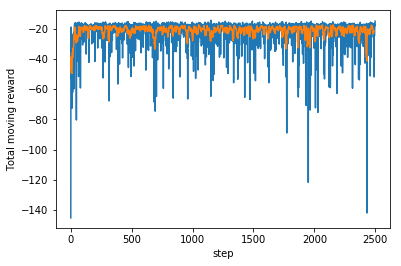

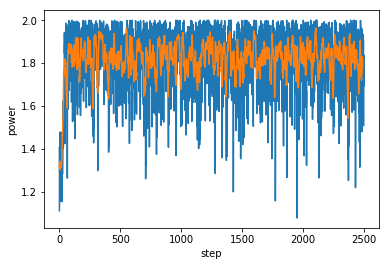

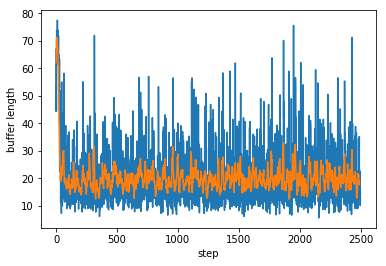

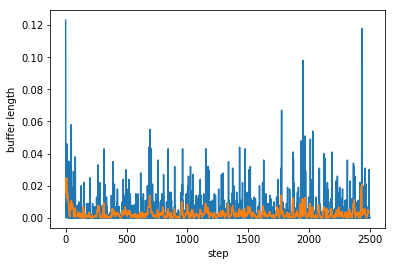

In [3]:
name = 't_10/test_1000_' + time.strftime("%b_%d_%Y_%H_%M_%S", time.localtime(time.time()))
a,b,c,d = plot_everything(res_rec, win=10)
np.savez(name, a,b,c,d)

In [1]:
cur_init_ds_ep = env.reset()
    
cur_r_ep = np.zeros(len(user_list))
cur_p_ep = np.zeros(len(user_list))
cur_n_ep = np.zeros(len(user_list))
cur_ts_ep = np.zeros(len(user_list))
cur_rs_ep = np.zeros(len(user_list))
cur_ps_ep = np.zeros(len(user_list))
cur_ds_ep = np.zeros(len(user_list))
cur_ch_ep = np.zeros(len(user_list))
    
for j in range(1000):
    # first try to transmit from current state
    [cur_r, done, cur_p, cur_n, cur_ts, cur_ps, cur_rs, cur_ds, cur_ch, cur_of] = env.step_transmit()
        
    cur_r_ep += cur_r
    cur_p_ep += cur_p
    cur_ts_ep += cur_ts
    cur_ps_ep += cur_ps
    cur_rs_ep += cur_rs
    cur_ds_ep += cur_ds
    cur_ch_ep += cur_ch
        
    print('%d:r:%f,p:%s,n:%s,tr:%s,pr:%s,rev:%s,dbuf:%s,ch:%s,ibuf:%s' % (j, cur_r, cur_p, cur_n, cur_ts, cur_ps, cur_rs, cur_ds, cur_ch, cur_init_ds_ep))
        
print('r:%f,p:%s,n:%s,tr:%s,rev:%s,dbuf:%s,ch:%s,ibuf:%s' % (cur_r_ep/MAX_EPISODE_LEN, cur_p_ep/MAX_EPISODE_LEN, cur_n_ep/MAX_EPISODE_LEN, cur_ts_ep/MAX_EPISODE_LEN, cur_rs_ep/MAX_EPISODE_LEN, cur_ds_ep/MAX_EPISODE_LEN, cur_ch_ep/MAX_EPISODE_LEN, cur_init_ds_ep))

NameError: name 'env' is not defined

In [3]:
graph = tf.get_default_graph()
inputs = graph.get_tensor_by_name("input_1"+":0")
scaled_out = graph.get_tensor_by_name("output_1"+":0")
print sess.run(scaled_out, feed_dict={inputs: [[7.22254768,2.3384,2.7784888e-05]]})

[[0.78826445 1.        ]]


In [2]:
res_rec = []
res_init_buf = []
# 3. start to explore for each episode
for i in range(MAX_EPISODE):
    
    cur_init_ds_ep = env.reset(3)
        
    res_init_buf.append(cur_init_ds_ep)
    
    cur_r_ep = np.zeros(len(user_list))
    cur_p_ep = np.zeros(len(user_list))
    cur_ts_ep = np.zeros(len(user_list))
    cur_ps_ep = np.zeros(len(user_list))
    cur_rs_ep = np.zeros(len(user_list))
    cur_ds_ep = np.zeros(len(user_list))
    cur_ch_ep = np.zeros(len(user_list))
    cur_of_ep = np.zeros(len(user_list))
    
    res_rec_tmp = []
    for j in range(MAX_EPISODE_LEN):
        
        # first try to transmit from current state
        [cur_r, done, cur_p, temp, cur_ts, cur_ps, cur_rs, cur_ds, cur_ch, cur_of] = env.step_transmit(False)
        
        res_rec_tmp.append([cur_r, done, cur_p, temp, cur_ts, cur_ps, cur_rs, cur_ds, cur_ch, cur_of])
        cur_r_ep += cur_r
        cur_p_ep += cur_p
        cur_ts_ep += cur_ts
        cur_ps_ep += cur_ps
        cur_rs_ep += cur_rs
        cur_ds_ep += cur_ds
        cur_ch_ep += cur_ch
        cur_of_ep += cur_of
        
        if done:
            res_rec.append(res_rec_tmp)
            print('%d:r:%.4f,p:%.4f,tr:%.4f,pr:%.4f,rev:%.4f,dbuf:%.4f,ch:%.8f,ibuf:%d' % (i, cur_r_ep/MAX_EPISODE_LEN, cur_p_ep/MAX_EPISODE_LEN, cur_ts_ep/MAX_EPISODE_LEN, cur_ps_ep/MAX_EPISODE_LEN, cur_rs_ep/MAX_EPISODE_LEN, cur_ds_ep/MAX_EPISODE_LEN, cur_ch_ep/MAX_EPISODE_LEN, cur_init_ds_ep[0]))
                
name = 'test_1000_' + str(time.asctime( time.localtime(time.time()) )) + '.npy'
np.save(name, [res_rec, res_init_buf])

0:r:-50.8910,p:1.4033,tr:1.4707,pr:1.3505,rev:2.9594,dbuf:72.5261,ch:0.00002568,ibuf:4
1:r:-57.9454,p:1.3913,tr:1.6529,pr:1.2218,rev:3.0360,dbuf:74.1439,ch:0.00002761,ibuf:30
2:r:-51.0844,p:1.1953,tr:1.5476,pr:1.2320,rev:2.8984,dbuf:73.1955,ch:0.00002990,ibuf:39
3:r:-18.2811,p:1.3469,tr:1.5860,pr:1.3673,rev:2.9762,dbuf:61.5868,ch:0.00002683,ibuf:35
4:r:-17.5547,p:1.2180,tr:1.7657,pr:1.2518,rev:3.0115,dbuf:55.9275,ch:0.00003238,ibuf:63
5:r:-55.6239,p:1.4116,tr:1.4240,pr:1.3390,rev:2.8791,dbuf:69.1011,ch:0.00002492,ibuf:48
6:r:-37.3900,p:1.2706,tr:1.3830,pr:1.5578,rev:3.0240,dbuf:59.5109,ch:0.00002915,ibuf:8
7:r:-32.6223,p:1.4738,tr:1.3452,pr:1.6902,rev:3.0674,dbuf:63.5657,ch:0.00002512,ibuf:71
8:r:-20.8140,p:1.2057,tr:1.4394,pr:1.5456,rev:3.0451,dbuf:49.6221,ch:0.00002902,ibuf:38
9:r:-19.3836,p:1.1973,tr:1.4459,pr:1.4838,rev:2.9358,dbuf:56.0717,ch:0.00002922,ibuf:86


In [3]:
from mec_env_var import *
from helper import *
import tensorflow as tf
import ipdb as pdb
import time

MAX_EPISODE = 50
MAX_EPISODE_LEN = 1000

NUM_T = 1
NUM_R = 1
SIGMA2 = 0.3e-9

config = {'state_dim':3, 'action_dim':2};
train_config = {'minibatch_size':64, 'actor_lr':0.0001, 'tau':0.001, 
                 'critic_lr':0.001, 'gamma':0.99, 'buffer_size':250000, 
                 'random_seed':1234}
user_config = [{'id':'1', 'rate':3, 'dis':100, 'action_bound':1, 
                'data_buf_size':100, 't_factor':0.9, 'penalty':1000}];

print user_config
# 0. initialize the session object
sess = tf.Session() 
saver = tf.train.import_meta_graph('model/my_test_model.meta')
sess.run(tf.global_variables_initializer())

saver.restore(sess, tf.train.latest_checkpoint('model/'))

graph = tf.get_default_graph()
    
# 1. include all user in the system according to the user_config
user_list = [];
for info in user_config:
    info.update(config)
    user_list.append(MecTermLD(sess, info, train_config))
    print 'test'

# 2. create the simulation env
env = MecSvrEnv(user_list, NUM_R, SIGMA2, MAX_EPISODE_LEN)
env.init_target_network()

res_rec = []
res_init_buf = []
# 3. start to explore for each episode
for i in range(MAX_EPISODE):
    
    cur_init_ds_ep = env.reset(3)
        
    res_init_buf.append(cur_init_ds_ep)
    
    cur_r_ep = np.zeros(len(user_list))
    cur_p_ep = np.zeros(len(user_list))
    cur_ts_ep = np.zeros(len(user_list))
    cur_ps_ep = np.zeros(len(user_list))
    cur_rs_ep = np.zeros(len(user_list))
    cur_ds_ep = np.zeros(len(user_list))
    cur_ch_ep = np.zeros(len(user_list))
    cur_of_ep = np.zeros(len(user_list))
    
    res_rec_tmp = []
    for j in range(MAX_EPISODE_LEN):
        
        # first try to transmit from current state
        [cur_r, done, cur_p, temp, cur_ts, cur_ps, cur_rs, cur_ds, cur_ch, cur_of] = env.step_transmit()
        
        res_rec_tmp.append([cur_r, done, cur_p, temp, cur_ts, cur_ps, cur_rs, cur_ds, cur_ch, cur_of])
        cur_r_ep += cur_r
        cur_p_ep += cur_p
        cur_ts_ep += cur_ts
        cur_ps_ep += cur_ps
        cur_rs_ep += cur_rs
        cur_ds_ep += cur_ds
        cur_ch_ep += cur_ch
        cur_of_ep += cur_of
        
        if done:
            res_rec.append(res_rec_tmp)
            print('%d:r:%.4f,p:%.4f,tr:%.4f,pr:%.4f,rev:%.4f,dbuf:%.4f,ch:%.8f,ibuf:%d' % (i, cur_r_ep/MAX_EPISODE_LEN, cur_p_ep/MAX_EPISODE_LEN, cur_ts_ep/MAX_EPISODE_LEN, cur_ps_ep/MAX_EPISODE_LEN, cur_rs_ep/MAX_EPISODE_LEN, cur_ds_ep/MAX_EPISODE_LEN, cur_ch_ep/MAX_EPISODE_LEN, cur_init_ds_ep[0]))
                
name = 'test_1000_' + str(time.asctime( time.localtime(time.time()) )) + '.npy'
np.save(name, [res_rec, res_init_buf])
sess.close()

[{'data_buf_size': 100, 'penalty': 1000, 'rate': 3, 'action_bound': 1, 'id': '1', 't_factor': 0.9, 'dis': 100}]
INFO:tensorflow:Restoring parameters from model/my_test_model
--Return--
None
> <ipython-input-3-a12846566f97>(30)<module>()
     29 graph = tf.get_default_graph()
---> 30 pdb.set_trace()
     31 

ipdb> graph
ipdb> graph.trainable_variables
*** AttributeError: 'Graph' object has no attribute 'trainable_variables'
ipdb> tf.trainable_variables()
[<tf.Variable 'fully_connected/weights:0' shape=(3, 400) dtype=float32_ref>, <tf.Variable 'fully_connected/BatchNorm/beta:0' shape=(400,) dtype=float32_ref>, <tf.Variable 'fully_connected_1/weights:0' shape=(3, 300) dtype=float32_ref>, <tf.Variable 'fully_connected_1/BatchNorm/beta:0' shape=(300,) dtype=float32_ref>, <tf.Variable 'fully_connected_2/weights:0' shape=(300, 2) dtype=float32_ref>, <tf.Variable 'fully_connected_2/biases:0' shape=(2,) dtype=float32_ref>, <tf.Variable 'fully_connected_3/weights:0' shape=(3, 400) dtype=float32

BdbQuit: 

In [9]:
sess = tf.Session() 
saver = tf.train.import_meta_graph('model/my_test_model.meta')
sess.run(tf.global_variables_initializer())

saver.restore(sess, tf.train.latest_checkpoint('model/'))

graph = tf.get_default_graph()
variable_names = [v.name for v in tf.trainable_variables()]
values = sess.run(variable_names)
print sess.run('fully_connected_2/weights:0')

INFO:tensorflow:Restoring parameters from model/my_test_model
[[0.1545126  0.15780352]
 [0.15616506 0.15971294]
 [0.06559879 0.09880391]
 [0.06487427 0.10064688]
 [0.15168335 0.16229852]
 [0.06257845 0.09748891]
 [0.06430701 0.09924787]
 [0.06548443 0.10012874]
 [0.15782878 0.15414344]
 [0.15429462 0.17596859]
 [0.05945097 0.0991616 ]
 [0.06383383 0.09632684]
 [0.06522399 0.10438306]
 [0.06095436 0.09916781]
 [0.06635379 0.0955418 ]
 [0.06379106 0.09433711]
 [0.06133086 0.09875894]
 [0.06503102 0.09639146]
 [0.15047684 0.17412661]
 [0.15663381 0.15740666]
 [0.17768952 0.15899988]
 [0.15730077 0.14491995]
 [0.05902164 0.10017106]
 [0.06845198 0.09686822]
 [0.15724926 0.14774598]
 [0.1529071  0.16426612]
 [0.1520101  0.15706535]
 [0.16091335 0.16260217]
 [0.15082897 0.16070077]
 [0.06310375 0.09398151]
 [0.06018374 0.10056869]
 [0.05968894 0.10066012]
 [0.15474424 0.16255529]
 [0.15111688 0.1622602 ]
 [0.0838669  0.18973866]
 [0.06870251 0.24295035]
 [0.06702217 0.10505467]
 [0.1529     

In [3]:
np.save('t_08/1', [1])